In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import _pickle as cPickle
import gzip
import os
import sys
import timeit
from sklearn.metrics import confusion_matrix
import math
import os
import pickle

In [3]:
# Import Keras with TensorFlow backend
# Calculate the time it takes to import Keras with Theano backend
start_time = timeit.default_timer()
import keras
end_time = timeit.default_timer()
print("It took Keras with TensorFlow as backend %.1fs to load." % (end_time - start_time))

Using TensorFlow backend.


It took Keras with TensorFlow as backend 0.8s to load.


In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import Callback
from keras.callbacks import ModelCheckpoint

from keras_tqdm import TQDMNotebookCallback
from keras_tqdm import TQDMCallback
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

from keras import optimizers

In [5]:
# for reproducibility
np.random.seed(1337)

In [6]:
# Import MNIST dataset
from keras.datasets import mnist

In [7]:
# shuffle and split the data between training and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
# shuffle and split the data between training and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
# set the no of training and test dataset examples
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# create placeholders
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


# no of training and test batches
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [10]:
n_output = len(np.unique(y_train))
print("No of output classes: ", n_output)

No of output classes:  10


In [11]:
# convert class vectors to binary class matrices
# Y_train = np_utils.to_categorical(y_train, num_classes)
y_train = keras.utils.to_categorical(y_train, n_output)
print(y_train.shape)

# Y_test = np_utils.to_categorical(y_test, num_classes)
y_test = keras.utils.to_categorical(y_test, n_output)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [12]:
# Training Parameters
batch_size = 256
n_epochs = 100

## Create the MLP Model

In [13]:
# Create a MLP models with two hidden layers, with each hidden layer consisting of 
model = Sequential()

# Hidden Layer 1
model.add(Dense(1024, activation='relu', input_shape=(784,)))
# model.add(Dropout(0.2))

# Hidden Layer 2
model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.2))

# Final Layer
model.add(Dense(10, activation='softmax'))

## Print the Model Architecture

In [14]:
# model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 1,863,690.0
Trainable params: 1,863,690
Non-trainable params: 0.0
_________________________________________________________________


In [15]:
# model visualization - directly obtain the pydot.Graph object and render it
# from IPython.display import SVG
# SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [16]:
# model visualization - using keras utility functions
img = plot_model(model, to_file='mninst_mlp.png')

## Optimize the Model

In [17]:
# optimize the model for categorical classification

sgd = optimizers.Adam(lr=0.01)

model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

## Save Model Checkpoints

In [18]:
# create model checkpoints
save_dir = "checkpoints_mnist_mlp_keras_tensorflow/"
# create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
# path for the checkpoint file
save_path = os.path.join(save_dir, "mnist_mlp.hdf5")
if os.path.exists(save_path):
    print("Checkpoint created.")
else:
    print("No checkpoint exists as of now!!!!")

checkpointer = ModelCheckpoint(filepath=save_path, verbose=1, save_best_only=True)

No checkpoint exists as of now!!!!


## Helper Class to Record Loss History

In [19]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

## Helper Function to Initiate Training

In [20]:
# Define a function for training the model

    
print("Starting Optimization")
    
start_time = timeit.default_timer()
    
history = LossHistory()
    
training = model.fit(x_train, y_train, batch_size=batch_size, verbose=1, epochs=n_epochs, 
              callbacks=[TQDMCallback(), checkpointer, history], 
              validation_data=(x_test, y_test))
    
end_time = timeit.default_timer()
    
time_diff = end_time - start_time
    
print("The code ran for %.1fs" % (time_diff))
    
print("The code ran for %.2fm" % (time_diff / 60.))

Starting Optimization


Epoch: 0:   0%|          | 0/60000 [00:00<?, ?it/s]

Train on 60000 samples, validate on 10000 samples
Epoch 1/100



Epoch: 0 - loss: 2.318, acc: 0.129  0%|          | 256/60000 [00:00<02:31, 393.41it/s]

 1536/60000 [..............................] - ETA: 27s - loss: 6.5084 - acc: 0.2305 


Epoch: 0 - loss: 4.711, acc: 0.343  4%|▍         | 2560/60000 [00:00<01:42, 557.76it/s]

 4096/60000 [=>............................] - ETA: 11s - loss: 3.2603 - acc: 0.4846


Epoch: 0 - loss: 2.813, acc: 0.545  8%|▊         | 4864/60000 [00:00<01:09, 788.44it/s]

 6656/60000 [==>...........................] - ETA: 7s - loss: 2.1723 - acc: 0.6355


Epoch: 0 - loss: 2.043, acc: 0.654 12%|█▏        | 7168/60000 [00:00<00:47, 1109.70it/s]

 9216/60000 [===>..........................] - ETA: 5s - loss: 1.6609 - acc: 0.7084


Epoch: 0 - loss: 1.624, acc: 0.714 16%|█▌        | 9472/60000 [00:01<00:32, 1551.39it/s]

10496/60000 [====>.........................] - ETA: 5s - loss: 1.4963 - acc: 0.7329

11776/60000 [====>.........................] - ETA: 4s - loss: 1.3660 - acc: 0.7520


Epoch: 0 - loss: 1.343, acc: 0.755 20%|██        | 12032/60000 [00:01<00:22, 2154.95it/s]

13056/60000 [=====>........................] - ETA: 4s - loss: 1.2625 - acc: 0.7678

14336/60000 [======>.......................] - ETA: 4s - loss: 1.1726 - acc: 0.7812


Epoch: 0 - loss: 1.156, acc: 0.784 24%|██▍       | 14592/60000 [00:01<00:15, 2959.59it/s]

15616/60000 [======>.......................] - ETA: 3s - loss: 1.1013 - acc: 0.7920


Epoch: 0 - loss: 1.033, acc: 0.803 28%|██▊       | 16896/60000 [00:01<00:10, 4002.24it/s]

18176/60000 [========>.....................] - ETA: 3s - loss: 0.9725 - acc: 0.8128


Epoch: 0 - loss: 0.923, acc: 0.821 32%|███▏      | 19456/60000 [00:01<00:07, 5327.21it/s]

20736/60000 [=========>....................] - ETA: 2s - loss: 0.8785 - acc: 0.8283


Epoch: 0 - loss: 0.842, acc: 0.834 37%|███▋      | 22016/60000 [00:01<00:05, 6931.66it/s]

23296/60000 [==========>...................] - ETA: 2s - loss: 0.8067 - acc: 0.8401


Epoch: 0 - loss: 0.775, acc: 0.845 41%|████      | 24576/60000 [00:01<00:04, 8762.83it/s]

25856/60000 [===========>..................] - ETA: 2s - loss: 0.7458 - acc: 0.8500


Epoch: 0 - loss: 0.725, acc: 0.854 45%|████▍     | 26880/60000 [00:01<00:03, 10744.44it/s]

28416/60000 [=============>................] - ETA: 2s - loss: 0.6946 - acc: 0.8587


Epoch: 0 - loss: 0.682, acc: 0.860 49%|████▊     | 29184/60000 [00:01<00:02, 12754.09it/s]

30976/60000 [==============>...............] - ETA: 1s - loss: 0.6545 - acc: 0.8643


Epoch: 0 - loss: 0.643, acc: 0.866 53%|█████▎    | 31744/60000 [00:02<00:01, 14753.60it/s]

33536/60000 [===============>..............] - ETA: 1s - loss: 0.6169 - acc: 0.8706


Epoch: 0 - loss: 0.610, acc: 0.872 57%|█████▋    | 34048/60000 [00:02<00:01, 16507.28it/s]

36096/60000 [=================>............] - ETA: 1s - loss: 0.5866 - acc: 0.8758


Epoch: 0 - loss: 0.581, acc: 0.877 61%|██████    | 36608/60000 [00:02<00:01, 18037.52it/s]

37376/60000 [=================>............] - ETA: 1s - loss: 0.5726 - acc: 0.8783

38656/60000 [==================>...........] - ETA: 1s - loss: 0.5598 - acc: 0.8806


Epoch: 0 - loss: 0.557, acc: 0.881 65%|██████▍   | 38912/60000 [00:02<00:01, 19275.68it/s]

41216/60000 [===================>..........] - ETA: 1s - loss: 0.5346 - acc: 0.8851


Epoch: 0 - loss: 0.533, acc: 0.885 69%|██████▉   | 41472/60000 [00:02<00:00, 20226.46it/s]

42496/60000 [====================>.........] - ETA: 1s - loss: 0.5235 - acc: 0.8870

43776/60000 [====================>.........] - ETA: 0s - loss: 0.5131 - acc: 0.8890


Epoch: 0 - loss: 0.511, acc: 0.889 73%|███████▎  | 44032/60000 [00:02<00:00, 20978.44it/s]

45056/60000 [=====================>........] - ETA: 0s - loss: 0.5033 - acc: 0.8907


Epoch: 0 - loss: 0.493, acc: 0.892 77%|███████▋  | 46336/60000 [00:02<00:00, 21474.30it/s]

47616/60000 [======================>.......] - ETA: 0s - loss: 0.4842 - acc: 0.8941


Epoch: 0 - loss: 0.477, acc: 0.895 81%|████████  | 48640/60000 [00:02<00:00, 21903.83it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.4664 - acc: 0.8976


Epoch: 0 - loss: 0.463, acc: 0.898 85%|████████▍ | 50944/60000 [00:02<00:00, 22164.96it/s]

52736/60000 [=========================>....] - ETA: 0s - loss: 0.4515 - acc: 0.9003


Epoch: 0 - loss: 0.448, acc: 0.901 89%|████████▊ | 53248/60000 [00:02<00:00, 22372.61it/s]

55040/60000 [==========================>...] - ETA: 0s - loss: 0.4384 - acc: 0.9028


Epoch: 0 - loss: 0.436, acc: 0.903 93%|█████████▎| 55552/60000 [00:03<00:00, 22217.29it/s]

57344/60000 [===========================>..] - ETA: 0s - loss: 0.4273 - acc: 0.9049


Epoch: 0 - loss: 0.425, acc: 0.905 96%|█████████▋| 57856/60000 [00:03<00:00, 22246.75it/s]

59392/60000 [============================>.] - ETA: 0s - loss: 0.4172 - acc: 0.9068


Epoch: 0 - loss: 0.415, acc: 0.907, val_loss: 0.131, val_acc: 0.959100%|██████████| 60000/60000 [00:03<00:00, 15699.36it/s]
Training:   1%|          | 1/100 [00:03<05:37,  3.41s/it]

Epoch 00000: val_loss improved from inf to 0.13136, saving model to checkpoints_mnist_mlp_keras_tensorflow/mnist_mlp.hdf5
60000/60000 [==============================] - 3s - loss: 0.4146 - acc: 0.9072 - val_loss: 0.1314 - val_acc: 0.9590


Epoch: 1:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 2/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.1472 - acc: 0.9596


Epoch: 1 - loss: 0.142, acc: 0.960  4%|▍         | 2304/60000 [00:00<00:02, 21884.27it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.1423 - acc: 0.9573


Epoch: 1 - loss: 0.142, acc: 0.957  8%|▊         | 4608/60000 [00:00<00:02, 22200.21it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.1326 - acc: 0.9587


Epoch: 1 - loss: 0.133, acc: 0.958 12%|█▏        | 6912/60000 [00:00<00:02, 22102.31it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.1346 - acc: 0.9577

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.1319 - acc: 0.9587


Epoch: 1 - loss: 0.133, acc: 0.959 16%|█▌        | 9472/60000 [00:00<00:02, 22375.85it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.1322 - acc: 0.9586


Epoch: 1 - loss: 0.134, acc: 0.959 20%|█▉        | 11776/60000 [00:00<00:02, 22310.23it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.1339 - acc: 0.9589


Epoch: 1 - loss: 0.134, acc: 0.958 23%|██▎       | 14080/60000 [00:00<00:02, 22521.07it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.1350 - acc: 0.9577


Epoch: 1 - loss: 0.135, acc: 0.958 28%|██▊       | 16640/60000 [00:00<00:01, 22821.28it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.1357 - acc: 0.9581


Epoch: 1 - loss: 0.135, acc: 0.958 32%|███▏      | 19200/60000 [00:00<00:01, 22959.33it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.1371 - acc: 0.9581


Epoch: 1 - loss: 0.136, acc: 0.958 36%|███▌      | 21504/60000 [00:00<00:01, 22982.20it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.1359 - acc: 0.9584


Epoch: 1 - loss: 0.135, acc: 0.959 40%|███▉      | 23808/60000 [00:01<00:01, 22579.75it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.1327 - acc: 0.9597


Epoch: 1 - loss: 0.132, acc: 0.960 44%|████▍     | 26368/60000 [00:01<00:01, 22785.87it/s]

28416/60000 [=============>................] - ETA: 1s - loss: 0.1329 - acc: 0.9594


Epoch: 1 - loss: 0.132, acc: 0.959 48%|████▊     | 28672/60000 [00:01<00:01, 22799.41it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.1315 - acc: 0.9597


Epoch: 1 - loss: 0.131, acc: 0.960 52%|█████▏    | 30976/60000 [00:01<00:01, 22805.66it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.1305 - acc: 0.9599

33024/60000 [===============>..............] - ETA: 1s - loss: 0.1305 - acc: 0.9599


Epoch: 1 - loss: 0.130, acc: 0.960 55%|█████▌    | 33280/60000 [00:01<00:01, 21331.67it/s]

34048/60000 [================>.............] - ETA: 1s - loss: 0.1300 - acc: 0.9601

35072/60000 [================>.............] - ETA: 1s - loss: 0.1299 - acc: 0.9601


Epoch: 1 - loss: 0.130, acc: 0.960 59%|█████▉    | 35584/60000 [00:01<00:01, 20767.79it/s]

37120/60000 [=================>............] - ETA: 1s - loss: 0.1296 - acc: 0.9604


Epoch: 1 - loss: 0.129, acc: 0.961 63%|██████▎   | 37888/60000 [00:01<00:01, 20629.92it/s]

39680/60000 [==================>...........] - ETA: 0s - loss: 0.1286 - acc: 0.9611


Epoch: 1 - loss: 0.128, acc: 0.961 67%|██████▋   | 40448/60000 [00:01<00:00, 21303.05it/s]

42240/60000 [====================>.........] - ETA: 0s - loss: 0.1272 - acc: 0.9616


Epoch: 1 - loss: 0.127, acc: 0.962 71%|███████▏  | 42752/60000 [00:01<00:00, 21790.98it/s]

44800/60000 [=====================>........] - ETA: 0s - loss: 0.1259 - acc: 0.9620


Epoch: 1 - loss: 0.126, acc: 0.962 75%|███████▌  | 45056/60000 [00:02<00:00, 21948.43it/s]

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1253 - acc: 0.9624


Epoch: 1 - loss: 0.125, acc: 0.963 79%|███████▉  | 47360/60000 [00:02<00:00, 22116.27it/s]

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1244 - acc: 0.9627

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1248 - acc: 0.9626


Epoch: 1 - loss: 0.125, acc: 0.963 83%|████████▎ | 49920/60000 [00:02<00:00, 22401.99it/s]

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1245 - acc: 0.9627

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1244 - acc: 0.9626


Epoch: 1 - loss: 0.124, acc: 0.963 87%|████████▋ | 52480/60000 [00:02<00:00, 22714.10it/s]

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1243 - acc: 0.9627


Epoch: 1 - loss: 0.125, acc: 0.963 91%|█████████▏| 54784/60000 [00:02<00:00, 22611.19it/s]

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1241 - acc: 0.9629


Epoch: 1 - loss: 0.124, acc: 0.963 95%|█████████▌| 57088/60000 [00:02<00:00, 22514.39it/s]

58624/60000 [============================>.] - ETA: 0s - loss: 0.1238 - acc: 0.9628


Epoch: 1 - loss: 0.124, acc: 0.963 99%|█████████▉| 59392/60000 [00:02<00:00, 22411.30it/s]

59904/60000 [============================>.] - ETA: 0s - loss: 0.1242 - acc: 0.9628


Epoch: 1 - loss: 0.124, acc: 0.963, val_loss: 0.142, val_acc: 0.960100%|██████████| 60000/60000 [00:02<00:00, 9620.98it/s]
Training:   2%|▏         | 2/100 [00:06<05:20,  3.27s/it]

Epoch 00001: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.1241 - acc: 0.9628 - val_loss: 0.1416 - val_acc: 0.9595


Epoch: 2:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 3/100
  256/60000 [..............................] - ETA: 2s - loss: 0.1670 - acc: 0.9609

 1536/60000 [..............................] - ETA: 2s - loss: 0.1016 - acc: 0.9674


Epoch: 2 - loss: 0.087, acc: 0.971  4%|▍         | 2304/60000 [00:00<00:02, 20525.16it/s]

 2816/60000 [>.............................] - ETA: 2s - loss: 0.0860 - acc: 0.9705

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0836 - acc: 0.9727


Epoch: 2 - loss: 0.083, acc: 0.973  7%|▋         | 4352/60000 [00:00<00:02, 20484.99it/s]

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.0786 - acc: 0.9742


Epoch: 2 - loss: 0.077, acc: 0.975 11%|█         | 6656/60000 [00:00<00:02, 20952.44it/s]

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.0763 - acc: 0.9753

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.0796 - acc: 0.9742


Epoch: 2 - loss: 0.079, acc: 0.974 15%|█▌        | 9216/60000 [00:00<00:02, 21550.31it/s]

10240/60000 [====>.........................] - ETA: 2s - loss: 0.0793 - acc: 0.9748

11520/60000 [====>.........................] - ETA: 2s - loss: 0.0803 - acc: 0.9747


Epoch: 2 - loss: 0.081, acc: 0.974 20%|█▉        | 11776/60000 [00:00<00:02, 21879.39it/s]

12800/60000 [=====>........................] - ETA: 2s - loss: 0.0815 - acc: 0.9745


Epoch: 2 - loss: 0.083, acc: 0.974 23%|██▎       | 14080/60000 [00:00<00:02, 22213.26it/s]

15360/60000 [======>.......................] - ETA: 2s - loss: 0.0851 - acc: 0.9743


Epoch: 2 - loss: 0.087, acc: 0.974 27%|██▋       | 16384/60000 [00:00<00:01, 22303.70it/s]

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0870 - acc: 0.9738


Epoch: 2 - loss: 0.087, acc: 0.974 31%|███       | 18688/60000 [00:00<00:01, 22400.91it/s]

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0865 - acc: 0.9740


Epoch: 2 - loss: 0.087, acc: 0.974 35%|███▌      | 21248/60000 [00:00<00:01, 22580.29it/s]

23040/60000 [==========>...................] - ETA: 1s - loss: 0.0875 - acc: 0.9737


Epoch: 2 - loss: 0.088, acc: 0.974 39%|███▉      | 23552/60000 [00:01<00:01, 22646.59it/s]

25600/60000 [===========>..................] - ETA: 1s - loss: 0.0869 - acc: 0.9734


Epoch: 2 - loss: 0.087, acc: 0.973 43%|████▎     | 25856/60000 [00:01<00:01, 22557.73it/s]

26880/60000 [============>.................] - ETA: 1s - loss: 0.0872 - acc: 0.9734


Epoch: 2 - loss: 0.089, acc: 0.973 47%|████▋     | 28160/60000 [00:01<00:01, 22618.86it/s]

29440/60000 [=============>................] - ETA: 1s - loss: 0.0901 - acc: 0.9724


Epoch: 2 - loss: 0.093, acc: 0.972 51%|█████     | 30720/60000 [00:01<00:01, 22811.78it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0938 - acc: 0.9715


Epoch: 2 - loss: 0.094, acc: 0.971 55%|█████▌    | 33024/60000 [00:01<00:01, 22774.45it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0949 - acc: 0.9713


Epoch: 2 - loss: 0.095, acc: 0.971 59%|█████▉    | 35328/60000 [00:01<00:01, 22811.43it/s]

37120/60000 [=================>............] - ETA: 1s - loss: 0.0950 - acc: 0.9715


Epoch: 2 - loss: 0.095, acc: 0.971 63%|██████▎   | 37632/60000 [00:01<00:00, 22479.03it/s]

39424/60000 [==================>...........] - ETA: 0s - loss: 0.0945 - acc: 0.9716


Epoch: 2 - loss: 0.094, acc: 0.972 67%|██████▋   | 39936/60000 [00:01<00:00, 22457.08it/s]

41984/60000 [===================>..........] - ETA: 0s - loss: 0.0955 - acc: 0.9716


Epoch: 2 - loss: 0.095, acc: 0.972 70%|███████   | 42240/60000 [00:01<00:00, 22562.54it/s]

43264/60000 [====================>.........] - ETA: 0s - loss: 0.0951 - acc: 0.9715


Epoch: 2 - loss: 0.096, acc: 0.971 74%|███████▍  | 44544/60000 [00:01<00:00, 22610.07it/s]

45824/60000 [=====================>........] - ETA: 0s - loss: 0.0951 - acc: 0.9714


Epoch: 2 - loss: 0.095, acc: 0.971 79%|███████▊  | 47104/60000 [00:02<00:00, 22817.09it/s]

48384/60000 [=======================>......] - ETA: 0s - loss: 0.0954 - acc: 0.9714


Epoch: 2 - loss: 0.096, acc: 0.971 83%|████████▎ | 49664/60000 [00:02<00:00, 23058.84it/s]

50944/60000 [========================>.....] - ETA: 0s - loss: 0.0963 - acc: 0.9712


Epoch: 2 - loss: 0.097, acc: 0.971 87%|████████▋ | 52224/60000 [00:02<00:00, 23129.79it/s]

53504/60000 [=========================>....] - ETA: 0s - loss: 0.0969 - acc: 0.9710


Epoch: 2 - loss: 0.096, acc: 0.971 91%|█████████▏| 54784/60000 [00:02<00:00, 23181.35it/s]

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0969 - acc: 0.9709


Epoch: 2 - loss: 0.097, acc: 0.971 96%|█████████▌| 57344/60000 [00:02<00:00, 23246.17it/s]

58624/60000 [============================>.] - ETA: 0s - loss: 0.0976 - acc: 0.9709


Epoch: 2 - loss: 0.098, acc: 0.971100%|█████████▉| 59904/60000 [00:02<00:00, 23390.93it/s]

59904/60000 [============================>.] - ETA: 0s - loss: 0.0981 - acc: 0.9707


Epoch: 2 - loss: 0.098, acc: 0.971, val_loss: 0.140, val_acc: 0.961100%|██████████| 60000/60000 [00:02<00:00, 2569.08it/s]
Training:   3%|▎         | 3/100 [00:09<05:02,  3.12s/it]

Epoch 00002: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0983 - acc: 0.9707 - val_loss: 0.1398 - val_acc: 0.9613


Epoch: 3:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 4/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0810 - acc: 0.9701


Epoch: 3 - loss: 0.088, acc: 0.970  4%|▍         | 2304/60000 [00:00<00:02, 22825.07it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0882 - acc: 0.9714


Epoch: 3 - loss: 0.087, acc: 0.971  8%|▊         | 4608/60000 [00:00<00:02, 22728.98it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0844 - acc: 0.9734


Epoch: 3 - loss: 0.083, acc: 0.974 12%|█▏        | 6912/60000 [00:00<00:02, 22545.45it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0852 - acc: 0.9743


Epoch: 3 - loss: 0.084, acc: 0.975 15%|█▌        | 9216/60000 [00:00<00:02, 22683.63it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0865 - acc: 0.9747


Epoch: 3 - loss: 0.088, acc: 0.974 19%|█▉        | 11520/60000 [00:00<00:02, 22540.22it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0866 - acc: 0.9746


Epoch: 3 - loss: 0.084, acc: 0.975 23%|██▎       | 13824/60000 [00:00<00:02, 22500.66it/s]

15360/60000 [======>.......................] - ETA: 1s - loss: 0.0838 - acc: 0.9748


Epoch: 3 - loss: 0.083, acc: 0.975 27%|██▋       | 16128/60000 [00:00<00:01, 22630.32it/s]

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0832 - acc: 0.9748


Epoch: 3 - loss: 0.082, acc: 0.975 31%|███       | 18432/60000 [00:00<00:01, 22439.20it/s]

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0847 - acc: 0.9748


Epoch: 3 - loss: 0.085, acc: 0.975 35%|███▍      | 20736/60000 [00:00<00:01, 22453.06it/s]

21760/60000 [=========>....................] - ETA: 1s - loss: 0.0847 - acc: 0.9749

23040/60000 [==========>...................] - ETA: 1s - loss: 0.0838 - acc: 0.9747


Epoch: 3 - loss: 0.085, acc: 0.974 39%|███▉      | 23296/60000 [00:01<00:01, 22649.90it/s]

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0844 - acc: 0.9745


Epoch: 3 - loss: 0.084, acc: 0.975 43%|████▎     | 25600/60000 [00:01<00:01, 22687.67it/s]

26880/60000 [============>.................] - ETA: 1s - loss: 0.0849 - acc: 0.9744


Epoch: 3 - loss: 0.086, acc: 0.974 47%|████▋     | 27904/60000 [00:01<00:01, 22631.42it/s]

29440/60000 [=============>................] - ETA: 1s - loss: 0.0850 - acc: 0.9747


Epoch: 3 - loss: 0.085, acc: 0.975 50%|█████     | 30208/60000 [00:01<00:01, 22321.51it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0837 - acc: 0.9749


Epoch: 3 - loss: 0.084, acc: 0.975 54%|█████▍    | 32512/60000 [00:01<00:01, 21976.63it/s]

34304/60000 [================>.............] - ETA: 1s - loss: 0.0857 - acc: 0.9744


Epoch: 3 - loss: 0.086, acc: 0.974 58%|█████▊    | 34816/60000 [00:01<00:01, 21752.24it/s]

36608/60000 [=================>............] - ETA: 1s - loss: 0.0866 - acc: 0.9744


Epoch: 3 - loss: 0.086, acc: 0.974 62%|██████▏   | 37120/60000 [00:01<00:01, 21246.04it/s]

37888/60000 [=================>............] - ETA: 0s - loss: 0.0867 - acc: 0.9743

39168/60000 [==================>...........] - ETA: 0s - loss: 0.0881 - acc: 0.9739


Epoch: 3 - loss: 0.088, acc: 0.974 66%|██████▌   | 39424/60000 [00:01<00:00, 21192.70it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0882 - acc: 0.9737


Epoch: 3 - loss: 0.088, acc: 0.974 70%|██████▉   | 41728/60000 [00:01<00:00, 20783.27it/s]

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0874 - acc: 0.9740

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0871 - acc: 0.9741


Epoch: 3 - loss: 0.087, acc: 0.974 73%|███████▎  | 44032/60000 [00:02<00:00, 20917.81it/s]

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0864 - acc: 0.9742


Epoch: 3 - loss: 0.086, acc: 0.974 77%|███████▋  | 46336/60000 [00:02<00:00, 21407.22it/s]

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0863 - acc: 0.9741


Epoch: 3 - loss: 0.087, acc: 0.974 81%|████████  | 48640/60000 [00:02<00:00, 21729.44it/s]

49920/60000 [=======================>......] - ETA: 0s - loss: 0.0873 - acc: 0.9737


Epoch: 3 - loss: 0.088, acc: 0.974 85%|████████▍ | 50944/60000 [00:02<00:00, 22041.22it/s]

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0877 - acc: 0.9737


Epoch: 3 - loss: 0.088, acc: 0.974 89%|████████▉ | 53504/60000 [00:02<00:00, 22416.30it/s]

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0886 - acc: 0.9735


Epoch: 3 - loss: 0.089, acc: 0.973 93%|█████████▎| 55808/60000 [00:02<00:00, 22167.95it/s]

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0888 - acc: 0.9734


Epoch: 3 - loss: 0.089, acc: 0.973 97%|█████████▋| 58112/60000 [00:02<00:00, 22384.23it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0884 - acc: 0.9736


Epoch: 3 - loss: 0.088, acc: 0.973, val_loss: 0.119, val_acc: 0.968100%|██████████| 60000/60000 [00:02<00:00, 15763.92it/s]
Training:   4%|▍         | 4/100 [00:11<04:51,  3.03s/it]

Epoch 00003: val_loss improved from 0.13136 to 0.11917, saving model to checkpoints_mnist_mlp_keras_tensorflow/mnist_mlp.hdf5
60000/60000 [==============================] - 2s - loss: 0.0885 - acc: 0.9734 - val_loss: 0.1192 - val_acc: 0.9681


Epoch: 4:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 5/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0856 - acc: 0.9727


Epoch: 4 - loss: 0.080, acc: 0.974  4%|▍         | 2304/60000 [00:00<00:02, 22917.79it/s]

 3840/60000 [>.............................] - ETA: 2s - loss: 0.0735 - acc: 0.9755


Epoch: 4 - loss: 0.070, acc: 0.977  7%|▋         | 4352/60000 [00:00<00:02, 21662.91it/s]

 5888/60000 [=>............................] - ETA: 2s - loss: 0.0669 - acc: 0.9788


Epoch: 4 - loss: 0.067, acc: 0.979 11%|█         | 6400/60000 [00:00<00:02, 20989.15it/s]

 8192/60000 [===>..........................] - ETA: 2s - loss: 0.0691 - acc: 0.9785


Epoch: 4 - loss: 0.068, acc: 0.979 15%|█▍        | 8704/60000 [00:00<00:02, 21010.54it/s]

10752/60000 [====>.........................] - ETA: 2s - loss: 0.0640 - acc: 0.9799


Epoch: 4 - loss: 0.063, acc: 0.980 18%|█▊        | 11008/60000 [00:00<00:02, 21556.31it/s]

12032/60000 [=====>........................] - ETA: 2s - loss: 0.0619 - acc: 0.9803


Epoch: 4 - loss: 0.062, acc: 0.981 22%|██▏       | 13312/60000 [00:00<00:02, 21962.62it/s]

14592/60000 [======>.......................] - ETA: 2s - loss: 0.0612 - acc: 0.9810


Epoch: 4 - loss: 0.062, acc: 0.981 26%|██▌       | 15616/60000 [00:00<00:02, 22075.06it/s]

17152/60000 [=======>......................] - ETA: 1s - loss: 0.0626 - acc: 0.9809


Epoch: 4 - loss: 0.064, acc: 0.981 30%|███       | 18176/60000 [00:00<00:01, 22483.00it/s]

19712/60000 [========>.....................] - ETA: 1s - loss: 0.0632 - acc: 0.9808


Epoch: 4 - loss: 0.063, acc: 0.981 34%|███▍      | 20480/60000 [00:00<00:01, 22106.34it/s]

21760/60000 [=========>....................] - ETA: 1s - loss: 0.0631 - acc: 0.9807


Epoch: 4 - loss: 0.064, acc: 0.981 38%|███▊      | 22784/60000 [00:01<00:01, 21211.04it/s]

24064/60000 [===========>..................] - ETA: 1s - loss: 0.0645 - acc: 0.9802


Epoch: 4 - loss: 0.064, acc: 0.980 42%|████▏     | 25088/60000 [00:01<00:01, 21140.24it/s]

26368/60000 [============>.................] - ETA: 1s - loss: 0.0653 - acc: 0.9798


Epoch: 4 - loss: 0.067, acc: 0.980 46%|████▌     | 27648/60000 [00:01<00:01, 21667.05it/s]

28928/60000 [=============>................] - ETA: 1s - loss: 0.0680 - acc: 0.9794


Epoch: 4 - loss: 0.068, acc: 0.979 50%|█████     | 30208/60000 [00:01<00:01, 22162.80it/s]

31488/60000 [==============>...............] - ETA: 1s - loss: 0.0692 - acc: 0.9794


Epoch: 4 - loss: 0.070, acc: 0.979 55%|█████▍    | 32768/60000 [00:01<00:01, 22466.88it/s]

34048/60000 [================>.............] - ETA: 1s - loss: 0.0700 - acc: 0.9794


Epoch: 4 - loss: 0.070, acc: 0.979 58%|█████▊    | 35072/60000 [00:01<00:01, 22533.70it/s]

36608/60000 [=================>............] - ETA: 1s - loss: 0.0717 - acc: 0.9792


Epoch: 4 - loss: 0.071, acc: 0.979 63%|██████▎   | 37632/60000 [00:01<00:00, 22720.66it/s]

39168/60000 [==================>...........] - ETA: 0s - loss: 0.0722 - acc: 0.9793


Epoch: 4 - loss: 0.072, acc: 0.979 67%|██████▋   | 39936/60000 [00:01<00:00, 22631.47it/s]

41728/60000 [===================>..........] - ETA: 0s - loss: 0.0721 - acc: 0.9792


Epoch: 4 - loss: 0.073, acc: 0.979 70%|███████   | 42240/60000 [00:01<00:00, 22553.20it/s]

44288/60000 [=====================>........] - ETA: 0s - loss: 0.0723 - acc: 0.9791


Epoch: 4 - loss: 0.073, acc: 0.979 74%|███████▍  | 44544/60000 [00:02<00:00, 22366.36it/s]

45568/60000 [=====================>........] - ETA: 0s - loss: 0.0729 - acc: 0.9788


Epoch: 4 - loss: 0.074, acc: 0.979 78%|███████▊  | 46848/60000 [00:02<00:00, 22475.27it/s]

48128/60000 [=======================>......] - ETA: 0s - loss: 0.0741 - acc: 0.9785


Epoch: 4 - loss: 0.075, acc: 0.978 82%|████████▏ | 49152/60000 [00:02<00:00, 22596.96it/s]

50688/60000 [========================>.....] - ETA: 0s - loss: 0.0759 - acc: 0.9782


Epoch: 4 - loss: 0.076, acc: 0.978 86%|████████▌ | 51712/60000 [00:02<00:00, 22774.87it/s]

53248/60000 [=========================>....] - ETA: 0s - loss: 0.0767 - acc: 0.9779


Epoch: 4 - loss: 0.076, acc: 0.978 90%|█████████ | 54016/60000 [00:02<00:00, 22559.69it/s]

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0771 - acc: 0.9778


Epoch: 4 - loss: 0.077, acc: 0.978 94%|█████████▍| 56320/60000 [00:02<00:00, 22486.45it/s]

58368/60000 [============================>.] - ETA: 0s - loss: 0.0775 - acc: 0.9776


Epoch: 4 - loss: 0.078, acc: 0.978 98%|█████████▊| 58624/60000 [00:02<00:00, 22462.26it/s]

59648/60000 [============================>.] - ETA: 0s - loss: 0.0778 - acc: 0.9774


Epoch: 4 - loss: 0.078, acc: 0.977, val_loss: 0.166, val_acc: 0.960100%|██████████| 60000/60000 [00:02<00:00, 14848.05it/s]
Training:   5%|▌         | 5/100 [00:14<04:45,  3.00s/it]

Epoch 00004: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0776 - acc: 0.9775 - val_loss: 0.1660 - val_acc: 0.9603


Epoch: 5:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 6/100
  256/60000 [..............................] - ETA: 3s - loss: 0.0894 - acc: 0.9648

 1536/60000 [..............................] - ETA: 2s - loss: 0.0773 - acc: 0.9759


Epoch: 5 - loss: 0.077, acc: 0.977  4%|▍         | 2304/60000 [00:00<00:02, 22463.84it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0691 - acc: 0.9800


Epoch: 5 - loss: 0.073, acc: 0.979  8%|▊         | 4608/60000 [00:00<00:02, 22416.38it/s]

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.0703 - acc: 0.9791


Epoch: 5 - loss: 0.070, acc: 0.979 12%|█▏        | 6912/60000 [00:00<00:02, 22356.06it/s]

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.0660 - acc: 0.9801


Epoch: 5 - loss: 0.068, acc: 0.980 15%|█▌        | 9216/60000 [00:00<00:02, 22295.05it/s]

10240/60000 [====>.........................] - ETA: 2s - loss: 0.0673 - acc: 0.9799

11520/60000 [====>.........................] - ETA: 2s - loss: 0.0673 - acc: 0.9801


Epoch: 5 - loss: 0.067, acc: 0.980 20%|█▉        | 11776/60000 [00:00<00:02, 22532.56it/s]

12544/60000 [=====>........................] - ETA: 2s - loss: 0.0660 - acc: 0.9805

13824/60000 [=====>........................] - ETA: 2s - loss: 0.0646 - acc: 0.9807


Epoch: 5 - loss: 0.066, acc: 0.980 23%|██▎       | 14080/60000 [00:00<00:02, 22375.53it/s]

15104/60000 [======>.......................] - ETA: 2s - loss: 0.0654 - acc: 0.9803


Epoch: 5 - loss: 0.063, acc: 0.981 27%|██▋       | 16384/60000 [00:00<00:01, 22309.93it/s]

17664/60000 [=======>......................] - ETA: 1s - loss: 0.0640 - acc: 0.9811


Epoch: 5 - loss: 0.065, acc: 0.981 32%|███▏      | 18944/60000 [00:00<00:01, 22548.87it/s]

20224/60000 [=========>....................] - ETA: 1s - loss: 0.0645 - acc: 0.9810


Epoch: 5 - loss: 0.064, acc: 0.981 36%|███▌      | 21504/60000 [00:00<00:01, 22806.21it/s]

22784/60000 [==========>...................] - ETA: 1s - loss: 0.0650 - acc: 0.9809


Epoch: 5 - loss: 0.064, acc: 0.981 40%|████      | 24064/60000 [00:01<00:01, 22944.05it/s]

25344/60000 [===========>..................] - ETA: 1s - loss: 0.0658 - acc: 0.9810


Epoch: 5 - loss: 0.067, acc: 0.981 44%|████▍     | 26368/60000 [00:01<00:01, 22625.67it/s]

27648/60000 [============>.................] - ETA: 1s - loss: 0.0667 - acc: 0.9808


Epoch: 5 - loss: 0.068, acc: 0.981 48%|████▊     | 28672/60000 [00:01<00:01, 22644.97it/s]

30208/60000 [==============>...............] - ETA: 1s - loss: 0.0693 - acc: 0.9803


Epoch: 5 - loss: 0.070, acc: 0.980 52%|█████▏    | 30976/60000 [00:01<00:01, 22728.14it/s]

32768/60000 [===============>..............] - ETA: 1s - loss: 0.0712 - acc: 0.9797


Epoch: 5 - loss: 0.072, acc: 0.980 55%|█████▌    | 33280/60000 [00:01<00:01, 22763.45it/s]

35328/60000 [================>.............] - ETA: 1s - loss: 0.0739 - acc: 0.9791


Epoch: 5 - loss: 0.074, acc: 0.979 59%|█████▉    | 35584/60000 [00:01<00:01, 22677.25it/s]

36608/60000 [=================>............] - ETA: 1s - loss: 0.0749 - acc: 0.9790


Epoch: 5 - loss: 0.076, acc: 0.979 63%|██████▎   | 37888/60000 [00:01<00:00, 22714.50it/s]

39168/60000 [==================>...........] - ETA: 0s - loss: 0.0750 - acc: 0.9788


Epoch: 5 - loss: 0.075, acc: 0.979 67%|██████▋   | 40448/60000 [00:01<00:00, 22850.68it/s]

41728/60000 [===================>..........] - ETA: 0s - loss: 0.0762 - acc: 0.9786


Epoch: 5 - loss: 0.076, acc: 0.978 72%|███████▏  | 43008/60000 [00:01<00:00, 22953.51it/s]

44288/60000 [=====================>........] - ETA: 0s - loss: 0.0774 - acc: 0.9782


Epoch: 5 - loss: 0.078, acc: 0.978 76%|███████▌  | 45312/60000 [00:01<00:00, 22789.71it/s]

46848/60000 [======================>.......] - ETA: 0s - loss: 0.0783 - acc: 0.9778


Epoch: 5 - loss: 0.078, acc: 0.978 79%|███████▉  | 47616/60000 [00:02<00:00, 22686.09it/s]

49408/60000 [=======================>......] - ETA: 0s - loss: 0.0788 - acc: 0.9775


Epoch: 5 - loss: 0.079, acc: 0.977 83%|████████▎ | 49920/60000 [00:02<00:00, 22454.82it/s]

51968/60000 [========================>.....] - ETA: 0s - loss: 0.0789 - acc: 0.9775


Epoch: 5 - loss: 0.079, acc: 0.977 87%|████████▋ | 52224/60000 [00:02<00:00, 22371.15it/s]

53248/60000 [=========================>....] - ETA: 0s - loss: 0.0792 - acc: 0.9775

54528/60000 [==========================>...] - ETA: 0s - loss: 0.0794 - acc: 0.9774


Epoch: 5 - loss: 0.079, acc: 0.977 91%|█████████▏| 54784/60000 [00:02<00:00, 22769.82it/s]

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0793 - acc: 0.9775

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0796 - acc: 0.9774


Epoch: 5 - loss: 0.080, acc: 0.977 96%|█████████▌| 57344/60000 [00:02<00:00, 22882.86it/s]

58112/60000 [============================>.] - ETA: 0s - loss: 0.0797 - acc: 0.9773

59392/60000 [============================>.] - ETA: 0s - loss: 0.0794 - acc: 0.9774


Epoch: 5 - loss: 0.079, acc: 0.977 99%|█████████▉| 59648/60000 [00:02<00:00, 22718.18it/s]
Epoch: 5 - loss: 0.080, acc: 0.977, val_loss: 0.110, val_acc: 0.974100%|██████████| 60000/60000 [00:02<00:00, 7416.20it/s]
Training:   6%|▌         | 6/100 [00:17<04:35,  2.93s/it]

Epoch 00005: val_loss improved from 0.11917 to 0.10961, saving model to checkpoints_mnist_mlp_keras_tensorflow/mnist_mlp.hdf5
60000/60000 [==============================] - 2s - loss: 0.0795 - acc: 0.9773 - val_loss: 0.1096 - val_acc: 0.9735


Epoch: 6:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 7/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0878 - acc: 0.9746


Epoch: 6 - loss: 0.076, acc: 0.976  4%|▍         | 2304/60000 [00:00<00:02, 22208.05it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0756 - acc: 0.9795


Epoch: 6 - loss: 0.075, acc: 0.980  8%|▊         | 4608/60000 [00:00<00:02, 22173.79it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0671 - acc: 0.9811


Epoch: 6 - loss: 0.068, acc: 0.981 12%|█▏        | 6912/60000 [00:00<00:02, 22329.67it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0662 - acc: 0.9808


Epoch: 6 - loss: 0.062, acc: 0.982 15%|█▌        | 9216/60000 [00:00<00:02, 22230.49it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0636 - acc: 0.9816


Epoch: 6 - loss: 0.064, acc: 0.982 19%|█▉        | 11520/60000 [00:00<00:02, 22405.40it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0622 - acc: 0.9826


Epoch: 6 - loss: 0.062, acc: 0.983 23%|██▎       | 14080/60000 [00:00<00:02, 22580.20it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0633 - acc: 0.9819


Epoch: 6 - loss: 0.063, acc: 0.982 27%|██▋       | 16384/60000 [00:00<00:01, 22407.16it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0647 - acc: 0.9815


Epoch: 6 - loss: 0.065, acc: 0.982 31%|███       | 18688/60000 [00:00<00:01, 21662.66it/s]

19200/60000 [========>.....................] - ETA: 1s - loss: 0.0645 - acc: 0.9816

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0652 - acc: 0.9814


Epoch: 6 - loss: 0.066, acc: 0.981 35%|███▍      | 20992/60000 [00:00<00:01, 21397.15it/s]

21760/60000 [=========>....................] - ETA: 1s - loss: 0.0667 - acc: 0.9811

23040/60000 [==========>...................] - ETA: 1s - loss: 0.0668 - acc: 0.9811


Epoch: 6 - loss: 0.067, acc: 0.981 39%|███▉      | 23296/60000 [00:01<00:01, 21274.41it/s]

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0682 - acc: 0.9810


Epoch: 6 - loss: 0.068, acc: 0.981 43%|████▎     | 25600/60000 [00:01<00:01, 21246.65it/s]

26880/60000 [============>.................] - ETA: 1s - loss: 0.0678 - acc: 0.9808


Epoch: 6 - loss: 0.067, acc: 0.981 47%|████▋     | 28160/60000 [00:01<00:01, 21800.86it/s]

29184/60000 [=============>................] - ETA: 1s - loss: 0.0675 - acc: 0.9811


Epoch: 6 - loss: 0.067, acc: 0.981 51%|█████     | 30464/60000 [00:01<00:01, 21405.68it/s]

31744/60000 [==============>...............] - ETA: 1s - loss: 0.0666 - acc: 0.9811


Epoch: 6 - loss: 0.066, acc: 0.981 55%|█████▌    | 33024/60000 [00:01<00:01, 22063.10it/s]

34304/60000 [================>.............] - ETA: 1s - loss: 0.0669 - acc: 0.9813


Epoch: 6 - loss: 0.067, acc: 0.981 59%|█████▉    | 35584/60000 [00:01<00:01, 22331.57it/s]

36864/60000 [=================>............] - ETA: 1s - loss: 0.0676 - acc: 0.9809


Epoch: 6 - loss: 0.067, acc: 0.981 64%|██████▎   | 38144/60000 [00:01<00:00, 22605.48it/s]

39424/60000 [==================>...........] - ETA: 0s - loss: 0.0672 - acc: 0.9809


Epoch: 6 - loss: 0.067, acc: 0.981 68%|██████▊   | 40704/60000 [00:01<00:00, 22816.56it/s]

41984/60000 [===================>..........] - ETA: 0s - loss: 0.0680 - acc: 0.9809


Epoch: 6 - loss: 0.068, acc: 0.981 72%|███████▏  | 43264/60000 [00:01<00:00, 22880.74it/s]

44544/60000 [=====================>........] - ETA: 0s - loss: 0.0688 - acc: 0.9807


Epoch: 6 - loss: 0.068, acc: 0.981 76%|███████▌  | 45568/60000 [00:02<00:00, 22438.02it/s]

47104/60000 [======================>.......] - ETA: 0s - loss: 0.0686 - acc: 0.9806


Epoch: 6 - loss: 0.069, acc: 0.981 80%|████████  | 48128/60000 [00:02<00:00, 22757.47it/s]

49664/60000 [=======================>......] - ETA: 0s - loss: 0.0681 - acc: 0.9808


Epoch: 6 - loss: 0.069, acc: 0.981 84%|████████▍ | 50432/60000 [00:02<00:00, 22630.76it/s]

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0693 - acc: 0.9805


Epoch: 6 - loss: 0.070, acc: 0.980 88%|████████▊ | 52736/60000 [00:02<00:00, 22662.04it/s]

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0702 - acc: 0.9803


Epoch: 6 - loss: 0.070, acc: 0.980 92%|█████████▏| 55040/60000 [00:02<00:00, 22543.08it/s]

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0701 - acc: 0.9803

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0706 - acc: 0.9801


Epoch: 6 - loss: 0.071, acc: 0.980 96%|█████████▌| 57600/60000 [00:02<00:00, 22750.84it/s]

58624/60000 [============================>.] - ETA: 0s - loss: 0.0706 - acc: 0.9801


Epoch: 6 - loss: 0.071, acc: 0.980100%|█████████▉| 59904/60000 [00:02<00:00, 22549.94it/s]

59904/60000 [============================>.] - ETA: 0s - loss: 0.0709 - acc: 0.9801


Epoch: 6 - loss: 0.071, acc: 0.980, val_loss: 0.137, val_acc: 0.970100%|██████████| 60000/60000 [00:02<00:00, 2671.79it/s]
Training:   7%|▋         | 7/100 [00:20<04:31,  2.92s/it]

Epoch 00006: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0709 - acc: 0.9801 - val_loss: 0.1372 - val_acc: 0.9703


Epoch: 7:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 8/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0404 - acc: 0.9844


Epoch: 7 - loss: 0.053, acc: 0.982  4%|▍         | 2560/60000 [00:00<00:02, 23132.41it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0566 - acc: 0.9832


Epoch: 7 - loss: 0.053, acc: 0.984  8%|▊         | 4864/60000 [00:00<00:02, 22653.49it/s]

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.0508 - acc: 0.9844


Epoch: 7 - loss: 0.051, acc: 0.985 12%|█▏        | 7168/60000 [00:00<00:02, 22625.20it/s]

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.0556 - acc: 0.9843


Epoch: 7 - loss: 0.055, acc: 0.984 16%|█▌        | 9728/60000 [00:00<00:02, 22840.76it/s]

11520/60000 [====>.........................] - ETA: 2s - loss: 0.0611 - acc: 0.9831


Epoch: 7 - loss: 0.062, acc: 0.983 20%|██        | 12032/60000 [00:00<00:02, 22339.87it/s]

13824/60000 [=====>........................] - ETA: 2s - loss: 0.0608 - acc: 0.9829


Epoch: 7 - loss: 0.060, acc: 0.983 24%|██▍       | 14336/60000 [00:00<00:02, 22285.06it/s]

16384/60000 [=======>......................] - ETA: 1s - loss: 0.0584 - acc: 0.9836


Epoch: 7 - loss: 0.058, acc: 0.984 28%|██▊       | 16640/60000 [00:00<00:01, 22266.93it/s]

17664/60000 [=======>......................] - ETA: 1s - loss: 0.0580 - acc: 0.9839

18944/60000 [========>.....................] - ETA: 1s - loss: 0.0578 - acc: 0.9838


Epoch: 7 - loss: 0.058, acc: 0.984 32%|███▏      | 19200/60000 [00:00<00:01, 22636.13it/s]

20224/60000 [=========>....................] - ETA: 1s - loss: 0.0576 - acc: 0.9839

21504/60000 [=========>....................] - ETA: 1s - loss: 0.0566 - acc: 0.9842


Epoch: 7 - loss: 0.056, acc: 0.984 36%|███▋      | 21760/60000 [00:00<00:01, 22721.79it/s]

22784/60000 [==========>...................] - ETA: 1s - loss: 0.0570 - acc: 0.9842


Epoch: 7 - loss: 0.057, acc: 0.984 40%|████      | 24064/60000 [00:01<00:01, 22240.98it/s]

25344/60000 [===========>..................] - ETA: 1s - loss: 0.0559 - acc: 0.9844


Epoch: 7 - loss: 0.056, acc: 0.984 44%|████▍     | 26368/60000 [00:01<00:01, 22287.76it/s]

27904/60000 [============>.................] - ETA: 1s - loss: 0.0565 - acc: 0.9844


Epoch: 7 - loss: 0.058, acc: 0.984 48%|████▊     | 28672/60000 [00:01<00:01, 22342.12it/s]

30464/60000 [==============>...............] - ETA: 1s - loss: 0.0584 - acc: 0.9841


Epoch: 7 - loss: 0.059, acc: 0.984 52%|█████▏    | 30976/60000 [00:01<00:01, 22402.54it/s]

33024/60000 [===============>..............] - ETA: 1s - loss: 0.0598 - acc: 0.9838


Epoch: 7 - loss: 0.060, acc: 0.984 55%|█████▌    | 33280/60000 [00:01<00:01, 22447.90it/s]

34304/60000 [================>.............] - ETA: 1s - loss: 0.0602 - acc: 0.9836

35584/60000 [================>.............] - ETA: 1s - loss: 0.0598 - acc: 0.9836


Epoch: 7 - loss: 0.060, acc: 0.984 60%|█████▉    | 35840/60000 [00:01<00:01, 22680.87it/s]

36864/60000 [=================>............] - ETA: 1s - loss: 0.0597 - acc: 0.9836

38144/60000 [==================>...........] - ETA: 0s - loss: 0.0595 - acc: 0.9835


Epoch: 7 - loss: 0.059, acc: 0.983 64%|██████▍   | 38400/60000 [00:01<00:00, 22840.27it/s]

39424/60000 [==================>...........] - ETA: 0s - loss: 0.0598 - acc: 0.9833

40704/60000 [===================>..........] - ETA: 0s - loss: 0.0609 - acc: 0.9830


Epoch: 7 - loss: 0.061, acc: 0.983 68%|██████▊   | 40960/60000 [00:01<00:00, 22888.29it/s]

41984/60000 [===================>..........] - ETA: 0s - loss: 0.0621 - acc: 0.9827


Epoch: 7 - loss: 0.063, acc: 0.983 72%|███████▏  | 43264/60000 [00:01<00:00, 22808.92it/s]

44544/60000 [=====================>........] - ETA: 0s - loss: 0.0633 - acc: 0.9824


Epoch: 7 - loss: 0.063, acc: 0.982 76%|███████▌  | 45568/60000 [00:02<00:00, 22720.26it/s]

47104/60000 [======================>.......] - ETA: 0s - loss: 0.0630 - acc: 0.9823


Epoch: 7 - loss: 0.063, acc: 0.982 80%|███████▉  | 47872/60000 [00:02<00:00, 22497.41it/s]

49664/60000 [=======================>......] - ETA: 0s - loss: 0.0646 - acc: 0.9820


Epoch: 7 - loss: 0.065, acc: 0.982 84%|████████▎ | 50176/60000 [00:02<00:00, 22437.19it/s]

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0658 - acc: 0.9816


Epoch: 7 - loss: 0.066, acc: 0.982 87%|████████▋ | 52480/60000 [00:02<00:00, 22594.00it/s]

53504/60000 [=========================>....] - ETA: 0s - loss: 0.0662 - acc: 0.9815


Epoch: 7 - loss: 0.067, acc: 0.981 91%|█████████▏| 54784/60000 [00:02<00:00, 22457.57it/s]

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0666 - acc: 0.9813


Epoch: 7 - loss: 0.067, acc: 0.981 95%|█████████▌| 57088/60000 [00:02<00:00, 22478.24it/s]

58624/60000 [============================>.] - ETA: 0s - loss: 0.0677 - acc: 0.9810


Epoch: 7 - loss: 0.068, acc: 0.981 99%|█████████▉| 59392/60000 [00:02<00:00, 22458.07it/s]

59904/60000 [============================>.] - ETA: 0s - loss: 0.0676 - acc: 0.9809


Epoch: 7 - loss: 0.067, acc: 0.981, val_loss: 0.131, val_acc: 0.969100%|██████████| 60000/60000 [00:02<00:00, 10266.51it/s]
Training:   8%|▊         | 8/100 [00:23<04:24,  2.88s/it]

Epoch 00007: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0675 - acc: 0.9809 - val_loss: 0.1305 - val_acc: 0.9692


Epoch: 8:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 9/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0447 - acc: 0.9961

 1536/60000 [..............................] - ETA: 2s - loss: 0.0609 - acc: 0.9818


Epoch: 8 - loss: 0.061, acc: 0.982  4%|▍         | 2304/60000 [00:00<00:02, 22569.61it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0775 - acc: 0.9783


Epoch: 8 - loss: 0.075, acc: 0.978  8%|▊         | 4864/60000 [00:00<00:02, 22775.44it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0659 - acc: 0.9809


Epoch: 8 - loss: 0.067, acc: 0.981 12%|█▏        | 7168/60000 [00:00<00:02, 22619.38it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0678 - acc: 0.9810


Epoch: 8 - loss: 0.067, acc: 0.981 16%|█▌        | 9728/60000 [00:00<00:02, 22711.45it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0688 - acc: 0.9812

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0668 - acc: 0.9815


Epoch: 8 - loss: 0.066, acc: 0.982 20%|██        | 12032/60000 [00:00<00:02, 22657.49it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0668 - acc: 0.9813

14336/60000 [======>.......................] - ETA: 1s - loss: 0.0663 - acc: 0.9817


Epoch: 8 - loss: 0.066, acc: 0.982 24%|██▍       | 14592/60000 [00:00<00:01, 22902.84it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0646 - acc: 0.9823

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0637 - acc: 0.9826


Epoch: 8 - loss: 0.064, acc: 0.983 29%|██▊       | 17152/60000 [00:00<00:01, 22930.83it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0659 - acc: 0.9821


Epoch: 8 - loss: 0.065, acc: 0.982 32%|███▏      | 19456/60000 [00:00<00:01, 22956.89it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0648 - acc: 0.9825


Epoch: 8 - loss: 0.064, acc: 0.982 36%|███▋      | 21760/60000 [00:00<00:01, 22978.70it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0638 - acc: 0.9820


Epoch: 8 - loss: 0.063, acc: 0.982 41%|████      | 24320/60000 [00:01<00:01, 23018.82it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0625 - acc: 0.9820


Epoch: 8 - loss: 0.062, acc: 0.982 45%|████▍     | 26880/60000 [00:01<00:01, 23008.72it/s]

28416/60000 [=============>................] - ETA: 1s - loss: 0.0641 - acc: 0.9819


Epoch: 8 - loss: 0.064, acc: 0.982 49%|████▊     | 29184/60000 [00:01<00:01, 22652.44it/s]

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0657 - acc: 0.9818


Epoch: 8 - loss: 0.066, acc: 0.982 53%|█████▎    | 31744/60000 [00:01<00:01, 22802.43it/s]

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0686 - acc: 0.9815


Epoch: 8 - loss: 0.069, acc: 0.981 57%|█████▋    | 34304/60000 [00:01<00:01, 22803.84it/s]

35840/60000 [================>.............] - ETA: 1s - loss: 0.0696 - acc: 0.9810


Epoch: 8 - loss: 0.069, acc: 0.981 61%|██████    | 36608/60000 [00:01<00:01, 22363.11it/s]

38400/60000 [==================>...........] - ETA: 0s - loss: 0.0684 - acc: 0.9813


Epoch: 8 - loss: 0.068, acc: 0.981 65%|██████▌   | 39168/60000 [00:01<00:00, 22672.44it/s]

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0678 - acc: 0.9814


Epoch: 8 - loss: 0.067, acc: 0.982 69%|██████▉   | 41472/60000 [00:01<00:00, 22706.08it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0669 - acc: 0.9814


Epoch: 8 - loss: 0.067, acc: 0.981 73%|███████▎  | 43776/60000 [00:01<00:00, 22560.30it/s]

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0664 - acc: 0.9815

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0663 - acc: 0.9817


Epoch: 8 - loss: 0.066, acc: 0.982 77%|███████▋  | 46336/60000 [00:02<00:00, 22622.13it/s]

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0664 - acc: 0.9817

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0657 - acc: 0.9818


Epoch: 8 - loss: 0.066, acc: 0.982 81%|████████▏ | 48896/60000 [00:02<00:00, 22771.08it/s]

49920/60000 [=======================>......] - ETA: 0s - loss: 0.0661 - acc: 0.9818


Epoch: 8 - loss: 0.066, acc: 0.982 85%|████████▌ | 51200/60000 [00:02<00:00, 22486.92it/s]

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0668 - acc: 0.9815


Epoch: 8 - loss: 0.067, acc: 0.982 89%|████████▉ | 53504/60000 [00:02<00:00, 22361.25it/s]

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0666 - acc: 0.9816


Epoch: 8 - loss: 0.067, acc: 0.982 93%|█████████▎| 55808/60000 [00:02<00:00, 22432.60it/s]

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0678 - acc: 0.9815


Epoch: 8 - loss: 0.068, acc: 0.981 97%|█████████▋| 58112/60000 [00:02<00:00, 22443.20it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0683 - acc: 0.9813


Epoch: 8 - loss: 0.068, acc: 0.981, val_loss: 0.165, val_acc: 0.965100%|██████████| 60000/60000 [00:02<00:00, 16165.91it/s]
Training:   9%|▉         | 9/100 [00:26<04:18,  2.84s/it]

Epoch 00008: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0682 - acc: 0.9814 - val_loss: 0.1655 - val_acc: 0.9651


Epoch: 9:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 10/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0646 - acc: 0.9766


Epoch: 9 - loss: 0.064, acc: 0.979  4%|▍         | 2304/60000 [00:00<00:02, 22105.48it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0534 - acc: 0.9832


Epoch: 9 - loss: 0.052, acc: 0.984  8%|▊         | 4864/60000 [00:00<00:02, 22165.40it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0541 - acc: 0.9839


Epoch: 9 - loss: 0.053, acc: 0.984 12%|█▏        | 7168/60000 [00:00<00:02, 22255.16it/s]

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.0515 - acc: 0.9849


Epoch: 9 - loss: 0.052, acc: 0.985 16%|█▌        | 9472/60000 [00:00<00:02, 21995.40it/s]

11520/60000 [====>.........................] - ETA: 2s - loss: 0.0531 - acc: 0.9847


Epoch: 9 - loss: 0.052, acc: 0.985 20%|█▉        | 11776/60000 [00:00<00:02, 22075.91it/s]

12800/60000 [=====>........................] - ETA: 2s - loss: 0.0534 - acc: 0.9849

14080/60000 [======>.......................] - ETA: 2s - loss: 0.0524 - acc: 0.9854


Epoch: 9 - loss: 0.053, acc: 0.985 24%|██▍       | 14336/60000 [00:00<00:02, 22377.02it/s]

15360/60000 [======>.......................] - ETA: 1s - loss: 0.0531 - acc: 0.9849


Epoch: 9 - loss: 0.056, acc: 0.985 28%|██▊       | 16640/60000 [00:00<00:01, 22166.69it/s]

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0582 - acc: 0.9844


Epoch: 9 - loss: 0.058, acc: 0.985 32%|███▏      | 18944/60000 [00:00<00:01, 22415.37it/s]

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0580 - acc: 0.9845


Epoch: 9 - loss: 0.058, acc: 0.984 35%|███▌      | 21248/60000 [00:00<00:01, 22575.08it/s]

23040/60000 [==========>...................] - ETA: 1s - loss: 0.0585 - acc: 0.9843


Epoch: 9 - loss: 0.058, acc: 0.984 39%|███▉      | 23552/60000 [00:01<00:01, 22527.84it/s]

25600/60000 [===========>..................] - ETA: 1s - loss: 0.0587 - acc: 0.9841


Epoch: 9 - loss: 0.059, acc: 0.984 43%|████▎     | 25856/60000 [00:01<00:01, 22584.12it/s]

26880/60000 [============>.................] - ETA: 1s - loss: 0.0590 - acc: 0.9837


Epoch: 9 - loss: 0.059, acc: 0.984 47%|████▋     | 28160/60000 [00:01<00:01, 22588.09it/s]

29440/60000 [=============>................] - ETA: 1s - loss: 0.0587 - acc: 0.9837


Epoch: 9 - loss: 0.059, acc: 0.984 51%|█████     | 30720/60000 [00:01<00:01, 22817.10it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0594 - acc: 0.9838


Epoch: 9 - loss: 0.060, acc: 0.984 55%|█████▌    | 33280/60000 [00:01<00:01, 22897.04it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0607 - acc: 0.9832


Epoch: 9 - loss: 0.062, acc: 0.983 59%|█████▉    | 35584/60000 [00:01<00:01, 22687.48it/s]

37120/60000 [=================>............] - ETA: 1s - loss: 0.0615 - acc: 0.9829


Epoch: 9 - loss: 0.062, acc: 0.983 63%|██████▎   | 37888/60000 [00:01<00:00, 22747.12it/s]

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0615 - acc: 0.9829


Epoch: 9 - loss: 0.061, acc: 0.983 67%|██████▋   | 40192/60000 [00:01<00:00, 22807.46it/s]

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0606 - acc: 0.9831


Epoch: 9 - loss: 0.061, acc: 0.983 71%|███████   | 42496/60000 [00:01<00:00, 22800.87it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0607 - acc: 0.9832

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0614 - acc: 0.9831


Epoch: 9 - loss: 0.061, acc: 0.983 75%|███████▌  | 45056/60000 [00:01<00:00, 22718.44it/s]

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0606 - acc: 0.9833


Epoch: 9 - loss: 0.061, acc: 0.983 79%|███████▉  | 47360/60000 [00:02<00:00, 22755.64it/s]

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0619 - acc: 0.9830


Epoch: 9 - loss: 0.062, acc: 0.983 83%|████████▎ | 49664/60000 [00:02<00:00, 22814.51it/s]

51200/60000 [========================>.....] - ETA: 0s - loss: 0.0623 - acc: 0.9828


Epoch: 9 - loss: 0.062, acc: 0.983 87%|████████▋ | 52224/60000 [00:02<00:00, 22931.40it/s]

53760/60000 [=========================>....] - ETA: 0s - loss: 0.0625 - acc: 0.9826


Epoch: 9 - loss: 0.062, acc: 0.983 91%|█████████ | 54528/60000 [00:02<00:00, 22841.36it/s]

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0629 - acc: 0.9825


Epoch: 9 - loss: 0.063, acc: 0.983 95%|█████████▍| 56832/60000 [00:02<00:00, 22529.33it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0622 - acc: 0.9826


Epoch: 9 - loss: 0.063, acc: 0.982 99%|█████████▊| 59136/60000 [00:02<00:00, 22591.41it/s]
Epoch: 9 - loss: 0.062, acc: 0.983, val_loss: 0.143, val_acc: 0.974100%|██████████| 60000/60000 [00:02<00:00, 12471.77it/s]
Training:  10%|█         | 10/100 [00:28<04:13,  2.82s/it]

Epoch 00009: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0624 - acc: 0.9826 - val_loss: 0.1432 - val_acc: 0.9738


Epoch: 10:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 11/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0106 - acc: 0.9961

 1536/60000 [..............................] - ETA: 2s - loss: 0.0367 - acc: 0.9909


Epoch: 10 - loss: 0.040, acc: 0.990  4%|▍         | 2304/60000 [00:00<00:02, 22590.56it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0471 - acc: 0.9871


Epoch: 10 - loss: 0.045, acc: 0.987  8%|▊         | 4864/60000 [00:00<00:02, 22828.05it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0442 - acc: 0.9871


Epoch: 10 - loss: 0.045, acc: 0.987 12%|█▏        | 7168/60000 [00:00<00:02, 22635.45it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0453 - acc: 0.9862


Epoch: 10 - loss: 0.047, acc: 0.986 16%|█▌        | 9472/60000 [00:00<00:02, 22441.45it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0436 - acc: 0.9869

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0438 - acc: 0.9868


Epoch: 10 - loss: 0.045, acc: 0.987 20%|██        | 12032/60000 [00:00<00:02, 22673.64it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0441 - acc: 0.9865

14336/60000 [======>.......................] - ETA: 2s - loss: 0.0448 - acc: 0.9865


Epoch: 10 - loss: 0.045, acc: 0.986 24%|██▍       | 14592/60000 [00:00<00:01, 22744.44it/s]

15360/60000 [======>.......................] - ETA: 1s - loss: 0.0452 - acc: 0.9861

16640/60000 [=======>......................] - ETA: 1s - loss: 0.0447 - acc: 0.9863


Epoch: 10 - loss: 0.044, acc: 0.986 28%|██▊       | 16896/60000 [00:00<00:01, 22493.91it/s]

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0442 - acc: 0.9865


Epoch: 10 - loss: 0.045, acc: 0.987 32%|███▏      | 19200/60000 [00:00<00:01, 22575.68it/s]

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0442 - acc: 0.9868


Epoch: 10 - loss: 0.045, acc: 0.987 36%|███▌      | 21504/60000 [00:00<00:01, 22691.13it/s]

23040/60000 [==========>...................] - ETA: 1s - loss: 0.0464 - acc: 0.9867


Epoch: 10 - loss: 0.045, acc: 0.987 40%|████      | 24064/60000 [00:01<00:01, 22878.56it/s]

25600/60000 [===========>..................] - ETA: 1s - loss: 0.0461 - acc: 0.9869


Epoch: 10 - loss: 0.048, acc: 0.987 44%|████▍     | 26624/60000 [00:01<00:01, 22942.08it/s]

28160/60000 [=============>................] - ETA: 1s - loss: 0.0470 - acc: 0.9869


Epoch: 10 - loss: 0.047, acc: 0.987 48%|████▊     | 28928/60000 [00:01<00:01, 22745.92it/s]

30720/60000 [==============>...............] - ETA: 1s - loss: 0.0485 - acc: 0.9865


Epoch: 10 - loss: 0.048, acc: 0.987 52%|█████▏    | 31232/60000 [00:01<00:01, 22709.70it/s]

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0474 - acc: 0.9869


Epoch: 10 - loss: 0.048, acc: 0.987 56%|█████▋    | 33792/60000 [00:01<00:01, 22843.41it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0479 - acc: 0.9869

35840/60000 [================>.............] - ETA: 1s - loss: 0.0488 - acc: 0.9868


Epoch: 10 - loss: 0.049, acc: 0.987 60%|██████    | 36096/60000 [00:01<00:01, 22521.73it/s]

38144/60000 [==================>...........] - ETA: 0s - loss: 0.0501 - acc: 0.9867


Epoch: 10 - loss: 0.050, acc: 0.987 64%|██████▍   | 38400/60000 [00:01<00:00, 22460.51it/s]

39424/60000 [==================>...........] - ETA: 0s - loss: 0.0498 - acc: 0.9866


Epoch: 10 - loss: 0.051, acc: 0.986 68%|██████▊   | 40704/60000 [00:01<00:00, 22398.19it/s]

41984/60000 [===================>..........] - ETA: 0s - loss: 0.0504 - acc: 0.9863


Epoch: 10 - loss: 0.050, acc: 0.986 72%|███████▏  | 43008/60000 [00:01<00:00, 22523.56it/s]

44544/60000 [=====================>........] - ETA: 0s - loss: 0.0504 - acc: 0.9862


Epoch: 10 - loss: 0.050, acc: 0.986 76%|███████▌  | 45312/60000 [00:02<00:00, 22542.32it/s]

47104/60000 [======================>.......] - ETA: 0s - loss: 0.0510 - acc: 0.9862


Epoch: 10 - loss: 0.051, acc: 0.986 79%|███████▉  | 47616/60000 [00:02<00:00, 22649.19it/s]

49664/60000 [=======================>......] - ETA: 0s - loss: 0.0510 - acc: 0.9862


Epoch: 10 - loss: 0.051, acc: 0.986 83%|████████▎ | 49920/60000 [00:02<00:00, 22625.89it/s]

50944/60000 [========================>.....] - ETA: 0s - loss: 0.0510 - acc: 0.9861


Epoch: 10 - loss: 0.051, acc: 0.986 87%|████████▋ | 52224/60000 [00:02<00:00, 22562.26it/s]

53504/60000 [=========================>....] - ETA: 0s - loss: 0.0507 - acc: 0.9860


Epoch: 10 - loss: 0.051, acc: 0.986 91%|█████████ | 54528/60000 [00:02<00:00, 22576.46it/s]

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0510 - acc: 0.9859


Epoch: 10 - loss: 0.052, acc: 0.986 95%|█████████▍| 56832/60000 [00:02<00:00, 22661.16it/s]

58624/60000 [============================>.] - ETA: 0s - loss: 0.0530 - acc: 0.9857


Epoch: 10 - loss: 0.053, acc: 0.986 99%|█████████▊| 59136/60000 [00:02<00:00, 22646.11it/s]

59904/60000 [============================>.] - ETA: 0s - loss: 0.0537 - acc: 0.9855


Epoch: 10 - loss: 0.054, acc: 0.986, val_loss: 0.132, val_acc: 0.975100%|██████████| 60000/60000 [00:02<00:00, 12186.37it/s]
Training:  11%|█         | 11/100 [00:31<04:09,  2.80s/it]

Epoch 00010: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0536 - acc: 0.9856 - val_loss: 0.1322 - val_acc: 0.9747


Epoch: 11:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 12/100
  256/60000 [..............................] - ETA: 3s - loss: 0.0215 - acc: 0.9922

 1536/60000 [..............................] - ETA: 2s - loss: 0.0400 - acc: 0.9883


Epoch: 11 - loss: 0.040, acc: 0.988  4%|▍         | 2304/60000 [00:00<00:02, 21834.82it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0434 - acc: 0.9883


Epoch: 11 - loss: 0.042, acc: 0.989  8%|▊         | 4864/60000 [00:00<00:02, 22146.75it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0400 - acc: 0.9890


Epoch: 11 - loss: 0.043, acc: 0.989 12%|█▏        | 7168/60000 [00:00<00:02, 22217.07it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0458 - acc: 0.9880


Epoch: 11 - loss: 0.046, acc: 0.988 16%|█▌        | 9472/60000 [00:00<00:02, 22435.11it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0433 - acc: 0.9888


Epoch: 11 - loss: 0.042, acc: 0.989 20%|█▉        | 11776/60000 [00:00<00:02, 22520.69it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0420 - acc: 0.9890


Epoch: 11 - loss: 0.041, acc: 0.989 23%|██▎       | 14080/60000 [00:00<00:02, 22647.47it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0412 - acc: 0.9890


Epoch: 11 - loss: 0.041, acc: 0.989 27%|██▋       | 16384/60000 [00:00<00:01, 22761.12it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0397 - acc: 0.9890


Epoch: 11 - loss: 0.040, acc: 0.989 31%|███       | 18688/60000 [00:00<00:01, 22769.32it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0410 - acc: 0.9890


Epoch: 11 - loss: 0.041, acc: 0.989 35%|███▍      | 20992/60000 [00:00<00:01, 22429.82it/s]

23040/60000 [==========>...................] - ETA: 1s - loss: 0.0429 - acc: 0.9887


Epoch: 11 - loss: 0.043, acc: 0.989 39%|███▉      | 23296/60000 [00:01<00:01, 22360.49it/s]

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0434 - acc: 0.9886


Epoch: 11 - loss: 0.043, acc: 0.989 43%|████▎     | 25600/60000 [00:01<00:01, 22450.01it/s]

26880/60000 [============>.................] - ETA: 1s - loss: 0.0424 - acc: 0.9887


Epoch: 11 - loss: 0.042, acc: 0.989 47%|████▋     | 28160/60000 [00:01<00:01, 22672.54it/s]

29440/60000 [=============>................] - ETA: 1s - loss: 0.0417 - acc: 0.9886


Epoch: 11 - loss: 0.042, acc: 0.989 51%|█████     | 30464/60000 [00:01<00:01, 22685.76it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0424 - acc: 0.9886


Epoch: 11 - loss: 0.042, acc: 0.989 55%|█████▍    | 32768/60000 [00:01<00:01, 22788.88it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0432 - acc: 0.9884


Epoch: 11 - loss: 0.043, acc: 0.988 58%|█████▊    | 35072/60000 [00:01<00:01, 22721.59it/s]

37120/60000 [=================>............] - ETA: 1s - loss: 0.0426 - acc: 0.9886


Epoch: 11 - loss: 0.043, acc: 0.989 62%|██████▏   | 37376/60000 [00:01<00:00, 22792.06it/s]

38400/60000 [==================>...........] - ETA: 0s - loss: 0.0428 - acc: 0.9884


Epoch: 11 - loss: 0.042, acc: 0.989 66%|██████▌   | 39680/60000 [00:01<00:00, 22862.36it/s]

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0420 - acc: 0.9886


Epoch: 11 - loss: 0.043, acc: 0.988 70%|██████▉   | 41984/60000 [00:01<00:00, 22775.66it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0430 - acc: 0.9880


Epoch: 11 - loss: 0.044, acc: 0.988 74%|███████▍  | 44288/60000 [00:01<00:00, 22657.98it/s]

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0444 - acc: 0.9876


Epoch: 11 - loss: 0.044, acc: 0.988 78%|███████▊  | 46592/60000 [00:02<00:00, 22658.27it/s]

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0444 - acc: 0.9876


Epoch: 11 - loss: 0.044, acc: 0.988 81%|████████▏ | 48896/60000 [00:02<00:00, 22469.00it/s]

49920/60000 [=======================>......] - ETA: 0s - loss: 0.0452 - acc: 0.9876


Epoch: 11 - loss: 0.045, acc: 0.988 85%|████████▌ | 51200/60000 [00:02<00:00, 22377.16it/s]

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0453 - acc: 0.9874


Epoch: 11 - loss: 0.045, acc: 0.987 89%|████████▉ | 53504/60000 [00:02<00:00, 22488.73it/s]

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0464 - acc: 0.9874


Epoch: 11 - loss: 0.046, acc: 0.987 93%|█████████▎| 55808/60000 [00:02<00:00, 22480.51it/s]

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0474 - acc: 0.9870


Epoch: 11 - loss: 0.047, acc: 0.987 97%|█████████▋| 58112/60000 [00:02<00:00, 22598.13it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0478 - acc: 0.9870


Epoch: 11 - loss: 0.049, acc: 0.987, val_loss: 0.146, val_acc: 0.974100%|██████████| 60000/60000 [00:02<00:00, 16414.56it/s]
Training:  12%|█▏        | 12/100 [00:34<04:05,  2.79s/it]

Epoch 00011: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0486 - acc: 0.9869 - val_loss: 0.1461 - val_acc: 0.9743


Epoch: 12:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 13/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0435 - acc: 0.9870


Epoch: 12 - loss: 0.050, acc: 0.987  4%|▍         | 2304/60000 [00:00<00:02, 22321.16it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0444 - acc: 0.9871


Epoch: 12 - loss: 0.047, acc: 0.986  8%|▊         | 4608/60000 [00:00<00:02, 22492.92it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0519 - acc: 0.9856


Epoch: 12 - loss: 0.051, acc: 0.986 12%|█▏        | 6912/60000 [00:00<00:02, 22466.94it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0499 - acc: 0.9859


Epoch: 12 - loss: 0.052, acc: 0.985 15%|█▌        | 9216/60000 [00:00<00:02, 22545.46it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0503 - acc: 0.9854


Epoch: 12 - loss: 0.052, acc: 0.985 20%|█▉        | 11776/60000 [00:00<00:02, 22823.50it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0499 - acc: 0.9858


Epoch: 12 - loss: 0.048, acc: 0.986 23%|██▎       | 14080/60000 [00:00<00:02, 22756.68it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0459 - acc: 0.9870


Epoch: 12 - loss: 0.047, acc: 0.987 27%|██▋       | 16384/60000 [00:00<00:01, 22653.00it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0452 - acc: 0.9873


Epoch: 12 - loss: 0.045, acc: 0.987 31%|███       | 18688/60000 [00:00<00:01, 22518.60it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0466 - acc: 0.9872


Epoch: 12 - loss: 0.047, acc: 0.987 35%|███▍      | 20992/60000 [00:00<00:01, 22588.66it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0472 - acc: 0.9870


Epoch: 12 - loss: 0.047, acc: 0.987 39%|███▉      | 23296/60000 [00:01<00:01, 22711.44it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0486 - acc: 0.9868


Epoch: 12 - loss: 0.048, acc: 0.987 43%|████▎     | 25856/60000 [00:01<00:01, 22822.41it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0496 - acc: 0.9866


Epoch: 12 - loss: 0.049, acc: 0.987 47%|████▋     | 28160/60000 [00:01<00:01, 22875.69it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0501 - acc: 0.9868


Epoch: 12 - loss: 0.050, acc: 0.987 51%|█████     | 30720/60000 [00:01<00:01, 22989.89it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0509 - acc: 0.9866


Epoch: 12 - loss: 0.051, acc: 0.987 55%|█████▌    | 33024/60000 [00:01<00:01, 22900.12it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0501 - acc: 0.9868


Epoch: 12 - loss: 0.050, acc: 0.987 59%|█████▉    | 35328/60000 [00:01<00:01, 22558.08it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0500 - acc: 0.9868


Epoch: 12 - loss: 0.050, acc: 0.987 63%|██████▎   | 37632/60000 [00:01<00:01, 22223.47it/s]

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0510 - acc: 0.9867


Epoch: 12 - loss: 0.051, acc: 0.987 67%|██████▋   | 40192/60000 [00:01<00:00, 22466.19it/s]

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0522 - acc: 0.9866


Epoch: 12 - loss: 0.052, acc: 0.987 71%|███████▏  | 42752/60000 [00:01<00:00, 22669.18it/s]

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0525 - acc: 0.9865


Epoch: 12 - loss: 0.053, acc: 0.986 76%|███████▌  | 45312/60000 [00:01<00:00, 22806.83it/s]

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0530 - acc: 0.9864

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0534 - acc: 0.9863


Epoch: 12 - loss: 0.053, acc: 0.986 79%|███████▉  | 47616/60000 [00:02<00:00, 22791.74it/s]

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0534 - acc: 0.9862


Epoch: 12 - loss: 0.054, acc: 0.986 83%|████████▎ | 49920/60000 [00:02<00:00, 22750.61it/s]

51200/60000 [========================>.....] - ETA: 0s - loss: 0.0550 - acc: 0.9859


Epoch: 12 - loss: 0.056, acc: 0.986 87%|████████▋ | 52480/60000 [00:02<00:00, 22948.86it/s]

53760/60000 [=========================>....] - ETA: 0s - loss: 0.0559 - acc: 0.9855


Epoch: 12 - loss: 0.056, acc: 0.986 91%|█████████▏| 54784/60000 [00:02<00:00, 22854.67it/s]

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0562 - acc: 0.9854


Epoch: 12 - loss: 0.056, acc: 0.985 95%|█████████▌| 57088/60000 [00:02<00:00, 22762.79it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0566 - acc: 0.9852


Epoch: 12 - loss: 0.056, acc: 0.985 99%|█████████▉| 59392/60000 [00:02<00:00, 22645.33it/s]
Epoch: 12 - loss: 0.056, acc: 0.985, val_loss: 0.151, val_acc: 0.971100%|██████████| 60000/60000 [00:02<00:00, 10079.99it/s]
Training:  13%|█▎        | 13/100 [00:37<04:01,  2.78s/it]

Epoch 00012: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0563 - acc: 0.9852 - val_loss: 0.1507 - val_acc: 0.9705


Epoch: 13:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 14/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0798 - acc: 0.9805

 1536/60000 [..............................] - ETA: 2s - loss: 0.0635 - acc: 0.9831


Epoch: 13 - loss: 0.068, acc: 0.982  4%|▍         | 2304/60000 [00:00<00:02, 21598.96it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0562 - acc: 0.9836


Epoch: 13 - loss: 0.060, acc: 0.984  8%|▊         | 4864/60000 [00:00<00:02, 22112.83it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0524 - acc: 0.9857


Epoch: 13 - loss: 0.053, acc: 0.986 12%|█▏        | 7168/60000 [00:00<00:02, 22360.17it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0506 - acc: 0.9860


Epoch: 13 - loss: 0.052, acc: 0.986 16%|█▌        | 9472/60000 [00:00<00:02, 22338.74it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0496 - acc: 0.9863


Epoch: 13 - loss: 0.047, acc: 0.987 20%|█▉        | 11776/60000 [00:00<00:02, 22446.66it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0476 - acc: 0.9869


Epoch: 13 - loss: 0.050, acc: 0.987 24%|██▍       | 14336/60000 [00:00<00:02, 22708.96it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0508 - acc: 0.9868


Epoch: 13 - loss: 0.052, acc: 0.987 28%|██▊       | 16640/60000 [00:00<00:01, 22746.22it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0519 - acc: 0.9867


Epoch: 13 - loss: 0.051, acc: 0.987 32%|███▏      | 18944/60000 [00:00<00:01, 22588.42it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0526 - acc: 0.9864


Epoch: 13 - loss: 0.052, acc: 0.986 35%|███▌      | 21248/60000 [00:00<00:01, 22617.88it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0541 - acc: 0.9861


Epoch: 13 - loss: 0.054, acc: 0.986 39%|███▉      | 23552/60000 [00:01<00:01, 22738.62it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0541 - acc: 0.9859


Epoch: 13 - loss: 0.054, acc: 0.986 44%|████▎     | 26112/60000 [00:01<00:01, 22707.76it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0540 - acc: 0.9859

28416/60000 [=============>................] - ETA: 1s - loss: 0.0547 - acc: 0.9858


Epoch: 13 - loss: 0.055, acc: 0.986 48%|████▊     | 28672/60000 [00:01<00:01, 22761.93it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0541 - acc: 0.9859


Epoch: 13 - loss: 0.053, acc: 0.986 52%|█████▏    | 30976/60000 [00:01<00:01, 22797.22it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0532 - acc: 0.9861


Epoch: 13 - loss: 0.054, acc: 0.986 55%|█████▌    | 33280/60000 [00:01<00:01, 22830.84it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0538 - acc: 0.9862


Epoch: 13 - loss: 0.054, acc: 0.986 59%|█████▉    | 35584/60000 [00:01<00:01, 22851.22it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0528 - acc: 0.9862


Epoch: 13 - loss: 0.053, acc: 0.986 64%|██████▎   | 38144/60000 [00:01<00:00, 22879.99it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0528 - acc: 0.9864


Epoch: 13 - loss: 0.052, acc: 0.986 67%|██████▋   | 40448/60000 [00:01<00:00, 22748.73it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0531 - acc: 0.9864


Epoch: 13 - loss: 0.054, acc: 0.986 72%|███████▏  | 43008/60000 [00:01<00:00, 22832.09it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0541 - acc: 0.9864

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0547 - acc: 0.9862


Epoch: 13 - loss: 0.055, acc: 0.986 76%|███████▌  | 45312/60000 [00:01<00:00, 22516.32it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0548 - acc: 0.9861


Epoch: 13 - loss: 0.055, acc: 0.986 79%|███████▉  | 47616/60000 [00:02<00:00, 22581.50it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0556 - acc: 0.9860


Epoch: 13 - loss: 0.056, acc: 0.986 83%|████████▎ | 49920/60000 [00:02<00:00, 22700.35it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0560 - acc: 0.9859


Epoch: 13 - loss: 0.057, acc: 0.986 87%|████████▋ | 52480/60000 [00:02<00:00, 22883.64it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0573 - acc: 0.9856


Epoch: 13 - loss: 0.057, acc: 0.986 91%|█████████▏| 54784/60000 [00:02<00:00, 22795.08it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0574 - acc: 0.9855


Epoch: 13 - loss: 0.058, acc: 0.985 95%|█████████▌| 57088/60000 [00:02<00:00, 22489.30it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0589 - acc: 0.9854


Epoch: 13 - loss: 0.059, acc: 0.985 99%|█████████▉| 59392/60000 [00:02<00:00, 22561.93it/s]
Epoch: 13 - loss: 0.059, acc: 0.985, val_loss: 0.172, val_acc: 0.968100%|██████████| 60000/60000 [00:02<00:00, 10565.88it/s]
Training:  14%|█▍        | 14/100 [00:39<03:58,  2.77s/it]

Epoch 00013: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0591 - acc: 0.9853 - val_loss: 0.1717 - val_acc: 0.9679


Epoch: 14:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 15/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0797 - acc: 0.9798


Epoch: 14 - loss: 0.069, acc: 0.982  4%|▍         | 2304/60000 [00:00<00:02, 22986.75it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0727 - acc: 0.9832


Epoch: 14 - loss: 0.074, acc: 0.983  8%|▊         | 4608/60000 [00:00<00:02, 22382.49it/s]

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.0729 - acc: 0.9834


Epoch: 14 - loss: 0.070, acc: 0.983 12%|█▏        | 6912/60000 [00:00<00:02, 22323.87it/s]

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.0655 - acc: 0.9850


Epoch: 14 - loss: 0.064, acc: 0.985 15%|█▌        | 9216/60000 [00:00<00:02, 22481.80it/s]

11520/60000 [====>.........................] - ETA: 2s - loss: 0.0630 - acc: 0.9848


Epoch: 14 - loss: 0.062, acc: 0.985 20%|█▉        | 11776/60000 [00:00<00:02, 22715.97it/s]

12800/60000 [=====>........................] - ETA: 2s - loss: 0.0609 - acc: 0.9848

14080/60000 [======>.......................] - ETA: 2s - loss: 0.0588 - acc: 0.9851


Epoch: 14 - loss: 0.058, acc: 0.985 24%|██▍       | 14336/60000 [00:00<00:01, 22900.98it/s]

15360/60000 [======>.......................] - ETA: 1s - loss: 0.0579 - acc: 0.9855


Epoch: 14 - loss: 0.056, acc: 0.986 28%|██▊       | 16640/60000 [00:00<00:01, 22875.75it/s]

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0541 - acc: 0.9860


Epoch: 14 - loss: 0.054, acc: 0.986 32%|███▏      | 19200/60000 [00:00<00:01, 22984.84it/s]

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0532 - acc: 0.9864


Epoch: 14 - loss: 0.053, acc: 0.986 36%|███▌      | 21504/60000 [00:00<00:01, 22743.01it/s]

23040/60000 [==========>...................] - ETA: 1s - loss: 0.0537 - acc: 0.9864


Epoch: 14 - loss: 0.054, acc: 0.986 40%|████      | 24064/60000 [00:01<00:01, 22874.43it/s]

25600/60000 [===========>..................] - ETA: 1s - loss: 0.0552 - acc: 0.9862


Epoch: 14 - loss: 0.055, acc: 0.986 44%|████▍     | 26368/60000 [00:01<00:01, 22810.45it/s]

28160/60000 [=============>................] - ETA: 1s - loss: 0.0544 - acc: 0.9862


Epoch: 14 - loss: 0.055, acc: 0.986 48%|████▊     | 28672/60000 [00:01<00:01, 22618.33it/s]

30720/60000 [==============>...............] - ETA: 1s - loss: 0.0533 - acc: 0.9864


Epoch: 14 - loss: 0.053, acc: 0.986 52%|█████▏    | 30976/60000 [00:01<00:01, 22616.31it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0531 - acc: 0.9864

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0526 - acc: 0.9865


Epoch: 14 - loss: 0.052, acc: 0.987 56%|█████▌    | 33536/60000 [00:01<00:01, 22804.27it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0518 - acc: 0.9867


Epoch: 14 - loss: 0.052, acc: 0.987 60%|█████▉    | 35840/60000 [00:01<00:01, 22648.91it/s]

37120/60000 [=================>............] - ETA: 1s - loss: 0.0527 - acc: 0.9866


Epoch: 14 - loss: 0.053, acc: 0.987 64%|██████▍   | 38400/60000 [00:01<00:00, 22773.57it/s]

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0534 - acc: 0.9865


Epoch: 14 - loss: 0.053, acc: 0.987 68%|██████▊   | 40704/60000 [00:01<00:00, 22752.70it/s]

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0534 - acc: 0.9865


Epoch: 14 - loss: 0.053, acc: 0.986 72%|███████▏  | 43008/60000 [00:01<00:00, 22815.17it/s]

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0540 - acc: 0.9862


Epoch: 14 - loss: 0.054, acc: 0.986 76%|███████▌  | 45312/60000 [00:01<00:00, 22772.60it/s]

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0528 - acc: 0.9864


Epoch: 14 - loss: 0.053, acc: 0.986 79%|███████▉  | 47616/60000 [00:02<00:00, 22848.93it/s]

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0524 - acc: 0.9863


Epoch: 14 - loss: 0.052, acc: 0.986 83%|████████▎ | 49920/60000 [00:02<00:00, 22643.58it/s]

51200/60000 [========================>.....] - ETA: 0s - loss: 0.0517 - acc: 0.9864


Epoch: 14 - loss: 0.051, acc: 0.986 87%|████████▋ | 52480/60000 [00:02<00:00, 22853.28it/s]

53760/60000 [=========================>....] - ETA: 0s - loss: 0.0512 - acc: 0.9864


Epoch: 14 - loss: 0.051, acc: 0.987 91%|█████████▏| 54784/60000 [00:02<00:00, 22805.00it/s]

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0512 - acc: 0.9866


Epoch: 14 - loss: 0.051, acc: 0.987 95%|█████████▌| 57088/60000 [00:02<00:00, 22855.54it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0516 - acc: 0.9866


Epoch: 14 - loss: 0.052, acc: 0.987 99%|█████████▉| 59392/60000 [00:02<00:00, 22774.24it/s]
Epoch: 14 - loss: 0.052, acc: 0.987, val_loss: 0.168, val_acc: 0.969100%|██████████| 60000/60000 [00:02<00:00, 10159.05it/s]
Training:  15%|█▌        | 15/100 [00:42<03:54,  2.76s/it]

Epoch 00014: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0515 - acc: 0.9865 - val_loss: 0.1678 - val_acc: 0.9693


Epoch: 15:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 16/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0729 - acc: 0.9883

 1536/60000 [..............................] - ETA: 2s - loss: 0.0417 - acc: 0.9883


Epoch: 15 - loss: 0.031, acc: 0.990  4%|▍         | 2304/60000 [00:00<00:02, 21788.64it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0361 - acc: 0.9907


Epoch: 15 - loss: 0.049, acc: 0.989  8%|▊         | 4608/60000 [00:00<00:02, 22133.69it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0495 - acc: 0.9890


Epoch: 15 - loss: 0.051, acc: 0.989 12%|█▏        | 7168/60000 [00:00<00:02, 22445.14it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0527 - acc: 0.9883


Epoch: 15 - loss: 0.053, acc: 0.988 16%|█▌        | 9472/60000 [00:00<00:02, 22576.28it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0541 - acc: 0.9879


Epoch: 15 - loss: 0.060, acc: 0.987 20%|█▉        | 11776/60000 [00:00<00:02, 22661.87it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0562 - acc: 0.9874


Epoch: 15 - loss: 0.055, acc: 0.988 24%|██▍       | 14336/60000 [00:00<00:02, 22815.54it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0526 - acc: 0.9876


Epoch: 15 - loss: 0.052, acc: 0.988 28%|██▊       | 16896/60000 [00:00<00:01, 23102.89it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0529 - acc: 0.9875


Epoch: 15 - loss: 0.053, acc: 0.988 32%|███▏      | 19456/60000 [00:00<00:01, 23328.59it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0558 - acc: 0.9869


Epoch: 15 - loss: 0.057, acc: 0.987 36%|███▋      | 21760/60000 [00:00<00:01, 23098.11it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0590 - acc: 0.9860


Epoch: 15 - loss: 0.060, acc: 0.986 40%|████      | 24064/60000 [00:01<00:01, 22732.52it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0617 - acc: 0.9853


Epoch: 15 - loss: 0.061, acc: 0.985 44%|████▍     | 26368/60000 [00:01<00:01, 22707.56it/s]

28416/60000 [=============>................] - ETA: 1s - loss: 0.0619 - acc: 0.9853


Epoch: 15 - loss: 0.062, acc: 0.985 48%|████▊     | 28672/60000 [00:01<00:01, 22804.27it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0608 - acc: 0.9856


Epoch: 15 - loss: 0.061, acc: 0.986 52%|█████▏    | 30976/60000 [00:01<00:01, 22705.02it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0614 - acc: 0.9854


Epoch: 15 - loss: 0.061, acc: 0.986 56%|█████▌    | 33536/60000 [00:01<00:01, 22937.80it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0615 - acc: 0.9854


Epoch: 15 - loss: 0.061, acc: 0.985 60%|█████▉    | 35840/60000 [00:01<00:01, 22829.26it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0609 - acc: 0.9854


Epoch: 15 - loss: 0.061, acc: 0.985 64%|██████▎   | 38144/60000 [00:01<00:00, 22794.14it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0609 - acc: 0.9854


Epoch: 15 - loss: 0.061, acc: 0.985 68%|██████▊   | 40704/60000 [00:01<00:00, 22936.04it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0605 - acc: 0.9855


Epoch: 15 - loss: 0.060, acc: 0.985 72%|███████▏  | 43008/60000 [00:01<00:00, 22627.82it/s]

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0609 - acc: 0.9852


Epoch: 15 - loss: 0.061, acc: 0.985 76%|███████▌  | 45312/60000 [00:01<00:00, 22672.04it/s]

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0601 - acc: 0.9852


Epoch: 15 - loss: 0.060, acc: 0.985 80%|███████▉  | 47872/60000 [00:02<00:00, 22854.46it/s]

49664/60000 [=======================>......] - ETA: 0s - loss: 0.0603 - acc: 0.9852


Epoch: 15 - loss: 0.060, acc: 0.985 84%|████████▎ | 50176/60000 [00:02<00:00, 22520.60it/s]

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0602 - acc: 0.9853


Epoch: 15 - loss: 0.060, acc: 0.985 87%|████████▋ | 52480/60000 [00:02<00:00, 22639.31it/s]

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0596 - acc: 0.9853


Epoch: 15 - loss: 0.060, acc: 0.985 92%|█████████▏| 55040/60000 [00:02<00:00, 22795.78it/s]

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0602 - acc: 0.9852

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0601 - acc: 0.9851


Epoch: 15 - loss: 0.060, acc: 0.985 96%|█████████▌| 57344/60000 [00:02<00:00, 22515.46it/s]

58368/60000 [============================>.] - ETA: 0s - loss: 0.0601 - acc: 0.9849

59648/60000 [============================>.] - ETA: 0s - loss: 0.0607 - acc: 0.9847


Epoch: 15 - loss: 0.061, acc: 0.985100%|█████████▉| 59904/60000 [00:02<00:00, 22817.00it/s]
Epoch: 15 - loss: 0.061, acc: 0.985, val_loss: 0.160, val_acc: 0.973100%|██████████| 60000/60000 [00:02<00:00, 2643.06it/s]
Training:  16%|█▌        | 16/100 [00:45<03:51,  2.76s/it]

Epoch 00015: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0606 - acc: 0.9847 - val_loss: 0.1597 - val_acc: 0.9733


Epoch: 16:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 17/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0432 - acc: 0.9857


Epoch: 16 - loss: 0.050, acc: 0.984  4%|▍         | 2560/60000 [00:00<00:02, 23312.36it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0495 - acc: 0.9856


Epoch: 16 - loss: 0.047, acc: 0.987  8%|▊         | 4864/60000 [00:00<00:02, 22987.26it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0498 - acc: 0.9871


Epoch: 16 - loss: 0.049, acc: 0.987 12%|█▏        | 7424/60000 [00:00<00:02, 22968.62it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0492 - acc: 0.9884


Epoch: 16 - loss: 0.049, acc: 0.988 16%|█▌        | 9728/60000 [00:00<00:02, 22646.40it/s]

11520/60000 [====>.........................] - ETA: 2s - loss: 0.0494 - acc: 0.9881


Epoch: 16 - loss: 0.049, acc: 0.988 20%|██        | 12032/60000 [00:00<00:02, 22628.49it/s]

14080/60000 [======>.......................] - ETA: 2s - loss: 0.0478 - acc: 0.9884


Epoch: 16 - loss: 0.047, acc: 0.989 24%|██▍       | 14336/60000 [00:00<00:02, 22722.70it/s]

15360/60000 [======>.......................] - ETA: 1s - loss: 0.0457 - acc: 0.9889


Epoch: 16 - loss: 0.047, acc: 0.989 28%|██▊       | 16640/60000 [00:00<00:01, 22812.22it/s]

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0472 - acc: 0.9888


Epoch: 16 - loss: 0.048, acc: 0.989 32%|███▏      | 18944/60000 [00:00<00:01, 22763.75it/s]

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0496 - acc: 0.9885


Epoch: 16 - loss: 0.049, acc: 0.989 35%|███▌      | 21248/60000 [00:00<00:01, 22671.99it/s]

23040/60000 [==========>...................] - ETA: 1s - loss: 0.0481 - acc: 0.9888


Epoch: 16 - loss: 0.048, acc: 0.989 40%|███▉      | 23808/60000 [00:01<00:01, 22822.87it/s]

25600/60000 [===========>..................] - ETA: 1s - loss: 0.0470 - acc: 0.9885


Epoch: 16 - loss: 0.048, acc: 0.988 44%|████▎     | 26112/60000 [00:01<00:01, 22713.02it/s]

28160/60000 [=============>................] - ETA: 1s - loss: 0.0459 - acc: 0.9886


Epoch: 16 - loss: 0.046, acc: 0.989 47%|████▋     | 28416/60000 [00:01<00:01, 22489.04it/s]

29440/60000 [=============>................] - ETA: 1s - loss: 0.0462 - acc: 0.9886

30720/60000 [==============>...............] - ETA: 1s - loss: 0.0457 - acc: 0.9887


Epoch: 16 - loss: 0.046, acc: 0.989 52%|█████▏    | 30976/60000 [00:01<00:01, 22583.14it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0457 - acc: 0.9886

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0459 - acc: 0.9886


Epoch: 16 - loss: 0.046, acc: 0.989 56%|█████▌    | 33536/60000 [00:01<00:01, 22840.07it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0459 - acc: 0.9887


Epoch: 16 - loss: 0.047, acc: 0.989 60%|█████▉    | 35840/60000 [00:01<00:01, 22793.93it/s]

37120/60000 [=================>............] - ETA: 1s - loss: 0.0473 - acc: 0.9886


Epoch: 16 - loss: 0.048, acc: 0.989 64%|██████▍   | 38400/60000 [00:01<00:00, 23079.31it/s]

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0500 - acc: 0.9884


Epoch: 16 - loss: 0.051, acc: 0.988 68%|██████▊   | 40704/60000 [00:01<00:00, 23043.00it/s]

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0534 - acc: 0.9880


Epoch: 16 - loss: 0.055, acc: 0.988 72%|███████▏  | 43008/60000 [00:01<00:00, 22769.95it/s]

44544/60000 [=====================>........] - ETA: 0s - loss: 0.0551 - acc: 0.9879


Epoch: 16 - loss: 0.055, acc: 0.988 76%|███████▌  | 45312/60000 [00:01<00:00, 22643.60it/s]

47104/60000 [======================>.......] - ETA: 0s - loss: 0.0559 - acc: 0.9875


Epoch: 16 - loss: 0.056, acc: 0.988 80%|███████▉  | 47872/60000 [00:02<00:00, 22866.90it/s]

49664/60000 [=======================>......] - ETA: 0s - loss: 0.0554 - acc: 0.9876


Epoch: 16 - loss: 0.055, acc: 0.988 84%|████████▎ | 50176/60000 [00:02<00:00, 22737.20it/s]

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0549 - acc: 0.9875


Epoch: 16 - loss: 0.056, acc: 0.987 87%|████████▋ | 52480/60000 [00:02<00:00, 22801.72it/s]

53504/60000 [=========================>....] - ETA: 0s - loss: 0.0554 - acc: 0.9876


Epoch: 16 - loss: 0.056, acc: 0.988 91%|█████████▏| 54784/60000 [00:02<00:00, 22570.86it/s]

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0574 - acc: 0.9873


Epoch: 16 - loss: 0.058, acc: 0.987 95%|█████████▌| 57088/60000 [00:02<00:00, 22545.73it/s]

58624/60000 [============================>.] - ETA: 0s - loss: 0.0573 - acc: 0.9872


Epoch: 16 - loss: 0.058, acc: 0.987 99%|█████████▉| 59392/60000 [00:02<00:00, 22514.15it/s]

59904/60000 [============================>.] - ETA: 0s - loss: 0.0578 - acc: 0.9872


Epoch: 16 - loss: 0.058, acc: 0.987, val_loss: 0.182, val_acc: 0.969100%|██████████| 60000/60000 [00:02<00:00, 10245.74it/s]
Training:  17%|█▋        | 17/100 [00:48<03:48,  2.76s/it]

Epoch 00016: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0578 - acc: 0.9872 - val_loss: 0.1819 - val_acc: 0.9687


Epoch: 17:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 18/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0262 - acc: 0.9883

 1536/60000 [..............................] - ETA: 2s - loss: 0.0409 - acc: 0.9850


Epoch: 17 - loss: 0.049, acc: 0.984  4%|▍         | 2304/60000 [00:00<00:02, 22797.50it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0544 - acc: 0.9849


Epoch: 17 - loss: 0.058, acc: 0.985  8%|▊         | 4864/60000 [00:00<00:02, 22900.07it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0567 - acc: 0.9850


Epoch: 17 - loss: 0.055, acc: 0.985 12%|█▏        | 7168/60000 [00:00<00:02, 22890.47it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0552 - acc: 0.9849


Epoch: 17 - loss: 0.056, acc: 0.985 16%|█▌        | 9472/60000 [00:00<00:02, 22928.05it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0550 - acc: 0.9853


Epoch: 17 - loss: 0.055, acc: 0.986 20%|█▉        | 11776/60000 [00:00<00:02, 22887.69it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0531 - acc: 0.9863


Epoch: 17 - loss: 0.055, acc: 0.986 23%|██▎       | 14080/60000 [00:00<00:02, 22849.06it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0567 - acc: 0.9855


Epoch: 17 - loss: 0.056, acc: 0.986 27%|██▋       | 16384/60000 [00:00<00:01, 22652.01it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0595 - acc: 0.9855


Epoch: 17 - loss: 0.060, acc: 0.986 31%|███       | 18688/60000 [00:00<00:01, 22566.66it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0583 - acc: 0.9859


Epoch: 17 - loss: 0.057, acc: 0.986 35%|███▌      | 21248/60000 [00:00<00:01, 22791.07it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0593 - acc: 0.9861


Epoch: 17 - loss: 0.060, acc: 0.986 39%|███▉      | 23552/60000 [00:01<00:01, 22808.44it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0592 - acc: 0.9862


Epoch: 17 - loss: 0.059, acc: 0.986 43%|████▎     | 25856/60000 [00:01<00:01, 22823.26it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0593 - acc: 0.9861


Epoch: 17 - loss: 0.059, acc: 0.986 47%|████▋     | 28416/60000 [00:01<00:01, 23125.49it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0599 - acc: 0.9857


Epoch: 17 - loss: 0.060, acc: 0.986 51%|█████     | 30720/60000 [00:01<00:01, 22999.92it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0592 - acc: 0.9857


Epoch: 17 - loss: 0.059, acc: 0.986 55%|█████▌    | 33024/60000 [00:01<00:01, 22800.33it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0573 - acc: 0.9860


Epoch: 17 - loss: 0.057, acc: 0.986 59%|█████▉    | 35584/60000 [00:01<00:01, 22918.25it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0568 - acc: 0.9861


Epoch: 17 - loss: 0.057, acc: 0.986 63%|██████▎   | 37888/60000 [00:01<00:00, 22952.03it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0570 - acc: 0.9860


Epoch: 17 - loss: 0.057, acc: 0.986 67%|██████▋   | 40192/60000 [00:01<00:00, 22783.78it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0565 - acc: 0.9862

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0564 - acc: 0.9862


Epoch: 17 - loss: 0.056, acc: 0.986 71%|███████▏  | 42752/60000 [00:01<00:00, 22899.27it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0555 - acc: 0.9863


Epoch: 17 - loss: 0.056, acc: 0.986 75%|███████▌  | 45056/60000 [00:01<00:00, 22926.78it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0556 - acc: 0.9864


Epoch: 17 - loss: 0.055, acc: 0.986 79%|███████▉  | 47360/60000 [00:02<00:00, 22926.65it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0557 - acc: 0.9863


Epoch: 17 - loss: 0.056, acc: 0.986 83%|████████▎ | 49920/60000 [00:02<00:00, 23212.50it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0570 - acc: 0.9861


Epoch: 17 - loss: 0.057, acc: 0.986 87%|████████▋ | 52480/60000 [00:02<00:00, 23043.14it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0579 - acc: 0.9860


Epoch: 17 - loss: 0.059, acc: 0.986 92%|█████████▏| 55040/60000 [00:02<00:00, 23013.60it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0599 - acc: 0.9856


Epoch: 17 - loss: 0.060, acc: 0.986 96%|█████████▌| 57344/60000 [00:02<00:00, 22622.21it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0600 - acc: 0.9856


Epoch: 17 - loss: 0.060, acc: 0.986 99%|█████████▉| 59648/60000 [00:02<00:00, 22736.66it/s]
Epoch: 17 - loss: 0.059, acc: 0.986, val_loss: 0.161, val_acc: 0.972100%|██████████| 60000/60000 [00:02<00:00, 7162.80it/s]
Training:  18%|█▊        | 18/100 [00:50<03:45,  2.75s/it]

Epoch 00017: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0595 - acc: 0.9857 - val_loss: 0.1612 - val_acc: 0.9717


Epoch: 18:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 19/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0457 - acc: 0.9844

 1536/60000 [..............................] - ETA: 2s - loss: 0.0687 - acc: 0.9844


Epoch: 18 - loss: 0.057, acc: 0.985  4%|▍         | 2304/60000 [00:00<00:02, 22044.47it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0525 - acc: 0.9856


Epoch: 18 - loss: 0.050, acc: 0.986  8%|▊         | 4608/60000 [00:00<00:02, 22324.24it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0453 - acc: 0.9875


Epoch: 18 - loss: 0.044, acc: 0.988 12%|█▏        | 6912/60000 [00:00<00:02, 22422.77it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0438 - acc: 0.9883

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0418 - acc: 0.9889


Epoch: 18 - loss: 0.042, acc: 0.989 16%|█▌        | 9472/60000 [00:00<00:02, 22600.42it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0425 - acc: 0.9889


Epoch: 18 - loss: 0.046, acc: 0.988 20%|█▉        | 11776/60000 [00:00<00:02, 22598.97it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0454 - acc: 0.9882


Epoch: 18 - loss: 0.047, acc: 0.988 24%|██▍       | 14336/60000 [00:00<00:01, 22964.48it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0485 - acc: 0.9876


Epoch: 18 - loss: 0.048, acc: 0.988 28%|██▊       | 16640/60000 [00:00<00:01, 22924.63it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0485 - acc: 0.9880


Epoch: 18 - loss: 0.049, acc: 0.988 32%|███▏      | 18944/60000 [00:00<00:01, 22667.14it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0481 - acc: 0.9879


Epoch: 18 - loss: 0.048, acc: 0.988 35%|███▌      | 21248/60000 [00:00<00:01, 22545.28it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0475 - acc: 0.9881


Epoch: 18 - loss: 0.047, acc: 0.988 39%|███▉      | 23552/60000 [00:01<00:01, 22330.21it/s]

25600/60000 [===========>..................] - ETA: 1s - loss: 0.0481 - acc: 0.9877


Epoch: 18 - loss: 0.048, acc: 0.988 43%|████▎     | 25856/60000 [00:01<00:01, 22422.86it/s]

26880/60000 [============>.................] - ETA: 1s - loss: 0.0472 - acc: 0.9880


Epoch: 18 - loss: 0.047, acc: 0.988 47%|████▋     | 28160/60000 [00:01<00:01, 22524.10it/s]

29440/60000 [=============>................] - ETA: 1s - loss: 0.0463 - acc: 0.9881


Epoch: 18 - loss: 0.046, acc: 0.988 51%|█████     | 30464/60000 [00:01<00:01, 22597.76it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0453 - acc: 0.9882


Epoch: 18 - loss: 0.045, acc: 0.988 55%|█████▍    | 32768/60000 [00:01<00:01, 22596.21it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0444 - acc: 0.9884


Epoch: 18 - loss: 0.044, acc: 0.989 59%|█████▉    | 35328/60000 [00:01<00:01, 22707.17it/s]

37120/60000 [=================>............] - ETA: 1s - loss: 0.0435 - acc: 0.9888


Epoch: 18 - loss: 0.043, acc: 0.989 63%|██████▎   | 37632/60000 [00:01<00:00, 22388.93it/s]

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0442 - acc: 0.9886


Epoch: 18 - loss: 0.044, acc: 0.989 67%|██████▋   | 40192/60000 [00:01<00:00, 22608.30it/s]

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0441 - acc: 0.9885

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0438 - acc: 0.9886


Epoch: 18 - loss: 0.044, acc: 0.989 71%|███████   | 42496/60000 [00:01<00:00, 22587.06it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0431 - acc: 0.9887


Epoch: 18 - loss: 0.044, acc: 0.989 75%|███████▍  | 44800/60000 [00:01<00:00, 22709.61it/s]

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0434 - acc: 0.9888


Epoch: 18 - loss: 0.043, acc: 0.989 79%|███████▊  | 47104/60000 [00:02<00:00, 22423.70it/s]

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0436 - acc: 0.9889


Epoch: 18 - loss: 0.044, acc: 0.989 82%|████████▏ | 49408/60000 [00:02<00:00, 22417.06it/s]

51200/60000 [========================>.....] - ETA: 0s - loss: 0.0431 - acc: 0.9889


Epoch: 18 - loss: 0.043, acc: 0.989 86%|████████▌ | 51712/60000 [00:02<00:00, 22166.55it/s]

53760/60000 [=========================>....] - ETA: 0s - loss: 0.0429 - acc: 0.9890


Epoch: 18 - loss: 0.043, acc: 0.989 90%|█████████ | 54016/60000 [00:02<00:00, 22322.06it/s]

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0431 - acc: 0.9890


Epoch: 18 - loss: 0.044, acc: 0.989 94%|█████████▍| 56320/60000 [00:02<00:00, 22409.98it/s]

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0437 - acc: 0.9890


Epoch: 18 - loss: 0.043, acc: 0.989 98%|█████████▊| 58624/60000 [00:02<00:00, 22497.53it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0433 - acc: 0.9890


Epoch: 18 - loss: 0.043, acc: 0.989, val_loss: 0.155, val_acc: 0.974100%|██████████| 60000/60000 [00:02<00:00, 14949.66it/s]
Training:  19%|█▉        | 19/100 [00:53<03:43,  2.75s/it]

Epoch 00018: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0433 - acc: 0.9890 - val_loss: 0.1550 - val_acc: 0.9742


Epoch: 19:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 20/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0149 - acc: 0.9961

 1536/60000 [..............................] - ETA: 2s - loss: 0.0600 - acc: 0.9896


Epoch: 19 - loss: 0.051, acc: 0.990  4%|▍         | 2304/60000 [00:00<00:02, 22049.09it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0443 - acc: 0.9893


Epoch: 19 - loss: 0.041, acc: 0.990  8%|▊         | 4864/60000 [00:00<00:02, 22396.43it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0348 - acc: 0.9916


Epoch: 19 - loss: 0.035, acc: 0.992 12%|█▏        | 7168/60000 [00:00<00:02, 22535.60it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0332 - acc: 0.9919


Epoch: 19 - loss: 0.034, acc: 0.992 16%|█▌        | 9472/60000 [00:00<00:02, 22596.26it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0321 - acc: 0.9918


Epoch: 19 - loss: 0.034, acc: 0.992 20%|█▉        | 11776/60000 [00:00<00:02, 22589.00it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0331 - acc: 0.9914


Epoch: 19 - loss: 0.035, acc: 0.991 23%|██▎       | 14080/60000 [00:00<00:02, 22605.61it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0350 - acc: 0.9912


Epoch: 19 - loss: 0.037, acc: 0.991 28%|██▊       | 16640/60000 [00:00<00:01, 22816.44it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0369 - acc: 0.9908


Epoch: 19 - loss: 0.038, acc: 0.991 32%|███▏      | 18944/60000 [00:00<00:01, 22602.74it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0380 - acc: 0.9904


Epoch: 19 - loss: 0.038, acc: 0.990 35%|███▌      | 21248/60000 [00:00<00:01, 22398.99it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0368 - acc: 0.9904


Epoch: 19 - loss: 0.037, acc: 0.990 39%|███▉      | 23552/60000 [00:01<00:01, 22381.43it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0377 - acc: 0.9903


Epoch: 19 - loss: 0.037, acc: 0.990 43%|████▎     | 25856/60000 [00:01<00:01, 22509.55it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0367 - acc: 0.9904


Epoch: 19 - loss: 0.037, acc: 0.990 47%|████▋     | 28160/60000 [00:01<00:01, 22577.40it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0379 - acc: 0.9904


Epoch: 19 - loss: 0.038, acc: 0.990 51%|█████     | 30720/60000 [00:01<00:01, 22796.68it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0375 - acc: 0.9905


Epoch: 19 - loss: 0.038, acc: 0.990 55%|█████▌    | 33280/60000 [00:01<00:01, 22882.64it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0394 - acc: 0.9904


Epoch: 19 - loss: 0.039, acc: 0.990 59%|█████▉    | 35584/60000 [00:01<00:01, 22742.78it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0391 - acc: 0.9904


Epoch: 19 - loss: 0.039, acc: 0.990 63%|██████▎   | 37888/60000 [00:01<00:00, 22695.70it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0400 - acc: 0.9903


Epoch: 19 - loss: 0.040, acc: 0.990 67%|██████▋   | 40448/60000 [00:01<00:00, 22870.86it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0407 - acc: 0.9903

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0408 - acc: 0.9902


Epoch: 19 - loss: 0.041, acc: 0.990 71%|███████▏  | 42752/60000 [00:01<00:00, 21692.56it/s]

43264/60000 [====================>.........] - ETA: 0s - loss: 0.0406 - acc: 0.9903

44288/60000 [=====================>........] - ETA: 0s - loss: 0.0406 - acc: 0.9902


Epoch: 19 - loss: 0.041, acc: 0.990 75%|███████▌  | 45056/60000 [00:02<00:00, 20634.76it/s]

46592/60000 [======================>.......] - ETA: 0s - loss: 0.0410 - acc: 0.9899


Epoch: 19 - loss: 0.041, acc: 0.990 79%|███████▉  | 47360/60000 [00:02<00:00, 20836.99it/s]

49152/60000 [=======================>......] - ETA: 0s - loss: 0.0410 - acc: 0.9900


Epoch: 19 - loss: 0.041, acc: 0.990 83%|████████▎ | 49664/60000 [00:02<00:00, 21254.55it/s]

51712/60000 [========================>.....] - ETA: 0s - loss: 0.0418 - acc: 0.9898


Epoch: 19 - loss: 0.042, acc: 0.990 87%|████████▋ | 51968/60000 [00:02<00:00, 21586.52it/s]

52992/60000 [=========================>....] - ETA: 0s - loss: 0.0417 - acc: 0.9899


Epoch: 19 - loss: 0.042, acc: 0.990 90%|█████████ | 54272/60000 [00:02<00:00, 21907.52it/s]

55552/60000 [==========================>...] - ETA: 0s - loss: 0.0426 - acc: 0.9897


Epoch: 19 - loss: 0.043, acc: 0.990 94%|█████████▍| 56576/60000 [00:02<00:00, 22162.43it/s]

58112/60000 [============================>.] - ETA: 0s - loss: 0.0442 - acc: 0.9894


Epoch: 19 - loss: 0.044, acc: 0.989 98%|█████████▊| 58880/60000 [00:02<00:00, 21798.82it/s]

59392/60000 [============================>.] - ETA: 0s - loss: 0.0438 - acc: 0.9894


Epoch: 19 - loss: 0.044, acc: 0.989, val_loss: 0.168, val_acc: 0.972100%|██████████| 60000/60000 [00:02<00:00, 13498.94it/s]
Training:  20%|██        | 20/100 [00:56<03:41,  2.77s/it]

Epoch 00019: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0441 - acc: 0.9893 - val_loss: 0.1682 - val_acc: 0.9717


Epoch: 20:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 21/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0482 - acc: 0.9844

 1536/60000 [..............................] - ETA: 2s - loss: 0.0519 - acc: 0.9876


Epoch: 20 - loss: 0.042, acc: 0.990  3%|▎         | 2048/60000 [00:00<00:02, 19962.11it/s]

 3840/60000 [>.............................] - ETA: 2s - loss: 0.0450 - acc: 0.9891


Epoch: 20 - loss: 0.044, acc: 0.989  7%|▋         | 4352/60000 [00:00<00:02, 20484.79it/s]

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.0482 - acc: 0.9892


Epoch: 20 - loss: 0.050, acc: 0.989 11%|█         | 6656/60000 [00:00<00:02, 21007.80it/s]

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.0473 - acc: 0.9893

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.0479 - acc: 0.9891


Epoch: 20 - loss: 0.048, acc: 0.989 15%|█▌        | 9216/60000 [00:00<00:02, 21579.28it/s]

10240/60000 [====>.........................] - ETA: 2s - loss: 0.0450 - acc: 0.9897


Epoch: 20 - loss: 0.049, acc: 0.989 19%|█▉        | 11520/60000 [00:00<00:02, 21954.97it/s]

12800/60000 [=====>........................] - ETA: 2s - loss: 0.0493 - acc: 0.9890


Epoch: 20 - loss: 0.051, acc: 0.988 23%|██▎       | 13824/60000 [00:00<00:02, 22268.54it/s]

15360/60000 [======>.......................] - ETA: 2s - loss: 0.0534 - acc: 0.9880


Epoch: 20 - loss: 0.055, acc: 0.988 27%|██▋       | 16384/60000 [00:00<00:01, 22559.25it/s]

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0553 - acc: 0.9879


Epoch: 20 - loss: 0.056, acc: 0.988 31%|███       | 18688/60000 [00:00<00:01, 22406.69it/s]

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0576 - acc: 0.9875


Epoch: 20 - loss: 0.057, acc: 0.988 35%|███▍      | 20992/60000 [00:00<00:01, 22487.31it/s]

23040/60000 [==========>...................] - ETA: 1s - loss: 0.0592 - acc: 0.9874


Epoch: 20 - loss: 0.059, acc: 0.987 39%|███▉      | 23296/60000 [00:01<00:01, 22502.38it/s]

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0580 - acc: 0.9877


Epoch: 20 - loss: 0.057, acc: 0.988 43%|████▎     | 25600/60000 [00:01<00:01, 22623.66it/s]

26880/60000 [============>.................] - ETA: 1s - loss: 0.0564 - acc: 0.9877


Epoch: 20 - loss: 0.057, acc: 0.988 47%|████▋     | 27904/60000 [00:01<00:01, 22674.40it/s]

29440/60000 [=============>................] - ETA: 1s - loss: 0.0576 - acc: 0.9875


Epoch: 20 - loss: 0.057, acc: 0.987 50%|█████     | 30208/60000 [00:01<00:01, 22688.17it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0564 - acc: 0.9876


Epoch: 20 - loss: 0.056, acc: 0.988 54%|█████▍    | 32512/60000 [00:01<00:01, 22560.85it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0556 - acc: 0.9877


Epoch: 20 - loss: 0.056, acc: 0.988 58%|█████▊    | 35072/60000 [00:01<00:01, 22665.11it/s]

35840/60000 [================>.............] - ETA: 1s - loss: 0.0560 - acc: 0.9877

37120/60000 [=================>............] - ETA: 1s - loss: 0.0554 - acc: 0.9877


Epoch: 20 - loss: 0.055, acc: 0.988 62%|██████▏   | 37376/60000 [00:01<00:01, 22463.87it/s]

38400/60000 [==================>...........] - ETA: 0s - loss: 0.0548 - acc: 0.9878


Epoch: 20 - loss: 0.055, acc: 0.988 66%|██████▌   | 39680/60000 [00:01<00:00, 22498.30it/s]

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0543 - acc: 0.9879


Epoch: 20 - loss: 0.054, acc: 0.988 70%|██████▉   | 41984/60000 [00:01<00:00, 22561.14it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0533 - acc: 0.9882


Epoch: 20 - loss: 0.053, acc: 0.988 74%|███████▍  | 44288/60000 [00:01<00:00, 22637.94it/s]

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0526 - acc: 0.9883


Epoch: 20 - loss: 0.052, acc: 0.988 78%|███████▊  | 46592/60000 [00:02<00:00, 22626.73it/s]

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0520 - acc: 0.9883


Epoch: 20 - loss: 0.052, acc: 0.988 81%|████████▏ | 48896/60000 [00:02<00:00, 22649.86it/s]

49920/60000 [=======================>......] - ETA: 0s - loss: 0.0517 - acc: 0.9882


Epoch: 20 - loss: 0.052, acc: 0.988 85%|████████▌ | 51200/60000 [00:02<00:00, 22598.33it/s]

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0520 - acc: 0.9881


Epoch: 20 - loss: 0.052, acc: 0.988 89%|████████▉ | 53504/60000 [00:02<00:00, 22504.14it/s]

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0514 - acc: 0.9882


Epoch: 20 - loss: 0.052, acc: 0.988 93%|█████████▎| 55808/60000 [00:02<00:00, 22311.74it/s]

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0517 - acc: 0.9882


Epoch: 20 - loss: 0.052, acc: 0.988 97%|█████████▋| 58112/60000 [00:02<00:00, 22029.19it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0519 - acc: 0.9882


Epoch: 20 - loss: 0.052, acc: 0.988, val_loss: 0.187, val_acc: 0.975100%|██████████| 60000/60000 [00:02<00:00, 15994.62it/s]
Training:  21%|██        | 21/100 [00:59<03:39,  2.78s/it]

Epoch 00020: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0525 - acc: 0.9882 - val_loss: 0.1872 - val_acc: 0.9745


Epoch: 21:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 22/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0327 - acc: 0.9922


Epoch: 21 - loss: 0.029, acc: 0.992  4%|▍         | 2304/60000 [00:00<00:02, 22874.45it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0364 - acc: 0.9910


Epoch: 21 - loss: 0.035, acc: 0.991  8%|▊         | 4608/60000 [00:00<00:02, 22697.52it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0366 - acc: 0.9914


Epoch: 21 - loss: 0.037, acc: 0.991 12%|█▏        | 6912/60000 [00:00<00:02, 22642.69it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0367 - acc: 0.9917

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0370 - acc: 0.9915


Epoch: 21 - loss: 0.038, acc: 0.992 16%|█▌        | 9472/60000 [00:00<00:02, 22836.53it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0380 - acc: 0.9912


Epoch: 21 - loss: 0.038, acc: 0.991 20%|█▉        | 11776/60000 [00:00<00:02, 22827.41it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0376 - acc: 0.9910


Epoch: 21 - loss: 0.037, acc: 0.991 23%|██▎       | 14080/60000 [00:00<00:02, 22657.73it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0370 - acc: 0.9911


Epoch: 21 - loss: 0.037, acc: 0.991 28%|██▊       | 16640/60000 [00:00<00:01, 22847.60it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0378 - acc: 0.9912


Epoch: 21 - loss: 0.038, acc: 0.991 32%|███▏      | 18944/60000 [00:00<00:01, 22728.65it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0392 - acc: 0.9908


Epoch: 21 - loss: 0.039, acc: 0.991 35%|███▌      | 21248/60000 [00:00<00:01, 22513.75it/s]

23040/60000 [==========>...................] - ETA: 1s - loss: 0.0405 - acc: 0.9905


Epoch: 21 - loss: 0.040, acc: 0.991 39%|███▉      | 23552/60000 [00:01<00:01, 22392.54it/s]

25600/60000 [===========>..................] - ETA: 1s - loss: 0.0415 - acc: 0.9902


Epoch: 21 - loss: 0.042, acc: 0.990 44%|████▎     | 26112/60000 [00:01<00:01, 22612.13it/s]

26880/60000 [============>.................] - ETA: 1s - loss: 0.0429 - acc: 0.9901

28160/60000 [=============>................] - ETA: 1s - loss: 0.0434 - acc: 0.9898


Epoch: 21 - loss: 0.044, acc: 0.990 47%|████▋     | 28416/60000 [00:01<00:01, 22656.18it/s]

29440/60000 [=============>................] - ETA: 1s - loss: 0.0438 - acc: 0.9896


Epoch: 21 - loss: 0.044, acc: 0.990 51%|█████     | 30720/60000 [00:01<00:01, 22606.29it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0443 - acc: 0.9894


Epoch: 21 - loss: 0.044, acc: 0.990 55%|█████▌    | 33280/60000 [00:01<00:01, 22900.27it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0448 - acc: 0.9895


Epoch: 21 - loss: 0.045, acc: 0.989 59%|█████▉    | 35584/60000 [00:01<00:01, 22922.41it/s]

37120/60000 [=================>............] - ETA: 1s - loss: 0.0448 - acc: 0.9894


Epoch: 21 - loss: 0.045, acc: 0.989 63%|██████▎   | 37888/60000 [00:01<00:00, 22872.69it/s]

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0454 - acc: 0.9892


Epoch: 21 - loss: 0.045, acc: 0.989 67%|██████▋   | 40192/60000 [00:01<00:00, 22862.84it/s]

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0452 - acc: 0.9891


Epoch: 21 - loss: 0.045, acc: 0.989 71%|███████▏  | 42752/60000 [00:01<00:00, 22831.57it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0455 - acc: 0.9889

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0459 - acc: 0.9888


Epoch: 21 - loss: 0.046, acc: 0.989 75%|███████▌  | 45056/60000 [00:01<00:00, 22663.70it/s]

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0460 - acc: 0.9886

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0460 - acc: 0.9886


Epoch: 21 - loss: 0.046, acc: 0.989 79%|███████▉  | 47616/60000 [00:02<00:00, 22837.37it/s]

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0463 - acc: 0.9885


Epoch: 21 - loss: 0.048, acc: 0.988 83%|████████▎ | 49920/60000 [00:02<00:00, 22801.93it/s]

51200/60000 [========================>.....] - ETA: 0s - loss: 0.0474 - acc: 0.9885


Epoch: 21 - loss: 0.047, acc: 0.988 87%|████████▋ | 52480/60000 [00:02<00:00, 22946.00it/s]

53760/60000 [=========================>....] - ETA: 0s - loss: 0.0468 - acc: 0.9885


Epoch: 21 - loss: 0.048, acc: 0.988 91%|█████████▏| 54784/60000 [00:02<00:00, 22753.09it/s]

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0486 - acc: 0.9883


Epoch: 21 - loss: 0.049, acc: 0.988 95%|█████████▌| 57088/60000 [00:02<00:00, 22587.99it/s]

58624/60000 [============================>.] - ETA: 0s - loss: 0.0494 - acc: 0.9881


Epoch: 21 - loss: 0.049, acc: 0.988 99%|█████████▉| 59392/60000 [00:02<00:00, 21929.06it/s]

59904/60000 [============================>.] - ETA: 0s - loss: 0.0496 - acc: 0.9881


Epoch: 21 - loss: 0.050, acc: 0.988, val_loss: 0.219, val_acc: 0.970100%|██████████| 60000/60000 [00:02<00:00, 9646.36it/s]
Training:  22%|██▏       | 22/100 [01:01<03:36,  2.78s/it]

Epoch 00021: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0496 - acc: 0.9881 - val_loss: 0.2189 - val_acc: 0.9704


Epoch: 22:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 23/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0091 - acc: 0.9961

 1536/60000 [..............................] - ETA: 2s - loss: 0.0663 - acc: 0.9870


Epoch: 22 - loss: 0.077, acc: 0.985  4%|▍         | 2304/60000 [00:00<00:02, 22022.46it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0707 - acc: 0.9861


Epoch: 22 - loss: 0.068, acc: 0.987  8%|▊         | 4608/60000 [00:00<00:02, 22266.25it/s]

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.0652 - acc: 0.9880


Epoch: 22 - loss: 0.062, acc: 0.988 12%|█▏        | 6912/60000 [00:00<00:02, 22118.25it/s]

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.0626 - acc: 0.9885


Epoch: 22 - loss: 0.063, acc: 0.988 15%|█▌        | 9216/60000 [00:00<00:02, 22074.98it/s]

10240/60000 [====>.........................] - ETA: 2s - loss: 0.0602 - acc: 0.9887


Epoch: 22 - loss: 0.059, acc: 0.988 19%|█▉        | 11520/60000 [00:00<00:02, 22273.38it/s]

12800/60000 [=====>........................] - ETA: 2s - loss: 0.0565 - acc: 0.9890


Epoch: 22 - loss: 0.056, acc: 0.989 23%|██▎       | 13824/60000 [00:00<00:02, 22430.99it/s]

15360/60000 [======>.......................] - ETA: 1s - loss: 0.0567 - acc: 0.9888


Epoch: 22 - loss: 0.055, acc: 0.989 27%|██▋       | 16384/60000 [00:00<00:01, 22707.87it/s]

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0536 - acc: 0.9891


Epoch: 22 - loss: 0.054, acc: 0.989 31%|███       | 18688/60000 [00:00<00:01, 22379.19it/s]

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0525 - acc: 0.9890


Epoch: 22 - loss: 0.052, acc: 0.989 35%|███▍      | 20992/60000 [00:00<00:01, 22160.99it/s]

23040/60000 [==========>...................] - ETA: 1s - loss: 0.0532 - acc: 0.9886


Epoch: 22 - loss: 0.054, acc: 0.989 39%|███▉      | 23296/60000 [00:01<00:01, 22285.37it/s]

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0519 - acc: 0.9889


Epoch: 22 - loss: 0.051, acc: 0.989 43%|████▎     | 25600/60000 [00:01<00:01, 22494.05it/s]

26880/60000 [============>.................] - ETA: 1s - loss: 0.0523 - acc: 0.9890


Epoch: 22 - loss: 0.052, acc: 0.989 47%|████▋     | 28160/60000 [00:01<00:01, 22728.91it/s]

29440/60000 [=============>................] - ETA: 1s - loss: 0.0518 - acc: 0.9893


Epoch: 22 - loss: 0.052, acc: 0.989 51%|█████     | 30720/60000 [00:01<00:01, 23037.56it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0519 - acc: 0.9893


Epoch: 22 - loss: 0.051, acc: 0.990 55%|█████▌    | 33024/60000 [00:01<00:01, 22987.73it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0523 - acc: 0.9893


Epoch: 22 - loss: 0.052, acc: 0.989 59%|█████▉    | 35328/60000 [00:01<00:01, 22914.00it/s]

37120/60000 [=================>............] - ETA: 1s - loss: 0.0542 - acc: 0.9890


Epoch: 22 - loss: 0.054, acc: 0.989 63%|██████▎   | 37632/60000 [00:01<00:00, 22730.36it/s]

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0535 - acc: 0.9890


Epoch: 22 - loss: 0.053, acc: 0.989 67%|██████▋   | 40192/60000 [00:01<00:00, 22842.46it/s]

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0538 - acc: 0.9889

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0534 - acc: 0.9891


Epoch: 22 - loss: 0.053, acc: 0.989 71%|███████   | 42496/60000 [00:01<00:00, 22525.07it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0527 - acc: 0.9891


Epoch: 22 - loss: 0.053, acc: 0.989 75%|███████▍  | 44800/60000 [00:01<00:00, 22504.91it/s]

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0542 - acc: 0.9888


Epoch: 22 - loss: 0.054, acc: 0.989 79%|███████▊  | 47104/60000 [00:02<00:00, 22521.10it/s]

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0544 - acc: 0.9887


Epoch: 22 - loss: 0.055, acc: 0.989 82%|████████▏ | 49408/60000 [00:02<00:00, 22447.40it/s]

51200/60000 [========================>.....] - ETA: 0s - loss: 0.0572 - acc: 0.9883


Epoch: 22 - loss: 0.057, acc: 0.988 86%|████████▌ | 51712/60000 [00:02<00:00, 22544.23it/s]

53760/60000 [=========================>....] - ETA: 0s - loss: 0.0596 - acc: 0.9879


Epoch: 22 - loss: 0.059, acc: 0.988 90%|█████████ | 54016/60000 [00:02<00:00, 22577.51it/s]

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0602 - acc: 0.9878


Epoch: 22 - loss: 0.061, acc: 0.988 94%|█████████▍| 56320/60000 [00:02<00:00, 22671.84it/s]

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0610 - acc: 0.9877


Epoch: 22 - loss: 0.062, acc: 0.988 98%|█████████▊| 58624/60000 [00:02<00:00, 22669.05it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0617 - acc: 0.9875


Epoch: 22 - loss: 0.062, acc: 0.987, val_loss: 0.245, val_acc: 0.968100%|██████████| 60000/60000 [00:02<00:00, 14675.43it/s]
Training:  23%|██▎       | 23/100 [01:04<03:33,  2.77s/it]

Epoch 00022: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0624 - acc: 0.9874 - val_loss: 0.2454 - val_acc: 0.9679


Epoch: 23:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 24/100
  256/60000 [..............................] - ETA: 2s - loss: 0.1434 - acc: 0.9727

 1536/60000 [..............................] - ETA: 2s - loss: 0.0443 - acc: 0.9876


Epoch: 23 - loss: 0.050, acc: 0.987  4%|▍         | 2304/60000 [00:00<00:02, 22197.03it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0636 - acc: 0.9858


Epoch: 23 - loss: 0.070, acc: 0.985  8%|▊         | 4608/60000 [00:00<00:02, 22242.84it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0674 - acc: 0.9854


Epoch: 23 - loss: 0.067, acc: 0.985 12%|█▏        | 6912/60000 [00:00<00:02, 22403.94it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0622 - acc: 0.9861


Epoch: 23 - loss: 0.066, acc: 0.986 15%|█▌        | 9216/60000 [00:00<00:02, 22421.69it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0640 - acc: 0.9854


Epoch: 23 - loss: 0.065, acc: 0.986 20%|█▉        | 11776/60000 [00:00<00:02, 22689.11it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0633 - acc: 0.9858


Epoch: 23 - loss: 0.063, acc: 0.986 23%|██▎       | 14080/60000 [00:00<00:02, 22699.82it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0620 - acc: 0.9862


Epoch: 23 - loss: 0.061, acc: 0.986 27%|██▋       | 16384/60000 [00:00<00:01, 22782.71it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0607 - acc: 0.9865


Epoch: 23 - loss: 0.062, acc: 0.987 31%|███       | 18688/60000 [00:00<00:01, 22726.70it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0625 - acc: 0.9867


Epoch: 23 - loss: 0.062, acc: 0.987 35%|███▍      | 20992/60000 [00:00<00:01, 22483.86it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0620 - acc: 0.9868


Epoch: 23 - loss: 0.061, acc: 0.987 39%|███▉      | 23296/60000 [00:01<00:01, 22477.40it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0605 - acc: 0.9868


Epoch: 23 - loss: 0.060, acc: 0.987 43%|████▎     | 25600/60000 [00:01<00:01, 22473.52it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0589 - acc: 0.9870


Epoch: 23 - loss: 0.058, acc: 0.987 47%|████▋     | 27904/60000 [00:01<00:01, 22444.75it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0573 - acc: 0.9873


Epoch: 23 - loss: 0.057, acc: 0.987 50%|█████     | 30208/60000 [00:01<00:01, 22414.14it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0553 - acc: 0.9875


Epoch: 23 - loss: 0.055, acc: 0.988 55%|█████▍    | 32768/60000 [00:01<00:01, 22588.38it/s]

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0554 - acc: 0.9874

34816/60000 [================>.............] - ETA: 1s - loss: 0.0550 - acc: 0.9876


Epoch: 23 - loss: 0.055, acc: 0.988 58%|█████▊    | 35072/60000 [00:01<00:01, 22540.29it/s]

36096/60000 [=================>............] - ETA: 1s - loss: 0.0540 - acc: 0.9877


Epoch: 23 - loss: 0.054, acc: 0.988 62%|██████▏   | 37376/60000 [00:01<00:01, 22524.04it/s]

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0542 - acc: 0.9878


Epoch: 23 - loss: 0.054, acc: 0.988 66%|██████▌   | 39680/60000 [00:01<00:00, 22659.07it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0535 - acc: 0.9880


Epoch: 23 - loss: 0.053, acc: 0.988 70%|███████   | 42240/60000 [00:01<00:00, 22827.19it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0528 - acc: 0.9881


Epoch: 23 - loss: 0.053, acc: 0.988 74%|███████▍  | 44544/60000 [00:01<00:00, 22643.39it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0520 - acc: 0.9884


Epoch: 23 - loss: 0.052, acc: 0.988 78%|███████▊  | 46848/60000 [00:02<00:00, 22670.74it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0509 - acc: 0.9886


Epoch: 23 - loss: 0.051, acc: 0.989 82%|████████▏ | 49408/60000 [00:02<00:00, 22855.40it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0505 - acc: 0.9887

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0501 - acc: 0.9888


Epoch: 23 - loss: 0.050, acc: 0.989 86%|████████▌ | 51712/60000 [00:02<00:00, 22771.66it/s]

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0498 - acc: 0.9888


Epoch: 23 - loss: 0.050, acc: 0.989 90%|█████████ | 54016/60000 [00:02<00:00, 22719.94it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0496 - acc: 0.9888


Epoch: 23 - loss: 0.049, acc: 0.989 94%|█████████▍| 56320/60000 [00:02<00:00, 22793.52it/s]

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0489 - acc: 0.9889


Epoch: 23 - loss: 0.048, acc: 0.989 98%|█████████▊| 58880/60000 [00:02<00:00, 22902.46it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0485 - acc: 0.9890


Epoch: 23 - loss: 0.048, acc: 0.989, val_loss: 0.204, val_acc: 0.970100%|██████████| 60000/60000 [00:02<00:00, 13608.39it/s]
Training:  24%|██▍       | 24/100 [01:07<03:30,  2.77s/it]

Epoch 00023: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0484 - acc: 0.9890 - val_loss: 0.2042 - val_acc: 0.9704


Epoch: 24:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 25/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0251 - acc: 0.9922

 1536/60000 [..............................] - ETA: 2s - loss: 0.0314 - acc: 0.9915


Epoch: 24 - loss: 0.023, acc: 0.993  4%|▍         | 2304/60000 [00:00<00:02, 21137.02it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0346 - acc: 0.9922


Epoch: 24 - loss: 0.034, acc: 0.992  8%|▊         | 4864/60000 [00:00<00:02, 21700.81it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0424 - acc: 0.9910


Epoch: 24 - loss: 0.043, acc: 0.991 12%|█▏        | 7168/60000 [00:00<00:02, 21938.85it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0399 - acc: 0.9916


Epoch: 24 - loss: 0.040, acc: 0.992 16%|█▌        | 9728/60000 [00:00<00:02, 22233.09it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0418 - acc: 0.9912

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0420 - acc: 0.9913


Epoch: 24 - loss: 0.043, acc: 0.991 20%|██        | 12032/60000 [00:00<00:02, 22340.98it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0443 - acc: 0.9910

14336/60000 [======>.......................] - ETA: 2s - loss: 0.0442 - acc: 0.9908


Epoch: 24 - loss: 0.046, acc: 0.991 24%|██▍       | 14592/60000 [00:00<00:02, 22611.73it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0450 - acc: 0.9909


Epoch: 24 - loss: 0.045, acc: 0.991 28%|██▊       | 16896/60000 [00:00<00:01, 22691.09it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0453 - acc: 0.9910


Epoch: 24 - loss: 0.048, acc: 0.991 32%|███▏      | 19200/60000 [00:00<00:01, 22427.16it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0486 - acc: 0.9908


Epoch: 24 - loss: 0.050, acc: 0.991 36%|███▋      | 21760/60000 [00:00<00:01, 22727.52it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0493 - acc: 0.9908


Epoch: 24 - loss: 0.049, acc: 0.991 40%|████      | 24064/60000 [00:01<00:01, 22450.05it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0514 - acc: 0.9903


Epoch: 24 - loss: 0.052, acc: 0.990 44%|████▍     | 26368/60000 [00:01<00:01, 22333.71it/s]

28416/60000 [=============>................] - ETA: 1s - loss: 0.0522 - acc: 0.9900


Epoch: 24 - loss: 0.052, acc: 0.990 48%|████▊     | 28672/60000 [00:01<00:01, 22351.99it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0522 - acc: 0.9899


Epoch: 24 - loss: 0.052, acc: 0.990 52%|█████▏    | 30976/60000 [00:01<00:01, 22450.19it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0513 - acc: 0.9897


Epoch: 24 - loss: 0.051, acc: 0.990 55%|█████▌    | 33280/60000 [00:01<00:01, 22607.02it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0501 - acc: 0.9895


Epoch: 24 - loss: 0.050, acc: 0.990 59%|█████▉    | 35584/60000 [00:01<00:01, 22416.40it/s]

37376/60000 [=================>............] - ETA: 1s - loss: 0.0488 - acc: 0.9896


Epoch: 24 - loss: 0.049, acc: 0.989 63%|██████▎   | 37888/60000 [00:01<00:00, 22383.82it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0489 - acc: 0.9896


Epoch: 24 - loss: 0.049, acc: 0.989 67%|██████▋   | 40448/60000 [00:01<00:00, 22504.08it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0487 - acc: 0.9895

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0499 - acc: 0.9893


Epoch: 24 - loss: 0.050, acc: 0.989 71%|███████▏  | 42752/60000 [00:01<00:00, 22478.57it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0493 - acc: 0.9894

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0494 - acc: 0.9893


Epoch: 24 - loss: 0.049, acc: 0.989 76%|███████▌  | 45312/60000 [00:02<00:00, 22652.30it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0486 - acc: 0.9895


Epoch: 24 - loss: 0.048, acc: 0.989 79%|███████▉  | 47616/60000 [00:02<00:00, 22687.85it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0489 - acc: 0.9894


Epoch: 24 - loss: 0.050, acc: 0.989 83%|████████▎ | 49920/60000 [00:02<00:00, 22775.52it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0498 - acc: 0.9893


Epoch: 24 - loss: 0.050, acc: 0.989 87%|████████▋ | 52224/60000 [00:02<00:00, 22820.09it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0503 - acc: 0.9893


Epoch: 24 - loss: 0.050, acc: 0.989 91%|█████████ | 54528/60000 [00:02<00:00, 22815.31it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0503 - acc: 0.9893


Epoch: 24 - loss: 0.050, acc: 0.989 95%|█████████▍| 56832/60000 [00:02<00:00, 22789.10it/s]

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0500 - acc: 0.9894

59136/60000 [============================>.] - ETA: 0s - loss: 0.0504 - acc: 0.9894


Epoch: 24 - loss: 0.050, acc: 0.989 99%|█████████▉| 59392/60000 [00:02<00:00, 22956.68it/s]
Epoch: 24 - loss: 0.050, acc: 0.989, val_loss: 0.218, val_acc: 0.973100%|██████████| 60000/60000 [00:02<00:00, 10519.55it/s]
Training:  25%|██▌       | 25/100 [01:10<03:27,  2.77s/it]

Epoch 00024: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0505 - acc: 0.9894 - val_loss: 0.2177 - val_acc: 0.9732


Epoch: 25:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 26/100
  256/60000 [..............................] - ETA: 2s - loss: 0.1051 - acc: 0.9766

 1536/60000 [..............................] - ETA: 2s - loss: 0.0457 - acc: 0.9889


Epoch: 25 - loss: 0.059, acc: 0.988  4%|▍         | 2304/60000 [00:00<00:02, 22735.01it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0557 - acc: 0.9885


Epoch: 25 - loss: 0.059, acc: 0.988  8%|▊         | 4608/60000 [00:00<00:02, 22620.07it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0555 - acc: 0.9890


Epoch: 25 - loss: 0.061, acc: 0.988 12%|█▏        | 7168/60000 [00:00<00:02, 22853.57it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0608 - acc: 0.9885


Epoch: 25 - loss: 0.060, acc: 0.988 16%|█▌        | 9728/60000 [00:00<00:02, 22930.82it/s]

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0614 - acc: 0.9880


Epoch: 25 - loss: 0.065, acc: 0.988 20%|██        | 12288/60000 [00:00<00:02, 22920.70it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0642 - acc: 0.9877

14336/60000 [======>.......................] - ETA: 1s - loss: 0.0653 - acc: 0.9874


Epoch: 25 - loss: 0.064, acc: 0.987 24%|██▍       | 14592/60000 [00:00<00:01, 22876.12it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0642 - acc: 0.9874


Epoch: 25 - loss: 0.066, acc: 0.987 28%|██▊       | 16896/60000 [00:00<00:01, 22768.26it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0658 - acc: 0.9876


Epoch: 25 - loss: 0.068, acc: 0.987 32%|███▏      | 19200/60000 [00:00<00:01, 22655.05it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0673 - acc: 0.9876


Epoch: 25 - loss: 0.067, acc: 0.987 36%|███▌      | 21504/60000 [00:00<00:01, 22591.47it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0660 - acc: 0.9875


Epoch: 25 - loss: 0.068, acc: 0.987 40%|███▉      | 23808/60000 [00:01<00:01, 22528.55it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0681 - acc: 0.9869


Epoch: 25 - loss: 0.068, acc: 0.987 44%|████▎     | 26112/60000 [00:01<00:01, 22569.11it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0681 - acc: 0.9870

28416/60000 [=============>................] - ETA: 1s - loss: 0.0672 - acc: 0.9872


Epoch: 25 - loss: 0.067, acc: 0.987 48%|████▊     | 28672/60000 [00:01<00:01, 22746.77it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0695 - acc: 0.9867


Epoch: 25 - loss: 0.068, acc: 0.987 52%|█████▏    | 30976/60000 [00:01<00:01, 22633.97it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0675 - acc: 0.9869


Epoch: 25 - loss: 0.068, acc: 0.987 55%|█████▌    | 33280/60000 [00:01<00:01, 22753.77it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0680 - acc: 0.9870


Epoch: 25 - loss: 0.069, acc: 0.987 59%|█████▉    | 35584/60000 [00:01<00:01, 22805.93it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0698 - acc: 0.9867


Epoch: 25 - loss: 0.070, acc: 0.987 63%|██████▎   | 37888/60000 [00:01<00:00, 22690.41it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0692 - acc: 0.9866


Epoch: 25 - loss: 0.069, acc: 0.987 67%|██████▋   | 40448/60000 [00:01<00:00, 22836.30it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0691 - acc: 0.9867

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0700 - acc: 0.9866


Epoch: 25 - loss: 0.070, acc: 0.987 71%|███████▏  | 42752/60000 [00:01<00:00, 22841.96it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0699 - acc: 0.9866


Epoch: 25 - loss: 0.070, acc: 0.987 75%|███████▌  | 45056/60000 [00:01<00:00, 22813.71it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0703 - acc: 0.9865


Epoch: 25 - loss: 0.071, acc: 0.987 79%|███████▉  | 47616/60000 [00:02<00:00, 22971.03it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0707 - acc: 0.9866


Epoch: 25 - loss: 0.071, acc: 0.987 83%|████████▎ | 49920/60000 [00:02<00:00, 22937.30it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0703 - acc: 0.9866


Epoch: 25 - loss: 0.070, acc: 0.987 87%|████████▋ | 52224/60000 [00:02<00:00, 22794.12it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0694 - acc: 0.9866


Epoch: 25 - loss: 0.069, acc: 0.987 91%|█████████ | 54528/60000 [00:02<00:00, 22848.58it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0688 - acc: 0.9868


Epoch: 25 - loss: 0.069, acc: 0.987 95%|█████████▌| 57088/60000 [00:02<00:00, 23041.70it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0677 - acc: 0.9869


Epoch: 25 - loss: 0.068, acc: 0.987 99%|█████████▉| 59648/60000 [00:02<00:00, 23041.47it/s]
Epoch: 25 - loss: 0.068, acc: 0.987, val_loss: 0.247, val_acc: 0.966100%|██████████| 60000/60000 [00:02<00:00, 7281.76it/s]
Training:  26%|██▌       | 26/100 [01:12<03:24,  2.76s/it]

Epoch 00025: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0680 - acc: 0.9868 - val_loss: 0.2469 - val_acc: 0.9656


Epoch: 26:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 27/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0920 - acc: 0.9831


Epoch: 26 - loss: 0.079, acc: 0.985  4%|▍         | 2304/60000 [00:00<00:02, 22339.16it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0765 - acc: 0.9849


Epoch: 26 - loss: 0.073, acc: 0.986  8%|▊         | 4608/60000 [00:00<00:02, 22354.88it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0647 - acc: 0.9866


Epoch: 26 - loss: 0.064, acc: 0.987 12%|█▏        | 6912/60000 [00:00<00:02, 22480.17it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0653 - acc: 0.9868

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0621 - acc: 0.9867


Epoch: 26 - loss: 0.061, acc: 0.987 16%|█▌        | 9472/60000 [00:00<00:02, 22679.43it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0597 - acc: 0.9871


Epoch: 26 - loss: 0.062, acc: 0.987 20%|█▉        | 11776/60000 [00:00<00:02, 22773.19it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0601 - acc: 0.9874


Epoch: 26 - loss: 0.059, acc: 0.988 23%|██▎       | 14080/60000 [00:00<00:02, 22370.65it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0569 - acc: 0.9880


Epoch: 26 - loss: 0.057, acc: 0.988 27%|██▋       | 16384/60000 [00:00<00:01, 22340.77it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0580 - acc: 0.9880


Epoch: 26 - loss: 0.058, acc: 0.988 31%|███       | 18688/60000 [00:00<00:01, 22299.75it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0591 - acc: 0.9873


Epoch: 26 - loss: 0.059, acc: 0.987 35%|███▍      | 20992/60000 [00:00<00:01, 22314.16it/s]

23040/60000 [==========>...................] - ETA: 1s - loss: 0.0578 - acc: 0.9876


Epoch: 26 - loss: 0.058, acc: 0.988 39%|███▉      | 23296/60000 [00:01<00:01, 22347.38it/s]

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0568 - acc: 0.9878

25600/60000 [===========>..................] - ETA: 1s - loss: 0.0561 - acc: 0.9881


Epoch: 26 - loss: 0.056, acc: 0.988 43%|████▎     | 25856/60000 [00:01<00:01, 22685.40it/s]

26880/60000 [============>.................] - ETA: 1s - loss: 0.0573 - acc: 0.9878


Epoch: 26 - loss: 0.056, acc: 0.988 47%|████▋     | 28160/60000 [00:01<00:01, 22615.98it/s]

29440/60000 [=============>................] - ETA: 1s - loss: 0.0556 - acc: 0.9881


Epoch: 26 - loss: 0.055, acc: 0.988 51%|█████     | 30464/60000 [00:01<00:01, 22617.78it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0554 - acc: 0.9883


Epoch: 26 - loss: 0.056, acc: 0.988 55%|█████▍    | 32768/60000 [00:01<00:01, 22720.63it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0568 - acc: 0.9883


Epoch: 26 - loss: 0.056, acc: 0.988 58%|█████▊    | 35072/60000 [00:01<00:01, 22612.24it/s]

37120/60000 [=================>............] - ETA: 1s - loss: 0.0560 - acc: 0.9883


Epoch: 26 - loss: 0.056, acc: 0.988 63%|██████▎   | 37632/60000 [00:01<00:00, 22818.58it/s]

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0551 - acc: 0.9884


Epoch: 26 - loss: 0.055, acc: 0.988 67%|██████▋   | 39936/60000 [00:01<00:00, 22858.50it/s]

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0551 - acc: 0.9885


Epoch: 26 - loss: 0.055, acc: 0.988 70%|███████   | 42240/60000 [00:01<00:00, 22846.45it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0548 - acc: 0.9886


Epoch: 26 - loss: 0.054, acc: 0.989 75%|███████▍  | 44800/60000 [00:01<00:00, 23140.24it/s]

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0546 - acc: 0.9886


Epoch: 26 - loss: 0.055, acc: 0.989 79%|███████▉  | 47360/60000 [00:02<00:00, 22957.16it/s]

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0553 - acc: 0.9885


Epoch: 26 - loss: 0.056, acc: 0.988 83%|████████▎ | 49664/60000 [00:02<00:00, 22957.71it/s]

51200/60000 [========================>.....] - ETA: 0s - loss: 0.0572 - acc: 0.9883


Epoch: 26 - loss: 0.057, acc: 0.988 87%|████████▋ | 52224/60000 [00:02<00:00, 23067.04it/s]

53760/60000 [=========================>....] - ETA: 0s - loss: 0.0575 - acc: 0.9882


Epoch: 26 - loss: 0.058, acc: 0.988 91%|█████████▏| 54784/60000 [00:02<00:00, 22876.12it/s]

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0574 - acc: 0.9881


Epoch: 26 - loss: 0.057, acc: 0.988 95%|█████████▌| 57088/60000 [00:02<00:00, 22886.93it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0570 - acc: 0.9881


Epoch: 26 - loss: 0.057, acc: 0.988 99%|█████████▉| 59392/60000 [00:02<00:00, 22431.38it/s]
Epoch: 26 - loss: 0.057, acc: 0.988, val_loss: 0.188, val_acc: 0.973100%|██████████| 60000/60000 [00:02<00:00, 10434.37it/s]
Training:  27%|██▋       | 27/100 [01:15<03:21,  2.76s/it]

Epoch 00026: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0571 - acc: 0.9881 - val_loss: 0.1884 - val_acc: 0.9730


Epoch: 27:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 28/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0875 - acc: 0.9922

 1536/60000 [..............................] - ETA: 2s - loss: 0.0516 - acc: 0.9896


Epoch: 27 - loss: 0.061, acc: 0.988  4%|▍         | 2304/60000 [00:00<00:02, 22871.47it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0575 - acc: 0.9878


Epoch: 27 - loss: 0.054, acc: 0.988  8%|▊         | 4608/60000 [00:00<00:02, 22722.73it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0590 - acc: 0.9878


Epoch: 27 - loss: 0.058, acc: 0.988 12%|█▏        | 6912/60000 [00:00<00:02, 22793.36it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0586 - acc: 0.9873

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0559 - acc: 0.9875


Epoch: 27 - loss: 0.055, acc: 0.988 16%|█▌        | 9472/60000 [00:00<00:02, 22856.05it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0519 - acc: 0.9879


Epoch: 27 - loss: 0.050, acc: 0.989 20%|█▉        | 11776/60000 [00:00<00:02, 22871.51it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0519 - acc: 0.9889


Epoch: 27 - loss: 0.049, acc: 0.989 23%|██▎       | 14080/60000 [00:00<00:02, 22905.59it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0504 - acc: 0.9892


Epoch: 27 - loss: 0.050, acc: 0.989 27%|██▋       | 16384/60000 [00:00<00:01, 22825.68it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0464 - acc: 0.9898


Epoch: 27 - loss: 0.045, acc: 0.990 32%|███▏      | 18944/60000 [00:00<00:01, 22910.94it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0448 - acc: 0.9901


Epoch: 27 - loss: 0.044, acc: 0.990 35%|███▌      | 21248/60000 [00:00<00:01, 22840.29it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0444 - acc: 0.9900


Epoch: 27 - loss: 0.044, acc: 0.990 39%|███▉      | 23552/60000 [00:01<00:01, 22675.11it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0452 - acc: 0.9897

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0448 - acc: 0.9898


Epoch: 27 - loss: 0.045, acc: 0.990 44%|████▎     | 26112/60000 [00:01<00:01, 22818.87it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0457 - acc: 0.9898

28416/60000 [=============>................] - ETA: 1s - loss: 0.0462 - acc: 0.9897


Epoch: 27 - loss: 0.047, acc: 0.990 48%|████▊     | 28672/60000 [00:01<00:01, 22877.15it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0481 - acc: 0.9896


Epoch: 27 - loss: 0.048, acc: 0.990 52%|█████▏    | 30976/60000 [00:01<00:01, 22836.43it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0477 - acc: 0.9895


Epoch: 27 - loss: 0.048, acc: 0.989 56%|█████▌    | 33536/60000 [00:01<00:01, 23101.76it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0492 - acc: 0.9894


Epoch: 27 - loss: 0.049, acc: 0.990 60%|██████    | 36096/60000 [00:01<00:01, 23090.55it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0492 - acc: 0.9896


Epoch: 27 - loss: 0.049, acc: 0.990 64%|██████▍   | 38400/60000 [00:01<00:00, 22884.81it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0485 - acc: 0.9898


Epoch: 27 - loss: 0.049, acc: 0.990 68%|██████▊   | 40704/60000 [00:01<00:00, 22816.42it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0492 - acc: 0.9898


Epoch: 27 - loss: 0.049, acc: 0.990 72%|███████▏  | 43264/60000 [00:01<00:00, 22864.29it/s]

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0488 - acc: 0.9899


Epoch: 27 - loss: 0.048, acc: 0.990 76%|███████▌  | 45568/60000 [00:01<00:00, 22653.79it/s]

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0488 - acc: 0.9899


Epoch: 27 - loss: 0.049, acc: 0.990 80%|███████▉  | 47872/60000 [00:02<00:00, 22626.05it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0489 - acc: 0.9900


Epoch: 27 - loss: 0.050, acc: 0.990 84%|████████▎ | 50176/60000 [00:02<00:00, 22638.28it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0500 - acc: 0.9898


Epoch: 27 - loss: 0.050, acc: 0.990 88%|████████▊ | 52736/60000 [00:02<00:00, 22884.18it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0505 - acc: 0.9897


Epoch: 27 - loss: 0.051, acc: 0.990 92%|█████████▏| 55040/60000 [00:02<00:00, 22900.88it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0512 - acc: 0.9896


Epoch: 27 - loss: 0.051, acc: 0.990 96%|█████████▌| 57344/60000 [00:02<00:00, 22875.81it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0510 - acc: 0.9895


Epoch: 27 - loss: 0.051, acc: 0.990100%|█████████▉| 59904/60000 [00:02<00:00, 23000.24it/s]
Epoch: 27 - loss: 0.051, acc: 0.990, val_loss: 0.227, val_acc: 0.972100%|██████████| 60000/60000 [00:02<00:00, 2571.56it/s]
Training:  28%|██▊       | 28/100 [01:18<03:18,  2.75s/it]

Epoch 00027: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0512 - acc: 0.9895 - val_loss: 0.2272 - val_acc: 0.9720


Epoch: 28:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 29/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0548 - acc: 0.9896


Epoch: 28 - loss: 0.052, acc: 0.990  4%|▍         | 2304/60000 [00:00<00:02, 22082.30it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0524 - acc: 0.9917


Epoch: 28 - loss: 0.052, acc: 0.991  8%|▊         | 4608/60000 [00:00<00:02, 22033.84it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0528 - acc: 0.9904


Epoch: 28 - loss: 0.050, acc: 0.991 12%|█▏        | 7168/60000 [00:00<00:02, 22265.86it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0491 - acc: 0.9904

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0448 - acc: 0.9909


Epoch: 28 - loss: 0.048, acc: 0.991 16%|█▌        | 9472/60000 [00:00<00:02, 22376.61it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0505 - acc: 0.9899


Epoch: 28 - loss: 0.050, acc: 0.990 20%|█▉        | 11776/60000 [00:00<00:02, 22515.22it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0486 - acc: 0.9904


Epoch: 28 - loss: 0.047, acc: 0.991 23%|██▎       | 14080/60000 [00:00<00:02, 22604.14it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0544 - acc: 0.9901


Epoch: 28 - loss: 0.055, acc: 0.990 27%|██▋       | 16384/60000 [00:00<00:01, 22610.90it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0549 - acc: 0.9898


Epoch: 28 - loss: 0.055, acc: 0.990 31%|███       | 18688/60000 [00:00<00:01, 22674.50it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0545 - acc: 0.9897


Epoch: 28 - loss: 0.054, acc: 0.990 35%|███▍      | 20992/60000 [00:00<00:01, 22541.15it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0525 - acc: 0.9898

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0514 - acc: 0.9898


Epoch: 28 - loss: 0.051, acc: 0.990 39%|███▉      | 23552/60000 [00:01<00:01, 22751.21it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0522 - acc: 0.9898

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0512 - acc: 0.9900


Epoch: 28 - loss: 0.051, acc: 0.990 44%|████▎     | 26112/60000 [00:01<00:01, 22946.76it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0512 - acc: 0.9899

28416/60000 [=============>................] - ETA: 1s - loss: 0.0511 - acc: 0.9901


Epoch: 28 - loss: 0.051, acc: 0.990 48%|████▊     | 28672/60000 [00:01<00:01, 22837.00it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0500 - acc: 0.9902

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0501 - acc: 0.9903


Epoch: 28 - loss: 0.051, acc: 0.990 52%|█████▏    | 31232/60000 [00:01<00:01, 22839.58it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0518 - acc: 0.9900


Epoch: 28 - loss: 0.051, acc: 0.990 56%|█████▌    | 33536/60000 [00:01<00:01, 22772.96it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0527 - acc: 0.9898


Epoch: 28 - loss: 0.052, acc: 0.990 60%|██████    | 36096/60000 [00:01<00:01, 22951.39it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0524 - acc: 0.9897


Epoch: 28 - loss: 0.052, acc: 0.990 64%|██████▍   | 38656/60000 [00:01<00:00, 23064.27it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0514 - acc: 0.9898


Epoch: 28 - loss: 0.051, acc: 0.990 68%|██████▊   | 40960/60000 [00:01<00:00, 22998.30it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0510 - acc: 0.9899


Epoch: 28 - loss: 0.052, acc: 0.990 72%|███████▏  | 43264/60000 [00:01<00:00, 22921.47it/s]

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0516 - acc: 0.9897


Epoch: 28 - loss: 0.051, acc: 0.990 76%|███████▋  | 45824/60000 [00:02<00:00, 23011.08it/s]

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0512 - acc: 0.9898


Epoch: 28 - loss: 0.051, acc: 0.990 80%|████████  | 48128/60000 [00:02<00:00, 22841.78it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0504 - acc: 0.9898


Epoch: 28 - loss: 0.051, acc: 0.990 84%|████████▍ | 50432/60000 [00:02<00:00, 22758.35it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0507 - acc: 0.9898


Epoch: 28 - loss: 0.051, acc: 0.990 88%|████████▊ | 52736/60000 [00:02<00:00, 22743.68it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0505 - acc: 0.9898


Epoch: 28 - loss: 0.050, acc: 0.990 92%|█████████▏| 55296/60000 [00:02<00:00, 23036.89it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0499 - acc: 0.9899


Epoch: 28 - loss: 0.050, acc: 0.990 96%|█████████▋| 57856/60000 [00:02<00:00, 23027.79it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0498 - acc: 0.9899


Epoch: 28 - loss: 0.050, acc: 0.990, val_loss: 0.216, val_acc: 0.971100%|██████████| 60000/60000 [00:02<00:00, 17240.77it/s]
Training:  29%|██▉       | 29/100 [01:21<03:14,  2.75s/it]

Epoch 00028: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0500 - acc: 0.9899 - val_loss: 0.2161 - val_acc: 0.9710


Epoch: 29:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 30/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0514 - acc: 0.9915


Epoch: 29 - loss: 0.049, acc: 0.992  4%|▍         | 2304/60000 [00:00<00:02, 22143.42it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0411 - acc: 0.9922


Epoch: 29 - loss: 0.040, acc: 0.992  8%|▊         | 4864/60000 [00:00<00:02, 22543.00it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0342 - acc: 0.9929


Epoch: 29 - loss: 0.035, acc: 0.993 12%|█▏        | 7168/60000 [00:00<00:02, 22510.57it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0326 - acc: 0.9934


Epoch: 29 - loss: 0.035, acc: 0.993 16%|█▌        | 9728/60000 [00:00<00:02, 22738.79it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0337 - acc: 0.9931

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0335 - acc: 0.9930


Epoch: 29 - loss: 0.034, acc: 0.993 20%|██        | 12032/60000 [00:00<00:02, 22737.56it/s]

14336/60000 [======>.......................] - ETA: 1s - loss: 0.0359 - acc: 0.9927


Epoch: 29 - loss: 0.036, acc: 0.993 24%|██▍       | 14592/60000 [00:00<00:01, 22949.11it/s]

15360/60000 [======>.......................] - ETA: 1s - loss: 0.0360 - acc: 0.9928

16640/60000 [=======>......................] - ETA: 1s - loss: 0.0405 - acc: 0.9924


Epoch: 29 - loss: 0.040, acc: 0.992 28%|██▊       | 16896/60000 [00:00<00:01, 22700.90it/s]

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0399 - acc: 0.9926


Epoch: 29 - loss: 0.041, acc: 0.993 32%|███▏      | 19200/60000 [00:00<00:01, 22748.96it/s]

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0408 - acc: 0.9926


Epoch: 29 - loss: 0.041, acc: 0.993 36%|███▌      | 21504/60000 [00:00<00:01, 22693.16it/s]

22784/60000 [==========>...................] - ETA: 1s - loss: 0.0414 - acc: 0.9923


Epoch: 29 - loss: 0.042, acc: 0.992 40%|███▉      | 23808/60000 [00:01<00:01, 21638.93it/s]

24832/60000 [===========>..................] - ETA: 1s - loss: 0.0409 - acc: 0.9922

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0403 - acc: 0.9923


Epoch: 29 - loss: 0.040, acc: 0.992 44%|████▎     | 26112/60000 [00:01<00:01, 20818.28it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0399 - acc: 0.9924

28416/60000 [=============>................] - ETA: 1s - loss: 0.0410 - acc: 0.9924


Epoch: 29 - loss: 0.042, acc: 0.992 48%|████▊     | 28672/60000 [00:01<00:01, 21440.49it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0436 - acc: 0.9922


Epoch: 29 - loss: 0.046, acc: 0.992 52%|█████▏    | 30976/60000 [00:01<00:01, 21785.45it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0473 - acc: 0.9917


Epoch: 29 - loss: 0.049, acc: 0.991 55%|█████▌    | 33280/60000 [00:01<00:01, 22140.59it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0492 - acc: 0.9912


Epoch: 29 - loss: 0.050, acc: 0.991 59%|█████▉    | 35584/60000 [00:01<00:01, 22199.15it/s]

37376/60000 [=================>............] - ETA: 1s - loss: 0.0523 - acc: 0.9906


Epoch: 29 - loss: 0.052, acc: 0.991 63%|██████▎   | 37888/60000 [00:01<00:00, 22159.23it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0540 - acc: 0.9902


Epoch: 29 - loss: 0.054, acc: 0.990 67%|██████▋   | 40192/60000 [00:01<00:00, 22167.75it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0543 - acc: 0.9901


Epoch: 29 - loss: 0.054, acc: 0.990 71%|███████   | 42496/60000 [00:01<00:00, 22357.65it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0534 - acc: 0.9901


Epoch: 29 - loss: 0.053, acc: 0.990 75%|███████▌  | 45056/60000 [00:02<00:00, 22692.24it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0528 - acc: 0.9902


Epoch: 29 - loss: 0.053, acc: 0.990 79%|███████▉  | 47616/60000 [00:02<00:00, 22891.14it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0535 - acc: 0.9900


Epoch: 29 - loss: 0.053, acc: 0.990 83%|████████▎ | 49920/60000 [00:02<00:00, 22898.98it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0529 - acc: 0.9900


Epoch: 29 - loss: 0.053, acc: 0.990 87%|████████▋ | 52480/60000 [00:02<00:00, 22941.19it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0529 - acc: 0.9898


Epoch: 29 - loss: 0.053, acc: 0.990 91%|█████████▏| 54784/60000 [00:02<00:00, 22845.08it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0531 - acc: 0.9898


Epoch: 29 - loss: 0.053, acc: 0.990 95%|█████████▌| 57088/60000 [00:02<00:00, 22738.87it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0523 - acc: 0.9899


Epoch: 29 - loss: 0.052, acc: 0.990 99%|█████████▉| 59648/60000 [00:02<00:00, 22869.32it/s]
Epoch: 29 - loss: 0.052, acc: 0.990, val_loss: 0.168, val_acc: 0.978100%|██████████| 60000/60000 [00:02<00:00, 7212.48it/s]
Training:  30%|███       | 30/100 [01:24<03:12,  2.76s/it]

Epoch 00029: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0519 - acc: 0.9899 - val_loss: 0.1678 - val_acc: 0.9775


Epoch: 30:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 31/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0272 - acc: 0.9935


Epoch: 30 - loss: 0.027, acc: 0.994  4%|▍         | 2560/60000 [00:00<00:02, 23113.99it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0419 - acc: 0.9922


Epoch: 30 - loss: 0.039, acc: 0.993  8%|▊         | 4864/60000 [00:00<00:02, 22990.36it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0341 - acc: 0.9937


Epoch: 30 - loss: 0.036, acc: 0.993 12%|█▏        | 7168/60000 [00:00<00:02, 22780.52it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0315 - acc: 0.9934


Epoch: 30 - loss: 0.032, acc: 0.993 16%|█▌        | 9472/60000 [00:00<00:02, 22756.06it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0320 - acc: 0.9929


Epoch: 30 - loss: 0.032, acc: 0.993 20%|█▉        | 11776/60000 [00:00<00:02, 22833.92it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0363 - acc: 0.9924


Epoch: 30 - loss: 0.038, acc: 0.992 23%|██▎       | 14080/60000 [00:00<00:02, 22858.19it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0377 - acc: 0.9923


Epoch: 30 - loss: 0.038, acc: 0.992 27%|██▋       | 16384/60000 [00:00<00:01, 22801.95it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0361 - acc: 0.9923


Epoch: 30 - loss: 0.036, acc: 0.992 31%|███       | 18688/60000 [00:00<00:01, 22823.91it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0363 - acc: 0.9918


Epoch: 30 - loss: 0.036, acc: 0.992 35%|███▍      | 20992/60000 [00:00<00:01, 22706.14it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0356 - acc: 0.9917

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0368 - acc: 0.9917


Epoch: 30 - loss: 0.037, acc: 0.992 39%|███▉      | 23552/60000 [00:01<00:01, 22840.77it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0369 - acc: 0.9918

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0378 - acc: 0.9916


Epoch: 30 - loss: 0.038, acc: 0.992 44%|████▎     | 26112/60000 [00:01<00:01, 22805.79it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0386 - acc: 0.9913

28416/60000 [=============>................] - ETA: 1s - loss: 0.0403 - acc: 0.9912


Epoch: 30 - loss: 0.041, acc: 0.991 48%|████▊     | 28672/60000 [00:01<00:01, 23036.98it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0416 - acc: 0.9911

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0411 - acc: 0.9911


Epoch: 30 - loss: 0.041, acc: 0.991 52%|█████▏    | 31232/60000 [00:01<00:01, 23133.97it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0404 - acc: 0.9911

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0428 - acc: 0.9911


Epoch: 30 - loss: 0.043, acc: 0.991 56%|█████▋    | 33792/60000 [00:01<00:01, 23163.46it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0421 - acc: 0.9911


Epoch: 30 - loss: 0.042, acc: 0.991 60%|██████    | 36096/60000 [00:01<00:01, 22945.59it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0418 - acc: 0.9911


Epoch: 30 - loss: 0.042, acc: 0.991 64%|██████▍   | 38656/60000 [00:01<00:00, 23303.05it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0413 - acc: 0.9913


Epoch: 30 - loss: 0.042, acc: 0.991 69%|██████▊   | 41216/60000 [00:01<00:00, 23169.58it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0421 - acc: 0.9912


Epoch: 30 - loss: 0.043, acc: 0.991 73%|███████▎  | 43776/60000 [00:01<00:00, 22938.65it/s]

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0432 - acc: 0.9912


Epoch: 30 - loss: 0.043, acc: 0.991 77%|███████▋  | 46080/60000 [00:02<00:00, 22900.01it/s]

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0453 - acc: 0.9908


Epoch: 30 - loss: 0.046, acc: 0.991 81%|████████  | 48384/60000 [00:02<00:00, 22788.65it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0460 - acc: 0.9908


Epoch: 30 - loss: 0.046, acc: 0.991 84%|████████▍ | 50688/60000 [00:02<00:00, 22631.01it/s]

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0478 - acc: 0.9905


Epoch: 30 - loss: 0.048, acc: 0.991 88%|████████▊ | 52992/60000 [00:02<00:00, 22635.10it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0471 - acc: 0.9906

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0474 - acc: 0.9905


Epoch: 30 - loss: 0.048, acc: 0.991 93%|█████████▎| 55552/60000 [00:02<00:00, 22785.20it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0484 - acc: 0.9905


Epoch: 30 - loss: 0.049, acc: 0.990 96%|█████████▋| 57856/60000 [00:02<00:00, 22714.42it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0494 - acc: 0.9903


Epoch: 30 - loss: 0.049, acc: 0.990, val_loss: 0.224, val_acc: 0.974100%|██████████| 60000/60000 [00:02<00:00, 17187.76it/s]
Training:  31%|███       | 31/100 [01:26<03:09,  2.75s/it]

Epoch 00030: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0489 - acc: 0.9903 - val_loss: 0.2243 - val_acc: 0.9738


Epoch: 31:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 32/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0847 - acc: 0.9870


Epoch: 31 - loss: 0.077, acc: 0.987  4%|▍         | 2304/60000 [00:00<00:02, 22606.52it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0574 - acc: 0.9897


Epoch: 31 - loss: 0.058, acc: 0.989  8%|▊         | 4864/60000 [00:00<00:02, 22703.72it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0552 - acc: 0.9893


Epoch: 31 - loss: 0.054, acc: 0.989 12%|█▏        | 7168/60000 [00:00<00:02, 22398.88it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0523 - acc: 0.9891


Epoch: 31 - loss: 0.052, acc: 0.989 16%|█▌        | 9728/60000 [00:00<00:02, 22723.93it/s]

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0564 - acc: 0.9895


Epoch: 31 - loss: 0.056, acc: 0.990 20%|██        | 12288/60000 [00:00<00:02, 22868.34it/s]

14336/60000 [======>.......................] - ETA: 1s - loss: 0.0532 - acc: 0.9901


Epoch: 31 - loss: 0.054, acc: 0.990 25%|██▍       | 14848/60000 [00:00<00:01, 22972.15it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0542 - acc: 0.9898

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0522 - acc: 0.9899


Epoch: 31 - loss: 0.053, acc: 0.990 29%|██▊       | 17152/60000 [00:00<00:01, 22727.30it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0529 - acc: 0.9895


Epoch: 31 - loss: 0.052, acc: 0.990 32%|███▏      | 19456/60000 [00:00<00:01, 22784.26it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0506 - acc: 0.9898


Epoch: 31 - loss: 0.050, acc: 0.990 37%|███▋      | 22016/60000 [00:00<00:01, 23129.49it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0497 - acc: 0.9900


Epoch: 31 - loss: 0.051, acc: 0.990 41%|████      | 24320/60000 [00:01<00:01, 23069.30it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0522 - acc: 0.9898


Epoch: 31 - loss: 0.053, acc: 0.990 44%|████▍     | 26624/60000 [00:01<00:01, 22916.26it/s]

28416/60000 [=============>................] - ETA: 1s - loss: 0.0524 - acc: 0.9898


Epoch: 31 - loss: 0.052, acc: 0.990 49%|████▊     | 29184/60000 [00:01<00:01, 22925.87it/s]

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0510 - acc: 0.9899


Epoch: 31 - loss: 0.052, acc: 0.990 52%|█████▏    | 31488/60000 [00:01<00:01, 22808.69it/s]

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0516 - acc: 0.9897


Epoch: 31 - loss: 0.051, acc: 0.990 56%|█████▋    | 33792/60000 [00:01<00:01, 22732.96it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0511 - acc: 0.9898

36096/60000 [=================>............] - ETA: 1s - loss: 0.0510 - acc: 0.9898


Epoch: 31 - loss: 0.051, acc: 0.990 61%|██████    | 36352/60000 [00:01<00:01, 22920.79it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0508 - acc: 0.9900


Epoch: 31 - loss: 0.050, acc: 0.990 64%|██████▍   | 38656/60000 [00:01<00:00, 22832.31it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0501 - acc: 0.9901


Epoch: 31 - loss: 0.050, acc: 0.990 68%|██████▊   | 40960/60000 [00:01<00:00, 22799.48it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0498 - acc: 0.9900


Epoch: 31 - loss: 0.050, acc: 0.990 72%|███████▏  | 43264/60000 [00:01<00:00, 22865.01it/s]

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0490 - acc: 0.9899


Epoch: 31 - loss: 0.049, acc: 0.990 76%|███████▌  | 45568/60000 [00:01<00:00, 22878.67it/s]

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0486 - acc: 0.9900


Epoch: 31 - loss: 0.048, acc: 0.990 80%|████████  | 48128/60000 [00:02<00:00, 22898.24it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0482 - acc: 0.9900

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0478 - acc: 0.9901


Epoch: 31 - loss: 0.048, acc: 0.990 84%|████████▍ | 50688/60000 [00:02<00:00, 22912.11it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0479 - acc: 0.9900

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0480 - acc: 0.9900


Epoch: 31 - loss: 0.048, acc: 0.990 88%|████████▊ | 52992/60000 [00:02<00:00, 22925.42it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0471 - acc: 0.9901


Epoch: 31 - loss: 0.047, acc: 0.990 93%|█████████▎| 55552/60000 [00:02<00:00, 23019.29it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0471 - acc: 0.9901


Epoch: 31 - loss: 0.047, acc: 0.990 96%|█████████▋| 57856/60000 [00:02<00:00, 22948.99it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0463 - acc: 0.9900


Epoch: 31 - loss: 0.047, acc: 0.990, val_loss: 0.189, val_acc: 0.975100%|██████████| 60000/60000 [00:02<00:00, 17177.64it/s]
Training:  32%|███▏      | 32/100 [01:29<03:06,  2.74s/it]

Epoch 00031: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0472 - acc: 0.9899 - val_loss: 0.1892 - val_acc: 0.9754

Epoch: 32:   0%|          | 0/60000 [00:00<?, ?it/s]

Epoch 33/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0483 - acc: 0.9909


Epoch: 32 - loss: 0.037, acc: 0.992  4%|▍         | 2304/60000 [00:00<00:02, 22026.88it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0340 - acc: 0.9924


Epoch: 32 - loss: 0.031, acc: 0.993  8%|▊         | 4608/60000 [00:00<00:02, 22232.94it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0311 - acc: 0.9934


Epoch: 32 - loss: 0.031, acc: 0.993 12%|█▏        | 6912/60000 [00:00<00:02, 22418.79it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0300 - acc: 0.9937

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0281 - acc: 0.9939


Epoch: 32 - loss: 0.029, acc: 0.994 16%|█▌        | 9472/60000 [00:00<00:02, 22573.54it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0283 - acc: 0.9941

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0278 - acc: 0.9940


Epoch: 32 - loss: 0.029, acc: 0.994 20%|██        | 12032/60000 [00:00<00:02, 22701.70it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0293 - acc: 0.9939


Epoch: 32 - loss: 0.030, acc: 0.994 24%|██▍       | 14336/60000 [00:00<00:02, 22601.14it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0294 - acc: 0.9938


Epoch: 32 - loss: 0.030, acc: 0.994 28%|██▊       | 16640/60000 [00:00<00:01, 22645.48it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0304 - acc: 0.9937


Epoch: 32 - loss: 0.031, acc: 0.994 32%|███▏      | 19200/60000 [00:00<00:01, 22849.92it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0332 - acc: 0.9934


Epoch: 32 - loss: 0.034, acc: 0.993 36%|███▌      | 21504/60000 [00:00<00:01, 22743.13it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0342 - acc: 0.9931


Epoch: 32 - loss: 0.034, acc: 0.993 40%|████      | 24064/60000 [00:01<00:01, 22883.46it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0353 - acc: 0.9930


Epoch: 32 - loss: 0.035, acc: 0.993 44%|████▍     | 26368/60000 [00:01<00:01, 22703.81it/s]

28416/60000 [=============>................] - ETA: 1s - loss: 0.0358 - acc: 0.9926


Epoch: 32 - loss: 0.036, acc: 0.993 48%|████▊     | 28672/60000 [00:01<00:01, 22781.37it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0354 - acc: 0.9927


Epoch: 32 - loss: 0.035, acc: 0.993 52%|█████▏    | 30976/60000 [00:01<00:01, 22750.08it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0364 - acc: 0.9925


Epoch: 32 - loss: 0.037, acc: 0.992 56%|█████▌    | 33536/60000 [00:01<00:01, 23058.96it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0375 - acc: 0.9923


Epoch: 32 - loss: 0.037, acc: 0.992 60%|██████    | 36096/60000 [00:01<00:01, 23250.99it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0370 - acc: 0.9924


Epoch: 32 - loss: 0.037, acc: 0.992 64%|██████▍   | 38656/60000 [00:01<00:00, 23084.45it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0373 - acc: 0.9924


Epoch: 32 - loss: 0.037, acc: 0.992 68%|██████▊   | 40960/60000 [00:01<00:00, 23019.21it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0372 - acc: 0.9923


Epoch: 32 - loss: 0.038, acc: 0.992 72%|███████▏  | 43264/60000 [00:01<00:00, 22876.01it/s]

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0374 - acc: 0.9923


Epoch: 32 - loss: 0.037, acc: 0.992 76%|███████▌  | 45568/60000 [00:01<00:00, 22581.89it/s]

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0376 - acc: 0.9923


Epoch: 32 - loss: 0.037, acc: 0.992 80%|████████  | 48128/60000 [00:02<00:00, 22684.47it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0378 - acc: 0.9921

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0380 - acc: 0.9919


Epoch: 32 - loss: 0.038, acc: 0.992 84%|████████▍ | 50432/60000 [00:02<00:00, 22557.81it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0388 - acc: 0.9918


Epoch: 32 - loss: 0.039, acc: 0.992 88%|████████▊ | 52736/60000 [00:02<00:00, 22669.14it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0394 - acc: 0.9917


Epoch: 32 - loss: 0.039, acc: 0.992 92%|█████████▏| 55040/60000 [00:02<00:00, 22652.74it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0397 - acc: 0.9917


Epoch: 32 - loss: 0.039, acc: 0.992 96%|█████████▌| 57344/60000 [00:02<00:00, 22759.25it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0399 - acc: 0.9917


Epoch: 32 - loss: 0.040, acc: 0.992 99%|█████████▉| 59648/60000 [00:02<00:00, 22599.98it/s]
Epoch: 32 - loss: 0.041, acc: 0.992, val_loss: 0.203, val_acc: 0.975100%|██████████| 60000/60000 [00:02<00:00, 7637.75it/s]
Training:  33%|███▎      | 33/100 [01:32<03:03,  2.74s/it]

Epoch 00032: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0408 - acc: 0.9916 - val_loss: 0.2028 - val_acc: 0.9754


Epoch: 33:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 34/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0456 - acc: 0.9935


Epoch: 33 - loss: 0.044, acc: 0.993  4%|▍         | 2304/60000 [00:00<00:02, 22574.57it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0381 - acc: 0.9932


Epoch: 33 - loss: 0.042, acc: 0.993  8%|▊         | 4608/60000 [00:00<00:02, 22684.32it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0354 - acc: 0.9932


Epoch: 33 - loss: 0.038, acc: 0.993 12%|█▏        | 6912/60000 [00:00<00:02, 22767.77it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0438 - acc: 0.9929


Epoch: 33 - loss: 0.042, acc: 0.993 15%|█▌        | 9216/60000 [00:00<00:02, 22833.00it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0430 - acc: 0.9927


Epoch: 33 - loss: 0.045, acc: 0.992 19%|█▉        | 11520/60000 [00:00<00:02, 22866.24it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0450 - acc: 0.9920


Epoch: 33 - loss: 0.044, acc: 0.992 23%|██▎       | 14080/60000 [00:00<00:01, 22973.52it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0451 - acc: 0.9914


Epoch: 33 - loss: 0.044, acc: 0.992 27%|██▋       | 16384/60000 [00:00<00:01, 22825.95it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0417 - acc: 0.9917


Epoch: 33 - loss: 0.041, acc: 0.992 31%|███       | 18688/60000 [00:00<00:01, 22655.12it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0395 - acc: 0.9921


Epoch: 33 - loss: 0.039, acc: 0.992 35%|███▍      | 20992/60000 [00:00<00:01, 22519.20it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0392 - acc: 0.9921


Epoch: 33 - loss: 0.038, acc: 0.992 39%|███▉      | 23296/60000 [00:01<00:01, 22667.91it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0383 - acc: 0.9923


Epoch: 33 - loss: 0.039, acc: 0.992 43%|████▎     | 25856/60000 [00:01<00:01, 22923.82it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0388 - acc: 0.9922


Epoch: 33 - loss: 0.038, acc: 0.992 47%|████▋     | 28160/60000 [00:01<00:01, 22845.23it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0383 - acc: 0.9922


Epoch: 33 - loss: 0.038, acc: 0.992 51%|█████     | 30464/60000 [00:01<00:01, 22783.77it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0383 - acc: 0.9923


Epoch: 33 - loss: 0.038, acc: 0.992 55%|█████▍    | 32768/60000 [00:01<00:01, 22640.65it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0397 - acc: 0.9920


Epoch: 33 - loss: 0.040, acc: 0.992 59%|█████▉    | 35328/60000 [00:01<00:01, 22805.68it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0404 - acc: 0.9919


Epoch: 33 - loss: 0.040, acc: 0.992 63%|██████▎   | 37632/60000 [00:01<00:00, 22869.93it/s]

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0401 - acc: 0.9918

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0399 - acc: 0.9918


Epoch: 33 - loss: 0.040, acc: 0.992 67%|██████▋   | 40192/60000 [00:01<00:00, 22907.86it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0399 - acc: 0.9918


Epoch: 33 - loss: 0.040, acc: 0.992 71%|███████   | 42496/60000 [00:01<00:00, 22867.88it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0400 - acc: 0.9918


Epoch: 33 - loss: 0.040, acc: 0.992 75%|███████▍  | 44800/60000 [00:01<00:00, 22836.53it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0406 - acc: 0.9916


Epoch: 33 - loss: 0.040, acc: 0.992 79%|███████▊  | 47104/60000 [00:02<00:00, 22768.76it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0413 - acc: 0.9916


Epoch: 33 - loss: 0.041, acc: 0.992 82%|████████▏ | 49408/60000 [00:02<00:00, 22658.00it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0413 - acc: 0.9916


Epoch: 33 - loss: 0.041, acc: 0.992 86%|████████▌ | 51712/60000 [00:02<00:00, 22715.21it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0413 - acc: 0.9916


Epoch: 33 - loss: 0.041, acc: 0.992 90%|█████████ | 54272/60000 [00:02<00:00, 22990.98it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0413 - acc: 0.9916


Epoch: 33 - loss: 0.042, acc: 0.992 94%|█████████▍| 56576/60000 [00:02<00:00, 22992.70it/s]

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0422 - acc: 0.9914


Epoch: 33 - loss: 0.043, acc: 0.991 99%|█████████▊| 59136/60000 [00:02<00:00, 23034.76it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0427 - acc: 0.9913


Epoch: 33 - loss: 0.043, acc: 0.991, val_loss: 0.220, val_acc: 0.975100%|██████████| 60000/60000 [00:02<00:00, 12243.19it/s]
Training:  34%|███▍      | 34/100 [01:34<03:00,  2.74s/it]

Epoch 00033: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0426 - acc: 0.9913 - val_loss: 0.2197 - val_acc: 0.9745


Epoch: 34:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 35/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0025 - acc: 1.0000

 1536/60000 [..............................] - ETA: 2s - loss: 0.0242 - acc: 0.9961


Epoch: 34 - loss: 0.024, acc: 0.994  4%|▍         | 2304/60000 [00:00<00:02, 22285.23it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0318 - acc: 0.9939


Epoch: 34 - loss: 0.031, acc: 0.994  8%|▊         | 4608/60000 [00:00<00:02, 22227.93it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0409 - acc: 0.9926


Epoch: 34 - loss: 0.042, acc: 0.992 12%|█▏        | 6912/60000 [00:00<00:02, 22446.91it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0446 - acc: 0.9919

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0466 - acc: 0.9916


Epoch: 34 - loss: 0.047, acc: 0.992 16%|█▌        | 9472/60000 [00:00<00:02, 22588.88it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0466 - acc: 0.9914


Epoch: 34 - loss: 0.045, acc: 0.991 20%|█▉        | 11776/60000 [00:00<00:02, 22552.52it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0491 - acc: 0.9908


Epoch: 34 - loss: 0.046, acc: 0.991 24%|██▍       | 14336/60000 [00:00<00:02, 22735.52it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0460 - acc: 0.9912


Epoch: 34 - loss: 0.045, acc: 0.991 28%|██▊       | 16640/60000 [00:00<00:01, 22686.10it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0443 - acc: 0.9913


Epoch: 34 - loss: 0.044, acc: 0.991 32%|███▏      | 18944/60000 [00:00<00:01, 22563.12it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0429 - acc: 0.9913


Epoch: 34 - loss: 0.043, acc: 0.991 36%|███▌      | 21504/60000 [00:00<00:01, 22705.69it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0456 - acc: 0.9909


Epoch: 34 - loss: 0.046, acc: 0.991 40%|████      | 24064/60000 [00:01<00:01, 22902.92it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0455 - acc: 0.9909


Epoch: 34 - loss: 0.045, acc: 0.991 44%|████▍     | 26368/60000 [00:01<00:01, 22790.23it/s]

28416/60000 [=============>................] - ETA: 1s - loss: 0.0455 - acc: 0.9910


Epoch: 34 - loss: 0.046, acc: 0.991 48%|████▊     | 28928/60000 [00:01<00:01, 22887.71it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0470 - acc: 0.9907

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0464 - acc: 0.9908


Epoch: 34 - loss: 0.046, acc: 0.991 52%|█████▏    | 31232/60000 [00:01<00:01, 22858.61it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0454 - acc: 0.9909

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0448 - acc: 0.9910


Epoch: 34 - loss: 0.045, acc: 0.991 56%|█████▋    | 33792/60000 [00:01<00:01, 22964.04it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0446 - acc: 0.9911

36096/60000 [=================>............] - ETA: 1s - loss: 0.0441 - acc: 0.9911


Epoch: 34 - loss: 0.044, acc: 0.991 61%|██████    | 36352/60000 [00:01<00:01, 22967.79it/s]

37120/60000 [=================>............] - ETA: 1s - loss: 0.0436 - acc: 0.9911

38400/60000 [==================>...........] - ETA: 0s - loss: 0.0433 - acc: 0.9911


Epoch: 34 - loss: 0.043, acc: 0.991 64%|██████▍   | 38656/60000 [00:01<00:00, 22742.81it/s]

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0438 - acc: 0.9911


Epoch: 34 - loss: 0.043, acc: 0.991 68%|██████▊   | 40960/60000 [00:01<00:00, 22630.81it/s]

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0430 - acc: 0.9911


Epoch: 34 - loss: 0.043, acc: 0.991 72%|███████▏  | 43264/60000 [00:01<00:00, 22605.83it/s]

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0425 - acc: 0.9912


Epoch: 34 - loss: 0.043, acc: 0.991 76%|███████▌  | 45568/60000 [00:02<00:00, 22619.99it/s]

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0422 - acc: 0.9913


Epoch: 34 - loss: 0.043, acc: 0.991 80%|███████▉  | 47872/60000 [00:02<00:00, 22517.39it/s]

49920/60000 [=======================>......] - ETA: 0s - loss: 0.0417 - acc: 0.9914


Epoch: 34 - loss: 0.042, acc: 0.991 84%|████████▍ | 50432/60000 [00:02<00:00, 22731.95it/s]

51200/60000 [========================>.....] - ETA: 0s - loss: 0.0426 - acc: 0.9914

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0430 - acc: 0.9914


Epoch: 34 - loss: 0.043, acc: 0.991 88%|████████▊ | 52736/60000 [00:02<00:00, 22648.03it/s]

53760/60000 [=========================>....] - ETA: 0s - loss: 0.0431 - acc: 0.9914

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0438 - acc: 0.9913


Epoch: 34 - loss: 0.044, acc: 0.991 92%|█████████▏| 55296/60000 [00:02<00:00, 22811.37it/s]

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0435 - acc: 0.9913


Epoch: 34 - loss: 0.045, acc: 0.991 96%|█████████▌| 57600/60000 [00:02<00:00, 22699.17it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0449 - acc: 0.9912


Epoch: 34 - loss: 0.045, acc: 0.991100%|█████████▉| 59904/60000 [00:02<00:00, 22597.24it/s]
Epoch: 34 - loss: 0.045, acc: 0.991, val_loss: 0.228, val_acc: 0.973100%|██████████| 60000/60000 [00:02<00:00, 2690.21it/s]
Training:  35%|███▌      | 35/100 [01:37<02:58,  2.74s/it]

Epoch 00034: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0454 - acc: 0.9911 - val_loss: 0.2277 - val_acc: 0.9726


Epoch: 35:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 36/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0391 - acc: 0.9883


Epoch: 35 - loss: 0.043, acc: 0.988  4%|▍         | 2304/60000 [00:00<00:02, 21877.23it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0640 - acc: 0.9871


Epoch: 35 - loss: 0.066, acc: 0.987  8%|▊         | 4608/60000 [00:00<00:02, 21825.09it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0608 - acc: 0.9874


Epoch: 35 - loss: 0.061, acc: 0.987 12%|█▏        | 6912/60000 [00:00<00:02, 22066.35it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0595 - acc: 0.9878


Epoch: 35 - loss: 0.056, acc: 0.988 15%|█▌        | 9216/60000 [00:00<00:02, 22116.46it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0544 - acc: 0.9882


Epoch: 35 - loss: 0.053, acc: 0.988 19%|█▉        | 11520/60000 [00:00<00:02, 22298.65it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0496 - acc: 0.9892


Epoch: 35 - loss: 0.050, acc: 0.989 23%|██▎       | 14080/60000 [00:00<00:02, 22610.97it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0480 - acc: 0.9894


Epoch: 35 - loss: 0.049, acc: 0.990 27%|██▋       | 16384/60000 [00:00<00:01, 22616.49it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0472 - acc: 0.9898


Epoch: 35 - loss: 0.047, acc: 0.990 31%|███       | 18688/60000 [00:00<00:01, 22637.91it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0450 - acc: 0.9902


Epoch: 35 - loss: 0.045, acc: 0.990 35%|███▍      | 20992/60000 [00:00<00:01, 22586.33it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0434 - acc: 0.9904


Epoch: 35 - loss: 0.042, acc: 0.991 39%|███▉      | 23296/60000 [00:01<00:01, 22634.77it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0409 - acc: 0.9909


Epoch: 35 - loss: 0.040, acc: 0.991 43%|████▎     | 25600/60000 [00:01<00:01, 22726.49it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0407 - acc: 0.9909


Epoch: 35 - loss: 0.040, acc: 0.991 47%|████▋     | 27904/60000 [00:01<00:01, 22650.36it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0394 - acc: 0.9912


Epoch: 35 - loss: 0.039, acc: 0.991 50%|█████     | 30208/60000 [00:01<00:01, 22384.32it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0383 - acc: 0.9915


Epoch: 35 - loss: 0.039, acc: 0.991 54%|█████▍    | 32512/60000 [00:01<00:01, 22424.31it/s]

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0382 - acc: 0.9916


Epoch: 35 - loss: 0.039, acc: 0.992 58%|█████▊    | 34816/60000 [00:01<00:01, 22583.24it/s]

36096/60000 [=================>............] - ETA: 1s - loss: 0.0407 - acc: 0.9913


Epoch: 35 - loss: 0.043, acc: 0.991 62%|██████▏   | 37120/60000 [00:01<00:01, 22301.94it/s]

38400/60000 [==================>...........] - ETA: 0s - loss: 0.0426 - acc: 0.9910


Epoch: 35 - loss: 0.043, acc: 0.991 66%|██████▌   | 39424/60000 [00:01<00:00, 21480.45it/s]

40448/60000 [===================>..........] - ETA: 0s - loss: 0.0434 - acc: 0.9908


Epoch: 35 - loss: 0.043, acc: 0.991 70%|██████▉   | 41728/60000 [00:01<00:00, 21077.32it/s]

42752/60000 [====================>.........] - ETA: 0s - loss: 0.0429 - acc: 0.9909


Epoch: 35 - loss: 0.043, acc: 0.991 73%|███████▎  | 44032/60000 [00:01<00:00, 20894.79it/s]

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0420 - acc: 0.9911


Epoch: 35 - loss: 0.042, acc: 0.991 77%|███████▋  | 46336/60000 [00:02<00:00, 20836.74it/s]

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0427 - acc: 0.9911

48384/60000 [=======================>......] - ETA: 0s - loss: 0.0431 - acc: 0.9911


Epoch: 35 - loss: 0.043, acc: 0.991 81%|████████  | 48640/60000 [00:02<00:00, 20110.39it/s]

49408/60000 [=======================>......] - ETA: 0s - loss: 0.0428 - acc: 0.9912

50432/60000 [========================>.....] - ETA: 0s - loss: 0.0425 - acc: 0.9913


Epoch: 35 - loss: 0.043, acc: 0.991 84%|████████▍ | 50688/60000 [00:02<00:00, 19944.83it/s]

51712/60000 [========================>.....] - ETA: 0s - loss: 0.0422 - acc: 0.9913


Epoch: 35 - loss: 0.043, acc: 0.991 88%|████████▊ | 52992/60000 [00:02<00:00, 20651.43it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0425 - acc: 0.9912

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0423 - acc: 0.9912


Epoch: 35 - loss: 0.043, acc: 0.991 92%|█████████▏| 55296/60000 [00:02<00:00, 19942.08it/s]

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0432 - acc: 0.9912

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0429 - acc: 0.9913


Epoch: 35 - loss: 0.043, acc: 0.991 96%|█████████▌| 57344/60000 [00:02<00:00, 19920.44it/s]

58368/60000 [============================>.] - ETA: 0s - loss: 0.0428 - acc: 0.9912


Epoch: 35 - loss: 0.043, acc: 0.991 99%|█████████▉| 59648/60000 [00:02<00:00, 20574.01it/s]

59648/60000 [============================>.] - ETA: 0s - loss: 0.0430 - acc: 0.9912


Epoch: 35 - loss: 0.043, acc: 0.991, val_loss: 0.187, val_acc: 0.978100%|██████████| 60000/60000 [00:02<00:00, 7222.82it/s]
Training:  36%|███▌      | 36/100 [01:40<02:58,  2.79s/it]

Epoch 00035: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0431 - acc: 0.9912 - val_loss: 0.1874 - val_acc: 0.9780


Epoch: 36:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 37/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0343 - acc: 0.9928


Epoch: 36 - loss: 0.024, acc: 0.995  4%|▍         | 2304/60000 [00:00<00:02, 22761.95it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0248 - acc: 0.9951


Epoch: 36 - loss: 0.026, acc: 0.995  8%|▊         | 4608/60000 [00:00<00:02, 22812.87it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0335 - acc: 0.9941


Epoch: 36 - loss: 0.033, acc: 0.994 12%|█▏        | 7168/60000 [00:00<00:02, 23030.49it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0358 - acc: 0.9942


Epoch: 36 - loss: 0.036, acc: 0.994 16%|█▌        | 9728/60000 [00:00<00:02, 23198.77it/s]

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0382 - acc: 0.9932


Epoch: 36 - loss: 0.039, acc: 0.993 20%|██        | 12032/60000 [00:00<00:02, 22979.50it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0412 - acc: 0.9927


Epoch: 36 - loss: 0.041, acc: 0.993 24%|██▍       | 14336/60000 [00:00<00:01, 22915.58it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0428 - acc: 0.9923


Epoch: 36 - loss: 0.043, acc: 0.992 28%|██▊       | 16640/60000 [00:00<00:01, 22628.18it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0449 - acc: 0.9917


Epoch: 36 - loss: 0.043, acc: 0.992 32%|███▏      | 19200/60000 [00:00<00:01, 23135.94it/s]

20992/60000 [=========>....................] - ETA: 1s - loss: 0.0444 - acc: 0.9919


Epoch: 36 - loss: 0.044, acc: 0.992 36%|███▋      | 21760/60000 [00:00<00:01, 23778.74it/s]

23552/60000 [==========>...................] - ETA: 1s - loss: 0.0437 - acc: 0.9921


Epoch: 36 - loss: 0.043, acc: 0.992 41%|████      | 24320/60000 [00:01<00:01, 24283.36it/s]

26624/60000 [============>.................] - ETA: 1s - loss: 0.0431 - acc: 0.9921


Epoch: 36 - loss: 0.043, acc: 0.992 45%|████▌     | 27136/60000 [00:01<00:01, 24733.90it/s]

28160/60000 [=============>................] - ETA: 1s - loss: 0.0434 - acc: 0.9918

29440/60000 [=============>................] - ETA: 1s - loss: 0.0437 - acc: 0.9916


Epoch: 36 - loss: 0.044, acc: 0.992 49%|████▉     | 29696/60000 [00:01<00:01, 24837.87it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0444 - acc: 0.9916


Epoch: 36 - loss: 0.044, acc: 0.992 54%|█████▍    | 32256/60000 [00:01<00:01, 24584.19it/s]

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0438 - acc: 0.9916

34560/60000 [================>.............] - ETA: 1s - loss: 0.0436 - acc: 0.9915


Epoch: 36 - loss: 0.044, acc: 0.991 58%|█████▊    | 34816/60000 [00:01<00:01, 24583.57it/s]

37120/60000 [=================>............] - ETA: 0s - loss: 0.0441 - acc: 0.9913


Epoch: 36 - loss: 0.044, acc: 0.991 62%|██████▏   | 37376/60000 [00:01<00:00, 24823.69it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0465 - acc: 0.9909


Epoch: 36 - loss: 0.046, acc: 0.991 67%|██████▋   | 40192/60000 [00:01<00:00, 25066.03it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0476 - acc: 0.9909

42752/60000 [====================>.........] - ETA: 0s - loss: 0.0490 - acc: 0.9908


Epoch: 36 - loss: 0.049, acc: 0.991 72%|███████▏  | 43008/60000 [00:01<00:00, 25234.45it/s]

44032/60000 [=====================>........] - ETA: 0s - loss: 0.0498 - acc: 0.9907

45312/60000 [=====================>........] - ETA: 0s - loss: 0.0511 - acc: 0.9906


Epoch: 36 - loss: 0.051, acc: 0.991 76%|███████▌  | 45568/60000 [00:01<00:00, 24612.78it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0523 - acc: 0.9905

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0525 - acc: 0.9905


Epoch: 36 - loss: 0.053, acc: 0.990 80%|████████  | 48128/60000 [00:02<00:00, 23602.15it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0536 - acc: 0.9905

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0542 - acc: 0.9906


Epoch: 36 - loss: 0.054, acc: 0.991 84%|████████▍ | 50688/60000 [00:02<00:00, 23049.95it/s]

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0552 - acc: 0.9905


Epoch: 36 - loss: 0.055, acc: 0.990 89%|████████▊ | 53248/60000 [00:02<00:00, 22873.83it/s]

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0555 - acc: 0.9903


Epoch: 36 - loss: 0.056, acc: 0.990 93%|█████████▎| 55552/60000 [00:02<00:00, 22733.85it/s]

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0566 - acc: 0.9899


Epoch: 36 - loss: 0.057, acc: 0.990 96%|█████████▋| 57856/60000 [00:02<00:00, 22465.14it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0571 - acc: 0.9899


Epoch: 36 - loss: 0.058, acc: 0.990, val_loss: 0.218, val_acc: 0.972100%|██████████| 60000/60000 [00:02<00:00, 16976.05it/s]
Training:  37%|███▋      | 37/100 [01:43<02:52,  2.75s/it]

Epoch 00036: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0578 - acc: 0.9898 - val_loss: 0.2176 - val_acc: 0.9715


Epoch: 37:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 38/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0544 - acc: 0.9896


Epoch: 37 - loss: 0.042, acc: 0.990  4%|▍         | 2560/60000 [00:00<00:02, 23623.64it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0452 - acc: 0.9902


Epoch: 37 - loss: 0.044, acc: 0.991  8%|▊         | 4864/60000 [00:00<00:02, 23444.33it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0482 - acc: 0.9902


Epoch: 37 - loss: 0.048, acc: 0.991 12%|█▏        | 7168/60000 [00:00<00:02, 23151.38it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0481 - acc: 0.9907


Epoch: 37 - loss: 0.047, acc: 0.991 16%|█▌        | 9728/60000 [00:00<00:02, 23272.54it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0456 - acc: 0.9909

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0478 - acc: 0.9910


Epoch: 37 - loss: 0.048, acc: 0.991 20%|██        | 12032/60000 [00:00<00:02, 22950.87it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0473 - acc: 0.9910

14336/60000 [======>.......................] - ETA: 1s - loss: 0.0476 - acc: 0.9910


Epoch: 37 - loss: 0.048, acc: 0.991 24%|██▍       | 14592/60000 [00:00<00:01, 23010.39it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0482 - acc: 0.9912

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0478 - acc: 0.9911


Epoch: 37 - loss: 0.048, acc: 0.991 29%|██▊       | 17152/60000 [00:00<00:01, 22976.32it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0487 - acc: 0.9913


Epoch: 37 - loss: 0.049, acc: 0.991 32%|███▏      | 19456/60000 [00:00<00:01, 22664.38it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0483 - acc: 0.9910


Epoch: 37 - loss: 0.048, acc: 0.991 36%|███▋      | 21760/60000 [00:00<00:01, 22742.23it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0489 - acc: 0.9909


Epoch: 37 - loss: 0.048, acc: 0.991 41%|████      | 24320/60000 [00:01<00:01, 22890.02it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0488 - acc: 0.9909


Epoch: 37 - loss: 0.049, acc: 0.991 44%|████▍     | 26624/60000 [00:01<00:01, 22574.89it/s]

28416/60000 [=============>................] - ETA: 1s - loss: 0.0476 - acc: 0.9911


Epoch: 37 - loss: 0.047, acc: 0.991 48%|████▊     | 28928/60000 [00:01<00:01, 22488.06it/s]

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0470 - acc: 0.9910


Epoch: 37 - loss: 0.047, acc: 0.991 52%|█████▏    | 31232/60000 [00:01<00:01, 22333.18it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0463 - acc: 0.9911

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0461 - acc: 0.9913


Epoch: 37 - loss: 0.046, acc: 0.991 56%|█████▋    | 33792/60000 [00:01<00:01, 22607.26it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0451 - acc: 0.9914


Epoch: 37 - loss: 0.045, acc: 0.991 60%|██████    | 36096/60000 [00:01<00:01, 22615.35it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0451 - acc: 0.9915


Epoch: 37 - loss: 0.045, acc: 0.992 64%|██████▍   | 38400/60000 [00:01<00:00, 22481.22it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0444 - acc: 0.9917


Epoch: 37 - loss: 0.044, acc: 0.992 68%|██████▊   | 40704/60000 [00:01<00:00, 22315.97it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0446 - acc: 0.9915


Epoch: 37 - loss: 0.045, acc: 0.991 72%|███████▏  | 43008/60000 [00:01<00:00, 22010.46it/s]

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0453 - acc: 0.9915


Epoch: 37 - loss: 0.045, acc: 0.992 76%|███████▌  | 45568/60000 [00:02<00:00, 22354.02it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0452 - acc: 0.9915

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0456 - acc: 0.9914


Epoch: 37 - loss: 0.046, acc: 0.991 80%|███████▉  | 47872/60000 [00:02<00:00, 22456.12it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0454 - acc: 0.9914

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0453 - acc: 0.9914


Epoch: 37 - loss: 0.045, acc: 0.991 84%|████████▍ | 50432/60000 [00:02<00:00, 22688.72it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0451 - acc: 0.9913


Epoch: 37 - loss: 0.045, acc: 0.991 88%|████████▊ | 52736/60000 [00:02<00:00, 22747.45it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0454 - acc: 0.9912


Epoch: 37 - loss: 0.045, acc: 0.991 92%|█████████▏| 55296/60000 [00:02<00:00, 22939.98it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0449 - acc: 0.9913


Epoch: 37 - loss: 0.044, acc: 0.991 96%|█████████▋| 57856/60000 [00:02<00:00, 23073.34it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0444 - acc: 0.9912


Epoch: 37 - loss: 0.044, acc: 0.991, val_loss: 0.201, val_acc: 0.976100%|██████████| 60000/60000 [00:02<00:00, 17378.71it/s]
Training:  38%|███▊      | 38/100 [01:45<02:50,  2.74s/it]

Epoch 00037: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0441 - acc: 0.9913 - val_loss: 0.2015 - val_acc: 0.9756


Epoch: 38:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 39/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0201 - acc: 0.9941


Epoch: 38 - loss: 0.021, acc: 0.995  4%|▍         | 2304/60000 [00:00<00:02, 22853.30it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0189 - acc: 0.9944


Epoch: 38 - loss: 0.021, acc: 0.994  8%|▊         | 4864/60000 [00:00<00:02, 22982.35it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0223 - acc: 0.9943


Epoch: 38 - loss: 0.021, acc: 0.995 12%|█▏        | 7168/60000 [00:00<00:02, 22888.95it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0222 - acc: 0.9945


Epoch: 38 - loss: 0.022, acc: 0.995 16%|█▌        | 9472/60000 [00:00<00:02, 22594.00it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0273 - acc: 0.9942

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0274 - acc: 0.9943


Epoch: 38 - loss: 0.027, acc: 0.994 20%|██        | 12032/60000 [00:00<00:02, 22754.19it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0276 - acc: 0.9942

14336/60000 [======>.......................] - ETA: 1s - loss: 0.0258 - acc: 0.9944


Epoch: 38 - loss: 0.026, acc: 0.994 24%|██▍       | 14592/60000 [00:00<00:01, 22883.22it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0254 - acc: 0.9944


Epoch: 38 - loss: 0.028, acc: 0.994 28%|██▊       | 16896/60000 [00:00<00:01, 22904.36it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0276 - acc: 0.9939


Epoch: 38 - loss: 0.029, acc: 0.994 32%|███▏      | 19456/60000 [00:00<00:01, 22980.12it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0313 - acc: 0.9935


Epoch: 38 - loss: 0.031, acc: 0.994 36%|███▋      | 21760/60000 [00:00<00:01, 22875.94it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0326 - acc: 0.9934


Epoch: 38 - loss: 0.032, acc: 0.993 40%|████      | 24064/60000 [00:01<00:01, 22841.69it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0314 - acc: 0.9935


Epoch: 38 - loss: 0.031, acc: 0.994 44%|████▍     | 26368/60000 [00:01<00:01, 22888.77it/s]

28416/60000 [=============>................] - ETA: 1s - loss: 0.0306 - acc: 0.9935


Epoch: 38 - loss: 0.031, acc: 0.993 48%|████▊     | 28928/60000 [00:01<00:01, 22895.81it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0327 - acc: 0.9933

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0327 - acc: 0.9932


Epoch: 38 - loss: 0.033, acc: 0.993 52%|█████▏    | 31232/60000 [00:01<00:01, 22936.08it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0326 - acc: 0.9932

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0330 - acc: 0.9929


Epoch: 38 - loss: 0.033, acc: 0.993 56%|█████▋    | 33792/60000 [00:01<00:01, 22954.88it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0326 - acc: 0.9929


Epoch: 38 - loss: 0.033, acc: 0.993 60%|██████    | 36096/60000 [00:01<00:01, 22870.36it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0339 - acc: 0.9929


Epoch: 38 - loss: 0.033, acc: 0.993 64%|██████▍   | 38656/60000 [00:01<00:00, 23028.09it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0334 - acc: 0.9929


Epoch: 38 - loss: 0.034, acc: 0.993 69%|██████▊   | 41216/60000 [00:01<00:00, 23138.91it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0335 - acc: 0.9929


Epoch: 38 - loss: 0.033, acc: 0.993 73%|███████▎  | 43776/60000 [00:01<00:00, 23170.14it/s]

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0330 - acc: 0.9930


Epoch: 38 - loss: 0.033, acc: 0.993 77%|███████▋  | 46336/60000 [00:02<00:00, 22883.37it/s]

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0337 - acc: 0.9929


Epoch: 38 - loss: 0.035, acc: 0.993 81%|████████▏ | 48896/60000 [00:02<00:00, 23117.40it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0355 - acc: 0.9927


Epoch: 38 - loss: 0.035, acc: 0.993 86%|████████▌ | 51456/60000 [00:02<00:00, 23155.11it/s]

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0355 - acc: 0.9927


Epoch: 38 - loss: 0.036, acc: 0.993 90%|█████████ | 54016/60000 [00:02<00:00, 23209.87it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0356 - acc: 0.9927


Epoch: 38 - loss: 0.036, acc: 0.993 94%|█████████▍| 56576/60000 [00:02<00:00, 23446.87it/s]

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0363 - acc: 0.9927


Epoch: 38 - loss: 0.037, acc: 0.993 99%|█████████▊| 59136/60000 [00:02<00:00, 23328.09it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0365 - acc: 0.9926


Epoch: 38 - loss: 0.037, acc: 0.993, val_loss: 0.202, val_acc: 0.975100%|██████████| 60000/60000 [00:02<00:00, 12517.53it/s]
Training:  39%|███▉      | 39/100 [01:48<02:46,  2.74s/it]

Epoch 00038: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0370 - acc: 0.9926 - val_loss: 0.2021 - val_acc: 0.9747


Epoch: 39:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 40/100
  256/60000 [..............................] - ETA: 2s - loss: 8.9605e-05 - acc: 1.0000

 1536/60000 [..............................] - ETA: 2s - loss: 0.0336 - acc: 0.9915    


Epoch: 39 - loss: 0.030, acc: 0.992  4%|▍         | 2304/60000 [00:00<00:02, 22615.09it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0260 - acc: 0.9934


Epoch: 39 - loss: 0.024, acc: 0.994  8%|▊         | 4864/60000 [00:00<00:02, 22777.49it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0201 - acc: 0.9943


Epoch: 39 - loss: 0.020, acc: 0.994 12%|█▏        | 7168/60000 [00:00<00:02, 22782.04it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0188 - acc: 0.9946


Epoch: 39 - loss: 0.022, acc: 0.994 16%|█▌        | 9728/60000 [00:00<00:02, 22845.86it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0233 - acc: 0.9940

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0247 - acc: 0.9941


Epoch: 39 - loss: 0.026, acc: 0.994 20%|██        | 12032/60000 [00:00<00:02, 22857.22it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0244 - acc: 0.9943


Epoch: 39 - loss: 0.024, acc: 0.995 24%|██▍       | 14336/60000 [00:00<00:02, 22821.11it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0256 - acc: 0.9945


Epoch: 39 - loss: 0.025, acc: 0.994 28%|██▊       | 16896/60000 [00:00<00:01, 23176.96it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0248 - acc: 0.9945


Epoch: 39 - loss: 0.025, acc: 0.994 32%|███▏      | 19200/60000 [00:00<00:01, 23012.94it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0268 - acc: 0.9942


Epoch: 39 - loss: 0.027, acc: 0.994 36%|███▌      | 21504/60000 [00:00<00:01, 22904.59it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0271 - acc: 0.9942


Epoch: 39 - loss: 0.027, acc: 0.994 40%|███▉      | 23808/60000 [00:01<00:01, 22766.91it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0269 - acc: 0.9942


Epoch: 39 - loss: 0.027, acc: 0.994 44%|████▎     | 26112/60000 [00:01<00:01, 22767.09it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0266 - acc: 0.9943


Epoch: 39 - loss: 0.026, acc: 0.994 47%|████▋     | 28416/60000 [00:01<00:01, 22771.37it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0257 - acc: 0.9944


Epoch: 39 - loss: 0.027, acc: 0.994 52%|█████▏    | 30976/60000 [00:01<00:01, 22927.40it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0259 - acc: 0.9944


Epoch: 39 - loss: 0.026, acc: 0.994 55%|█████▌    | 33280/60000 [00:01<00:01, 22456.07it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0265 - acc: 0.9941


Epoch: 39 - loss: 0.027, acc: 0.994 59%|█████▉    | 35584/60000 [00:01<00:01, 22358.96it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0263 - acc: 0.9941


Epoch: 39 - loss: 0.026, acc: 0.994 63%|██████▎   | 37888/60000 [00:01<00:00, 22499.22it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0282 - acc: 0.9939


Epoch: 39 - loss: 0.028, acc: 0.994 67%|██████▋   | 40448/60000 [00:01<00:00, 22794.57it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0286 - acc: 0.9938


Epoch: 39 - loss: 0.028, acc: 0.994 71%|███████▏  | 42752/60000 [00:01<00:00, 22768.33it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0284 - acc: 0.9938

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0283 - acc: 0.9938


Epoch: 39 - loss: 0.028, acc: 0.994 76%|███████▌  | 45312/60000 [00:01<00:00, 22898.52it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0286 - acc: 0.9937


Epoch: 39 - loss: 0.029, acc: 0.994 79%|███████▉  | 47616/60000 [00:02<00:00, 22911.68it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0288 - acc: 0.9937


Epoch: 39 - loss: 0.030, acc: 0.994 83%|████████▎ | 49920/60000 [00:02<00:00, 22745.83it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0307 - acc: 0.9934


Epoch: 39 - loss: 0.031, acc: 0.993 87%|████████▋ | 52480/60000 [00:02<00:00, 22893.46it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0325 - acc: 0.9932


Epoch: 39 - loss: 0.033, acc: 0.993 91%|█████████▏| 54784/60000 [00:02<00:00, 22702.89it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0339 - acc: 0.9930


Epoch: 39 - loss: 0.034, acc: 0.993 95%|█████████▌| 57088/60000 [00:02<00:00, 22460.68it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0352 - acc: 0.9928


Epoch: 39 - loss: 0.036, acc: 0.993 99%|█████████▉| 59392/60000 [00:02<00:00, 22477.19it/s]
Epoch: 39 - loss: 0.036, acc: 0.993, val_loss: 0.242, val_acc: 0.972100%|██████████| 60000/60000 [00:02<00:00, 10317.49it/s]
Training:  40%|████      | 40/100 [01:51<02:44,  2.74s/it]

Epoch 00039: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0359 - acc: 0.9927 - val_loss: 0.2416 - val_acc: 0.9721


Epoch: 40:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 41/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0111 - acc: 0.9961

 1536/60000 [..............................] - ETA: 2s - loss: 0.0442 - acc: 0.9935


Epoch: 40 - loss: 0.052, acc: 0.992  4%|▍         | 2304/60000 [00:00<00:02, 22136.88it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0552 - acc: 0.9912


Epoch: 40 - loss: 0.064, acc: 0.990  8%|▊         | 4864/60000 [00:00<00:02, 22421.94it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0579 - acc: 0.9901


Epoch: 40 - loss: 0.057, acc: 0.990 12%|█▏        | 7168/60000 [00:00<00:02, 22192.16it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0615 - acc: 0.9902


Epoch: 40 - loss: 0.061, acc: 0.990 16%|█▌        | 9472/60000 [00:00<00:02, 22180.27it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0607 - acc: 0.9905

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0605 - acc: 0.9908


Epoch: 40 - loss: 0.063, acc: 0.990 20%|██        | 12032/60000 [00:00<00:02, 22502.82it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0650 - acc: 0.9903

14336/60000 [======>.......................] - ETA: 2s - loss: 0.0642 - acc: 0.9903


Epoch: 40 - loss: 0.065, acc: 0.990 24%|██▍       | 14592/60000 [00:00<00:02, 22635.58it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0662 - acc: 0.9904


Epoch: 40 - loss: 0.066, acc: 0.990 28%|██▊       | 16896/60000 [00:00<00:01, 22747.62it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0659 - acc: 0.9903


Epoch: 40 - loss: 0.064, acc: 0.990 32%|███▏      | 19200/60000 [00:00<00:01, 22648.61it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0643 - acc: 0.9904


Epoch: 40 - loss: 0.064, acc: 0.990 36%|███▌      | 21504/60000 [00:00<00:01, 22755.74it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0616 - acc: 0.9906


Epoch: 40 - loss: 0.061, acc: 0.991 40%|███▉      | 23808/60000 [00:01<00:01, 22650.48it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0632 - acc: 0.9903


Epoch: 40 - loss: 0.062, acc: 0.990 44%|████▍     | 26368/60000 [00:01<00:01, 22897.93it/s]

28416/60000 [=============>................] - ETA: 1s - loss: 0.0615 - acc: 0.9906


Epoch: 40 - loss: 0.063, acc: 0.990 48%|████▊     | 28928/60000 [00:01<00:01, 23050.00it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0620 - acc: 0.9905

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0630 - acc: 0.9904


Epoch: 40 - loss: 0.063, acc: 0.991 52%|█████▏    | 31232/60000 [00:01<00:01, 22862.28it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0626 - acc: 0.9905

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0618 - acc: 0.9905


Epoch: 40 - loss: 0.062, acc: 0.991 56%|█████▋    | 33792/60000 [00:01<00:01, 22982.36it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0619 - acc: 0.9904

36096/60000 [=================>............] - ETA: 1s - loss: 0.0623 - acc: 0.9902


Epoch: 40 - loss: 0.062, acc: 0.990 61%|██████    | 36352/60000 [00:01<00:01, 23066.05it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0624 - acc: 0.9903

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0612 - acc: 0.9904


Epoch: 40 - loss: 0.061, acc: 0.990 65%|██████▍   | 38912/60000 [00:01<00:00, 23160.94it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0618 - acc: 0.9904

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0619 - acc: 0.9904


Epoch: 40 - loss: 0.062, acc: 0.990 69%|██████▉   | 41472/60000 [00:01<00:00, 23048.89it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0608 - acc: 0.9905

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0599 - acc: 0.9906


Epoch: 40 - loss: 0.060, acc: 0.991 73%|███████▎  | 44032/60000 [00:01<00:00, 23216.72it/s]

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0600 - acc: 0.9906

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0599 - acc: 0.9905


Epoch: 40 - loss: 0.060, acc: 0.991 78%|███████▊  | 46592/60000 [00:02<00:00, 23142.04it/s]

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0597 - acc: 0.9904

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0599 - acc: 0.9904


Epoch: 40 - loss: 0.060, acc: 0.990 82%|████████▏ | 49152/60000 [00:02<00:00, 23143.73it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0595 - acc: 0.9904

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0598 - acc: 0.9903


Epoch: 40 - loss: 0.060, acc: 0.990 86%|████████▌ | 51712/60000 [00:02<00:00, 23113.87it/s]

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0592 - acc: 0.9904

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0588 - acc: 0.9904


Epoch: 40 - loss: 0.059, acc: 0.990 90%|█████████ | 54272/60000 [00:02<00:00, 23064.51it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0582 - acc: 0.9905

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0575 - acc: 0.9904


Epoch: 40 - loss: 0.058, acc: 0.990 95%|█████████▍| 56832/60000 [00:02<00:00, 23117.24it/s]

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0577 - acc: 0.9903

59136/60000 [============================>.] - ETA: 0s - loss: 0.0568 - acc: 0.9904


Epoch: 40 - loss: 0.057, acc: 0.990 99%|█████████▉| 59392/60000 [00:02<00:00, 23153.08it/s]
Epoch: 40 - loss: 0.056, acc: 0.990, val_loss: 0.217, val_acc: 0.972100%|██████████| 60000/60000 [00:02<00:00, 10346.64it/s]
Training:  41%|████      | 41/100 [01:54<02:41,  2.74s/it]

Epoch 00040: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0565 - acc: 0.9904 - val_loss: 0.2171 - val_acc: 0.9720



Epoch: 41:   0%|          | 0/60000 [00:00<?, ?it/s]

Epoch 42/100
  256/60000 [..............................] - ETA: 2s - loss: 0.1069 - acc: 0.9844

 1536/60000 [..............................] - ETA: 2s - loss: 0.0411 - acc: 0.9915


Epoch: 41 - loss: 0.040, acc: 0.992  4%|▍         | 2304/60000 [00:00<00:02, 22215.45it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0298 - acc: 0.9932


Epoch: 41 - loss: 0.029, acc: 0.993  8%|▊         | 4864/60000 [00:00<00:02, 22551.45it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0318 - acc: 0.9925


Epoch: 41 - loss: 0.031, acc: 0.993 12%|█▏        | 7168/60000 [00:00<00:02, 22594.33it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0276 - acc: 0.9934


Epoch: 41 - loss: 0.027, acc: 0.994 16%|█▌        | 9472/60000 [00:00<00:02, 22654.98it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0253 - acc: 0.9937

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0239 - acc: 0.9941


Epoch: 41 - loss: 0.024, acc: 0.994 20%|██        | 12032/60000 [00:00<00:02, 22818.81it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0233 - acc: 0.9941

14336/60000 [======>.......................] - ETA: 1s - loss: 0.0233 - acc: 0.9942


Epoch: 41 - loss: 0.023, acc: 0.994 24%|██▍       | 14592/60000 [00:00<00:01, 22911.45it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0244 - acc: 0.9944


Epoch: 41 - loss: 0.025, acc: 0.994 28%|██▊       | 16896/60000 [00:00<00:01, 22821.72it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0257 - acc: 0.9944


Epoch: 41 - loss: 0.027, acc: 0.994 32%|███▏      | 19200/60000 [00:00<00:01, 22792.30it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0267 - acc: 0.9944


Epoch: 41 - loss: 0.028, acc: 0.994 36%|███▋      | 21760/60000 [00:00<00:01, 23089.63it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0278 - acc: 0.9944


Epoch: 41 - loss: 0.028, acc: 0.994 40%|████      | 24064/60000 [00:01<00:01, 22908.82it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0284 - acc: 0.9943


Epoch: 41 - loss: 0.028, acc: 0.994 44%|████▍     | 26624/60000 [00:01<00:01, 23002.15it/s]

28416/60000 [=============>................] - ETA: 1s - loss: 0.0288 - acc: 0.9942


Epoch: 41 - loss: 0.028, acc: 0.994 48%|████▊     | 28928/60000 [00:01<00:01, 22872.69it/s]

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0286 - acc: 0.9942


Epoch: 41 - loss: 0.029, acc: 0.994 52%|█████▏    | 31232/60000 [00:01<00:01, 22756.89it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0280 - acc: 0.9942

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0293 - acc: 0.9941


Epoch: 41 - loss: 0.029, acc: 0.994 56%|█████▋    | 33792/60000 [00:01<00:01, 22932.08it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0294 - acc: 0.9941

36096/60000 [=================>............] - ETA: 1s - loss: 0.0287 - acc: 0.9942


Epoch: 41 - loss: 0.029, acc: 0.994 61%|██████    | 36352/60000 [00:01<00:01, 23002.07it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0289 - acc: 0.9941

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0285 - acc: 0.9942


Epoch: 41 - loss: 0.029, acc: 0.994 65%|██████▍   | 38912/60000 [00:01<00:00, 23036.53it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0283 - acc: 0.9943


Epoch: 41 - loss: 0.029, acc: 0.994 69%|██████▊   | 41216/60000 [00:01<00:00, 22966.26it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0302 - acc: 0.9941


Epoch: 41 - loss: 0.031, acc: 0.994 73%|███████▎  | 43520/60000 [00:01<00:00, 22857.07it/s]

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0304 - acc: 0.9941


Epoch: 41 - loss: 0.030, acc: 0.994 77%|███████▋  | 46080/60000 [00:02<00:00, 22967.97it/s]

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0304 - acc: 0.9941


Epoch: 41 - loss: 0.030, acc: 0.994 81%|████████  | 48384/60000 [00:02<00:00, 22814.61it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0307 - acc: 0.9940


Epoch: 41 - loss: 0.031, acc: 0.994 85%|████████▍ | 50944/60000 [00:02<00:00, 22972.13it/s]

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0311 - acc: 0.9940


Epoch: 41 - loss: 0.032, acc: 0.994 89%|████████▊ | 53248/60000 [00:02<00:00, 22893.83it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0316 - acc: 0.9940


Epoch: 41 - loss: 0.032, acc: 0.994 93%|█████████▎| 55552/60000 [00:02<00:00, 22824.98it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0319 - acc: 0.9940

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0319 - acc: 0.9940


Epoch: 41 - loss: 0.032, acc: 0.994 97%|█████████▋| 58112/60000 [00:02<00:00, 22946.29it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0326 - acc: 0.9939


Epoch: 41 - loss: 0.032, acc: 0.994, val_loss: 0.220, val_acc: 0.973100%|██████████| 60000/60000 [00:02<00:00, 16641.06it/s]
Training:  42%|████▏     | 42/100 [01:56<02:38,  2.73s/it]

Epoch 00041: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0322 - acc: 0.9939 - val_loss: 0.2202 - val_acc: 0.9731


Epoch: 42:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 43/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0336 - acc: 0.9902


Epoch: 42 - loss: 0.045, acc: 0.988  4%|▍         | 2560/60000 [00:00<00:02, 23619.17it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0439 - acc: 0.9890


Epoch: 42 - loss: 0.047, acc: 0.989  8%|▊         | 4864/60000 [00:00<00:02, 23357.67it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0559 - acc: 0.9899


Epoch: 42 - loss: 0.053, acc: 0.990 12%|█▏        | 7168/60000 [00:00<00:02, 23122.87it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0507 - acc: 0.9909


Epoch: 42 - loss: 0.053, acc: 0.991 16%|█▌        | 9728/60000 [00:00<00:02, 23293.68it/s]

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0610 - acc: 0.9900


Epoch: 42 - loss: 0.060, acc: 0.990 20%|██        | 12032/60000 [00:00<00:02, 23173.97it/s]

14336/60000 [======>.......................] - ETA: 1s - loss: 0.0723 - acc: 0.9890


Epoch: 42 - loss: 0.073, acc: 0.989 24%|██▍       | 14592/60000 [00:00<00:01, 23198.87it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0722 - acc: 0.9890

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0720 - acc: 0.9892


Epoch: 42 - loss: 0.072, acc: 0.989 29%|██▊       | 17152/60000 [00:00<00:01, 23096.12it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0688 - acc: 0.9895


Epoch: 42 - loss: 0.068, acc: 0.989 32%|███▏      | 19456/60000 [00:00<00:01, 22974.36it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0706 - acc: 0.9895


Epoch: 42 - loss: 0.071, acc: 0.989 37%|███▋      | 22016/60000 [00:00<00:01, 23066.59it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0704 - acc: 0.9894


Epoch: 42 - loss: 0.070, acc: 0.989 41%|████      | 24576/60000 [00:01<00:01, 23134.71it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0706 - acc: 0.9894


Epoch: 42 - loss: 0.068, acc: 0.990 45%|████▌     | 27136/60000 [00:01<00:01, 23183.65it/s]

28416/60000 [=============>................] - ETA: 1s - loss: 0.0654 - acc: 0.9899


Epoch: 42 - loss: 0.063, acc: 0.990 49%|████▉     | 29696/60000 [00:01<00:01, 23143.92it/s]

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0613 - acc: 0.9903


Epoch: 42 - loss: 0.060, acc: 0.990 54%|█████▍    | 32256/60000 [00:01<00:01, 23184.63it/s]

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0579 - acc: 0.9905


Epoch: 42 - loss: 0.056, acc: 0.991 58%|█████▊    | 34816/60000 [00:01<00:01, 23375.79it/s]

36096/60000 [=================>............] - ETA: 1s - loss: 0.0556 - acc: 0.9907


Epoch: 42 - loss: 0.054, acc: 0.991 62%|██████▏   | 37376/60000 [00:01<00:00, 23506.01it/s]

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0541 - acc: 0.9910


Epoch: 42 - loss: 0.054, acc: 0.991 67%|██████▋   | 39936/60000 [00:01<00:00, 23187.64it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0537 - acc: 0.9909


Epoch: 42 - loss: 0.053, acc: 0.991 71%|███████   | 42496/60000 [00:01<00:00, 23209.89it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0530 - acc: 0.9910


Epoch: 42 - loss: 0.054, acc: 0.991 75%|███████▌  | 45056/60000 [00:01<00:00, 23377.97it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0535 - acc: 0.9909


Epoch: 42 - loss: 0.054, acc: 0.991 79%|███████▉  | 47616/60000 [00:02<00:00, 23248.62it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0533 - acc: 0.9909


Epoch: 42 - loss: 0.053, acc: 0.991 84%|████████▎ | 50176/60000 [00:02<00:00, 23265.87it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0531 - acc: 0.9908


Epoch: 42 - loss: 0.052, acc: 0.991 88%|████████▊ | 52736/60000 [00:02<00:00, 23219.66it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0539 - acc: 0.9907


Epoch: 42 - loss: 0.054, acc: 0.991 92%|█████████▏| 55296/60000 [00:02<00:00, 22982.69it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0550 - acc: 0.9907


Epoch: 42 - loss: 0.055, acc: 0.991 96%|█████████▋| 57856/60000 [00:02<00:00, 23166.17it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0543 - acc: 0.9907


Epoch: 42 - loss: 0.054, acc: 0.991, val_loss: 0.230, val_acc: 0.973100%|██████████| 60000/60000 [00:02<00:00, 17360.43it/s]
Training:  43%|████▎     | 43/100 [01:59<02:35,  2.72s/it]

Epoch 00042: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0544 - acc: 0.9907 - val_loss: 0.2305 - val_acc: 0.9732


Epoch: 43:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 44/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0278 - acc: 0.9948


Epoch: 43 - loss: 0.047, acc: 0.992  4%|▍         | 2304/60000 [00:00<00:02, 22783.84it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0426 - acc: 0.9934


Epoch: 43 - loss: 0.040, acc: 0.994  8%|▊         | 4864/60000 [00:00<00:02, 22940.20it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0400 - acc: 0.9935


Epoch: 43 - loss: 0.046, acc: 0.993 12%|█▏        | 7168/60000 [00:00<00:02, 22694.11it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0507 - acc: 0.9922


Epoch: 43 - loss: 0.054, acc: 0.992 16%|█▌        | 9472/60000 [00:00<00:02, 22665.08it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0533 - acc: 0.9915

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0526 - acc: 0.9918


Epoch: 43 - loss: 0.053, acc: 0.992 20%|██        | 12032/60000 [00:00<00:02, 22823.80it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0548 - acc: 0.9912


Epoch: 43 - loss: 0.054, acc: 0.991 24%|██▍       | 14336/60000 [00:00<00:01, 22881.43it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0526 - acc: 0.9913


Epoch: 43 - loss: 0.050, acc: 0.992 28%|██▊       | 16896/60000 [00:00<00:01, 23095.30it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0488 - acc: 0.9916


Epoch: 43 - loss: 0.048, acc: 0.992 32%|███▏      | 19200/60000 [00:00<00:01, 23005.74it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0498 - acc: 0.9911


Epoch: 43 - loss: 0.049, acc: 0.991 36%|███▌      | 21504/60000 [00:00<00:01, 22894.72it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0478 - acc: 0.9913


Epoch: 43 - loss: 0.047, acc: 0.991 40%|███▉      | 23808/60000 [00:01<00:01, 22826.15it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0476 - acc: 0.9913


Epoch: 43 - loss: 0.048, acc: 0.991 44%|████▍     | 26368/60000 [00:01<00:01, 22883.29it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0487 - acc: 0.9912

28416/60000 [=============>................] - ETA: 1s - loss: 0.0481 - acc: 0.9913


Epoch: 43 - loss: 0.048, acc: 0.991 48%|████▊     | 28672/60000 [00:01<00:01, 22746.39it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0493 - acc: 0.9911

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0499 - acc: 0.9911


Epoch: 43 - loss: 0.050, acc: 0.991 52%|█████▏    | 31232/60000 [00:01<00:01, 22918.39it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0507 - acc: 0.9909

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0499 - acc: 0.9911


Epoch: 43 - loss: 0.050, acc: 0.991 56%|█████▋    | 33792/60000 [00:01<00:01, 23013.27it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0496 - acc: 0.9911


Epoch: 43 - loss: 0.051, acc: 0.991 60%|██████    | 36096/60000 [00:01<00:01, 22971.17it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0501 - acc: 0.9910


Epoch: 43 - loss: 0.050, acc: 0.991 64%|██████▍   | 38400/60000 [00:01<00:00, 22981.48it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0499 - acc: 0.9910


Epoch: 43 - loss: 0.050, acc: 0.991 68%|██████▊   | 40960/60000 [00:01<00:00, 23247.94it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0496 - acc: 0.9911


Epoch: 43 - loss: 0.050, acc: 0.991 73%|███████▎  | 43520/60000 [00:01<00:00, 23028.20it/s]

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0498 - acc: 0.9909


Epoch: 43 - loss: 0.050, acc: 0.991 76%|███████▋  | 45824/60000 [00:02<00:00, 22731.62it/s]

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0494 - acc: 0.9909


Epoch: 43 - loss: 0.049, acc: 0.991 80%|████████  | 48128/60000 [00:02<00:00, 22696.12it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0483 - acc: 0.9911


Epoch: 43 - loss: 0.048, acc: 0.991 84%|████████▍ | 50688/60000 [00:02<00:00, 22881.18it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0481 - acc: 0.9911

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0481 - acc: 0.9911


Epoch: 43 - loss: 0.048, acc: 0.991 88%|████████▊ | 52992/60000 [00:02<00:00, 22764.75it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0478 - acc: 0.9912


Epoch: 43 - loss: 0.047, acc: 0.991 92%|█████████▏| 55296/60000 [00:02<00:00, 22820.65it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0473 - acc: 0.9912


Epoch: 43 - loss: 0.047, acc: 0.991 96%|█████████▌| 57600/60000 [00:02<00:00, 22867.03it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0468 - acc: 0.9913


Epoch: 43 - loss: 0.047, acc: 0.991100%|█████████▉| 59904/60000 [00:02<00:00, 22829.41it/s]
Epoch: 43 - loss: 0.047, acc: 0.991, val_loss: 0.230, val_acc: 0.976100%|██████████| 60000/60000 [00:02<00:00, 2618.85it/s]
Training:  44%|████▍     | 44/100 [02:02<02:32,  2.72s/it]

Epoch 00043: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0466 - acc: 0.9914 - val_loss: 0.2296 - val_acc: 0.9762


Epoch: 44:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 45/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0302 - acc: 0.9954


Epoch: 44 - loss: 0.039, acc: 0.995  4%|▍         | 2304/60000 [00:00<00:02, 22401.20it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0469 - acc: 0.9941


Epoch: 44 - loss: 0.042, acc: 0.994  8%|▊         | 4864/60000 [00:00<00:02, 22601.61it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0405 - acc: 0.9938


Epoch: 44 - loss: 0.042, acc: 0.994 12%|█▏        | 7424/60000 [00:00<00:02, 22761.58it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0415 - acc: 0.9938


Epoch: 44 - loss: 0.040, acc: 0.994 17%|█▋        | 9984/60000 [00:00<00:02, 22947.81it/s]

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0409 - acc: 0.9936


Epoch: 44 - loss: 0.042, acc: 0.993 20%|██        | 12288/60000 [00:00<00:02, 22868.37it/s]

14336/60000 [======>.......................] - ETA: 1s - loss: 0.0450 - acc: 0.9932


Epoch: 44 - loss: 0.044, acc: 0.993 24%|██▍       | 14592/60000 [00:00<00:01, 22739.96it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0442 - acc: 0.9933


Epoch: 44 - loss: 0.047, acc: 0.993 28%|██▊       | 16896/60000 [00:00<00:01, 22627.71it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0448 - acc: 0.9932


Epoch: 44 - loss: 0.048, acc: 0.993 32%|███▏      | 19456/60000 [00:00<00:01, 22836.84it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0481 - acc: 0.9927


Epoch: 44 - loss: 0.047, acc: 0.993 37%|███▋      | 22016/60000 [00:00<00:01, 23045.62it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0467 - acc: 0.9925


Epoch: 44 - loss: 0.047, acc: 0.992 41%|████      | 24320/60000 [00:01<00:01, 22951.81it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0465 - acc: 0.9924


Epoch: 44 - loss: 0.046, acc: 0.992 44%|████▍     | 26624/60000 [00:01<00:01, 22850.23it/s]

28416/60000 [=============>................] - ETA: 1s - loss: 0.0469 - acc: 0.9921


Epoch: 44 - loss: 0.047, acc: 0.992 48%|████▊     | 28928/60000 [00:01<00:01, 22627.31it/s]

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0451 - acc: 0.9921


Epoch: 44 - loss: 0.045, acc: 0.992 52%|█████▏    | 31232/60000 [00:01<00:01, 22528.43it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0441 - acc: 0.9922

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0437 - acc: 0.9921


Epoch: 44 - loss: 0.044, acc: 0.992 56%|█████▋    | 33792/60000 [00:01<00:01, 22757.71it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0443 - acc: 0.9920


Epoch: 44 - loss: 0.044, acc: 0.992 60%|██████    | 36096/60000 [00:01<00:01, 22775.40it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0450 - acc: 0.9919


Epoch: 44 - loss: 0.045, acc: 0.992 64%|██████▍   | 38400/60000 [00:01<00:00, 22786.76it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0450 - acc: 0.9917


Epoch: 44 - loss: 0.045, acc: 0.992 68%|██████▊   | 40960/60000 [00:01<00:00, 22913.72it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0451 - acc: 0.9918


Epoch: 44 - loss: 0.045, acc: 0.992 72%|███████▏  | 43264/60000 [00:01<00:00, 22677.99it/s]

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0462 - acc: 0.9916


Epoch: 44 - loss: 0.047, acc: 0.992 76%|███████▌  | 45568/60000 [00:01<00:00, 22548.04it/s]

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0466 - acc: 0.9916


Epoch: 44 - loss: 0.047, acc: 0.992 80%|███████▉  | 47872/60000 [00:02<00:00, 22622.16it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0468 - acc: 0.9916


Epoch: 44 - loss: 0.048, acc: 0.992 84%|████████▎ | 50176/60000 [00:02<00:00, 22723.74it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0470 - acc: 0.9917


Epoch: 44 - loss: 0.048, acc: 0.992 88%|████████▊ | 52736/60000 [00:02<00:00, 23004.26it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0474 - acc: 0.9917


Epoch: 44 - loss: 0.047, acc: 0.992 92%|█████████▏| 55040/60000 [00:02<00:00, 22888.44it/s]

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0466 - acc: 0.9918


Epoch: 44 - loss: 0.047, acc: 0.992 96%|█████████▌| 57344/60000 [00:02<00:00, 22549.24it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0466 - acc: 0.9917


Epoch: 44 - loss: 0.046, acc: 0.992 99%|█████████▉| 59648/60000 [00:02<00:00, 22296.62it/s]
Epoch: 44 - loss: 0.046, acc: 0.992, val_loss: 0.244, val_acc: 0.973100%|██████████| 60000/60000 [00:02<00:00, 7345.95it/s]
Training:  45%|████▌     | 45/100 [02:05<02:30,  2.73s/it]

Epoch 00044: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0462 - acc: 0.9918 - val_loss: 0.2435 - val_acc: 0.9731


Epoch: 45:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 46/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0528 - acc: 0.9896


Epoch: 45 - loss: 0.050, acc: 0.990  4%|▍         | 2304/60000 [00:00<00:02, 22662.82it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0438 - acc: 0.9912


Epoch: 45 - loss: 0.045, acc: 0.991  8%|▊         | 4608/60000 [00:00<00:02, 22103.22it/s]

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.0426 - acc: 0.9917


Epoch: 45 - loss: 0.042, acc: 0.992 12%|█▏        | 6912/60000 [00:00<00:02, 21729.80it/s]

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.0405 - acc: 0.9924

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.0411 - acc: 0.9923


Epoch: 45 - loss: 0.040, acc: 0.992 15%|█▌        | 9216/60000 [00:00<00:02, 21346.65it/s]

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.0407 - acc: 0.9924

11008/60000 [====>.........................] - ETA: 2s - loss: 0.0412 - acc: 0.9923


Epoch: 45 - loss: 0.040, acc: 0.992 19%|█▉        | 11264/60000 [00:00<00:02, 21007.01it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0391 - acc: 0.9930


Epoch: 45 - loss: 0.041, acc: 0.993 22%|██▏       | 13312/60000 [00:00<00:02, 20772.27it/s]

15104/60000 [======>.......................] - ETA: 2s - loss: 0.0405 - acc: 0.9928


Epoch: 45 - loss: 0.040, acc: 0.993 26%|██▌       | 15360/60000 [00:00<00:02, 20443.00it/s]

17152/60000 [=======>......................] - ETA: 2s - loss: 0.0395 - acc: 0.9929


Epoch: 45 - loss: 0.039, acc: 0.993 29%|██▉       | 17408/60000 [00:00<00:02, 20255.53it/s]

18176/60000 [========>.....................] - ETA: 2s - loss: 0.0401 - acc: 0.9928

19456/60000 [========>.....................] - ETA: 1s - loss: 0.0410 - acc: 0.9928


Epoch: 45 - loss: 0.041, acc: 0.993 33%|███▎      | 19712/60000 [00:00<00:01, 20382.12it/s]

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0403 - acc: 0.9928

21504/60000 [=========>....................] - ETA: 1s - loss: 0.0410 - acc: 0.9927


Epoch: 45 - loss: 0.041, acc: 0.993 36%|███▋      | 21760/60000 [00:01<00:01, 20164.41it/s]

23552/60000 [==========>...................] - ETA: 1s - loss: 0.0403 - acc: 0.9927


Epoch: 45 - loss: 0.040, acc: 0.993 40%|███▉      | 23808/60000 [00:01<00:01, 20195.43it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0397 - acc: 0.9927


Epoch: 45 - loss: 0.040, acc: 0.993 44%|████▎     | 26112/60000 [00:01<00:01, 20340.32it/s]

26880/60000 [============>.................] - ETA: 1s - loss: 0.0397 - acc: 0.9927

27904/60000 [============>.................] - ETA: 1s - loss: 0.0397 - acc: 0.9926


Epoch: 45 - loss: 0.040, acc: 0.993 47%|████▋     | 28160/60000 [00:01<00:01, 20258.32it/s]

28928/60000 [=============>................] - ETA: 1s - loss: 0.0415 - acc: 0.9924

30208/60000 [==============>...............] - ETA: 1s - loss: 0.0417 - acc: 0.9924


Epoch: 45 - loss: 0.042, acc: 0.992 51%|█████     | 30464/60000 [00:01<00:01, 20372.73it/s]

31232/60000 [==============>...............] - ETA: 1s - loss: 0.0420 - acc: 0.9923

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0411 - acc: 0.9925


Epoch: 45 - loss: 0.042, acc: 0.992 54%|█████▍    | 32512/60000 [00:01<00:01, 20213.00it/s]

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0420 - acc: 0.9923

34560/60000 [================>.............] - ETA: 1s - loss: 0.0420 - acc: 0.9923


Epoch: 45 - loss: 0.042, acc: 0.992 58%|█████▊    | 34816/60000 [00:01<00:01, 20355.77it/s]

35584/60000 [================>.............] - ETA: 1s - loss: 0.0417 - acc: 0.9923

36608/60000 [=================>............] - ETA: 1s - loss: 0.0419 - acc: 0.9921


Epoch: 45 - loss: 0.042, acc: 0.992 61%|██████▏   | 36864/60000 [00:01<00:01, 20273.66it/s]

37888/60000 [=================>............] - ETA: 1s - loss: 0.0419 - acc: 0.9922

38912/60000 [==================>...........] - ETA: 1s - loss: 0.0422 - acc: 0.9921


Epoch: 45 - loss: 0.042, acc: 0.992 65%|██████▌   | 39168/60000 [00:01<00:01, 20340.28it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0423 - acc: 0.9920

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0422 - acc: 0.9920


Epoch: 45 - loss: 0.042, acc: 0.992 69%|██████▊   | 41216/60000 [00:02<00:00, 20223.83it/s]

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0433 - acc: 0.9920


Epoch: 45 - loss: 0.042, acc: 0.992 73%|███████▎  | 43520/60000 [00:02<00:00, 20398.45it/s]

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0426 - acc: 0.9921


Epoch: 45 - loss: 0.043, acc: 0.992 76%|███████▌  | 45568/60000 [00:02<00:00, 20324.97it/s]

47104/60000 [======================>.......] - ETA: 0s - loss: 0.0422 - acc: 0.9922


Epoch: 45 - loss: 0.042, acc: 0.992 80%|███████▉  | 47872/60000 [00:02<00:00, 20411.52it/s]

49408/60000 [=======================>......] - ETA: 0s - loss: 0.0426 - acc: 0.9922


Epoch: 45 - loss: 0.043, acc: 0.992 83%|████████▎ | 49920/60000 [00:02<00:00, 20419.61it/s]

51712/60000 [========================>.....] - ETA: 0s - loss: 0.0434 - acc: 0.9922


Epoch: 45 - loss: 0.043, acc: 0.992 87%|████████▋ | 51968/60000 [00:02<00:00, 20078.02it/s]

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0433 - acc: 0.9922

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0430 - acc: 0.9922


Epoch: 45 - loss: 0.043, acc: 0.992 90%|█████████ | 54272/60000 [00:02<00:00, 20318.19it/s]

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0427 - acc: 0.9923

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0421 - acc: 0.9923


Epoch: 45 - loss: 0.042, acc: 0.992 94%|█████████▍| 56320/60000 [00:02<00:00, 20149.57it/s]

58112/60000 [============================>.] - ETA: 0s - loss: 0.0429 - acc: 0.9922


Epoch: 45 - loss: 0.043, acc: 0.992 97%|█████████▋| 58368/60000 [00:02<00:00, 20166.18it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0425 - acc: 0.9922


Epoch: 45 - loss: 0.042, acc: 0.992, val_loss: 0.234, val_acc: 0.977100%|██████████| 60000/60000 [00:03<00:00, 13710.19it/s]
Training:  46%|████▌     | 46/100 [02:08<02:33,  2.83s/it]

Epoch 00045: val_loss did not improve
60000/60000 [==============================] - 3s - loss: 0.0421 - acc: 0.9923 - val_loss: 0.2338 - val_acc: 0.9768


Epoch: 46:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 47/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0298 - acc: 0.9928    


Epoch: 46 - loss: 0.031, acc: 0.993  4%|▍         | 2304/60000 [00:00<00:02, 20548.82it/s]

 3584/60000 [>.............................] - ETA: 2s - loss: 0.0440 - acc: 0.9914


Epoch: 46 - loss: 0.045, acc: 0.991  7%|▋         | 4352/60000 [00:00<00:02, 20109.24it/s]

 5888/60000 [=>............................] - ETA: 2s - loss: 0.0482 - acc: 0.9915


Epoch: 46 - loss: 0.046, acc: 0.992 11%|█         | 6656/60000 [00:00<00:02, 20361.58it/s]

 8192/60000 [===>..........................] - ETA: 2s - loss: 0.0445 - acc: 0.9926


Epoch: 46 - loss: 0.043, acc: 0.993 15%|█▍        | 8704/60000 [00:00<00:02, 19966.89it/s]

10240/60000 [====>.........................] - ETA: 2s - loss: 0.0423 - acc: 0.9931


Epoch: 46 - loss: 0.044, acc: 0.993 18%|█▊        | 10752/60000 [00:00<00:02, 20043.63it/s]

12288/60000 [=====>........................] - ETA: 2s - loss: 0.0447 - acc: 0.9928


Epoch: 46 - loss: 0.045, acc: 0.993 21%|██▏       | 12800/60000 [00:00<00:02, 20027.82it/s]

13568/60000 [=====>........................] - ETA: 2s - loss: 0.0446 - acc: 0.9928

14848/60000 [======>.......................] - ETA: 2s - loss: 0.0454 - acc: 0.9926


Epoch: 46 - loss: 0.046, acc: 0.992 25%|██▌       | 15104/60000 [00:00<00:02, 20270.08it/s]

16896/60000 [=======>......................] - ETA: 2s - loss: 0.0455 - acc: 0.9925


Epoch: 46 - loss: 0.046, acc: 0.993 29%|██▊       | 17152/60000 [00:00<00:02, 20145.52it/s]

18944/60000 [========>.....................] - ETA: 2s - loss: 0.0460 - acc: 0.9923


Epoch: 46 - loss: 0.046, acc: 0.992 32%|███▏      | 19200/60000 [00:00<00:02, 20025.78it/s]

20992/60000 [=========>....................] - ETA: 1s - loss: 0.0470 - acc: 0.9921


Epoch: 46 - loss: 0.048, acc: 0.992 35%|███▌      | 21248/60000 [00:01<00:01, 20060.96it/s]

22272/60000 [==========>...................] - ETA: 1s - loss: 0.0488 - acc: 0.9920


Epoch: 46 - loss: 0.049, acc: 0.992 39%|███▉      | 23552/60000 [00:01<00:01, 20865.86it/s]

24832/60000 [===========>..................] - ETA: 1s - loss: 0.0489 - acc: 0.9920


Epoch: 46 - loss: 0.048, acc: 0.992 43%|████▎     | 25856/60000 [00:01<00:01, 21263.05it/s]

27392/60000 [============>.................] - ETA: 1s - loss: 0.0471 - acc: 0.9920


Epoch: 46 - loss: 0.050, acc: 0.992 47%|████▋     | 28160/60000 [00:01<00:01, 21684.49it/s]

29952/60000 [=============>................] - ETA: 1s - loss: 0.0485 - acc: 0.9918


Epoch: 46 - loss: 0.048, acc: 0.992 51%|█████     | 30464/60000 [00:01<00:01, 21924.49it/s]

32512/60000 [===============>..............] - ETA: 1s - loss: 0.0509 - acc: 0.9917


Epoch: 46 - loss: 0.051, acc: 0.992 55%|█████▍    | 32768/60000 [00:01<00:01, 22003.92it/s]

33792/60000 [===============>..............] - ETA: 1s - loss: 0.0506 - acc: 0.9917


Epoch: 46 - loss: 0.050, acc: 0.992 58%|█████▊    | 35072/60000 [00:01<00:01, 22290.97it/s]

36352/60000 [=================>............] - ETA: 1s - loss: 0.0503 - acc: 0.9918


Epoch: 46 - loss: 0.050, acc: 0.992 62%|██████▏   | 37376/60000 [00:01<00:01, 22500.15it/s]

38912/60000 [==================>...........] - ETA: 0s - loss: 0.0504 - acc: 0.9918


Epoch: 46 - loss: 0.051, acc: 0.992 66%|██████▌   | 39680/60000 [00:01<00:00, 22651.24it/s]

41472/60000 [===================>..........] - ETA: 0s - loss: 0.0526 - acc: 0.9916


Epoch: 46 - loss: 0.052, acc: 0.992 70%|██████▉   | 41984/60000 [00:01<00:00, 22574.44it/s]

44032/60000 [=====================>........] - ETA: 0s - loss: 0.0533 - acc: 0.9916


Epoch: 46 - loss: 0.053, acc: 0.992 74%|███████▍  | 44288/60000 [00:02<00:00, 22609.26it/s]

45312/60000 [=====================>........] - ETA: 0s - loss: 0.0533 - acc: 0.9916


Epoch: 46 - loss: 0.054, acc: 0.992 78%|███████▊  | 46592/60000 [00:02<00:00, 22391.44it/s]

47872/60000 [======================>.......] - ETA: 0s - loss: 0.0531 - acc: 0.9916


Epoch: 46 - loss: 0.054, acc: 0.992 81%|████████▏ | 48896/60000 [00:02<00:00, 22511.35it/s]

50432/60000 [========================>.....] - ETA: 0s - loss: 0.0534 - acc: 0.9914


Epoch: 46 - loss: 0.053, acc: 0.991 85%|████████▌ | 51200/60000 [00:02<00:00, 22420.59it/s]

52992/60000 [=========================>....] - ETA: 0s - loss: 0.0532 - acc: 0.9914


Epoch: 46 - loss: 0.053, acc: 0.991 89%|████████▉ | 53504/60000 [00:02<00:00, 22424.22it/s]

55552/60000 [==========================>...] - ETA: 0s - loss: 0.0517 - acc: 0.9915


Epoch: 46 - loss: 0.052, acc: 0.992 93%|█████████▎| 55808/60000 [00:02<00:00, 22561.26it/s]

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0520 - acc: 0.9914


Epoch: 46 - loss: 0.053, acc: 0.991 97%|█████████▋| 58112/60000 [00:02<00:00, 22658.33it/s]

59392/60000 [============================>.] - ETA: 0s - loss: 0.0540 - acc: 0.9912


Epoch: 46 - loss: 0.054, acc: 0.991, val_loss: 0.262, val_acc: 0.973100%|██████████| 60000/60000 [00:02<00:00, 16193.42it/s]
Training:  47%|████▋     | 47/100 [02:11<02:31,  2.85s/it]

Epoch 00046: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0537 - acc: 0.9913 - val_loss: 0.2620 - val_acc: 0.9732


Epoch: 47:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 48/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0713 - acc: 0.9889


Epoch: 47 - loss: 0.065, acc: 0.988  4%|▍         | 2304/60000 [00:00<00:02, 22253.46it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0524 - acc: 0.9902


Epoch: 47 - loss: 0.051, acc: 0.991  8%|▊         | 4608/60000 [00:00<00:02, 22204.19it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0596 - acc: 0.9899


Epoch: 47 - loss: 0.061, acc: 0.990 12%|█▏        | 6912/60000 [00:00<00:02, 22159.37it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0673 - acc: 0.9894


Epoch: 47 - loss: 0.063, acc: 0.990 15%|█▌        | 9216/60000 [00:00<00:02, 22273.69it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0601 - acc: 0.9900


Epoch: 47 - loss: 0.058, acc: 0.991 19%|█▉        | 11520/60000 [00:00<00:02, 22305.55it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0559 - acc: 0.9910


Epoch: 47 - loss: 0.053, acc: 0.991 23%|██▎       | 13824/60000 [00:00<00:02, 22342.40it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0534 - acc: 0.9915


Epoch: 47 - loss: 0.054, acc: 0.991 27%|██▋       | 16128/60000 [00:00<00:01, 22333.81it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0551 - acc: 0.9914


Epoch: 47 - loss: 0.056, acc: 0.991 31%|███       | 18432/60000 [00:00<00:01, 22212.55it/s]

19456/60000 [========>.....................] - ETA: 1s - loss: 0.0560 - acc: 0.9913


Epoch: 47 - loss: 0.060, acc: 0.991 35%|███▍      | 20736/60000 [00:00<00:01, 22140.20it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0651 - acc: 0.9904


Epoch: 47 - loss: 0.066, acc: 0.990 38%|███▊      | 23040/60000 [00:01<00:01, 22217.26it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0662 - acc: 0.9904


Epoch: 47 - loss: 0.065, acc: 0.990 42%|████▏     | 25344/60000 [00:01<00:01, 22443.18it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0630 - acc: 0.9905


Epoch: 47 - loss: 0.062, acc: 0.991 46%|████▌     | 27648/60000 [00:01<00:01, 22532.24it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0607 - acc: 0.9907


Epoch: 47 - loss: 0.060, acc: 0.991 50%|████▉     | 29952/60000 [00:01<00:01, 22481.40it/s]

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0604 - acc: 0.9907


Epoch: 47 - loss: 0.060, acc: 0.991 54%|█████▍    | 32256/60000 [00:01<00:01, 22372.35it/s]

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0601 - acc: 0.9907


Epoch: 47 - loss: 0.059, acc: 0.991 58%|█████▊    | 34560/60000 [00:01<00:01, 22529.43it/s]

36096/60000 [=================>............] - ETA: 1s - loss: 0.0586 - acc: 0.9907


Epoch: 47 - loss: 0.059, acc: 0.991 61%|██████▏   | 36864/60000 [00:01<00:01, 22511.19it/s]

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0578 - acc: 0.9908


Epoch: 47 - loss: 0.058, acc: 0.991 65%|██████▌   | 39168/60000 [00:01<00:00, 22614.60it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0583 - acc: 0.9907


Epoch: 47 - loss: 0.058, acc: 0.991 69%|██████▉   | 41472/60000 [00:01<00:00, 22586.19it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0571 - acc: 0.9908

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0573 - acc: 0.9908


Epoch: 47 - loss: 0.057, acc: 0.991 73%|███████▎  | 44032/60000 [00:01<00:00, 22755.59it/s]

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0574 - acc: 0.9908


Epoch: 47 - loss: 0.056, acc: 0.991 77%|███████▋  | 46336/60000 [00:02<00:00, 22766.12it/s]

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0559 - acc: 0.9911


Epoch: 47 - loss: 0.056, acc: 0.991 81%|████████  | 48640/60000 [00:02<00:00, 22574.43it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0554 - acc: 0.9911


Epoch: 47 - loss: 0.055, acc: 0.991 85%|████████▍ | 50944/60000 [00:02<00:00, 22456.37it/s]

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0550 - acc: 0.9911


Epoch: 47 - loss: 0.055, acc: 0.991 89%|████████▉ | 53504/60000 [00:02<00:00, 22662.55it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0549 - acc: 0.9911


Epoch: 47 - loss: 0.055, acc: 0.991 93%|█████████▎| 55808/60000 [00:02<00:00, 22526.48it/s]

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0555 - acc: 0.9909


Epoch: 47 - loss: 0.055, acc: 0.991 97%|█████████▋| 58112/60000 [00:02<00:00, 22639.85it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0555 - acc: 0.9910


Epoch: 47 - loss: 0.055, acc: 0.991, val_loss: 0.237, val_acc: 0.974100%|██████████| 60000/60000 [00:02<00:00, 16395.41it/s]
Training:  48%|████▊     | 48/100 [02:13<02:27,  2.83s/it]

Epoch 00047: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0551 - acc: 0.9910 - val_loss: 0.2368 - val_acc: 0.9744


Epoch: 48:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 49/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0415 - acc: 0.9967


Epoch: 48 - loss: 0.039, acc: 0.997  4%|▍         | 2304/60000 [00:00<00:02, 22643.23it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0462 - acc: 0.9934


Epoch: 48 - loss: 0.045, acc: 0.993  8%|▊         | 4864/60000 [00:00<00:02, 22767.79it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0485 - acc: 0.9926


Epoch: 48 - loss: 0.049, acc: 0.992 12%|█▏        | 7168/60000 [00:00<00:02, 22659.70it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0461 - acc: 0.9916


Epoch: 48 - loss: 0.045, acc: 0.992 16%|█▌        | 9472/60000 [00:00<00:02, 22618.49it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0423 - acc: 0.9924


Epoch: 48 - loss: 0.043, acc: 0.992 20%|█▉        | 11776/60000 [00:00<00:02, 22625.33it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0435 - acc: 0.9925


Epoch: 48 - loss: 0.042, acc: 0.993 23%|██▎       | 14080/60000 [00:00<00:02, 22627.39it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0448 - acc: 0.9923


Epoch: 48 - loss: 0.045, acc: 0.992 28%|██▊       | 16640/60000 [00:00<00:01, 22917.95it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0460 - acc: 0.9921


Epoch: 48 - loss: 0.047, acc: 0.992 32%|███▏      | 18944/60000 [00:00<00:01, 22443.04it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0472 - acc: 0.9919


Epoch: 48 - loss: 0.047, acc: 0.992 35%|███▌      | 21248/60000 [00:00<00:01, 22432.97it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0471 - acc: 0.9920


Epoch: 48 - loss: 0.047, acc: 0.992 39%|███▉      | 23552/60000 [00:01<00:01, 22496.96it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0471 - acc: 0.9919


Epoch: 48 - loss: 0.047, acc: 0.992 43%|████▎     | 25856/60000 [00:01<00:01, 22620.72it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0478 - acc: 0.9919


Epoch: 48 - loss: 0.048, acc: 0.992 47%|████▋     | 28160/60000 [00:01<00:01, 22578.14it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0479 - acc: 0.9918


Epoch: 48 - loss: 0.049, acc: 0.992 51%|█████     | 30464/60000 [00:01<00:01, 22658.89it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0522 - acc: 0.9915


Epoch: 48 - loss: 0.053, acc: 0.991 55%|█████▍    | 32768/60000 [00:01<00:01, 22627.10it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0551 - acc: 0.9914


Epoch: 48 - loss: 0.055, acc: 0.991 58%|█████▊    | 35072/60000 [00:01<00:01, 22739.85it/s]

36096/60000 [=================>............] - ETA: 1s - loss: 0.0569 - acc: 0.9912


Epoch: 48 - loss: 0.058, acc: 0.991 62%|██████▏   | 37376/60000 [00:01<00:00, 22775.68it/s]

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0594 - acc: 0.9910


Epoch: 48 - loss: 0.060, acc: 0.991 67%|██████▋   | 39936/60000 [00:01<00:00, 22939.04it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0637 - acc: 0.9908


Epoch: 48 - loss: 0.065, acc: 0.991 70%|███████   | 42240/60000 [00:01<00:00, 22857.21it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0653 - acc: 0.9906


Epoch: 48 - loss: 0.064, acc: 0.991 74%|███████▍  | 44544/60000 [00:01<00:00, 22736.68it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0656 - acc: 0.9904


Epoch: 48 - loss: 0.065, acc: 0.990 78%|███████▊  | 46848/60000 [00:02<00:00, 22727.13it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0666 - acc: 0.9901


Epoch: 48 - loss: 0.067, acc: 0.990 82%|████████▏ | 49152/60000 [00:02<00:00, 22495.27it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0677 - acc: 0.9900

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0669 - acc: 0.9900


Epoch: 48 - loss: 0.067, acc: 0.990 86%|████████▌ | 51712/60000 [00:02<00:00, 22676.00it/s]

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0664 - acc: 0.9900

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0663 - acc: 0.9899


Epoch: 48 - loss: 0.067, acc: 0.990 90%|█████████ | 54272/60000 [00:02<00:00, 22833.27it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0666 - acc: 0.9899


Epoch: 48 - loss: 0.067, acc: 0.990 94%|█████████▍| 56576/60000 [00:02<00:00, 22645.89it/s]

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0661 - acc: 0.9900


Epoch: 48 - loss: 0.066, acc: 0.990 98%|█████████▊| 58880/60000 [00:02<00:00, 22655.38it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0660 - acc: 0.9900


Epoch: 48 - loss: 0.065, acc: 0.990, val_loss: 0.243, val_acc: 0.973100%|██████████| 60000/60000 [00:02<00:00, 13840.48it/s]
Training:  49%|████▉     | 49/100 [02:16<02:23,  2.81s/it]

Epoch 00048: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0653 - acc: 0.9900 - val_loss: 0.2429 - val_acc: 0.9731


Epoch: 49:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 50/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0306 - acc: 0.9922

 1536/60000 [..............................] - ETA: 2s - loss: 0.0601 - acc: 0.9870


Epoch: 49 - loss: 0.045, acc: 0.990  4%|▍         | 2304/60000 [00:00<00:02, 22412.27it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0455 - acc: 0.9907


Epoch: 49 - loss: 0.045, acc: 0.991  8%|▊         | 4608/60000 [00:00<00:02, 22333.98it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0410 - acc: 0.9919


Epoch: 49 - loss: 0.040, acc: 0.992 12%|█▏        | 6912/60000 [00:00<00:02, 22462.32it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0377 - acc: 0.9921


Epoch: 49 - loss: 0.041, acc: 0.992 15%|█▌        | 9216/60000 [00:00<00:02, 22578.91it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0397 - acc: 0.9921


Epoch: 49 - loss: 0.040, acc: 0.992 20%|█▉        | 11776/60000 [00:00<00:02, 22834.63it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0392 - acc: 0.9926


Epoch: 49 - loss: 0.039, acc: 0.993 23%|██▎       | 14080/60000 [00:00<00:02, 22735.23it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0382 - acc: 0.9928


Epoch: 49 - loss: 0.040, acc: 0.993 27%|██▋       | 16384/60000 [00:00<00:01, 22585.61it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0382 - acc: 0.9928


Epoch: 49 - loss: 0.037, acc: 0.993 31%|███       | 18688/60000 [00:00<00:01, 22417.33it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0355 - acc: 0.9932


Epoch: 49 - loss: 0.035, acc: 0.993 35%|███▍      | 20992/60000 [00:00<00:01, 22423.25it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0341 - acc: 0.9935

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0350 - acc: 0.9934


Epoch: 49 - loss: 0.035, acc: 0.993 39%|███▉      | 23552/60000 [00:01<00:01, 22626.44it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0348 - acc: 0.9935


Epoch: 49 - loss: 0.034, acc: 0.994 43%|████▎     | 25856/60000 [00:01<00:01, 22705.64it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0360 - acc: 0.9936


Epoch: 49 - loss: 0.037, acc: 0.993 47%|████▋     | 28416/60000 [00:01<00:01, 22983.46it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0368 - acc: 0.9935


Epoch: 49 - loss: 0.036, acc: 0.994 52%|█████▏    | 30976/60000 [00:01<00:01, 23240.59it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0369 - acc: 0.9934


Epoch: 49 - loss: 0.037, acc: 0.993 55%|█████▌    | 33280/60000 [00:01<00:01, 23077.82it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0366 - acc: 0.9934


Epoch: 49 - loss: 0.036, acc: 0.993 59%|█████▉    | 35584/60000 [00:01<00:01, 23051.70it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0368 - acc: 0.9934


Epoch: 49 - loss: 0.037, acc: 0.993 63%|██████▎   | 37888/60000 [00:01<00:00, 23027.56it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0360 - acc: 0.9935


Epoch: 49 - loss: 0.036, acc: 0.994 67%|██████▋   | 40192/60000 [00:01<00:00, 22971.99it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0360 - acc: 0.9936


Epoch: 49 - loss: 0.036, acc: 0.994 71%|███████   | 42496/60000 [00:01<00:00, 22898.12it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0352 - acc: 0.9937


Epoch: 49 - loss: 0.035, acc: 0.994 75%|███████▍  | 44800/60000 [00:01<00:00, 22853.84it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0350 - acc: 0.9938


Epoch: 49 - loss: 0.035, acc: 0.994 79%|███████▉  | 47360/60000 [00:02<00:00, 22950.78it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0344 - acc: 0.9938


Epoch: 49 - loss: 0.034, acc: 0.994 83%|████████▎ | 49664/60000 [00:02<00:00, 22827.91it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0349 - acc: 0.9937


Epoch: 49 - loss: 0.035, acc: 0.994 87%|████████▋ | 51968/60000 [00:02<00:00, 22557.91it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0355 - acc: 0.9936


Epoch: 49 - loss: 0.036, acc: 0.994 90%|█████████ | 54272/60000 [00:02<00:00, 22483.99it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0360 - acc: 0.9936


Epoch: 49 - loss: 0.036, acc: 0.994 94%|█████████▍| 56576/60000 [00:02<00:00, 22349.64it/s]

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0371 - acc: 0.9935


Epoch: 49 - loss: 0.037, acc: 0.994 98%|█████████▊| 58880/60000 [00:02<00:00, 22414.15it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0375 - acc: 0.9935


Epoch: 49 - loss: 0.037, acc: 0.993, val_loss: 0.224, val_acc: 0.977100%|██████████| 60000/60000 [00:02<00:00, 13788.51it/s]
Training:  50%|█████     | 50/100 [02:19<02:19,  2.79s/it]

Epoch 00049: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0372 - acc: 0.9935 - val_loss: 0.2237 - val_acc: 0.9767


Epoch: 50:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 51/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0064 - acc: 0.9961

 1536/60000 [..............................] - ETA: 2s - loss: 0.0273 - acc: 0.9948


Epoch: 50 - loss: 0.024, acc: 0.994  4%|▍         | 2304/60000 [00:00<00:02, 22971.29it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0318 - acc: 0.9939


Epoch: 50 - loss: 0.029, acc: 0.994  8%|▊         | 4608/60000 [00:00<00:02, 22923.73it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0340 - acc: 0.9940


Epoch: 50 - loss: 0.033, acc: 0.994 12%|█▏        | 6912/60000 [00:00<00:02, 22898.94it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0301 - acc: 0.9946


Epoch: 50 - loss: 0.039, acc: 0.994 15%|█▌        | 9216/60000 [00:00<00:02, 22846.96it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0407 - acc: 0.9938


Epoch: 50 - loss: 0.042, acc: 0.994 19%|█▉        | 11520/60000 [00:00<00:02, 22885.12it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0442 - acc: 0.9935


Epoch: 50 - loss: 0.045, acc: 0.993 23%|██▎       | 13824/60000 [00:00<00:02, 22924.98it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0487 - acc: 0.9928


Epoch: 50 - loss: 0.047, acc: 0.993 27%|██▋       | 16128/60000 [00:00<00:01, 22882.78it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0494 - acc: 0.9924


Epoch: 50 - loss: 0.050, acc: 0.992 31%|███       | 18688/60000 [00:00<00:01, 23028.87it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0476 - acc: 0.9923


Epoch: 50 - loss: 0.047, acc: 0.992 35%|███▍      | 20992/60000 [00:00<00:01, 22992.88it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0472 - acc: 0.9924


Epoch: 50 - loss: 0.047, acc: 0.992 39%|███▉      | 23296/60000 [00:01<00:01, 22999.92it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0461 - acc: 0.9925


Epoch: 50 - loss: 0.048, acc: 0.992 43%|████▎     | 25600/60000 [00:01<00:01, 22903.46it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0462 - acc: 0.9925


Epoch: 50 - loss: 0.045, acc: 0.993 47%|████▋     | 27904/60000 [00:01<00:01, 22871.06it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0472 - acc: 0.9923


Epoch: 50 - loss: 0.047, acc: 0.992 51%|█████     | 30464/60000 [00:01<00:01, 22887.96it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0459 - acc: 0.9925


Epoch: 50 - loss: 0.046, acc: 0.992 55%|█████▍    | 32768/60000 [00:01<00:01, 22856.90it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0473 - acc: 0.9924


Epoch: 50 - loss: 0.047, acc: 0.992 58%|█████▊    | 35072/60000 [00:01<00:01, 22605.30it/s]

36096/60000 [=================>............] - ETA: 1s - loss: 0.0475 - acc: 0.9924

37376/60000 [=================>............] - ETA: 0s - loss: 0.0489 - acc: 0.9924


Epoch: 50 - loss: 0.049, acc: 0.992 63%|██████▎   | 37632/60000 [00:01<00:00, 22859.59it/s]

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0489 - acc: 0.9924

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0485 - acc: 0.9925


Epoch: 50 - loss: 0.049, acc: 0.992 67%|██████▋   | 40192/60000 [00:01<00:00, 23048.13it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0482 - acc: 0.9925


Epoch: 50 - loss: 0.048, acc: 0.992 71%|███████   | 42496/60000 [00:01<00:00, 23005.37it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0488 - acc: 0.9925


Epoch: 50 - loss: 0.049, acc: 0.992 75%|███████▌  | 45056/60000 [00:01<00:00, 23177.32it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0489 - acc: 0.9924


Epoch: 50 - loss: 0.049, acc: 0.992 79%|███████▉  | 47616/60000 [00:02<00:00, 22985.00it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0497 - acc: 0.9924


Epoch: 50 - loss: 0.050, acc: 0.992 84%|████████▎ | 50176/60000 [00:02<00:00, 23214.33it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0512 - acc: 0.9921


Epoch: 50 - loss: 0.051, acc: 0.992 88%|████████▊ | 52736/60000 [00:02<00:00, 23157.09it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0516 - acc: 0.9920


Epoch: 50 - loss: 0.051, acc: 0.992 92%|█████████▏| 55296/60000 [00:02<00:00, 23145.92it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0516 - acc: 0.9920


Epoch: 50 - loss: 0.052, acc: 0.992 96%|█████████▋| 57856/60000 [00:02<00:00, 22902.05it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0517 - acc: 0.9920


Epoch: 50 - loss: 0.051, acc: 0.992, val_loss: 0.216, val_acc: 0.977100%|██████████| 60000/60000 [00:02<00:00, 17087.07it/s]
Training:  51%|█████     | 51/100 [02:22<02:15,  2.77s/it]

Epoch 00050: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0514 - acc: 0.9920 - val_loss: 0.2158 - val_acc: 0.9769


Epoch: 51:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 52/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0655 - acc: 0.9896


Epoch: 51 - loss: 0.058, acc: 0.991  4%|▍         | 2304/60000 [00:00<00:02, 22741.49it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0502 - acc: 0.9917


Epoch: 51 - loss: 0.046, acc: 0.992  8%|▊         | 4608/60000 [00:00<00:02, 22774.11it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0408 - acc: 0.9926


Epoch: 51 - loss: 0.041, acc: 0.993 12%|█▏        | 6912/60000 [00:00<00:02, 22608.96it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0410 - acc: 0.9927


Epoch: 51 - loss: 0.039, acc: 0.993 15%|█▌        | 9216/60000 [00:00<00:02, 22645.17it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0364 - acc: 0.9934


Epoch: 51 - loss: 0.034, acc: 0.994 20%|█▉        | 11776/60000 [00:00<00:02, 22845.87it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0347 - acc: 0.9935


Epoch: 51 - loss: 0.036, acc: 0.993 24%|██▍       | 14336/60000 [00:00<00:01, 23043.50it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0397 - acc: 0.9931


Epoch: 51 - loss: 0.041, acc: 0.993 28%|██▊       | 16640/60000 [00:00<00:01, 23024.22it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0407 - acc: 0.9928


Epoch: 51 - loss: 0.041, acc: 0.993 32%|███▏      | 19200/60000 [00:00<00:01, 23095.63it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0413 - acc: 0.9927


Epoch: 51 - loss: 0.042, acc: 0.993 36%|███▌      | 21504/60000 [00:00<00:01, 22814.67it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0421 - acc: 0.9924


Epoch: 51 - loss: 0.042, acc: 0.992 40%|███▉      | 23808/60000 [00:01<00:01, 22809.01it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0422 - acc: 0.9926


Epoch: 51 - loss: 0.042, acc: 0.993 44%|████▎     | 26112/60000 [00:01<00:01, 22763.33it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0416 - acc: 0.9926


Epoch: 51 - loss: 0.043, acc: 0.992 47%|████▋     | 28416/60000 [00:01<00:01, 22785.49it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0437 - acc: 0.9923


Epoch: 51 - loss: 0.044, acc: 0.992 52%|█████▏    | 30976/60000 [00:01<00:01, 22926.77it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0452 - acc: 0.9919


Epoch: 51 - loss: 0.045, acc: 0.992 55%|█████▌    | 33280/60000 [00:01<00:01, 22829.39it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0468 - acc: 0.9917


Epoch: 51 - loss: 0.048, acc: 0.992 59%|█████▉    | 35584/60000 [00:01<00:01, 22746.01it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0478 - acc: 0.9916


Epoch: 51 - loss: 0.048, acc: 0.992 63%|██████▎   | 37888/60000 [00:01<00:00, 22769.64it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0499 - acc: 0.9913


Epoch: 51 - loss: 0.049, acc: 0.991 67%|██████▋   | 40448/60000 [00:01<00:00, 22915.98it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0495 - acc: 0.9914

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0499 - acc: 0.9913


Epoch: 51 - loss: 0.050, acc: 0.991 71%|███████▏  | 42752/60000 [00:01<00:00, 22883.01it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0501 - acc: 0.9912

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0507 - acc: 0.9911


Epoch: 51 - loss: 0.051, acc: 0.991 76%|███████▌  | 45312/60000 [00:01<00:00, 22945.31it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0512 - acc: 0.9910


Epoch: 51 - loss: 0.052, acc: 0.991 79%|███████▉  | 47616/60000 [00:02<00:00, 22903.88it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0513 - acc: 0.9909


Epoch: 51 - loss: 0.052, acc: 0.991 83%|████████▎ | 49920/60000 [00:02<00:00, 22876.10it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0517 - acc: 0.9909


Epoch: 51 - loss: 0.051, acc: 0.991 87%|████████▋ | 52480/60000 [00:02<00:00, 22992.57it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0513 - acc: 0.9909


Epoch: 51 - loss: 0.051, acc: 0.991 91%|█████████▏| 54784/60000 [00:02<00:00, 22713.04it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0512 - acc: 0.9909


Epoch: 51 - loss: 0.051, acc: 0.991 95%|█████████▌| 57088/60000 [00:02<00:00, 22638.02it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0502 - acc: 0.9911


Epoch: 51 - loss: 0.050, acc: 0.991 99%|█████████▉| 59392/60000 [00:02<00:00, 22653.05it/s]
Epoch: 51 - loss: 0.050, acc: 0.991, val_loss: 0.235, val_acc: 0.977100%|██████████| 60000/60000 [00:02<00:00, 10367.71it/s]
Training:  52%|█████▏    | 52/100 [02:24<02:12,  2.76s/it]

Epoch 00051: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0498 - acc: 0.9912 - val_loss: 0.2352 - val_acc: 0.9765


Epoch: 52:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 53/100
  256/60000 [..............................] - ETA: 2s - loss: 1.2333e-04 - acc: 1.0000

 1536/60000 [..............................] - ETA: 2s - loss: 0.0321 - acc: 0.9941    


Epoch: 52 - loss: 0.029, acc: 0.996  4%|▍         | 2304/60000 [00:00<00:02, 22295.41it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0299 - acc: 0.9951


Epoch: 52 - loss: 0.028, acc: 0.995  8%|▊         | 4864/60000 [00:00<00:02, 22419.19it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0342 - acc: 0.9937


Epoch: 52 - loss: 0.037, acc: 0.994 12%|█▏        | 7424/60000 [00:00<00:02, 22658.57it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0392 - acc: 0.9937


Epoch: 52 - loss: 0.038, acc: 0.994 16%|█▌        | 9728/60000 [00:00<00:02, 22755.39it/s]

11520/60000 [====>.........................] - ETA: 2s - loss: 0.0351 - acc: 0.9941


Epoch: 52 - loss: 0.037, acc: 0.994 20%|██        | 12032/60000 [00:00<00:02, 22194.19it/s]

13568/60000 [=====>........................] - ETA: 2s - loss: 0.0362 - acc: 0.9938


Epoch: 52 - loss: 0.037, acc: 0.994 23%|██▎       | 14080/60000 [00:00<00:02, 21265.27it/s]

15872/60000 [======>.......................] - ETA: 2s - loss: 0.0394 - acc: 0.9935


Epoch: 52 - loss: 0.039, acc: 0.994 27%|██▋       | 16128/60000 [00:00<00:02, 20918.98it/s]

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0380 - acc: 0.9937

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0362 - acc: 0.9940


Epoch: 52 - loss: 0.036, acc: 0.994 31%|███       | 18432/60000 [00:00<00:01, 20828.71it/s]

20224/60000 [=========>....................] - ETA: 1s - loss: 0.0360 - acc: 0.9939


Epoch: 52 - loss: 0.036, acc: 0.994 34%|███▍      | 20480/60000 [00:00<00:01, 20511.84it/s]

21248/60000 [=========>....................] - ETA: 1s - loss: 0.0358 - acc: 0.9940

22528/60000 [==========>...................] - ETA: 1s - loss: 0.0355 - acc: 0.9940


Epoch: 52 - loss: 0.035, acc: 0.994 38%|███▊      | 22784/60000 [00:01<00:01, 20469.59it/s]

23552/60000 [==========>...................] - ETA: 1s - loss: 0.0352 - acc: 0.9939

24832/60000 [===========>..................] - ETA: 1s - loss: 0.0356 - acc: 0.9938


Epoch: 52 - loss: 0.036, acc: 0.994 42%|████▏     | 25088/60000 [00:01<00:01, 20434.58it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0355 - acc: 0.9938


Epoch: 52 - loss: 0.035, acc: 0.994 45%|████▌     | 27136/60000 [00:01<00:01, 20371.18it/s]

28416/60000 [=============>................] - ETA: 1s - loss: 0.0377 - acc: 0.9937


Epoch: 52 - loss: 0.039, acc: 0.994 49%|████▉     | 29440/60000 [00:01<00:01, 20462.89it/s]

30720/60000 [==============>...............] - ETA: 1s - loss: 0.0382 - acc: 0.9938


Epoch: 52 - loss: 0.039, acc: 0.994 52%|█████▏    | 31488/60000 [00:01<00:01, 20400.74it/s]

32768/60000 [===============>..............] - ETA: 1s - loss: 0.0401 - acc: 0.9937


Epoch: 52 - loss: 0.040, acc: 0.994 56%|█████▌    | 33536/60000 [00:01<00:01, 20237.69it/s]

35072/60000 [================>.............] - ETA: 1s - loss: 0.0401 - acc: 0.9936


Epoch: 52 - loss: 0.041, acc: 0.994 59%|█████▉    | 35584/60000 [00:01<00:01, 20222.41it/s]

37120/60000 [=================>............] - ETA: 1s - loss: 0.0394 - acc: 0.9937


Epoch: 52 - loss: 0.039, acc: 0.994 63%|██████▎   | 37632/60000 [00:01<00:01, 19988.17it/s]

39168/60000 [==================>...........] - ETA: 1s - loss: 0.0384 - acc: 0.9937


Epoch: 52 - loss: 0.039, acc: 0.994 66%|██████▌   | 39680/60000 [00:01<00:01, 19743.69it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0390 - acc: 0.9936


Epoch: 52 - loss: 0.039, acc: 0.994 70%|██████▉   | 41728/60000 [00:02<00:00, 19691.02it/s]

43264/60000 [====================>.........] - ETA: 0s - loss: 0.0388 - acc: 0.9936


Epoch: 52 - loss: 0.039, acc: 0.994 73%|███████▎  | 43776/60000 [00:02<00:00, 19746.23it/s]

45568/60000 [=====================>........] - ETA: 0s - loss: 0.0393 - acc: 0.9935


Epoch: 52 - loss: 0.039, acc: 0.993 76%|███████▋  | 45824/60000 [00:02<00:00, 19931.10it/s]

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0401 - acc: 0.9935


Epoch: 52 - loss: 0.040, acc: 0.993 80%|███████▉  | 47872/60000 [00:02<00:00, 19990.66it/s]

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0412 - acc: 0.9934


Epoch: 52 - loss: 0.042, acc: 0.993 83%|████████▎ | 49920/60000 [00:02<00:00, 20106.19it/s]

51200/60000 [========================>.....] - ETA: 0s - loss: 0.0420 - acc: 0.9933


Epoch: 52 - loss: 0.042, acc: 0.993 87%|████████▋ | 52224/60000 [00:02<00:00, 20329.59it/s]

53248/60000 [=========================>....] - ETA: 0s - loss: 0.0421 - acc: 0.9934


Epoch: 52 - loss: 0.042, acc: 0.993 90%|█████████ | 54272/60000 [00:02<00:00, 20091.96it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0418 - acc: 0.9934


Epoch: 52 - loss: 0.041, acc: 0.993 94%|█████████▍| 56320/60000 [00:02<00:00, 20143.98it/s]

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0414 - acc: 0.9934


Epoch: 52 - loss: 0.041, acc: 0.993 98%|█████████▊| 58624/60000 [00:02<00:00, 20223.11it/s]

59904/60000 [============================>.] - ETA: 0s - loss: 0.0412 - acc: 0.9934


Epoch: 52 - loss: 0.041, acc: 0.993, val_loss: 0.219, val_acc: 0.977100%|██████████| 60000/60000 [00:03<00:00, 12698.69it/s]
Training:  53%|█████▎    | 53/100 [02:27<02:13,  2.85s/it]

Epoch 00052: val_loss did not improve
60000/60000 [==============================] - 3s - loss: 0.0412 - acc: 0.9934 - val_loss: 0.2194 - val_acc: 0.9773


Epoch: 53:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 54/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0158 - acc: 0.9961


Epoch: 53 - loss: 0.022, acc: 0.996  3%|▎         | 2048/60000 [00:00<00:02, 20313.22it/s]

 3584/60000 [>.............................] - ETA: 2s - loss: 0.0251 - acc: 0.9944


Epoch: 53 - loss: 0.025, acc: 0.995  7%|▋         | 4096/60000 [00:00<00:02, 20202.31it/s]

 4864/60000 [=>............................] - ETA: 2s - loss: 0.0232 - acc: 0.9951

 6144/60000 [==>...........................] - ETA: 2s - loss: 0.0225 - acc: 0.9954


Epoch: 53 - loss: 0.022, acc: 0.995 11%|█         | 6400/60000 [00:00<00:02, 20332.04it/s]

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.0282 - acc: 0.9949


Epoch: 53 - loss: 0.030, acc: 0.995 14%|█▍        | 8448/60000 [00:00<00:02, 20310.33it/s]

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.0323 - acc: 0.9942


Epoch: 53 - loss: 0.032, acc: 0.994 18%|█▊        | 10752/60000 [00:00<00:02, 20407.36it/s]

12032/60000 [=====>........................] - ETA: 2s - loss: 0.0315 - acc: 0.9943


Epoch: 53 - loss: 0.032, acc: 0.994 21%|██▏       | 12800/60000 [00:00<00:02, 20364.49it/s]

14336/60000 [======>.......................] - ETA: 2s - loss: 0.0347 - acc: 0.9939


Epoch: 53 - loss: 0.035, acc: 0.994 25%|██▌       | 15104/60000 [00:00<00:02, 20585.02it/s]

16384/60000 [=======>......................] - ETA: 2s - loss: 0.0379 - acc: 0.9937


Epoch: 53 - loss: 0.039, acc: 0.994 29%|██▊       | 17152/60000 [00:00<00:02, 20303.70it/s]

18432/60000 [========>.....................] - ETA: 2s - loss: 0.0399 - acc: 0.9935


Epoch: 53 - loss: 0.040, acc: 0.994 32%|███▏      | 19456/60000 [00:00<00:01, 20365.00it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0418 - acc: 0.9932


Epoch: 53 - loss: 0.043, acc: 0.993 36%|███▋      | 21760/60000 [00:01<00:01, 20477.00it/s]

22784/60000 [==========>...................] - ETA: 1s - loss: 0.0439 - acc: 0.9930


Epoch: 53 - loss: 0.044, acc: 0.993 40%|███▉      | 23808/60000 [00:01<00:01, 20246.16it/s]

25088/60000 [===========>..................] - ETA: 1s - loss: 0.0434 - acc: 0.9930


Epoch: 53 - loss: 0.042, acc: 0.993 43%|████▎     | 25856/60000 [00:01<00:01, 20299.78it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0417 - acc: 0.9932


Epoch: 53 - loss: 0.043, acc: 0.993 47%|████▋     | 27904/60000 [00:01<00:01, 20197.50it/s]

29440/60000 [=============>................] - ETA: 1s - loss: 0.0421 - acc: 0.9929


Epoch: 53 - loss: 0.042, acc: 0.993 50%|█████     | 30208/60000 [00:01<00:01, 20634.47it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0420 - acc: 0.9928


Epoch: 53 - loss: 0.042, acc: 0.993 54%|█████▍    | 32512/60000 [00:01<00:01, 20983.93it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0438 - acc: 0.9926


Epoch: 53 - loss: 0.044, acc: 0.993 58%|█████▊    | 34816/60000 [00:01<00:01, 21410.42it/s]

35840/60000 [================>.............] - ETA: 1s - loss: 0.0464 - acc: 0.9922


Epoch: 53 - loss: 0.047, acc: 0.992 62%|██████▏   | 37120/60000 [00:01<00:01, 21727.09it/s]

38400/60000 [==================>...........] - ETA: 1s - loss: 0.0480 - acc: 0.9921


Epoch: 53 - loss: 0.047, acc: 0.992 66%|██████▌   | 39424/60000 [00:01<00:00, 21896.11it/s]

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0491 - acc: 0.9920


Epoch: 53 - loss: 0.050, acc: 0.992 70%|██████▉   | 41728/60000 [00:01<00:00, 22154.99it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0504 - acc: 0.9918


Epoch: 53 - loss: 0.050, acc: 0.992 74%|███████▍  | 44288/60000 [00:02<00:00, 22375.84it/s]

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0500 - acc: 0.9919


Epoch: 53 - loss: 0.050, acc: 0.992 78%|███████▊  | 46592/60000 [00:02<00:00, 22006.80it/s]

48128/60000 [=======================>......] - ETA: 0s - loss: 0.0497 - acc: 0.9918


Epoch: 53 - loss: 0.050, acc: 0.992 81%|████████▏ | 48896/60000 [00:02<00:00, 20836.85it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0501 - acc: 0.9918


Epoch: 53 - loss: 0.050, acc: 0.992 85%|████████▌ | 51200/60000 [00:02<00:00, 19994.79it/s]

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0501 - acc: 0.9918


Epoch: 53 - loss: 0.050, acc: 0.992 89%|████████▉ | 53504/60000 [00:02<00:00, 20249.96it/s]

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0502 - acc: 0.9918


Epoch: 53 - loss: 0.050, acc: 0.992 93%|█████████▎| 55808/60000 [00:02<00:00, 20824.53it/s]

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0496 - acc: 0.9919


Epoch: 53 - loss: 0.049, acc: 0.992 97%|█████████▋| 58112/60000 [00:02<00:00, 21243.04it/s]

59904/60000 [============================>.] - ETA: 0s - loss: 0.0493 - acc: 0.9920


Epoch: 53 - loss: 0.049, acc: 0.992, val_loss: 0.244, val_acc: 0.974100%|██████████| 60000/60000 [00:02<00:00, 15567.99it/s]
Training:  54%|█████▍    | 54/100 [02:30<02:12,  2.89s/it]

Epoch 00053: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0493 - acc: 0.9920 - val_loss: 0.2436 - val_acc: 0.9743


Epoch: 54:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 55/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0114 - acc: 0.9961


Epoch: 54 - loss: 0.018, acc: 0.996  4%|▍         | 2304/60000 [00:00<00:02, 22202.95it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0245 - acc: 0.9949


Epoch: 54 - loss: 0.024, acc: 0.995  8%|▊         | 4608/60000 [00:00<00:02, 22414.70it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0213 - acc: 0.9947


Epoch: 54 - loss: 0.021, acc: 0.995 12%|█▏        | 6912/60000 [00:00<00:02, 22487.07it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0246 - acc: 0.9945


Epoch: 54 - loss: 0.026, acc: 0.995 15%|█▌        | 9216/60000 [00:00<00:02, 22409.61it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0258 - acc: 0.9947


Epoch: 54 - loss: 0.026, acc: 0.995 19%|█▉        | 11520/60000 [00:00<00:02, 22287.59it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0251 - acc: 0.9950


Epoch: 54 - loss: 0.026, acc: 0.995 23%|██▎       | 13824/60000 [00:00<00:02, 22261.53it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0255 - acc: 0.9950


Epoch: 54 - loss: 0.025, acc: 0.995 27%|██▋       | 16128/60000 [00:00<00:01, 22275.35it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0278 - acc: 0.9949


Epoch: 54 - loss: 0.028, acc: 0.995 31%|███       | 18432/60000 [00:00<00:01, 22341.92it/s]

19456/60000 [========>.....................] - ETA: 1s - loss: 0.0291 - acc: 0.9946


Epoch: 54 - loss: 0.030, acc: 0.995 35%|███▍      | 20736/60000 [00:00<00:01, 22420.74it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0293 - acc: 0.9946


Epoch: 54 - loss: 0.030, acc: 0.995 38%|███▊      | 23040/60000 [00:01<00:01, 22412.68it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0338 - acc: 0.9945


Epoch: 54 - loss: 0.034, acc: 0.994 43%|████▎     | 25600/60000 [00:01<00:01, 22644.72it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0332 - acc: 0.9945


Epoch: 54 - loss: 0.033, acc: 0.994 47%|████▋     | 27904/60000 [00:01<00:01, 22498.50it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0351 - acc: 0.9943


Epoch: 54 - loss: 0.035, acc: 0.994 50%|█████     | 30208/60000 [00:01<00:01, 22291.09it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0387 - acc: 0.9938


Epoch: 54 - loss: 0.039, acc: 0.994 54%|█████▍    | 32512/60000 [00:01<00:01, 22143.89it/s]

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0389 - acc: 0.9937


Epoch: 54 - loss: 0.040, acc: 0.994 58%|█████▊    | 34816/60000 [00:01<00:01, 22133.05it/s]

36096/60000 [=================>............] - ETA: 1s - loss: 0.0396 - acc: 0.9935


Epoch: 54 - loss: 0.039, acc: 0.994 62%|██████▏   | 37120/60000 [00:01<00:01, 22307.30it/s]

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0388 - acc: 0.9936


Epoch: 54 - loss: 0.039, acc: 0.994 66%|██████▌   | 39424/60000 [00:01<00:00, 22359.11it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0382 - acc: 0.9936


Epoch: 54 - loss: 0.038, acc: 0.994 70%|██████▉   | 41728/60000 [00:01<00:00, 22455.67it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0388 - acc: 0.9936


Epoch: 54 - loss: 0.039, acc: 0.994 73%|███████▎  | 44032/60000 [00:01<00:00, 22387.03it/s]

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0390 - acc: 0.9936


Epoch: 54 - loss: 0.039, acc: 0.994 77%|███████▋  | 46336/60000 [00:02<00:00, 22315.87it/s]

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0386 - acc: 0.9936


Epoch: 54 - loss: 0.039, acc: 0.994 81%|████████  | 48640/60000 [00:02<00:00, 22426.84it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0395 - acc: 0.9934


Epoch: 54 - loss: 0.040, acc: 0.993 85%|████████▍ | 50944/60000 [00:02<00:00, 22347.97it/s]

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0399 - acc: 0.9933


Epoch: 54 - loss: 0.040, acc: 0.993 89%|████████▊ | 53248/60000 [00:02<00:00, 22395.26it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0411 - acc: 0.9932


Epoch: 54 - loss: 0.041, acc: 0.993 93%|█████████▎| 55552/60000 [00:02<00:00, 22530.19it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0417 - acc: 0.9930


Epoch: 54 - loss: 0.042, acc: 0.993 96%|█████████▋| 57856/60000 [00:02<00:00, 22639.90it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0415 - acc: 0.9930


Epoch: 54 - loss: 0.042, acc: 0.993, val_loss: 0.264, val_acc: 0.972100%|██████████| 60000/60000 [00:02<00:00, 17055.76it/s]
Training:  55%|█████▌    | 55/100 [02:33<02:08,  2.86s/it]

Epoch 00054: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0423 - acc: 0.9930 - val_loss: 0.2638 - val_acc: 0.9722


Epoch: 55:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 56/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0345 - acc: 0.9928


Epoch: 55 - loss: 0.028, acc: 0.993  4%|▍         | 2304/60000 [00:00<00:02, 22981.56it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0202 - acc: 0.9949


Epoch: 55 - loss: 0.025, acc: 0.994  8%|▊         | 4864/60000 [00:00<00:02, 23099.58it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0233 - acc: 0.9947


Epoch: 55 - loss: 0.022, acc: 0.995 12%|█▏        | 7424/60000 [00:00<00:02, 23046.84it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0252 - acc: 0.9947


Epoch: 55 - loss: 0.024, acc: 0.995 16%|█▌        | 9728/60000 [00:00<00:02, 22980.58it/s]

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0252 - acc: 0.9951


Epoch: 55 - loss: 0.025, acc: 0.995 20%|██        | 12032/60000 [00:00<00:02, 22888.78it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0249 - acc: 0.9953


Epoch: 55 - loss: 0.029, acc: 0.995 24%|██▍       | 14336/60000 [00:00<00:02, 22778.21it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0306 - acc: 0.9944


Epoch: 55 - loss: 0.031, acc: 0.994 28%|██▊       | 16640/60000 [00:00<00:01, 22799.46it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0333 - acc: 0.9943


Epoch: 55 - loss: 0.034, acc: 0.994 32%|███▏      | 18944/60000 [00:00<00:01, 22753.78it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0358 - acc: 0.9941


Epoch: 55 - loss: 0.035, acc: 0.994 35%|███▌      | 21248/60000 [00:00<00:01, 22789.44it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0377 - acc: 0.9939


Epoch: 55 - loss: 0.037, acc: 0.994 39%|███▉      | 23552/60000 [00:01<00:01, 22519.91it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0376 - acc: 0.9939

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0380 - acc: 0.9938


Epoch: 55 - loss: 0.038, acc: 0.994 44%|████▎     | 26112/60000 [00:01<00:01, 22703.22it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0374 - acc: 0.9938


Epoch: 55 - loss: 0.037, acc: 0.994 47%|████▋     | 28416/60000 [00:01<00:01, 22771.76it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0365 - acc: 0.9939


Epoch: 55 - loss: 0.036, acc: 0.994 51%|█████     | 30720/60000 [00:01<00:01, 22678.93it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0368 - acc: 0.9937


Epoch: 55 - loss: 0.038, acc: 0.994 55%|█████▌    | 33280/60000 [00:01<00:01, 22995.68it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0378 - acc: 0.9936


Epoch: 55 - loss: 0.038, acc: 0.994 59%|█████▉    | 35584/60000 [00:01<00:01, 22934.18it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0375 - acc: 0.9937


Epoch: 55 - loss: 0.038, acc: 0.994 63%|██████▎   | 37888/60000 [00:01<00:00, 22954.05it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0372 - acc: 0.9936


Epoch: 55 - loss: 0.038, acc: 0.994 67%|██████▋   | 40192/60000 [00:01<00:00, 22732.40it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0387 - acc: 0.9934


Epoch: 55 - loss: 0.039, acc: 0.993 71%|███████   | 42496/60000 [00:01<00:00, 22750.99it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0384 - acc: 0.9935


Epoch: 55 - loss: 0.039, acc: 0.993 75%|███████▌  | 45056/60000 [00:01<00:00, 22890.98it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0383 - acc: 0.9934


Epoch: 55 - loss: 0.039, acc: 0.993 79%|███████▉  | 47360/60000 [00:02<00:00, 22806.09it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0388 - acc: 0.9934


Epoch: 55 - loss: 0.039, acc: 0.993 83%|████████▎ | 49664/60000 [00:02<00:00, 22601.07it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0383 - acc: 0.9935


Epoch: 55 - loss: 0.038, acc: 0.994 87%|████████▋ | 51968/60000 [00:02<00:00, 22679.10it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0381 - acc: 0.9935


Epoch: 55 - loss: 0.038, acc: 0.993 90%|█████████ | 54272/60000 [00:02<00:00, 22678.96it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0383 - acc: 0.9935


Epoch: 55 - loss: 0.039, acc: 0.993 94%|█████████▍| 56576/60000 [00:02<00:00, 22603.23it/s]

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0389 - acc: 0.9934


Epoch: 55 - loss: 0.039, acc: 0.993 98%|█████████▊| 58880/60000 [00:02<00:00, 22598.78it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0394 - acc: 0.9933


Epoch: 55 - loss: 0.040, acc: 0.993, val_loss: 0.257, val_acc: 0.975100%|██████████| 60000/60000 [00:02<00:00, 13698.04it/s]
Training:  56%|█████▌    | 56/100 [02:36<02:04,  2.82s/it]

Epoch 00055: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0397 - acc: 0.9933 - val_loss: 0.2573 - val_acc: 0.9749


Epoch: 56:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 57/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0133 - acc: 0.9922

 1536/60000 [..............................] - ETA: 2s - loss: 0.0556 - acc: 0.9922


Epoch: 56 - loss: 0.048, acc: 0.992  4%|▍         | 2304/60000 [00:00<00:02, 22796.96it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0477 - acc: 0.9922


Epoch: 56 - loss: 0.047, acc: 0.992  8%|▊         | 4608/60000 [00:00<00:02, 22741.19it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0472 - acc: 0.9925


Epoch: 56 - loss: 0.049, acc: 0.992 12%|█▏        | 6912/60000 [00:00<00:02, 22754.15it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0533 - acc: 0.9919


Epoch: 56 - loss: 0.052, acc: 0.992 15%|█▌        | 9216/60000 [00:00<00:02, 22805.71it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0547 - acc: 0.9914


Epoch: 56 - loss: 0.060, acc: 0.991 19%|█▉        | 11520/60000 [00:00<00:02, 22637.11it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0637 - acc: 0.9907


Epoch: 56 - loss: 0.064, acc: 0.991 23%|██▎       | 13824/60000 [00:00<00:02, 22722.61it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0624 - acc: 0.9907


Epoch: 56 - loss: 0.062, acc: 0.991 27%|██▋       | 16128/60000 [00:00<00:01, 22690.90it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0651 - acc: 0.9903


Epoch: 56 - loss: 0.065, acc: 0.990 31%|███       | 18432/60000 [00:00<00:01, 22552.28it/s]

19456/60000 [========>.....................] - ETA: 1s - loss: 0.0637 - acc: 0.9904


Epoch: 56 - loss: 0.065, acc: 0.990 35%|███▍      | 20736/60000 [00:00<00:01, 22547.72it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0633 - acc: 0.9903


Epoch: 56 - loss: 0.064, acc: 0.990 39%|███▉      | 23296/60000 [00:01<00:01, 22708.82it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0635 - acc: 0.9902


Epoch: 56 - loss: 0.063, acc: 0.990 43%|████▎     | 25856/60000 [00:01<00:01, 23003.22it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0625 - acc: 0.9901


Epoch: 56 - loss: 0.063, acc: 0.990 47%|████▋     | 28160/60000 [00:01<00:01, 22897.95it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0615 - acc: 0.9902


Epoch: 56 - loss: 0.061, acc: 0.990 51%|█████     | 30464/60000 [00:01<00:01, 22858.18it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0614 - acc: 0.9902


Epoch: 56 - loss: 0.062, acc: 0.990 55%|█████▍    | 32768/60000 [00:01<00:01, 22779.87it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0593 - acc: 0.9904


Epoch: 56 - loss: 0.059, acc: 0.990 58%|█████▊    | 35072/60000 [00:01<00:01, 22811.47it/s]

36096/60000 [=================>............] - ETA: 1s - loss: 0.0587 - acc: 0.9905

37376/60000 [=================>............] - ETA: 0s - loss: 0.0597 - acc: 0.9904


Epoch: 56 - loss: 0.060, acc: 0.990 63%|██████▎   | 37632/60000 [00:01<00:00, 22904.63it/s]

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0614 - acc: 0.9904


Epoch: 56 - loss: 0.062, acc: 0.990 67%|██████▋   | 39936/60000 [00:01<00:00, 22886.90it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0634 - acc: 0.9903


Epoch: 56 - loss: 0.064, acc: 0.990 70%|███████   | 42240/60000 [00:01<00:00, 22775.13it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0625 - acc: 0.9905


Epoch: 56 - loss: 0.063, acc: 0.991 75%|███████▍  | 44800/60000 [00:01<00:00, 22935.45it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0641 - acc: 0.9905


Epoch: 56 - loss: 0.063, acc: 0.991 79%|███████▉  | 47360/60000 [00:02<00:00, 23012.80it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0638 - acc: 0.9905


Epoch: 56 - loss: 0.064, acc: 0.990 83%|████████▎ | 49664/60000 [00:02<00:00, 22889.70it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0647 - acc: 0.9904


Epoch: 56 - loss: 0.064, acc: 0.990 87%|████████▋ | 51968/60000 [00:02<00:00, 22905.32it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0640 - acc: 0.9905


Epoch: 56 - loss: 0.065, acc: 0.990 90%|█████████ | 54272/60000 [00:02<00:00, 22922.15it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0646 - acc: 0.9905


Epoch: 56 - loss: 0.065, acc: 0.990 94%|█████████▍| 56576/60000 [00:02<00:00, 22919.50it/s]

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0649 - acc: 0.9905


Epoch: 56 - loss: 0.065, acc: 0.991 99%|█████████▊| 59136/60000 [00:02<00:00, 23012.59it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0646 - acc: 0.9905


Epoch: 56 - loss: 0.065, acc: 0.991, val_loss: 0.287, val_acc: 0.971100%|██████████| 60000/60000 [00:02<00:00, 12550.70it/s]
Training:  57%|█████▋    | 57/100 [02:39<02:00,  2.80s/it]

Epoch 00056: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0648 - acc: 0.9905 - val_loss: 0.2872 - val_acc: 0.9708


Epoch: 57:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 58/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0652 - acc: 0.9883

 1536/60000 [..............................] - ETA: 2s - loss: 0.0409 - acc: 0.9928


Epoch: 57 - loss: 0.047, acc: 0.993  4%|▍         | 2304/60000 [00:00<00:02, 22882.90it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0720 - acc: 0.9905


Epoch: 57 - loss: 0.064, acc: 0.992  8%|▊         | 4608/60000 [00:00<00:02, 22885.34it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0656 - acc: 0.9905


Epoch: 57 - loss: 0.067, acc: 0.991 12%|█▏        | 6912/60000 [00:00<00:02, 22902.58it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0617 - acc: 0.9912

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0589 - acc: 0.9913


Epoch: 57 - loss: 0.059, acc: 0.991 16%|█▌        | 9472/60000 [00:00<00:02, 22960.34it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0553 - acc: 0.9920


Epoch: 57 - loss: 0.055, acc: 0.992 20%|█▉        | 11776/60000 [00:00<00:02, 22847.72it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0534 - acc: 0.9921


Epoch: 57 - loss: 0.052, acc: 0.992 24%|██▍       | 14336/60000 [00:00<00:01, 22977.07it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0499 - acc: 0.9924


Epoch: 57 - loss: 0.049, acc: 0.992 28%|██▊       | 16896/60000 [00:00<00:01, 23169.77it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0497 - acc: 0.9922


Epoch: 57 - loss: 0.050, acc: 0.992 32%|███▏      | 19200/60000 [00:00<00:01, 22939.92it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0480 - acc: 0.9924


Epoch: 57 - loss: 0.048, acc: 0.992 36%|███▌      | 21504/60000 [00:00<00:01, 22765.11it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0474 - acc: 0.9921


Epoch: 57 - loss: 0.048, acc: 0.992 40%|███▉      | 23808/60000 [00:01<00:01, 22818.60it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0469 - acc: 0.9922


Epoch: 57 - loss: 0.046, acc: 0.992 44%|████▎     | 26112/60000 [00:01<00:01, 22842.44it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0472 - acc: 0.9921


Epoch: 57 - loss: 0.048, acc: 0.992 47%|████▋     | 28416/60000 [00:01<00:01, 22847.54it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0467 - acc: 0.9923


Epoch: 57 - loss: 0.046, acc: 0.992 51%|█████     | 30720/60000 [00:01<00:01, 22903.01it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0451 - acc: 0.9925


Epoch: 57 - loss: 0.045, acc: 0.993 55%|█████▌    | 33024/60000 [00:01<00:01, 22917.24it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0434 - acc: 0.9927


Epoch: 57 - loss: 0.044, acc: 0.993 59%|█████▉    | 35584/60000 [00:01<00:01, 23008.17it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0435 - acc: 0.9927


Epoch: 57 - loss: 0.044, acc: 0.993 63%|██████▎   | 37888/60000 [00:01<00:00, 22970.65it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0428 - acc: 0.9928


Epoch: 57 - loss: 0.043, acc: 0.993 67%|██████▋   | 40192/60000 [00:01<00:00, 22804.52it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0424 - acc: 0.9929

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0423 - acc: 0.9930


Epoch: 57 - loss: 0.042, acc: 0.993 71%|███████▏  | 42752/60000 [00:01<00:00, 23017.51it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0424 - acc: 0.9929

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0428 - acc: 0.9928


Epoch: 57 - loss: 0.043, acc: 0.993 76%|███████▌  | 45312/60000 [00:01<00:00, 23027.09it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0419 - acc: 0.9930


Epoch: 57 - loss: 0.041, acc: 0.993 79%|███████▉  | 47616/60000 [00:02<00:00, 22816.51it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0417 - acc: 0.9930


Epoch: 57 - loss: 0.042, acc: 0.993 83%|████████▎ | 49920/60000 [00:02<00:00, 22824.74it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0417 - acc: 0.9930


Epoch: 57 - loss: 0.041, acc: 0.993 87%|████████▋ | 52480/60000 [00:02<00:00, 22867.28it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0413 - acc: 0.9930


Epoch: 57 - loss: 0.041, acc: 0.993 91%|█████████▏| 54784/60000 [00:02<00:00, 22835.79it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0414 - acc: 0.9931


Epoch: 57 - loss: 0.041, acc: 0.993 95%|█████████▌| 57088/60000 [00:02<00:00, 22875.15it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0430 - acc: 0.9929


Epoch: 57 - loss: 0.043, acc: 0.993 99%|█████████▉| 59392/60000 [00:02<00:00, 22674.82it/s]
Epoch: 57 - loss: 0.044, acc: 0.993, val_loss: 0.298, val_acc: 0.972100%|██████████| 60000/60000 [00:02<00:00, 10461.29it/s]
Training:  58%|█████▊    | 58/100 [02:41<01:56,  2.78s/it]

Epoch 00057: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0436 - acc: 0.9928 - val_loss: 0.2979 - val_acc: 0.9721


Epoch: 58:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 59/100
  256/60000 [..............................] - ETA: 3s - loss: 0.1024 - acc: 0.9883

 1536/60000 [..............................] - ETA: 2s - loss: 0.0964 - acc: 0.9883


Epoch: 58 - loss: 0.073, acc: 0.990  4%|▍         | 2304/60000 [00:00<00:02, 21575.19it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0793 - acc: 0.9890


Epoch: 58 - loss: 0.072, acc: 0.990  8%|▊         | 4608/60000 [00:00<00:02, 21763.53it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0594 - acc: 0.9911


Epoch: 58 - loss: 0.061, acc: 0.991 12%|█▏        | 6912/60000 [00:00<00:02, 21936.11it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0582 - acc: 0.9916


Epoch: 58 - loss: 0.053, acc: 0.992 15%|█▌        | 9216/60000 [00:00<00:02, 22077.71it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0494 - acc: 0.9923


Epoch: 58 - loss: 0.050, acc: 0.992 19%|█▉        | 11520/60000 [00:00<00:02, 22185.86it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0466 - acc: 0.9926


Epoch: 58 - loss: 0.048, acc: 0.992 23%|██▎       | 13824/60000 [00:00<00:02, 22358.27it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0481 - acc: 0.9921


Epoch: 58 - loss: 0.048, acc: 0.992 27%|██▋       | 16384/60000 [00:00<00:01, 22494.37it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0455 - acc: 0.9925


Epoch: 58 - loss: 0.047, acc: 0.992 31%|███       | 18688/60000 [00:00<00:01, 22522.04it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0497 - acc: 0.9922


Epoch: 58 - loss: 0.050, acc: 0.992 35%|███▍      | 20992/60000 [00:00<00:01, 22596.24it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0496 - acc: 0.9921

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0508 - acc: 0.9920


Epoch: 58 - loss: 0.051, acc: 0.992 39%|███▉      | 23552/60000 [00:01<00:01, 22764.87it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0510 - acc: 0.9918


Epoch: 58 - loss: 0.052, acc: 0.992 43%|████▎     | 25856/60000 [00:01<00:01, 22839.93it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0511 - acc: 0.9916


Epoch: 58 - loss: 0.052, acc: 0.992 47%|████▋     | 28160/60000 [00:01<00:01, 22664.57it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0525 - acc: 0.9916


Epoch: 58 - loss: 0.055, acc: 0.991 51%|█████     | 30720/60000 [00:01<00:01, 22822.29it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0598 - acc: 0.9911


Epoch: 58 - loss: 0.060, acc: 0.991 55%|█████▌    | 33024/60000 [00:01<00:01, 22762.37it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0595 - acc: 0.9911


Epoch: 58 - loss: 0.059, acc: 0.991 59%|█████▉    | 35328/60000 [00:01<00:01, 22767.21it/s]

37376/60000 [=================>............] - ETA: 1s - loss: 0.0579 - acc: 0.9913


Epoch: 58 - loss: 0.059, acc: 0.991 63%|██████▎   | 37632/60000 [00:01<00:00, 22507.98it/s]

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0582 - acc: 0.9913


Epoch: 58 - loss: 0.059, acc: 0.991 67%|██████▋   | 39936/60000 [00:01<00:00, 22562.60it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0575 - acc: 0.9912


Epoch: 58 - loss: 0.057, acc: 0.991 71%|███████   | 42496/60000 [00:01<00:00, 22802.91it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0578 - acc: 0.9911


Epoch: 58 - loss: 0.058, acc: 0.991 75%|███████▍  | 44800/60000 [00:01<00:00, 22756.25it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0597 - acc: 0.9909


Epoch: 58 - loss: 0.060, acc: 0.991 79%|███████▊  | 47104/60000 [00:02<00:00, 22755.27it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0596 - acc: 0.9911


Epoch: 58 - loss: 0.060, acc: 0.991 82%|████████▏ | 49408/60000 [00:02<00:00, 22780.37it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0609 - acc: 0.9908


Epoch: 58 - loss: 0.061, acc: 0.991 87%|████████▋ | 51968/60000 [00:02<00:00, 22924.83it/s]

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0617 - acc: 0.9907

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0617 - acc: 0.9906


Epoch: 58 - loss: 0.061, acc: 0.991 90%|█████████ | 54272/60000 [00:02<00:00, 22865.34it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0605 - acc: 0.9908


Epoch: 58 - loss: 0.060, acc: 0.991 94%|█████████▍| 56576/60000 [00:02<00:00, 22749.92it/s]

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0605 - acc: 0.9907


Epoch: 58 - loss: 0.061, acc: 0.991 98%|█████████▊| 58880/60000 [00:02<00:00, 22769.30it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0610 - acc: 0.9906


Epoch: 58 - loss: 0.061, acc: 0.991, val_loss: 0.271, val_acc: 0.970100%|██████████| 60000/60000 [00:02<00:00, 13601.69it/s]
Training:  59%|█████▉    | 59/100 [02:44<01:53,  2.77s/it]

Epoch 00058: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0612 - acc: 0.9906 - val_loss: 0.2711 - val_acc: 0.9703


Epoch: 59:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 60/100
  256/60000 [..............................] - ETA: 2s - loss: 0.2110 - acc: 0.9648

 1536/60000 [..............................] - ETA: 2s - loss: 0.0779 - acc: 0.9844


Epoch: 59 - loss: 0.091, acc: 0.984  4%|▍         | 2304/60000 [00:00<00:02, 22449.02it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0793 - acc: 0.9868


Epoch: 59 - loss: 0.083, acc: 0.987  8%|▊         | 4608/60000 [00:00<00:02, 22451.79it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0790 - acc: 0.9874


Epoch: 59 - loss: 0.080, acc: 0.987 12%|█▏        | 6912/60000 [00:00<00:02, 22496.67it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0656 - acc: 0.9893


Epoch: 59 - loss: 0.065, acc: 0.989 16%|█▌        | 9472/60000 [00:00<00:02, 22797.47it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0679 - acc: 0.9891


Epoch: 59 - loss: 0.065, acc: 0.990 20%|█▉        | 11776/60000 [00:00<00:02, 22865.04it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0661 - acc: 0.9896


Epoch: 59 - loss: 0.066, acc: 0.990 23%|██▎       | 14080/60000 [00:00<00:02, 22807.03it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0654 - acc: 0.9896


Epoch: 59 - loss: 0.065, acc: 0.990 28%|██▊       | 16640/60000 [00:00<00:01, 22796.24it/s]

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0612 - acc: 0.9902


Epoch: 59 - loss: 0.062, acc: 0.990 32%|███▏      | 18944/60000 [00:00<00:01, 22120.96it/s]

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0617 - acc: 0.9901


Epoch: 59 - loss: 0.061, acc: 0.990 35%|███▌      | 21248/60000 [00:00<00:01, 21599.85it/s]

22784/60000 [==========>...................] - ETA: 1s - loss: 0.0603 - acc: 0.9903


Epoch: 59 - loss: 0.060, acc: 0.990 39%|███▉      | 23552/60000 [00:01<00:01, 21233.73it/s]

25088/60000 [===========>..................] - ETA: 1s - loss: 0.0581 - acc: 0.9907


Epoch: 59 - loss: 0.059, acc: 0.990 43%|████▎     | 25856/60000 [00:01<00:01, 20921.17it/s]

27392/60000 [============>.................] - ETA: 1s - loss: 0.0587 - acc: 0.9905


Epoch: 59 - loss: 0.057, acc: 0.991 47%|████▋     | 28160/60000 [00:01<00:01, 20623.37it/s]

29440/60000 [=============>................] - ETA: 1s - loss: 0.0566 - acc: 0.9909


Epoch: 59 - loss: 0.057, acc: 0.991 50%|█████     | 30208/60000 [00:01<00:01, 20131.60it/s]

31488/60000 [==============>...............] - ETA: 1s - loss: 0.0587 - acc: 0.9909


Epoch: 59 - loss: 0.058, acc: 0.991 54%|█████▍    | 32256/60000 [00:01<00:01, 19989.36it/s]

33792/60000 [===============>..............] - ETA: 1s - loss: 0.0570 - acc: 0.9910


Epoch: 59 - loss: 0.057, acc: 0.991 58%|█████▊    | 34560/60000 [00:01<00:01, 20215.79it/s]

36096/60000 [=================>............] - ETA: 1s - loss: 0.0550 - acc: 0.9913


Epoch: 59 - loss: 0.055, acc: 0.991 61%|██████    | 36608/60000 [00:01<00:01, 20217.78it/s]

38400/60000 [==================>...........] - ETA: 1s - loss: 0.0541 - acc: 0.9912


Epoch: 59 - loss: 0.054, acc: 0.991 64%|██████▍   | 38656/60000 [00:01<00:01, 20178.08it/s]

40448/60000 [===================>..........] - ETA: 0s - loss: 0.0532 - acc: 0.9913


Epoch: 59 - loss: 0.054, acc: 0.991 68%|██████▊   | 40704/60000 [00:01<00:00, 20182.76it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0542 - acc: 0.9912


Epoch: 59 - loss: 0.054, acc: 0.991 71%|███████▏  | 42752/60000 [00:02<00:00, 19975.52it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0541 - acc: 0.9911

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0535 - acc: 0.9911


Epoch: 59 - loss: 0.053, acc: 0.991 75%|███████▌  | 45056/60000 [00:02<00:00, 20202.34it/s]

45824/60000 [=====================>........] - ETA: 0s - loss: 0.0540 - acc: 0.9911

47104/60000 [======================>.......] - ETA: 0s - loss: 0.0541 - acc: 0.9911


Epoch: 59 - loss: 0.054, acc: 0.991 79%|███████▉  | 47360/60000 [00:02<00:00, 20315.79it/s]

48128/60000 [=======================>......] - ETA: 0s - loss: 0.0538 - acc: 0.9912

49408/60000 [=======================>......] - ETA: 0s - loss: 0.0540 - acc: 0.9912


Epoch: 59 - loss: 0.054, acc: 0.991 83%|████████▎ | 49664/60000 [00:02<00:00, 20333.91it/s]

50432/60000 [========================>.....] - ETA: 0s - loss: 0.0548 - acc: 0.9911

51712/60000 [========================>.....] - ETA: 0s - loss: 0.0559 - acc: 0.9911


Epoch: 59 - loss: 0.056, acc: 0.991 87%|████████▋ | 51968/60000 [00:02<00:00, 20330.44it/s]

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0551 - acc: 0.9911

53760/60000 [=========================>....] - ETA: 0s - loss: 0.0546 - acc: 0.9912


Epoch: 59 - loss: 0.054, acc: 0.991 90%|█████████ | 54016/60000 [00:02<00:00, 20350.74it/s]

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0543 - acc: 0.9912


Epoch: 59 - loss: 0.054, acc: 0.991 94%|█████████▍| 56320/60000 [00:02<00:00, 20604.15it/s]

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0548 - acc: 0.9912


Epoch: 59 - loss: 0.054, acc: 0.991 98%|█████████▊| 58624/60000 [00:02<00:00, 20499.55it/s]

59904/60000 [============================>.] - ETA: 0s - loss: 0.0542 - acc: 0.9913


Epoch: 59 - loss: 0.054, acc: 0.991, val_loss: 0.282, val_acc: 0.975100%|██████████| 60000/60000 [00:03<00:00, 12711.00it/s]
Training:  60%|██████    | 60/100 [02:47<01:53,  2.84s/it]

Epoch 00059: val_loss did not improve
60000/60000 [==============================] - 3s - loss: 0.0541 - acc: 0.9913 - val_loss: 0.2823 - val_acc: 0.9747


Epoch: 60:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 61/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0303 - acc: 0.9954


Epoch: 60 - loss: 0.034, acc: 0.995  3%|▎         | 2048/60000 [00:00<00:02, 20056.16it/s]

 2816/60000 [>.............................] - ETA: 2s - loss: 0.0256 - acc: 0.9961

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0356 - acc: 0.9946


Epoch: 60 - loss: 0.037, acc: 0.994  7%|▋         | 4352/60000 [00:00<00:02, 20235.64it/s]

 6144/60000 [==>...........................] - ETA: 2s - loss: 0.0330 - acc: 0.9946


Epoch: 60 - loss: 0.034, acc: 0.995 11%|█         | 6400/60000 [00:00<00:02, 20253.69it/s]

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.0321 - acc: 0.9946


Epoch: 60 - loss: 0.033, acc: 0.994 15%|█▍        | 8704/60000 [00:00<00:02, 20377.85it/s]

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.0330 - acc: 0.9943


Epoch: 60 - loss: 0.036, acc: 0.994 18%|█▊        | 11008/60000 [00:00<00:02, 20527.84it/s]

12032/60000 [=====>........................] - ETA: 2s - loss: 0.0331 - acc: 0.9944


Epoch: 60 - loss: 0.032, acc: 0.995 22%|██▏       | 13056/60000 [00:00<00:02, 20189.48it/s]

14336/60000 [======>.......................] - ETA: 2s - loss: 0.0319 - acc: 0.9946


Epoch: 60 - loss: 0.031, acc: 0.995 26%|██▌       | 15360/60000 [00:00<00:02, 20334.12it/s]

16640/60000 [=======>......................] - ETA: 2s - loss: 0.0321 - acc: 0.9945


Epoch: 60 - loss: 0.032, acc: 0.994 29%|██▉       | 17664/60000 [00:00<00:02, 20564.23it/s]

19200/60000 [========>.....................] - ETA: 1s - loss: 0.0329 - acc: 0.9941


Epoch: 60 - loss: 0.032, acc: 0.994 33%|███▎      | 19968/60000 [00:00<00:01, 20684.22it/s]

21504/60000 [=========>....................] - ETA: 1s - loss: 0.0320 - acc: 0.9943


Epoch: 60 - loss: 0.033, acc: 0.994 37%|███▋      | 22016/60000 [00:01<00:01, 20369.49it/s]

23808/60000 [==========>...................] - ETA: 1s - loss: 0.0339 - acc: 0.9942


Epoch: 60 - loss: 0.034, acc: 0.994 40%|████      | 24064/60000 [00:01<00:01, 20335.52it/s]

24832/60000 [===========>..................] - ETA: 1s - loss: 0.0332 - acc: 0.9943

26112/60000 [============>.................] - ETA: 1s - loss: 0.0364 - acc: 0.9941


Epoch: 60 - loss: 0.036, acc: 0.994 44%|████▍     | 26368/60000 [00:01<00:01, 20299.39it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0363 - acc: 0.9939

28160/60000 [=============>................] - ETA: 1s - loss: 0.0359 - acc: 0.9940


Epoch: 60 - loss: 0.036, acc: 0.994 47%|████▋     | 28416/60000 [00:01<00:01, 20294.65it/s]

30464/60000 [==============>...............] - ETA: 1s - loss: 0.0366 - acc: 0.9939


Epoch: 60 - loss: 0.037, acc: 0.994 51%|█████     | 30720/60000 [00:01<00:01, 20484.67it/s]

32512/60000 [===============>..............] - ETA: 1s - loss: 0.0372 - acc: 0.9937


Epoch: 60 - loss: 0.037, acc: 0.994 55%|█████▍    | 32768/60000 [00:01<00:01, 20302.55it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0382 - acc: 0.9935


Epoch: 60 - loss: 0.038, acc: 0.994 58%|█████▊    | 34816/60000 [00:01<00:01, 20263.19it/s]

35840/60000 [================>.............] - ETA: 1s - loss: 0.0380 - acc: 0.9936


Epoch: 60 - loss: 0.038, acc: 0.993 62%|██████▏   | 37120/60000 [00:01<00:01, 20948.03it/s]

38400/60000 [==================>...........] - ETA: 1s - loss: 0.0376 - acc: 0.9934


Epoch: 60 - loss: 0.037, acc: 0.993 66%|██████▌   | 39424/60000 [00:01<00:00, 21466.18it/s]

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0380 - acc: 0.9934


Epoch: 60 - loss: 0.038, acc: 0.993 70%|██████▉   | 41728/60000 [00:02<00:00, 21895.62it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0375 - acc: 0.9934


Epoch: 60 - loss: 0.037, acc: 0.993 73%|███████▎  | 44032/60000 [00:02<00:00, 22213.74it/s]

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0377 - acc: 0.9933


Epoch: 60 - loss: 0.038, acc: 0.993 77%|███████▋  | 46336/60000 [00:02<00:00, 22271.68it/s]

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0378 - acc: 0.9932


Epoch: 60 - loss: 0.038, acc: 0.993 81%|████████  | 48640/60000 [00:02<00:00, 22485.27it/s]

49920/60000 [=======================>......] - ETA: 0s - loss: 0.0378 - acc: 0.9932


Epoch: 60 - loss: 0.038, acc: 0.993 85%|████████▌ | 51200/60000 [00:02<00:00, 22767.27it/s]

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0380 - acc: 0.9932


Epoch: 60 - loss: 0.038, acc: 0.993 89%|████████▉ | 53504/60000 [00:02<00:00, 22555.35it/s]

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0389 - acc: 0.9932


Epoch: 60 - loss: 0.039, acc: 0.993 93%|█████████▎| 55808/60000 [00:02<00:00, 22433.28it/s]

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0386 - acc: 0.9932


Epoch: 60 - loss: 0.038, acc: 0.993 97%|█████████▋| 58112/60000 [00:02<00:00, 22417.47it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0384 - acc: 0.9932


Epoch: 60 - loss: 0.039, acc: 0.993, val_loss: 0.257, val_acc: 0.974100%|██████████| 60000/60000 [00:02<00:00, 16155.35it/s]
Training:  61%|██████    | 61/100 [02:50<01:51,  2.87s/it]

Epoch 00060: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0389 - acc: 0.9932 - val_loss: 0.2570 - val_acc: 0.9735


Epoch: 61:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 62/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0212 - acc: 0.9935


Epoch: 61 - loss: 0.030, acc: 0.993  4%|▍         | 2304/60000 [00:00<00:02, 21568.83it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0276 - acc: 0.9939


Epoch: 61 - loss: 0.026, acc: 0.994  8%|▊         | 4864/60000 [00:00<00:02, 21993.51it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0294 - acc: 0.9946


Epoch: 61 - loss: 0.030, acc: 0.995 12%|█▏        | 7168/60000 [00:00<00:02, 22159.30it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0335 - acc: 0.9937


Epoch: 61 - loss: 0.033, acc: 0.994 16%|█▌        | 9472/60000 [00:00<00:02, 22374.07it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0334 - acc: 0.9938

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0328 - acc: 0.9938


Epoch: 61 - loss: 0.032, acc: 0.994 20%|██        | 12032/60000 [00:00<00:02, 22558.96it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0324 - acc: 0.9940


Epoch: 61 - loss: 0.034, acc: 0.994 24%|██▍       | 14336/60000 [00:00<00:02, 22544.64it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0359 - acc: 0.9937


Epoch: 61 - loss: 0.036, acc: 0.994 28%|██▊       | 16640/60000 [00:00<00:01, 22502.61it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0351 - acc: 0.9938


Epoch: 61 - loss: 0.036, acc: 0.994 32%|███▏      | 18944/60000 [00:00<00:01, 22319.99it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0348 - acc: 0.9938


Epoch: 61 - loss: 0.035, acc: 0.994 35%|███▌      | 21248/60000 [00:00<00:01, 22432.68it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0364 - acc: 0.9936


Epoch: 61 - loss: 0.037, acc: 0.993 39%|███▉      | 23552/60000 [00:01<00:01, 22514.55it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0394 - acc: 0.9932


Epoch: 61 - loss: 0.041, acc: 0.993 43%|████▎     | 25856/60000 [00:01<00:01, 22438.13it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0401 - acc: 0.9931


Epoch: 61 - loss: 0.040, acc: 0.993 47%|████▋     | 28160/60000 [00:01<00:01, 22370.30it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0402 - acc: 0.9930


Epoch: 61 - loss: 0.041, acc: 0.993 51%|█████     | 30464/60000 [00:01<00:01, 22500.60it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0410 - acc: 0.9930


Epoch: 61 - loss: 0.043, acc: 0.993 55%|█████▍    | 32768/60000 [00:01<00:01, 22534.91it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0424 - acc: 0.9930


Epoch: 61 - loss: 0.042, acc: 0.993 58%|█████▊    | 35072/60000 [00:01<00:01, 22294.43it/s]

36096/60000 [=================>............] - ETA: 1s - loss: 0.0429 - acc: 0.9930


Epoch: 61 - loss: 0.043, acc: 0.993 62%|██████▏   | 37376/60000 [00:01<00:01, 22348.95it/s]

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0437 - acc: 0.9928


Epoch: 61 - loss: 0.043, acc: 0.993 66%|██████▌   | 39680/60000 [00:01<00:00, 22183.35it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0434 - acc: 0.9928


Epoch: 61 - loss: 0.043, acc: 0.993 70%|███████   | 42240/60000 [00:01<00:00, 22462.05it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0435 - acc: 0.9928


Epoch: 61 - loss: 0.043, acc: 0.993 74%|███████▍  | 44544/60000 [00:01<00:00, 22492.61it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0434 - acc: 0.9929


Epoch: 61 - loss: 0.044, acc: 0.993 78%|███████▊  | 46848/60000 [00:02<00:00, 22618.01it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0447 - acc: 0.9928


Epoch: 61 - loss: 0.045, acc: 0.993 82%|████████▏ | 49152/60000 [00:02<00:00, 22310.29it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0452 - acc: 0.9928


Epoch: 61 - loss: 0.045, acc: 0.993 86%|████████▌ | 51456/60000 [00:02<00:00, 22332.14it/s]

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0446 - acc: 0.9928


Epoch: 61 - loss: 0.045, acc: 0.993 90%|████████▉ | 53760/60000 [00:02<00:00, 22292.67it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0454 - acc: 0.9927


Epoch: 61 - loss: 0.046, acc: 0.993 93%|█████████▎| 56064/60000 [00:02<00:00, 22283.64it/s]

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0461 - acc: 0.9926


Epoch: 61 - loss: 0.046, acc: 0.993 97%|█████████▋| 58368/60000 [00:02<00:00, 22146.35it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0470 - acc: 0.9926


Epoch: 61 - loss: 0.047, acc: 0.993, val_loss: 0.266, val_acc: 0.975100%|██████████| 60000/60000 [00:02<00:00, 15361.60it/s]
Training:  62%|██████▏   | 62/100 [02:53<01:48,  2.85s/it]

Epoch 00061: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0466 - acc: 0.9926 - val_loss: 0.2658 - val_acc: 0.9753


Epoch: 62:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 63/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0090 - acc: 0.9961

 1536/60000 [..............................] - ETA: 2s - loss: 0.0480 - acc: 0.9928


Epoch: 62 - loss: 0.058, acc: 0.992  4%|▍         | 2304/60000 [00:00<00:02, 22157.94it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0517 - acc: 0.9927


Epoch: 62 - loss: 0.052, acc: 0.993  8%|▊         | 4864/60000 [00:00<00:02, 22491.83it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0440 - acc: 0.9935


Epoch: 62 - loss: 0.044, acc: 0.993 12%|█▏        | 7168/60000 [00:00<00:02, 22588.36it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0457 - acc: 0.9934


Epoch: 62 - loss: 0.046, acc: 0.993 16%|█▌        | 9472/60000 [00:00<00:02, 22508.90it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0448 - acc: 0.9933


Epoch: 62 - loss: 0.045, acc: 0.994 20%|█▉        | 11776/60000 [00:00<00:02, 22651.27it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0472 - acc: 0.9935


Epoch: 62 - loss: 0.049, acc: 0.993 23%|██▎       | 14080/60000 [00:00<00:02, 22736.05it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0468 - acc: 0.9932


Epoch: 62 - loss: 0.046, acc: 0.993 28%|██▊       | 16640/60000 [00:00<00:01, 22863.98it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0462 - acc: 0.9933


Epoch: 62 - loss: 0.045, acc: 0.993 32%|███▏      | 18944/60000 [00:00<00:01, 22800.93it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0457 - acc: 0.9935


Epoch: 62 - loss: 0.045, acc: 0.994 35%|███▌      | 21248/60000 [00:00<00:01, 22807.10it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0439 - acc: 0.9937


Epoch: 62 - loss: 0.044, acc: 0.994 39%|███▉      | 23552/60000 [00:01<00:01, 22752.85it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0449 - acc: 0.9935

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0444 - acc: 0.9935


Epoch: 62 - loss: 0.044, acc: 0.993 44%|████▎     | 26112/60000 [00:01<00:01, 22838.17it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0452 - acc: 0.9934

28416/60000 [=============>................] - ETA: 1s - loss: 0.0451 - acc: 0.9932


Epoch: 62 - loss: 0.046, acc: 0.993 48%|████▊     | 28672/60000 [00:01<00:01, 22935.02it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0462 - acc: 0.9930

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0464 - acc: 0.9929


Epoch: 62 - loss: 0.048, acc: 0.993 52%|█████▏    | 31232/60000 [00:01<00:01, 22985.87it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0491 - acc: 0.9926


Epoch: 62 - loss: 0.051, acc: 0.992 56%|█████▌    | 33536/60000 [00:01<00:01, 22804.59it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0527 - acc: 0.9923


Epoch: 62 - loss: 0.054, acc: 0.992 60%|█████▉    | 35840/60000 [00:01<00:01, 22776.81it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0548 - acc: 0.9921


Epoch: 62 - loss: 0.055, acc: 0.992 64%|██████▎   | 38144/60000 [00:01<00:00, 22739.07it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0542 - acc: 0.9921


Epoch: 62 - loss: 0.054, acc: 0.992 67%|██████▋   | 40448/60000 [00:01<00:00, 22802.01it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0535 - acc: 0.9920


Epoch: 62 - loss: 0.053, acc: 0.992 71%|███████▏  | 42752/60000 [00:01<00:00, 22733.76it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0529 - acc: 0.9920


Epoch: 62 - loss: 0.052, acc: 0.992 75%|███████▌  | 45056/60000 [00:01<00:00, 22606.53it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0509 - acc: 0.9922


Epoch: 62 - loss: 0.050, acc: 0.992 79%|███████▉  | 47360/60000 [00:02<00:00, 22620.59it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0494 - acc: 0.9924


Epoch: 62 - loss: 0.049, acc: 0.992 83%|████████▎ | 49664/60000 [00:02<00:00, 22588.44it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0482 - acc: 0.9925


Epoch: 62 - loss: 0.048, acc: 0.993 87%|████████▋ | 51968/60000 [00:02<00:00, 22556.16it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0479 - acc: 0.9924


Epoch: 62 - loss: 0.048, acc: 0.992 90%|█████████ | 54272/60000 [00:02<00:00, 22574.95it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0482 - acc: 0.9924

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0485 - acc: 0.9924


Epoch: 62 - loss: 0.049, acc: 0.992 95%|█████████▍| 56832/60000 [00:02<00:00, 22813.82it/s]

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0483 - acc: 0.9924

59136/60000 [============================>.] - ETA: 0s - loss: 0.0481 - acc: 0.9925


Epoch: 62 - loss: 0.048, acc: 0.993 99%|█████████▉| 59392/60000 [00:02<00:00, 22945.89it/s]
Epoch: 62 - loss: 0.047, acc: 0.993, val_loss: 0.249, val_acc: 0.976100%|██████████| 60000/60000 [00:02<00:00, 10405.86it/s]
Training:  63%|██████▎   | 63/100 [02:56<01:44,  2.81s/it]

Epoch 00062: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0475 - acc: 0.9926 - val_loss: 0.2488 - val_acc: 0.9755



Epoch: 63:   0%|          | 0/60000 [00:00<?, ?it/s]

Epoch 64/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0971 - acc: 0.9805

 1536/60000 [..............................] - ETA: 2s - loss: 0.0407 - acc: 0.9935


Epoch: 63 - loss: 0.039, acc: 0.993  4%|▍         | 2560/60000 [00:00<00:02, 23146.77it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0321 - acc: 0.9937


Epoch: 63 - loss: 0.040, acc: 0.993  8%|▊         | 4864/60000 [00:00<00:02, 23027.45it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0387 - acc: 0.9938


Epoch: 63 - loss: 0.042, acc: 0.994 12%|█▏        | 7168/60000 [00:00<00:02, 22817.25it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0369 - acc: 0.9947


Epoch: 63 - loss: 0.037, acc: 0.995 16%|█▌        | 9472/60000 [00:00<00:02, 22791.34it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0376 - acc: 0.9944

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0374 - acc: 0.9941


Epoch: 63 - loss: 0.037, acc: 0.994 20%|██        | 12032/60000 [00:00<00:02, 22895.44it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0373 - acc: 0.9942


Epoch: 63 - loss: 0.038, acc: 0.994 24%|██▍       | 14336/60000 [00:00<00:02, 22828.92it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0380 - acc: 0.9938


Epoch: 63 - loss: 0.036, acc: 0.994 28%|██▊       | 16640/60000 [00:00<00:01, 22365.29it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0367 - acc: 0.9939


Epoch: 63 - loss: 0.037, acc: 0.994 32%|███▏      | 18944/60000 [00:00<00:01, 22551.50it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0351 - acc: 0.9939


Epoch: 63 - loss: 0.034, acc: 0.994 35%|███▌      | 21248/60000 [00:00<00:01, 22425.63it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0354 - acc: 0.9939


Epoch: 63 - loss: 0.035, acc: 0.994 39%|███▉      | 23552/60000 [00:01<00:01, 22564.88it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0339 - acc: 0.9941

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0330 - acc: 0.9942


Epoch: 63 - loss: 0.033, acc: 0.994 44%|████▎     | 26112/60000 [00:01<00:01, 22720.07it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0324 - acc: 0.9943

28416/60000 [=============>................] - ETA: 1s - loss: 0.0313 - acc: 0.9945


Epoch: 63 - loss: 0.031, acc: 0.994 48%|████▊     | 28672/60000 [00:01<00:01, 22883.23it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0317 - acc: 0.9944


Epoch: 63 - loss: 0.031, acc: 0.994 52%|█████▏    | 30976/60000 [00:01<00:01, 22772.00it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0310 - acc: 0.9944


Epoch: 63 - loss: 0.030, acc: 0.994 55%|█████▌    | 33280/60000 [00:01<00:01, 22699.33it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0305 - acc: 0.9944


Epoch: 63 - loss: 0.030, acc: 0.994 59%|█████▉    | 35584/60000 [00:01<00:01, 22641.23it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0304 - acc: 0.9944


Epoch: 63 - loss: 0.030, acc: 0.994 63%|██████▎   | 37888/60000 [00:01<00:00, 22715.80it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0317 - acc: 0.9943


Epoch: 63 - loss: 0.032, acc: 0.994 67%|██████▋   | 40448/60000 [00:01<00:00, 22887.40it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0320 - acc: 0.9943

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0323 - acc: 0.9944


Epoch: 63 - loss: 0.032, acc: 0.994 71%|███████▏  | 42752/60000 [00:01<00:00, 22802.32it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0325 - acc: 0.9944

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0333 - acc: 0.9944


Epoch: 63 - loss: 0.034, acc: 0.994 76%|███████▌  | 45312/60000 [00:01<00:00, 22918.55it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0361 - acc: 0.9941


Epoch: 63 - loss: 0.037, acc: 0.994 79%|███████▉  | 47616/60000 [00:02<00:00, 22775.77it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0373 - acc: 0.9940


Epoch: 63 - loss: 0.038, acc: 0.994 83%|████████▎ | 49920/60000 [00:02<00:00, 22844.93it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0384 - acc: 0.9939


Epoch: 63 - loss: 0.039, acc: 0.994 87%|████████▋ | 52480/60000 [00:02<00:00, 22865.66it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0389 - acc: 0.9938


Epoch: 63 - loss: 0.039, acc: 0.994 91%|█████████▏| 54784/60000 [00:02<00:00, 22744.54it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0392 - acc: 0.9937


Epoch: 63 - loss: 0.039, acc: 0.994 95%|█████████▌| 57088/60000 [00:02<00:00, 22803.47it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0399 - acc: 0.9936


Epoch: 63 - loss: 0.040, acc: 0.994 99%|█████████▉| 59392/60000 [00:02<00:00, 22772.81it/s]
Epoch: 63 - loss: 0.040, acc: 0.994, val_loss: 0.273, val_acc: 0.976100%|██████████| 60000/60000 [00:02<00:00, 10479.67it/s]
Training:  64%|██████▍   | 64/100 [02:58<01:40,  2.79s/it]

Epoch 00063: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0401 - acc: 0.9937 - val_loss: 0.2735 - val_acc: 0.9760


Epoch: 64:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 65/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0327 - acc: 0.9961

 1536/60000 [..............................] - ETA: 2s - loss: 0.0326 - acc: 0.9954


Epoch: 64 - loss: 0.032, acc: 0.996  4%|▍         | 2304/60000 [00:00<00:02, 23012.75it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0440 - acc: 0.9944


Epoch: 64 - loss: 0.043, acc: 0.994  8%|▊         | 4608/60000 [00:00<00:02, 22855.50it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0506 - acc: 0.9934


Epoch: 64 - loss: 0.048, acc: 0.994 12%|█▏        | 7168/60000 [00:00<00:02, 22924.28it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0473 - acc: 0.9937

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0492 - acc: 0.9937


Epoch: 64 - loss: 0.048, acc: 0.994 16%|█▌        | 9472/60000 [00:00<00:02, 22919.84it/s]

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0450 - acc: 0.9939


Epoch: 64 - loss: 0.045, acc: 0.994 20%|██        | 12032/60000 [00:00<00:02, 23026.44it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0443 - acc: 0.9938

14336/60000 [======>.......................] - ETA: 1s - loss: 0.0431 - acc: 0.9938


Epoch: 64 - loss: 0.042, acc: 0.994 24%|██▍       | 14592/60000 [00:00<00:01, 23160.86it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0439 - acc: 0.9938


Epoch: 64 - loss: 0.045, acc: 0.993 28%|██▊       | 16896/60000 [00:00<00:01, 23014.52it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0433 - acc: 0.9934


Epoch: 64 - loss: 0.045, acc: 0.993 32%|███▏      | 19456/60000 [00:00<00:01, 23268.79it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0447 - acc: 0.9933


Epoch: 64 - loss: 0.044, acc: 0.993 37%|███▋      | 22016/60000 [00:00<00:01, 23360.65it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0430 - acc: 0.9934


Epoch: 64 - loss: 0.044, acc: 0.993 41%|████      | 24576/60000 [00:01<00:01, 23242.61it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0451 - acc: 0.9932


Epoch: 64 - loss: 0.045, acc: 0.993 45%|████▍     | 26880/60000 [00:01<00:01, 23082.57it/s]

28416/60000 [=============>................] - ETA: 1s - loss: 0.0472 - acc: 0.9930


Epoch: 64 - loss: 0.048, acc: 0.993 49%|████▊     | 29184/60000 [00:01<00:01, 23014.44it/s]

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0487 - acc: 0.9930


Epoch: 64 - loss: 0.049, acc: 0.993 53%|█████▎    | 31744/60000 [00:01<00:01, 23146.51it/s]

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0530 - acc: 0.9926


Epoch: 64 - loss: 0.053, acc: 0.993 57%|█████▋    | 34304/60000 [00:01<00:01, 23151.78it/s]

36096/60000 [=================>............] - ETA: 1s - loss: 0.0539 - acc: 0.9924


Epoch: 64 - loss: 0.053, acc: 0.992 61%|██████    | 36608/60000 [00:01<00:01, 22693.11it/s]

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0573 - acc: 0.9921


Epoch: 64 - loss: 0.058, acc: 0.992 65%|██████▌   | 39168/60000 [00:01<00:00, 22957.18it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0589 - acc: 0.9920


Epoch: 64 - loss: 0.060, acc: 0.992 69%|██████▉   | 41472/60000 [00:01<00:00, 22848.98it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0594 - acc: 0.9920

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0591 - acc: 0.9920


Epoch: 64 - loss: 0.060, acc: 0.992 73%|███████▎  | 44032/60000 [00:01<00:00, 22933.60it/s]

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0596 - acc: 0.9920


Epoch: 64 - loss: 0.060, acc: 0.992 77%|███████▋  | 46336/60000 [00:02<00:00, 22877.80it/s]

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0602 - acc: 0.9918


Epoch: 64 - loss: 0.061, acc: 0.992 81%|████████  | 48640/60000 [00:02<00:00, 22643.22it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0612 - acc: 0.9917


Epoch: 64 - loss: 0.061, acc: 0.992 85%|████████▍ | 50944/60000 [00:02<00:00, 22017.31it/s]

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0609 - acc: 0.9917


Epoch: 64 - loss: 0.061, acc: 0.992 89%|████████▊ | 53248/60000 [00:02<00:00, 21102.25it/s]

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0610 - acc: 0.9918


Epoch: 64 - loss: 0.061, acc: 0.992 93%|█████████▎| 55552/60000 [00:02<00:00, 21031.08it/s]

57088/60000 [===========================>..] - ETA: 0s - loss: 0.0618 - acc: 0.9917


Epoch: 64 - loss: 0.062, acc: 0.992 96%|█████████▋| 57856/60000 [00:02<00:00, 20732.21it/s]

59392/60000 [============================>.] - ETA: 0s - loss: 0.0621 - acc: 0.9917


Epoch: 64 - loss: 0.062, acc: 0.992, val_loss: 0.319, val_acc: 0.973100%|██████████| 60000/60000 [00:02<00:00, 15695.67it/s]
Training:  65%|██████▌   | 65/100 [03:01<01:37,  2.79s/it]

Epoch 00064: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0622 - acc: 0.9917 - val_loss: 0.3190 - val_acc: 0.9726


Epoch: 65:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 66/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0545 - acc: 0.9941


Epoch: 65 - loss: 0.056, acc: 0.993  4%|▍         | 2304/60000 [00:00<00:02, 21759.16it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0545 - acc: 0.9941


Epoch: 65 - loss: 0.057, acc: 0.994  8%|▊         | 4608/60000 [00:00<00:02, 21943.69it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0653 - acc: 0.9928


Epoch: 65 - loss: 0.064, acc: 0.993 12%|█▏        | 6912/60000 [00:00<00:02, 21984.40it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0639 - acc: 0.9928


Epoch: 65 - loss: 0.064, acc: 0.993 15%|█▌        | 9216/60000 [00:00<00:02, 21929.00it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0625 - acc: 0.9924


Epoch: 65 - loss: 0.058, acc: 0.993 19%|█▉        | 11520/60000 [00:00<00:02, 22014.01it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0571 - acc: 0.9927


Epoch: 65 - loss: 0.054, acc: 0.993 23%|██▎       | 13824/60000 [00:00<00:02, 22259.90it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0534 - acc: 0.9927


Epoch: 65 - loss: 0.053, acc: 0.993 27%|██▋       | 16384/60000 [00:00<00:01, 22519.99it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0540 - acc: 0.9927


Epoch: 65 - loss: 0.053, acc: 0.993 31%|███       | 18688/60000 [00:00<00:01, 22640.38it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0491 - acc: 0.9932


Epoch: 65 - loss: 0.049, acc: 0.993 35%|███▍      | 20992/60000 [00:00<00:01, 22675.98it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0504 - acc: 0.9931


Epoch: 65 - loss: 0.052, acc: 0.993 39%|███▉      | 23296/60000 [00:01<00:01, 22523.59it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0547 - acc: 0.9926


Epoch: 65 - loss: 0.054, acc: 0.993 43%|████▎     | 25600/60000 [00:01<00:01, 22500.32it/s]

26880/60000 [============>.................] - ETA: 1s - loss: 0.0579 - acc: 0.9922


Epoch: 65 - loss: 0.061, acc: 0.992 47%|████▋     | 27904/60000 [00:01<00:01, 22052.84it/s]

29440/60000 [=============>................] - ETA: 1s - loss: 0.0604 - acc: 0.9919


Epoch: 65 - loss: 0.061, acc: 0.992 50%|█████     | 30208/60000 [00:01<00:01, 22097.90it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0611 - acc: 0.9917


Epoch: 65 - loss: 0.061, acc: 0.992 54%|█████▍    | 32512/60000 [00:01<00:01, 22295.94it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0595 - acc: 0.9918


Epoch: 65 - loss: 0.060, acc: 0.992 58%|█████▊    | 34816/60000 [00:01<00:01, 22394.32it/s]

35840/60000 [================>.............] - ETA: 1s - loss: 0.0594 - acc: 0.9917

37120/60000 [=================>............] - ETA: 1s - loss: 0.0599 - acc: 0.9917


Epoch: 65 - loss: 0.060, acc: 0.992 62%|██████▏   | 37376/60000 [00:01<00:01, 22526.63it/s]

38400/60000 [==================>...........] - ETA: 0s - loss: 0.0598 - acc: 0.9916


Epoch: 65 - loss: 0.061, acc: 0.991 66%|██████▌   | 39680/60000 [00:01<00:00, 22628.73it/s]

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0601 - acc: 0.9915


Epoch: 65 - loss: 0.060, acc: 0.992 70%|██████▉   | 41984/60000 [00:01<00:00, 22725.77it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0594 - acc: 0.9916


Epoch: 65 - loss: 0.059, acc: 0.992 74%|███████▍  | 44288/60000 [00:01<00:00, 22711.30it/s]

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0593 - acc: 0.9916


Epoch: 65 - loss: 0.060, acc: 0.992 78%|███████▊  | 46592/60000 [00:02<00:00, 22758.58it/s]

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0585 - acc: 0.9917


Epoch: 65 - loss: 0.059, acc: 0.992 81%|████████▏ | 48896/60000 [00:02<00:00, 22151.27it/s]

49920/60000 [=======================>......] - ETA: 0s - loss: 0.0581 - acc: 0.9918


Epoch: 65 - loss: 0.057, acc: 0.992 85%|████████▌ | 51200/60000 [00:02<00:00, 22013.91it/s]

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0563 - acc: 0.9920


Epoch: 65 - loss: 0.057, acc: 0.992 89%|████████▉ | 53504/60000 [00:02<00:00, 22238.99it/s]

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0574 - acc: 0.9920


Epoch: 65 - loss: 0.057, acc: 0.992 93%|█████████▎| 55808/60000 [00:02<00:00, 22457.47it/s]

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0580 - acc: 0.9920


Epoch: 65 - loss: 0.059, acc: 0.992 97%|█████████▋| 58112/60000 [00:02<00:00, 22473.70it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0587 - acc: 0.9919


Epoch: 65 - loss: 0.059, acc: 0.992, val_loss: 0.263, val_acc: 0.973100%|██████████| 60000/60000 [00:02<00:00, 15844.89it/s]
Training:  66%|██████▌   | 66/100 [03:04<01:35,  2.79s/it]

Epoch 00065: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0586 - acc: 0.9919 - val_loss: 0.2628 - val_acc: 0.9733


Epoch: 66:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 67/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0914 - acc: 0.9889


Epoch: 66 - loss: 0.086, acc: 0.990  4%|▍         | 2304/60000 [00:00<00:02, 22254.74it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0765 - acc: 0.9905


Epoch: 66 - loss: 0.078, acc: 0.991  8%|▊         | 4608/60000 [00:00<00:02, 22455.92it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0684 - acc: 0.9914


Epoch: 66 - loss: 0.069, acc: 0.991 12%|█▏        | 6912/60000 [00:00<00:02, 22314.32it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0648 - acc: 0.9914


Epoch: 66 - loss: 0.063, acc: 0.992 15%|█▌        | 9216/60000 [00:00<00:02, 22387.35it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0670 - acc: 0.9911


Epoch: 66 - loss: 0.067, acc: 0.991 19%|█▉        | 11520/60000 [00:00<00:02, 22498.74it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0648 - acc: 0.9913


Epoch: 66 - loss: 0.063, acc: 0.991 23%|██▎       | 13824/60000 [00:00<00:02, 22516.38it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0621 - acc: 0.9917


Epoch: 66 - loss: 0.060, acc: 0.992 27%|██▋       | 16128/60000 [00:00<00:01, 22315.29it/s]

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0614 - acc: 0.9918

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0607 - acc: 0.9916


Epoch: 66 - loss: 0.061, acc: 0.992 31%|███       | 18432/60000 [00:00<00:01, 21905.06it/s]

19456/60000 [========>.....................] - ETA: 1s - loss: 0.0588 - acc: 0.9918


Epoch: 66 - loss: 0.060, acc: 0.992 35%|███▍      | 20736/60000 [00:00<00:01, 21895.13it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0590 - acc: 0.9919


Epoch: 66 - loss: 0.058, acc: 0.992 38%|███▊      | 23040/60000 [00:01<00:01, 21476.73it/s]

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0574 - acc: 0.9922


Epoch: 66 - loss: 0.057, acc: 0.992 42%|████▏     | 25344/60000 [00:01<00:01, 20805.26it/s]

26368/60000 [============>.................] - ETA: 1s - loss: 0.0579 - acc: 0.9923


Epoch: 66 - loss: 0.060, acc: 0.992 46%|████▌     | 27392/60000 [00:01<00:01, 20240.67it/s]

28416/60000 [=============>................] - ETA: 1s - loss: 0.0582 - acc: 0.9924


Epoch: 66 - loss: 0.058, acc: 0.992 49%|████▉     | 29440/60000 [00:01<00:01, 19746.66it/s]

30464/60000 [==============>...............] - ETA: 1s - loss: 0.0600 - acc: 0.9921


Epoch: 66 - loss: 0.059, acc: 0.992 52%|█████▏    | 31488/60000 [00:01<00:01, 19424.13it/s]

32768/60000 [===============>..............] - ETA: 1s - loss: 0.0584 - acc: 0.9922


Epoch: 66 - loss: 0.058, acc: 0.992 56%|█████▋    | 33792/60000 [00:01<00:01, 19772.06it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0574 - acc: 0.9923


Epoch: 66 - loss: 0.057, acc: 0.992 60%|█████▉    | 35840/60000 [00:01<00:01, 19625.56it/s]

37120/60000 [=================>............] - ETA: 1s - loss: 0.0559 - acc: 0.9923


Epoch: 66 - loss: 0.055, acc: 0.992 63%|██████▎   | 37888/60000 [00:01<00:01, 19818.48it/s]

39168/60000 [==================>...........] - ETA: 0s - loss: 0.0540 - acc: 0.9926


Epoch: 66 - loss: 0.055, acc: 0.992 67%|██████▋   | 39936/60000 [00:01<00:01, 19831.57it/s]

41472/60000 [===================>..........] - ETA: 0s - loss: 0.0547 - acc: 0.9925


Epoch: 66 - loss: 0.054, acc: 0.993 70%|██████▉   | 41984/60000 [00:02<00:00, 19826.69it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0534 - acc: 0.9925


Epoch: 66 - loss: 0.053, acc: 0.993 73%|███████▎  | 44032/60000 [00:02<00:00, 19924.33it/s]

45824/60000 [=====================>........] - ETA: 0s - loss: 0.0535 - acc: 0.9924


Epoch: 66 - loss: 0.053, acc: 0.992 77%|███████▋  | 46080/60000 [00:02<00:00, 19918.10it/s]

47872/60000 [======================>.......] - ETA: 0s - loss: 0.0545 - acc: 0.9924


Epoch: 66 - loss: 0.055, acc: 0.992 80%|████████  | 48128/60000 [00:02<00:00, 19859.76it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0543 - acc: 0.9923

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0539 - acc: 0.9924


Epoch: 66 - loss: 0.054, acc: 0.992 84%|████████▍ | 50432/60000 [00:02<00:00, 20079.27it/s]

51200/60000 [========================>.....] - ETA: 0s - loss: 0.0538 - acc: 0.9924

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0538 - acc: 0.9924


Epoch: 66 - loss: 0.054, acc: 0.992 87%|████████▋ | 52480/60000 [00:02<00:00, 19985.52it/s]

53248/60000 [=========================>....] - ETA: 0s - loss: 0.0532 - acc: 0.9924


Epoch: 66 - loss: 0.053, acc: 0.992 91%|█████████ | 54528/60000 [00:02<00:00, 20115.93it/s]

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0524 - acc: 0.9925


Epoch: 66 - loss: 0.052, acc: 0.992 94%|█████████▍| 56576/60000 [00:02<00:00, 20218.58it/s]

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0522 - acc: 0.9925


Epoch: 66 - loss: 0.052, acc: 0.992 98%|█████████▊| 58624/60000 [00:02<00:00, 20112.23it/s]

59904/60000 [============================>.] - ETA: 0s - loss: 0.0521 - acc: 0.9925


Epoch: 66 - loss: 0.052, acc: 0.992, val_loss: 0.274, val_acc: 0.976100%|██████████| 60000/60000 [00:03<00:00, 12021.79it/s]
Training:  67%|██████▋   | 67/100 [03:07<01:34,  2.88s/it]

Epoch 00066: val_loss did not improve
60000/60000 [==============================] - 3s - loss: 0.0522 - acc: 0.9925 - val_loss: 0.2738 - val_acc: 0.9758


Epoch: 67:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 68/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0222 - acc: 0.9961


Epoch: 67 - loss: 0.046, acc: 0.994  3%|▎         | 2048/60000 [00:00<00:02, 20074.87it/s]

 3840/60000 [>.............................] - ETA: 2s - loss: 0.0879 - acc: 0.9909


Epoch: 67 - loss: 0.085, acc: 0.991  7%|▋         | 4352/60000 [00:00<00:02, 20234.09it/s]

 6144/60000 [==>...........................] - ETA: 2s - loss: 0.0798 - acc: 0.9910


Epoch: 67 - loss: 0.083, acc: 0.991 11%|█         | 6656/60000 [00:00<00:02, 20339.08it/s]

 8192/60000 [===>..........................] - ETA: 2s - loss: 0.0776 - acc: 0.9913


Epoch: 67 - loss: 0.078, acc: 0.991 15%|█▍        | 8704/60000 [00:00<00:02, 20207.55it/s]

10240/60000 [====>.........................] - ETA: 2s - loss: 0.0783 - acc: 0.9907


Epoch: 67 - loss: 0.076, acc: 0.991 18%|█▊        | 10752/60000 [00:00<00:02, 19730.71it/s]

12288/60000 [=====>........................] - ETA: 2s - loss: 0.0744 - acc: 0.9910


Epoch: 67 - loss: 0.074, acc: 0.991 21%|██▏       | 12800/60000 [00:00<00:02, 19510.45it/s]

14336/60000 [======>.......................] - ETA: 2s - loss: 0.0717 - acc: 0.9911


Epoch: 67 - loss: 0.070, acc: 0.991 25%|██▍       | 14848/60000 [00:00<00:02, 19148.54it/s]

16640/60000 [=======>......................] - ETA: 2s - loss: 0.0682 - acc: 0.9913


Epoch: 67 - loss: 0.067, acc: 0.991 28%|██▊       | 16896/60000 [00:00<00:02, 19502.75it/s]

17664/60000 [=======>......................] - ETA: 2s - loss: 0.0654 - acc: 0.9916

18944/60000 [========>.....................] - ETA: 2s - loss: 0.0640 - acc: 0.9916


Epoch: 67 - loss: 0.063, acc: 0.992 32%|███▏      | 19200/60000 [00:00<00:02, 19680.23it/s]

19968/60000 [========>.....................] - ETA: 2s - loss: 0.0619 - acc: 0.9917

20992/60000 [=========>....................] - ETA: 1s - loss: 0.0618 - acc: 0.9918


Epoch: 67 - loss: 0.061, acc: 0.992 35%|███▌      | 21248/60000 [00:01<00:02, 19361.87it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0599 - acc: 0.9920

23040/60000 [==========>...................] - ETA: 1s - loss: 0.0586 - acc: 0.9920


Epoch: 67 - loss: 0.058, acc: 0.992 39%|███▉      | 23296/60000 [00:01<00:01, 19323.09it/s]

24064/60000 [===========>..................] - ETA: 1s - loss: 0.0569 - acc: 0.9921

25088/60000 [===========>..................] - ETA: 1s - loss: 0.0564 - acc: 0.9921


Epoch: 67 - loss: 0.056, acc: 0.992 42%|████▏     | 25344/60000 [00:01<00:01, 19039.55it/s]

26112/60000 [============>.................] - ETA: 1s - loss: 0.0561 - acc: 0.9921

27136/60000 [============>.................] - ETA: 1s - loss: 0.0572 - acc: 0.9921


Epoch: 67 - loss: 0.057, acc: 0.992 46%|████▌     | 27392/60000 [00:01<00:01, 19247.73it/s]

29184/60000 [=============>................] - ETA: 1s - loss: 0.0570 - acc: 0.9922


Epoch: 67 - loss: 0.057, acc: 0.992 49%|████▉     | 29440/60000 [00:01<00:01, 19254.08it/s]

31232/60000 [==============>...............] - ETA: 1s - loss: 0.0571 - acc: 0.9923


Epoch: 67 - loss: 0.057, acc: 0.992 52%|█████▏    | 31488/60000 [00:01<00:01, 19469.27it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0573 - acc: 0.9922

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0559 - acc: 0.9923


Epoch: 67 - loss: 0.056, acc: 0.992 56%|█████▋    | 33792/60000 [00:01<00:01, 19760.58it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0551 - acc: 0.9923

35840/60000 [================>.............] - ETA: 1s - loss: 0.0546 - acc: 0.9923


Epoch: 67 - loss: 0.055, acc: 0.992 60%|██████    | 36096/60000 [00:01<00:01, 20112.03it/s]

37120/60000 [=================>............] - ETA: 1s - loss: 0.0538 - acc: 0.9924


Epoch: 67 - loss: 0.053, acc: 0.993 64%|██████▍   | 38400/60000 [00:01<00:01, 20661.81it/s]

39680/60000 [==================>...........] - ETA: 1s - loss: 0.0524 - acc: 0.9925


Epoch: 67 - loss: 0.052, acc: 0.992 68%|██████▊   | 40704/60000 [00:02<00:00, 21095.00it/s]

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0522 - acc: 0.9924


Epoch: 67 - loss: 0.052, acc: 0.992 72%|███████▏  | 43008/60000 [00:02<00:00, 21007.98it/s]

44544/60000 [=====================>........] - ETA: 0s - loss: 0.0515 - acc: 0.9925


Epoch: 67 - loss: 0.051, acc: 0.993 76%|███████▌  | 45312/60000 [00:02<00:00, 20812.93it/s]

46848/60000 [======================>.......] - ETA: 0s - loss: 0.0507 - acc: 0.9926


Epoch: 67 - loss: 0.050, acc: 0.993 79%|███████▉  | 47616/60000 [00:02<00:00, 21262.61it/s]

49408/60000 [=======================>......] - ETA: 0s - loss: 0.0505 - acc: 0.9925


Epoch: 67 - loss: 0.050, acc: 0.992 83%|████████▎ | 49920/60000 [00:02<00:00, 21292.58it/s]

50688/60000 [========================>.....] - ETA: 0s - loss: 0.0499 - acc: 0.9925

51968/60000 [========================>.....] - ETA: 0s - loss: 0.0502 - acc: 0.9924


Epoch: 67 - loss: 0.050, acc: 0.992 87%|████████▋ | 52224/60000 [00:02<00:00, 21467.72it/s]

53248/60000 [=========================>....] - ETA: 0s - loss: 0.0502 - acc: 0.9924


Epoch: 67 - loss: 0.050, acc: 0.992 91%|█████████ | 54528/60000 [00:02<00:00, 21679.02it/s]

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0497 - acc: 0.9925


Epoch: 67 - loss: 0.050, acc: 0.992 95%|█████████▌| 57088/60000 [00:02<00:00, 22099.22it/s]

58368/60000 [============================>.] - ETA: 0s - loss: 0.0504 - acc: 0.9924


Epoch: 67 - loss: 0.051, acc: 0.992 99%|█████████▉| 59392/60000 [00:02<00:00, 22145.71it/s]

59648/60000 [============================>.] - ETA: 0s - loss: 0.0505 - acc: 0.9924


Epoch: 67 - loss: 0.050, acc: 0.992, val_loss: 0.249, val_acc: 0.971100%|██████████| 60000/60000 [00:03<00:00, 9651.56it/s]
Training:  68%|██████▊   | 68/100 [03:10<01:33,  2.93s/it]

Epoch 00067: val_loss did not improve
60000/60000 [==============================] - 3s - loss: 0.0505 - acc: 0.9924 - val_loss: 0.2488 - val_acc: 0.9714


Epoch: 68:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 69/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0126 - acc: 0.9961

 1536/60000 [..............................] - ETA: 2s - loss: 0.0483 - acc: 0.9909


Epoch: 68 - loss: 0.042, acc: 0.992  4%|▍         | 2304/60000 [00:00<00:02, 22564.50it/s]

 3840/60000 [>.............................] - ETA: 2s - loss: 0.0424 - acc: 0.9914


Epoch: 68 - loss: 0.043, acc: 0.991  8%|▊         | 4608/60000 [00:00<00:02, 22206.09it/s]

 6144/60000 [==>...........................] - ETA: 2s - loss: 0.0377 - acc: 0.9919


Epoch: 68 - loss: 0.036, acc: 0.992 12%|█▏        | 6912/60000 [00:00<00:02, 21976.71it/s]

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.0318 - acc: 0.9925


Epoch: 68 - loss: 0.031, acc: 0.993 15%|█▌        | 9216/60000 [00:00<00:02, 21577.12it/s]

11008/60000 [====>.........................] - ETA: 2s - loss: 0.0306 - acc: 0.9928


Epoch: 68 - loss: 0.030, acc: 0.993 19%|█▉        | 11520/60000 [00:00<00:02, 21607.79it/s]

13568/60000 [=====>........................] - ETA: 2s - loss: 0.0339 - acc: 0.9928


Epoch: 68 - loss: 0.033, acc: 0.993 23%|██▎       | 13824/60000 [00:00<00:02, 21548.28it/s]

14848/60000 [======>.......................] - ETA: 2s - loss: 0.0343 - acc: 0.9931


Epoch: 68 - loss: 0.040, acc: 0.993 27%|██▋       | 16128/60000 [00:00<00:02, 21600.95it/s]

17408/60000 [=======>......................] - ETA: 1s - loss: 0.0385 - acc: 0.9928


Epoch: 68 - loss: 0.039, acc: 0.993 31%|███       | 18432/60000 [00:00<00:01, 21713.93it/s]

19968/60000 [========>.....................] - ETA: 1s - loss: 0.0368 - acc: 0.9932


Epoch: 68 - loss: 0.036, acc: 0.993 35%|███▍      | 20736/60000 [00:00<00:01, 21752.23it/s]

22528/60000 [==========>...................] - ETA: 1s - loss: 0.0366 - acc: 0.9933


Epoch: 68 - loss: 0.036, acc: 0.993 38%|███▊      | 23040/60000 [00:01<00:01, 21759.77it/s]

23808/60000 [==========>...................] - ETA: 1s - loss: 0.0372 - acc: 0.9934

25088/60000 [===========>..................] - ETA: 1s - loss: 0.0375 - acc: 0.9933


Epoch: 68 - loss: 0.038, acc: 0.993 42%|████▏     | 25344/60000 [00:01<00:01, 21749.67it/s]

26368/60000 [============>.................] - ETA: 1s - loss: 0.0382 - acc: 0.9933


Epoch: 68 - loss: 0.039, acc: 0.993 46%|████▌     | 27648/60000 [00:01<00:01, 21827.88it/s]

28928/60000 [=============>................] - ETA: 1s - loss: 0.0406 - acc: 0.9932


Epoch: 68 - loss: 0.040, acc: 0.993 50%|████▉     | 29952/60000 [00:01<00:01, 21939.05it/s]

31488/60000 [==============>...............] - ETA: 1s - loss: 0.0415 - acc: 0.9930


Epoch: 68 - loss: 0.043, acc: 0.993 54%|█████▍    | 32256/60000 [00:01<00:01, 22153.81it/s]

34048/60000 [================>.............] - ETA: 1s - loss: 0.0447 - acc: 0.9927


Epoch: 68 - loss: 0.046, acc: 0.993 58%|█████▊    | 34560/60000 [00:01<00:01, 22138.45it/s]

36608/60000 [=================>............] - ETA: 1s - loss: 0.0456 - acc: 0.9927


Epoch: 68 - loss: 0.045, acc: 0.993 61%|██████▏   | 36864/60000 [00:01<00:01, 22209.03it/s]

37888/60000 [=================>............] - ETA: 1s - loss: 0.0456 - acc: 0.9926


Epoch: 68 - loss: 0.047, acc: 0.993 65%|██████▌   | 39168/60000 [00:01<00:00, 22408.15it/s]

40448/60000 [===================>..........] - ETA: 0s - loss: 0.0492 - acc: 0.9925


Epoch: 68 - loss: 0.049, acc: 0.993 69%|██████▉   | 41472/60000 [00:01<00:00, 22072.39it/s]

42752/60000 [====================>.........] - ETA: 0s - loss: 0.0501 - acc: 0.9924


Epoch: 68 - loss: 0.051, acc: 0.992 73%|███████▎  | 43776/60000 [00:02<00:00, 22054.48it/s]

45312/60000 [=====================>........] - ETA: 0s - loss: 0.0508 - acc: 0.9925


Epoch: 68 - loss: 0.051, acc: 0.992 77%|███████▋  | 46080/60000 [00:02<00:00, 21629.02it/s]

47872/60000 [======================>.......] - ETA: 0s - loss: 0.0511 - acc: 0.9924


Epoch: 68 - loss: 0.052, acc: 0.992 81%|████████  | 48384/60000 [00:02<00:00, 21326.63it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0520 - acc: 0.9922


Epoch: 68 - loss: 0.053, acc: 0.992 84%|████████▍ | 50688/60000 [00:02<00:00, 21254.43it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0521 - acc: 0.9922

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0517 - acc: 0.9922


Epoch: 68 - loss: 0.052, acc: 0.992 88%|████████▊ | 52992/60000 [00:02<00:00, 21513.02it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0514 - acc: 0.9923


Epoch: 68 - loss: 0.052, acc: 0.992 92%|█████████▏| 55296/60000 [00:02<00:00, 21713.89it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0521 - acc: 0.9923


Epoch: 68 - loss: 0.052, acc: 0.992 96%|█████████▌| 57600/60000 [00:02<00:00, 22029.13it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0516 - acc: 0.9923


Epoch: 68 - loss: 0.051, acc: 0.992100%|█████████▉| 59904/60000 [00:02<00:00, 22071.41it/s]
Epoch: 68 - loss: 0.051, acc: 0.992, val_loss: 0.281, val_acc: 0.975100%|██████████| 60000/60000 [00:02<00:00, 2586.33it/s]
Training:  69%|██████▉   | 69/100 [03:13<01:30,  2.91s/it]

Epoch 00068: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0514 - acc: 0.9923 - val_loss: 0.2812 - val_acc: 0.9751


Epoch: 69:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 70/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0490 - acc: 0.9954


Epoch: 69 - loss: 0.051, acc: 0.994  4%|▍         | 2560/60000 [00:00<00:02, 23131.32it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0489 - acc: 0.9937


Epoch: 69 - loss: 0.043, acc: 0.994  8%|▊         | 4864/60000 [00:00<00:02, 22629.52it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0472 - acc: 0.9935


Epoch: 69 - loss: 0.046, acc: 0.994 12%|█▏        | 7168/60000 [00:00<00:02, 22641.16it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0474 - acc: 0.9936


Epoch: 69 - loss: 0.049, acc: 0.993 16%|█▌        | 9472/60000 [00:00<00:02, 22572.97it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0503 - acc: 0.9933

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0505 - acc: 0.9932


Epoch: 69 - loss: 0.050, acc: 0.993 20%|██        | 12032/60000 [00:00<00:02, 22792.54it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0494 - acc: 0.9933


Epoch: 69 - loss: 0.049, acc: 0.993 24%|██▍       | 14336/60000 [00:00<00:02, 22689.54it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0510 - acc: 0.9931


Epoch: 69 - loss: 0.051, acc: 0.993 28%|██▊       | 16896/60000 [00:00<00:01, 22846.90it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0514 - acc: 0.9928


Epoch: 69 - loss: 0.051, acc: 0.993 32%|███▏      | 19200/60000 [00:00<00:01, 22657.17it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0510 - acc: 0.9928


Epoch: 69 - loss: 0.051, acc: 0.993 36%|███▌      | 21504/60000 [00:00<00:01, 22766.68it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0503 - acc: 0.9927


Epoch: 69 - loss: 0.049, acc: 0.993 40%|███▉      | 23808/60000 [00:01<00:01, 22666.44it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0481 - acc: 0.9928


Epoch: 69 - loss: 0.048, acc: 0.993 44%|████▎     | 26112/60000 [00:01<00:01, 22723.22it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0482 - acc: 0.9929

28416/60000 [=============>................] - ETA: 1s - loss: 0.0479 - acc: 0.9930


Epoch: 69 - loss: 0.048, acc: 0.993 48%|████▊     | 28672/60000 [00:01<00:01, 22828.45it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0510 - acc: 0.9926


Epoch: 69 - loss: 0.051, acc: 0.993 52%|█████▏    | 30976/60000 [00:01<00:01, 22825.78it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0495 - acc: 0.9928


Epoch: 69 - loss: 0.052, acc: 0.993 56%|█████▌    | 33536/60000 [00:01<00:01, 23025.35it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0522 - acc: 0.9925


Epoch: 69 - loss: 0.053, acc: 0.992 60%|█████▉    | 35840/60000 [00:01<00:01, 22713.50it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0525 - acc: 0.9925


Epoch: 69 - loss: 0.054, acc: 0.992 64%|██████▍   | 38400/60000 [00:01<00:00, 22844.23it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0544 - acc: 0.9923


Epoch: 69 - loss: 0.055, acc: 0.992 68%|██████▊   | 40704/60000 [00:01<00:00, 22817.71it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0561 - acc: 0.9921


Epoch: 69 - loss: 0.056, acc: 0.992 72%|███████▏  | 43264/60000 [00:01<00:00, 23036.16it/s]

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0561 - acc: 0.9921


Epoch: 69 - loss: 0.056, acc: 0.992 76%|███████▋  | 45824/60000 [00:02<00:00, 23047.37it/s]

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0572 - acc: 0.9919


Epoch: 69 - loss: 0.057, acc: 0.992 80%|████████  | 48128/60000 [00:02<00:00, 22859.37it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0572 - acc: 0.9920


Epoch: 69 - loss: 0.057, acc: 0.992 84%|████████▍ | 50432/60000 [00:02<00:00, 22720.06it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0572 - acc: 0.9920


Epoch: 69 - loss: 0.058, acc: 0.992 88%|████████▊ | 52736/60000 [00:02<00:00, 22804.16it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0585 - acc: 0.9920


Epoch: 69 - loss: 0.059, acc: 0.992 92%|█████████▏| 55040/60000 [00:02<00:00, 22663.12it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0594 - acc: 0.9920


Epoch: 69 - loss: 0.059, acc: 0.992 96%|█████████▌| 57344/60000 [00:02<00:00, 22742.54it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0597 - acc: 0.9920


Epoch: 69 - loss: 0.060, acc: 0.992 99%|█████████▉| 59648/60000 [00:02<00:00, 22630.43it/s]
Epoch: 69 - loss: 0.060, acc: 0.992, val_loss: 0.293, val_acc: 0.974100%|██████████| 60000/60000 [00:02<00:00, 7195.60it/s]
Training:  70%|███████   | 70/100 [03:16<01:25,  2.86s/it]

Epoch 00069: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0600 - acc: 0.9919 - val_loss: 0.2925 - val_acc: 0.9737


Epoch: 70:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 71/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0878 - acc: 0.9889


Epoch: 70 - loss: 0.084, acc: 0.990  4%|▍         | 2304/60000 [00:00<00:02, 22496.48it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0890 - acc: 0.9897


Epoch: 70 - loss: 0.089, acc: 0.990  8%|▊         | 4608/60000 [00:00<00:02, 22512.88it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0813 - acc: 0.9902


Epoch: 70 - loss: 0.079, acc: 0.991 12%|█▏        | 6912/60000 [00:00<00:02, 22496.46it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0787 - acc: 0.9904


Epoch: 70 - loss: 0.077, acc: 0.991 15%|█▌        | 9216/60000 [00:00<00:02, 22525.84it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0718 - acc: 0.9909


Epoch: 70 - loss: 0.069, acc: 0.991 19%|█▉        | 11520/60000 [00:00<00:02, 22329.31it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0693 - acc: 0.9911


Epoch: 70 - loss: 0.067, acc: 0.991 23%|██▎       | 14080/60000 [00:00<00:02, 22595.76it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0651 - acc: 0.9916


Epoch: 70 - loss: 0.064, acc: 0.992 27%|██▋       | 16384/60000 [00:00<00:01, 22415.70it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0631 - acc: 0.9919


Epoch: 70 - loss: 0.064, acc: 0.992 31%|███       | 18688/60000 [00:00<00:01, 22522.20it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0609 - acc: 0.9922


Epoch: 70 - loss: 0.061, acc: 0.992 35%|███▍      | 20992/60000 [00:00<00:01, 22582.22it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0584 - acc: 0.9926


Epoch: 70 - loss: 0.058, acc: 0.992 39%|███▉      | 23296/60000 [00:01<00:01, 22679.09it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0565 - acc: 0.9926


Epoch: 70 - loss: 0.057, acc: 0.993 43%|████▎     | 25856/60000 [00:01<00:01, 22722.99it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0574 - acc: 0.9924


Epoch: 70 - loss: 0.056, acc: 0.993 47%|████▋     | 28160/60000 [00:01<00:01, 22496.85it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0552 - acc: 0.9926


Epoch: 70 - loss: 0.054, acc: 0.993 51%|█████     | 30720/60000 [00:01<00:01, 22690.16it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0533 - acc: 0.9928


Epoch: 70 - loss: 0.053, acc: 0.993 55%|█████▌    | 33024/60000 [00:01<00:01, 22759.79it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0531 - acc: 0.9928


Epoch: 70 - loss: 0.053, acc: 0.993 59%|█████▉    | 35328/60000 [00:01<00:01, 22710.12it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0522 - acc: 0.9929


Epoch: 70 - loss: 0.053, acc: 0.993 63%|██████▎   | 37888/60000 [00:01<00:00, 22893.59it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0534 - acc: 0.9927


Epoch: 70 - loss: 0.054, acc: 0.993 67%|██████▋   | 40192/60000 [00:01<00:00, 22847.45it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0548 - acc: 0.9927


Epoch: 70 - loss: 0.055, acc: 0.993 71%|███████   | 42496/60000 [00:01<00:00, 22764.01it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0550 - acc: 0.9928


Epoch: 70 - loss: 0.055, acc: 0.993 75%|███████▍  | 44800/60000 [00:01<00:00, 22728.11it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0543 - acc: 0.9928


Epoch: 70 - loss: 0.055, acc: 0.993 79%|███████▊  | 47104/60000 [00:02<00:00, 22514.53it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0543 - acc: 0.9929


Epoch: 70 - loss: 0.054, acc: 0.993 82%|████████▏ | 49408/60000 [00:02<00:00, 22609.92it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0531 - acc: 0.9930


Epoch: 70 - loss: 0.054, acc: 0.993 86%|████████▌ | 51712/60000 [00:02<00:00, 22700.47it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0522 - acc: 0.9931


Epoch: 70 - loss: 0.052, acc: 0.993 90%|█████████ | 54272/60000 [00:02<00:00, 22911.15it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0528 - acc: 0.9931

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0525 - acc: 0.9932


Epoch: 70 - loss: 0.052, acc: 0.993 95%|█████████▍| 56832/60000 [00:02<00:00, 23067.32it/s]

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0515 - acc: 0.9932

59136/60000 [============================>.] - ETA: 0s - loss: 0.0507 - acc: 0.9933


Epoch: 70 - loss: 0.051, acc: 0.993 99%|█████████▉| 59392/60000 [00:02<00:00, 22953.93it/s]
Epoch: 70 - loss: 0.051, acc: 0.993, val_loss: 0.263, val_acc: 0.975100%|██████████| 60000/60000 [00:02<00:00, 10199.11it/s]
Training:  71%|███████   | 71/100 [03:18<01:22,  2.83s/it]

Epoch 00070: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0509 - acc: 0.9932 - val_loss: 0.2635 - val_acc: 0.9746


Epoch: 71:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 72/100
  256/60000 [..............................] - ETA: 2s - loss: 3.7628e-05 - acc: 1.0000

 1536/60000 [..............................] - ETA: 2s - loss: 0.0146 - acc: 0.9974    


Epoch: 71 - loss: 0.021, acc: 0.996  4%|▍         | 2304/60000 [00:00<00:02, 21729.21it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0432 - acc: 0.9944


Epoch: 71 - loss: 0.039, acc: 0.995  8%|▊         | 4608/60000 [00:00<00:02, 21818.06it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0322 - acc: 0.9955


Epoch: 71 - loss: 0.034, acc: 0.995 12%|█▏        | 6912/60000 [00:00<00:02, 21931.40it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0332 - acc: 0.9952


Epoch: 71 - loss: 0.032, acc: 0.995 15%|█▌        | 9216/60000 [00:00<00:02, 22186.58it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0343 - acc: 0.9951


Epoch: 71 - loss: 0.034, acc: 0.995 19%|█▉        | 11520/60000 [00:00<00:02, 22333.41it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0327 - acc: 0.9953


Epoch: 71 - loss: 0.033, acc: 0.995 23%|██▎       | 13824/60000 [00:00<00:02, 22190.50it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0371 - acc: 0.9947


Epoch: 71 - loss: 0.038, acc: 0.995 27%|██▋       | 16128/60000 [00:00<00:01, 21990.40it/s]

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0376 - acc: 0.9947


Epoch: 71 - loss: 0.037, acc: 0.995 31%|███       | 18432/60000 [00:00<00:01, 22214.51it/s]

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0397 - acc: 0.9945


Epoch: 71 - loss: 0.039, acc: 0.995 35%|███▍      | 20736/60000 [00:00<00:01, 22425.82it/s]

21760/60000 [=========>....................] - ETA: 1s - loss: 0.0394 - acc: 0.9946


Epoch: 71 - loss: 0.040, acc: 0.995 38%|███▊      | 23040/60000 [00:01<00:01, 22551.10it/s]

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0424 - acc: 0.9944


Epoch: 71 - loss: 0.044, acc: 0.994 42%|████▏     | 25344/60000 [00:01<00:01, 22473.67it/s]

26880/60000 [============>.................] - ETA: 1s - loss: 0.0443 - acc: 0.9943


Epoch: 71 - loss: 0.043, acc: 0.994 46%|████▌     | 27648/60000 [00:01<00:01, 22451.05it/s]

29440/60000 [=============>................] - ETA: 1s - loss: 0.0442 - acc: 0.9942


Epoch: 71 - loss: 0.044, acc: 0.994 50%|████▉     | 29952/60000 [00:01<00:01, 22428.20it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0442 - acc: 0.9942


Epoch: 71 - loss: 0.044, acc: 0.994 54%|█████▍    | 32512/60000 [00:01<00:01, 22775.41it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0452 - acc: 0.9942


Epoch: 71 - loss: 0.046, acc: 0.994 58%|█████▊    | 35072/60000 [00:01<00:01, 22936.06it/s]

35840/60000 [================>.............] - ETA: 1s - loss: 0.0464 - acc: 0.9942

37120/60000 [=================>............] - ETA: 1s - loss: 0.0470 - acc: 0.9940


Epoch: 71 - loss: 0.047, acc: 0.994 62%|██████▏   | 37376/60000 [00:01<00:00, 22700.24it/s]

38400/60000 [==================>...........] - ETA: 0s - loss: 0.0475 - acc: 0.9939


Epoch: 71 - loss: 0.047, acc: 0.994 66%|██████▌   | 39680/60000 [00:01<00:00, 22668.34it/s]

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0465 - acc: 0.9938


Epoch: 71 - loss: 0.046, acc: 0.994 70%|██████▉   | 41984/60000 [00:01<00:00, 22755.05it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0468 - acc: 0.9938


Epoch: 71 - loss: 0.047, acc: 0.994 74%|███████▍  | 44544/60000 [00:01<00:00, 22904.91it/s]

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0489 - acc: 0.9937


Epoch: 71 - loss: 0.050, acc: 0.993 78%|███████▊  | 46848/60000 [00:02<00:00, 22724.79it/s]

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0494 - acc: 0.9936


Epoch: 71 - loss: 0.049, acc: 0.994 82%|████████▏ | 49152/60000 [00:02<00:00, 22772.97it/s]

51200/60000 [========================>.....] - ETA: 0s - loss: 0.0494 - acc: 0.9936


Epoch: 71 - loss: 0.049, acc: 0.994 86%|████████▌ | 51456/60000 [00:02<00:00, 22759.10it/s]

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0505 - acc: 0.9935


Epoch: 71 - loss: 0.050, acc: 0.994 90%|████████▉ | 53760/60000 [00:02<00:00, 22807.77it/s]

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0501 - acc: 0.9936


Epoch: 71 - loss: 0.051, acc: 0.993 94%|█████████▍| 56320/60000 [00:02<00:00, 22904.51it/s]

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0521 - acc: 0.9933


Epoch: 71 - loss: 0.052, acc: 0.993 98%|█████████▊| 58624/60000 [00:02<00:00, 22785.95it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0514 - acc: 0.9933


Epoch: 71 - loss: 0.051, acc: 0.993, val_loss: 0.301, val_acc: 0.972100%|██████████| 60000/60000 [00:02<00:00, 14327.66it/s]
Training:  72%|███████▏  | 72/100 [03:21<01:18,  2.81s/it]

Epoch 00071: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0506 - acc: 0.9933 - val_loss: 0.3010 - val_acc: 0.9722


Epoch: 72:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 73/100
  256/60000 [..............................] - ETA: 2s - loss: 0.1301 - acc: 0.9922

 1536/60000 [..............................] - ETA: 2s - loss: 0.0507 - acc: 0.9948


Epoch: 72 - loss: 0.041, acc: 0.994  4%|▍         | 2304/60000 [00:00<00:02, 22299.06it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0425 - acc: 0.9941


Epoch: 72 - loss: 0.047, acc: 0.994  8%|▊         | 4608/60000 [00:00<00:02, 22315.42it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0377 - acc: 0.9947


Epoch: 72 - loss: 0.043, acc: 0.995 12%|█▏        | 6912/60000 [00:00<00:02, 21989.20it/s]

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.0422 - acc: 0.9947

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.0416 - acc: 0.9949


Epoch: 72 - loss: 0.040, acc: 0.995 15%|█▌        | 9216/60000 [00:00<00:02, 22048.26it/s]

10240/60000 [====>.........................] - ETA: 2s - loss: 0.0376 - acc: 0.9951


Epoch: 72 - loss: 0.040, acc: 0.995 19%|█▉        | 11520/60000 [00:00<00:02, 22183.56it/s]

12800/60000 [=====>........................] - ETA: 2s - loss: 0.0407 - acc: 0.9943


Epoch: 72 - loss: 0.041, acc: 0.994 23%|██▎       | 13824/60000 [00:00<00:02, 22380.43it/s]

15360/60000 [======>.......................] - ETA: 2s - loss: 0.0420 - acc: 0.9941


Epoch: 72 - loss: 0.043, acc: 0.994 27%|██▋       | 16128/60000 [00:00<00:01, 22489.77it/s]

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0392 - acc: 0.9944


Epoch: 72 - loss: 0.039, acc: 0.994 31%|███       | 18432/60000 [00:00<00:01, 22613.37it/s]

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0385 - acc: 0.9944


Epoch: 72 - loss: 0.038, acc: 0.994 35%|███▍      | 20736/60000 [00:00<00:01, 22649.09it/s]

21760/60000 [=========>....................] - ETA: 1s - loss: 0.0392 - acc: 0.9943


Epoch: 72 - loss: 0.039, acc: 0.994 38%|███▊      | 23040/60000 [00:01<00:01, 22533.25it/s]

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0389 - acc: 0.9944


Epoch: 72 - loss: 0.038, acc: 0.994 42%|████▏     | 25344/60000 [00:01<00:01, 22094.13it/s]

26624/60000 [============>.................] - ETA: 1s - loss: 0.0384 - acc: 0.9944


Epoch: 72 - loss: 0.038, acc: 0.994 46%|████▌     | 27648/60000 [00:01<00:01, 21948.80it/s]

29184/60000 [=============>................] - ETA: 1s - loss: 0.0380 - acc: 0.9945


Epoch: 72 - loss: 0.037, acc: 0.995 50%|████▉     | 29952/60000 [00:01<00:01, 22255.87it/s]

31744/60000 [==============>...............] - ETA: 1s - loss: 0.0376 - acc: 0.9946


Epoch: 72 - loss: 0.038, acc: 0.995 54%|█████▍    | 32256/60000 [00:01<00:01, 22290.75it/s]

34304/60000 [================>.............] - ETA: 1s - loss: 0.0370 - acc: 0.9945


Epoch: 72 - loss: 0.037, acc: 0.995 58%|█████▊    | 34560/60000 [00:01<00:01, 22336.76it/s]

35584/60000 [================>.............] - ETA: 1s - loss: 0.0371 - acc: 0.9945

36864/60000 [=================>............] - ETA: 1s - loss: 0.0372 - acc: 0.9945


Epoch: 72 - loss: 0.037, acc: 0.995 62%|██████▏   | 37120/60000 [00:01<00:01, 22616.16it/s]

38144/60000 [==================>...........] - ETA: 0s - loss: 0.0386 - acc: 0.9943


Epoch: 72 - loss: 0.039, acc: 0.994 66%|██████▌   | 39424/60000 [00:01<00:00, 22581.40it/s]

40704/60000 [===================>..........] - ETA: 0s - loss: 0.0406 - acc: 0.9941


Epoch: 72 - loss: 0.041, acc: 0.994 70%|██████▉   | 41728/60000 [00:01<00:00, 22463.87it/s]

43264/60000 [====================>.........] - ETA: 0s - loss: 0.0416 - acc: 0.9940


Epoch: 72 - loss: 0.041, acc: 0.994 73%|███████▎  | 44032/60000 [00:01<00:00, 22625.64it/s]

45824/60000 [=====================>........] - ETA: 0s - loss: 0.0439 - acc: 0.9938


Epoch: 72 - loss: 0.044, acc: 0.994 77%|███████▋  | 46336/60000 [00:02<00:00, 22601.63it/s]

48384/60000 [=======================>......] - ETA: 0s - loss: 0.0448 - acc: 0.9937


Epoch: 72 - loss: 0.045, acc: 0.994 81%|████████  | 48640/60000 [00:02<00:00, 22539.97it/s]

49664/60000 [=======================>......] - ETA: 0s - loss: 0.0453 - acc: 0.9937


Epoch: 72 - loss: 0.046, acc: 0.994 85%|████████▍ | 50944/60000 [00:02<00:00, 22612.38it/s]

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0462 - acc: 0.9935


Epoch: 72 - loss: 0.047, acc: 0.994 89%|████████▊ | 53248/60000 [00:02<00:00, 22532.30it/s]

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0463 - acc: 0.9935


Epoch: 72 - loss: 0.047, acc: 0.993 93%|█████████▎| 55552/60000 [00:02<00:00, 22641.72it/s]

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0477 - acc: 0.9934


Epoch: 72 - loss: 0.048, acc: 0.993 96%|█████████▋| 57856/60000 [00:02<00:00, 22717.85it/s]

59904/60000 [============================>.] - ETA: 0s - loss: 0.0481 - acc: 0.9934


Epoch: 72 - loss: 0.048, acc: 0.993, val_loss: 0.283, val_acc: 0.975100%|██████████| 60000/60000 [00:02<00:00, 16802.89it/s]
Training:  73%|███████▎  | 73/100 [03:24<01:15,  2.81s/it]

Epoch 00072: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0483 - acc: 0.9934 - val_loss: 0.2834 - val_acc: 0.9752


Epoch: 73:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 74/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0507 - acc: 0.9948


Epoch: 73 - loss: 0.082, acc: 0.993  4%|▍         | 2304/60000 [00:00<00:02, 22217.19it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0618 - acc: 0.9932


Epoch: 73 - loss: 0.063, acc: 0.993  8%|▊         | 4608/60000 [00:00<00:02, 22311.77it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0639 - acc: 0.9929


Epoch: 73 - loss: 0.062, acc: 0.993 12%|█▏        | 6912/60000 [00:00<00:02, 22420.24it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0647 - acc: 0.9927


Epoch: 73 - loss: 0.062, acc: 0.993 15%|█▌        | 9216/60000 [00:00<00:02, 22489.55it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0592 - acc: 0.9927


Epoch: 73 - loss: 0.057, acc: 0.993 20%|█▉        | 11776/60000 [00:00<00:02, 22787.12it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0584 - acc: 0.9928


Epoch: 73 - loss: 0.059, acc: 0.993 24%|██▍       | 14336/60000 [00:00<00:01, 23236.50it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0572 - acc: 0.9928


Epoch: 73 - loss: 0.057, acc: 0.993 28%|██▊       | 16640/60000 [00:00<00:01, 22972.99it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0553 - acc: 0.9929


Epoch: 73 - loss: 0.056, acc: 0.993 32%|███▏      | 18944/60000 [00:00<00:01, 22936.26it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0541 - acc: 0.9929


Epoch: 73 - loss: 0.055, acc: 0.993 35%|███▌      | 21248/60000 [00:00<00:01, 22257.33it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0560 - acc: 0.9928

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0592 - acc: 0.9926


Epoch: 73 - loss: 0.060, acc: 0.992 39%|███▉      | 23552/60000 [00:01<00:01, 21805.13it/s]

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0608 - acc: 0.9925

25344/60000 [===========>..................] - ETA: 1s - loss: 0.0610 - acc: 0.9925


Epoch: 73 - loss: 0.061, acc: 0.992 43%|████▎     | 25856/60000 [00:01<00:01, 21293.13it/s]

26368/60000 [============>.................] - ETA: 1s - loss: 0.0598 - acc: 0.9926

27648/60000 [============>.................] - ETA: 1s - loss: 0.0597 - acc: 0.9927


Epoch: 73 - loss: 0.061, acc: 0.993 47%|████▋     | 28160/60000 [00:01<00:01, 20880.97it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0630 - acc: 0.9924


Epoch: 73 - loss: 0.064, acc: 0.992 51%|█████     | 30464/60000 [00:01<00:01, 20848.59it/s]

31744/60000 [==============>...............] - ETA: 1s - loss: 0.0673 - acc: 0.9921


Epoch: 73 - loss: 0.067, acc: 0.992 55%|█████▍    | 32768/60000 [00:01<00:01, 20466.83it/s]

34048/60000 [================>.............] - ETA: 1s - loss: 0.0672 - acc: 0.9921


Epoch: 73 - loss: 0.068, acc: 0.992 58%|█████▊    | 35072/60000 [00:01<00:01, 20504.56it/s]

36352/60000 [=================>............] - ETA: 1s - loss: 0.0669 - acc: 0.9920


Epoch: 73 - loss: 0.070, acc: 0.992 62%|██████▏   | 37376/60000 [00:01<00:01, 20675.32it/s]

38400/60000 [==================>...........] - ETA: 1s - loss: 0.0709 - acc: 0.9917

39424/60000 [==================>...........] - ETA: 0s - loss: 0.0709 - acc: 0.9918


Epoch: 73 - loss: 0.071, acc: 0.992 66%|██████▌   | 39680/60000 [00:01<00:00, 20329.80it/s]

40448/60000 [===================>..........] - ETA: 0s - loss: 0.0706 - acc: 0.9918

41472/60000 [===================>..........] - ETA: 0s - loss: 0.0710 - acc: 0.9918


Epoch: 73 - loss: 0.071, acc: 0.992 70%|██████▉   | 41728/60000 [00:01<00:00, 20203.77it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0702 - acc: 0.9918


Epoch: 73 - loss: 0.071, acc: 0.992 73%|███████▎  | 43776/60000 [00:02<00:00, 20058.08it/s]

44544/60000 [=====================>........] - ETA: 0s - loss: 0.0714 - acc: 0.9916

45824/60000 [=====================>........] - ETA: 0s - loss: 0.0708 - acc: 0.9917


Epoch: 73 - loss: 0.070, acc: 0.992 77%|███████▋  | 46080/60000 [00:02<00:00, 20121.36it/s]

46848/60000 [======================>.......] - ETA: 0s - loss: 0.0715 - acc: 0.9916

48128/60000 [=======================>......] - ETA: 0s - loss: 0.0714 - acc: 0.9916


Epoch: 73 - loss: 0.071, acc: 0.992 81%|████████  | 48384/60000 [00:02<00:00, 20134.43it/s]

49152/60000 [=======================>......] - ETA: 0s - loss: 0.0718 - acc: 0.9914

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0722 - acc: 0.9913


Epoch: 73 - loss: 0.072, acc: 0.991 84%|████████▍ | 50432/60000 [00:02<00:00, 19382.45it/s]

51200/60000 [========================>.....] - ETA: 0s - loss: 0.0719 - acc: 0.9913

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0713 - acc: 0.9913


Epoch: 73 - loss: 0.071, acc: 0.991 87%|████████▋ | 52480/60000 [00:02<00:00, 19025.47it/s]

53248/60000 [=========================>....] - ETA: 0s - loss: 0.0728 - acc: 0.9911

54272/60000 [==========================>...] - ETA: 0s - loss: 0.0730 - acc: 0.9912


Epoch: 73 - loss: 0.073, acc: 0.991 91%|█████████ | 54528/60000 [00:02<00:00, 19286.44it/s]

55552/60000 [==========================>...] - ETA: 0s - loss: 0.0724 - acc: 0.9912


Epoch: 73 - loss: 0.072, acc: 0.991 95%|█████████▍| 56832/60000 [00:02<00:00, 19767.99it/s]

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0715 - acc: 0.9912


Epoch: 73 - loss: 0.072, acc: 0.991 98%|█████████▊| 58880/60000 [00:02<00:00, 19652.86it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0715 - acc: 0.9912


Epoch: 73 - loss: 0.072, acc: 0.991, val_loss: 0.266, val_acc: 0.975100%|██████████| 60000/60000 [00:03<00:00, 11393.31it/s]
Training:  74%|███████▍  | 74/100 [03:27<01:14,  2.87s/it]

Epoch 00073: val_loss did not improve
60000/60000 [==============================] - 3s - loss: 0.0718 - acc: 0.9911 - val_loss: 0.2661 - val_acc: 0.9750


Epoch: 74:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 75/100
 1280/60000 [..............................] - ETA: 3s - loss: 0.0284 - acc: 0.9961


Epoch: 74 - loss: 0.026, acc: 0.995  3%|▎         | 2048/60000 [00:00<00:03, 18198.78it/s]

 3328/60000 [>.............................] - ETA: 3s - loss: 0.0339 - acc: 0.9940


Epoch: 74 - loss: 0.039, acc: 0.994  7%|▋         | 4096/60000 [00:00<00:03, 18521.94it/s]

 5376/60000 [=>............................] - ETA: 2s - loss: 0.0517 - acc: 0.9931


Epoch: 74 - loss: 0.049, acc: 0.993 10%|█         | 6144/60000 [00:00<00:02, 18775.15it/s]

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.0503 - acc: 0.9929


Epoch: 74 - loss: 0.052, acc: 0.992 14%|█▎        | 8192/60000 [00:00<00:02, 18872.47it/s]

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.0539 - acc: 0.9925


Epoch: 74 - loss: 0.051, acc: 0.993 17%|█▋        | 10240/60000 [00:00<00:02, 19191.16it/s]

11520/60000 [====>.........................] - ETA: 2s - loss: 0.0505 - acc: 0.9928


Epoch: 74 - loss: 0.053, acc: 0.993 20%|██        | 12032/60000 [00:00<00:02, 18581.01it/s]

13312/60000 [=====>........................] - ETA: 2s - loss: 0.0566 - acc: 0.9919


Epoch: 74 - loss: 0.060, acc: 0.992 23%|██▎       | 14080/60000 [00:00<00:02, 18575.83it/s]

15360/60000 [======>.......................] - ETA: 2s - loss: 0.0576 - acc: 0.9917


Epoch: 74 - loss: 0.057, acc: 0.992 27%|██▋       | 16128/60000 [00:00<00:02, 18517.14it/s]

17408/60000 [=======>......................] - ETA: 2s - loss: 0.0610 - acc: 0.9916


Epoch: 74 - loss: 0.062, acc: 0.992 30%|███       | 18176/60000 [00:00<00:02, 18830.96it/s]

19712/60000 [========>.....................] - ETA: 2s - loss: 0.0629 - acc: 0.9915


Epoch: 74 - loss: 0.064, acc: 0.991 34%|███▍      | 20480/60000 [00:01<00:02, 19408.14it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0623 - acc: 0.9915


Epoch: 74 - loss: 0.062, acc: 0.992 38%|███▊      | 22528/60000 [00:01<00:01, 19552.83it/s]

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0646 - acc: 0.9914


Epoch: 74 - loss: 0.065, acc: 0.991 41%|████▏     | 24832/60000 [00:01<00:01, 19964.26it/s]

26368/60000 [============>.................] - ETA: 1s - loss: 0.0662 - acc: 0.9913


Epoch: 74 - loss: 0.066, acc: 0.991 45%|████▍     | 26880/60000 [00:01<00:01, 20005.84it/s]

28416/60000 [=============>................] - ETA: 1s - loss: 0.0650 - acc: 0.9914


Epoch: 74 - loss: 0.065, acc: 0.992 48%|████▊     | 28928/60000 [00:01<00:01, 19628.21it/s]

30464/60000 [==============>...............] - ETA: 1s - loss: 0.0631 - acc: 0.9918


Epoch: 74 - loss: 0.064, acc: 0.992 52%|█████▏    | 30976/60000 [00:01<00:01, 19329.87it/s]

32512/60000 [===============>..............] - ETA: 1s - loss: 0.0646 - acc: 0.9917


Epoch: 74 - loss: 0.064, acc: 0.992 55%|█████▌    | 33024/60000 [00:01<00:01, 19406.76it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0635 - acc: 0.9919


Epoch: 74 - loss: 0.063, acc: 0.992 58%|█████▊    | 35072/60000 [00:01<00:01, 19654.14it/s]

36864/60000 [=================>............] - ETA: 1s - loss: 0.0621 - acc: 0.9920


Epoch: 74 - loss: 0.062, acc: 0.992 62%|██████▏   | 37120/60000 [00:01<00:01, 19624.39it/s]

39168/60000 [==================>...........] - ETA: 1s - loss: 0.0613 - acc: 0.9921


Epoch: 74 - loss: 0.061, acc: 0.992 66%|██████▌   | 39424/60000 [00:02<00:01, 20070.16it/s]

40192/60000 [===================>..........] - ETA: 1s - loss: 0.0611 - acc: 0.9922

41472/60000 [===================>..........] - ETA: 0s - loss: 0.0614 - acc: 0.9921


Epoch: 74 - loss: 0.062, acc: 0.992 70%|██████▉   | 41728/60000 [00:02<00:00, 20597.97it/s]

42752/60000 [====================>.........] - ETA: 0s - loss: 0.0611 - acc: 0.9922


Epoch: 74 - loss: 0.061, acc: 0.992 73%|███████▎  | 44032/60000 [00:02<00:00, 21111.87it/s]

45312/60000 [=====================>........] - ETA: 0s - loss: 0.0612 - acc: 0.9921


Epoch: 74 - loss: 0.062, acc: 0.992 77%|███████▋  | 46336/60000 [00:02<00:00, 21364.66it/s]

47872/60000 [======================>.......] - ETA: 0s - loss: 0.0614 - acc: 0.9921


Epoch: 74 - loss: 0.061, acc: 0.992 81%|████████  | 48640/60000 [00:02<00:00, 21435.66it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0616 - acc: 0.9920


Epoch: 74 - loss: 0.062, acc: 0.992 85%|████████▍ | 50944/60000 [00:02<00:00, 21512.03it/s]

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0611 - acc: 0.9921


Epoch: 74 - loss: 0.061, acc: 0.992 89%|████████▊ | 53248/60000 [00:02<00:00, 21444.22it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0607 - acc: 0.9922

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0601 - acc: 0.9922


Epoch: 74 - loss: 0.060, acc: 0.992 93%|█████████▎| 55552/60000 [00:02<00:00, 21512.67it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0590 - acc: 0.9923


Epoch: 74 - loss: 0.059, acc: 0.992 96%|█████████▋| 57856/60000 [00:02<00:00, 21617.19it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0593 - acc: 0.9923


Epoch: 74 - loss: 0.059, acc: 0.992, val_loss: 0.309, val_acc: 0.973100%|██████████| 60000/60000 [00:03<00:00, 16163.26it/s]
Training:  75%|███████▌  | 75/100 [03:30<01:13,  2.94s/it]

Epoch 00074: val_loss did not improve
60000/60000 [==============================] - 3s - loss: 0.0593 - acc: 0.9923 - val_loss: 0.3092 - val_acc: 0.9734


Epoch: 75:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 76/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0182 - acc: 0.9974


Epoch: 75 - loss: 0.030, acc: 0.997  4%|▍         | 2304/60000 [00:00<00:02, 22218.41it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0522 - acc: 0.9949


Epoch: 75 - loss: 0.049, acc: 0.995  8%|▊         | 4608/60000 [00:00<00:02, 22180.09it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0579 - acc: 0.9934


Epoch: 75 - loss: 0.056, acc: 0.994 12%|█▏        | 6912/60000 [00:00<00:02, 22185.73it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0523 - acc: 0.9938


Epoch: 75 - loss: 0.053, acc: 0.994 15%|█▌        | 9216/60000 [00:00<00:02, 22165.71it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0567 - acc: 0.9934


Epoch: 75 - loss: 0.056, acc: 0.994 19%|█▉        | 11520/60000 [00:00<00:02, 22260.15it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0689 - acc: 0.9926


Epoch: 75 - loss: 0.076, acc: 0.992 23%|██▎       | 13824/60000 [00:00<00:02, 22364.23it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0786 - acc: 0.9919


Epoch: 75 - loss: 0.078, acc: 0.992 27%|██▋       | 16128/60000 [00:00<00:01, 22260.73it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0750 - acc: 0.9922


Epoch: 75 - loss: 0.075, acc: 0.992 31%|███       | 18432/60000 [00:00<00:01, 22386.99it/s]

19456/60000 [========>.....................] - ETA: 1s - loss: 0.0753 - acc: 0.9921


Epoch: 75 - loss: 0.074, acc: 0.992 35%|███▍      | 20736/60000 [00:00<00:01, 22279.87it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0734 - acc: 0.9923


Epoch: 75 - loss: 0.073, acc: 0.992 38%|███▊      | 23040/60000 [00:01<00:01, 22069.04it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0721 - acc: 0.9922


Epoch: 75 - loss: 0.072, acc: 0.992 42%|████▏     | 25344/60000 [00:01<00:01, 22182.44it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0724 - acc: 0.9920


Epoch: 75 - loss: 0.073, acc: 0.992 46%|████▌     | 27648/60000 [00:01<00:01, 22237.50it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0728 - acc: 0.9921


Epoch: 75 - loss: 0.072, acc: 0.992 50%|████▉     | 29952/60000 [00:01<00:01, 22245.96it/s]

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0726 - acc: 0.9921


Epoch: 75 - loss: 0.071, acc: 0.992 54%|█████▍    | 32256/60000 [00:01<00:01, 22232.65it/s]

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0702 - acc: 0.9923


Epoch: 75 - loss: 0.070, acc: 0.992 58%|█████▊    | 34560/60000 [00:01<00:01, 22165.41it/s]

36096/60000 [=================>............] - ETA: 1s - loss: 0.0691 - acc: 0.9923


Epoch: 75 - loss: 0.068, acc: 0.992 61%|██████▏   | 36864/60000 [00:01<00:01, 22132.94it/s]

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0688 - acc: 0.9923


Epoch: 75 - loss: 0.068, acc: 0.992 65%|██████▌   | 39168/60000 [00:01<00:00, 21951.41it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0704 - acc: 0.9921


Epoch: 75 - loss: 0.071, acc: 0.992 69%|██████▉   | 41472/60000 [00:01<00:00, 22057.98it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0709 - acc: 0.9921


Epoch: 75 - loss: 0.071, acc: 0.992 73%|███████▎  | 43776/60000 [00:01<00:00, 22235.86it/s]

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0711 - acc: 0.9920


Epoch: 75 - loss: 0.070, acc: 0.992 77%|███████▋  | 46080/60000 [00:02<00:00, 22185.52it/s]

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0712 - acc: 0.9919


Epoch: 75 - loss: 0.072, acc: 0.992 81%|████████  | 48384/60000 [00:02<00:00, 22286.88it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0716 - acc: 0.9919


Epoch: 75 - loss: 0.072, acc: 0.992 84%|████████▍ | 50688/60000 [00:02<00:00, 22256.67it/s]

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0716 - acc: 0.9918


Epoch: 75 - loss: 0.072, acc: 0.992 88%|████████▊ | 52992/60000 [00:02<00:00, 22317.04it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0715 - acc: 0.9919

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0712 - acc: 0.9919


Epoch: 75 - loss: 0.071, acc: 0.992 93%|█████████▎| 55552/60000 [00:02<00:00, 22570.66it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0710 - acc: 0.9919

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0704 - acc: 0.9919


Epoch: 75 - loss: 0.070, acc: 0.992 97%|█████████▋| 58112/60000 [00:02<00:00, 22775.06it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0700 - acc: 0.9920


Epoch: 75 - loss: 0.070, acc: 0.992, val_loss: 0.308, val_acc: 0.974100%|██████████| 60000/60000 [00:02<00:00, 16462.75it/s]
Training:  76%|███████▌  | 76/100 [03:33<01:09,  2.89s/it]

Epoch 00075: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0700 - acc: 0.9919 - val_loss: 0.3080 - val_acc: 0.9736


Epoch: 76:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 77/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0604 - acc: 0.9922


Epoch: 76 - loss: 0.055, acc: 0.993  4%|▍         | 2304/60000 [00:00<00:02, 22656.02it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0569 - acc: 0.9927


Epoch: 76 - loss: 0.063, acc: 0.992  8%|▊         | 4864/60000 [00:00<00:02, 22903.02it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0596 - acc: 0.9926


Epoch: 76 - loss: 0.058, acc: 0.993 12%|█▏        | 7424/60000 [00:00<00:02, 23072.07it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0610 - acc: 0.9926


Epoch: 76 - loss: 0.063, acc: 0.993 16%|█▌        | 9728/60000 [00:00<00:02, 22999.67it/s]

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0643 - acc: 0.9925


Epoch: 76 - loss: 0.066, acc: 0.992 20%|██        | 12032/60000 [00:00<00:02, 22976.01it/s]

14336/60000 [======>.......................] - ETA: 1s - loss: 0.0783 - acc: 0.9915


Epoch: 76 - loss: 0.078, acc: 0.991 24%|██▍       | 14592/60000 [00:00<00:01, 23103.14it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0795 - acc: 0.9910


Epoch: 76 - loss: 0.079, acc: 0.991 28%|██▊       | 16896/60000 [00:00<00:01, 23016.74it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0807 - acc: 0.9910


Epoch: 76 - loss: 0.079, acc: 0.991 32%|███▏      | 19456/60000 [00:00<00:01, 23028.08it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0771 - acc: 0.9914


Epoch: 76 - loss: 0.075, acc: 0.991 36%|███▋      | 21760/60000 [00:00<00:01, 22928.85it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0736 - acc: 0.9915


Epoch: 76 - loss: 0.072, acc: 0.991 41%|████      | 24320/60000 [00:01<00:01, 22993.01it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0706 - acc: 0.9915


Epoch: 76 - loss: 0.072, acc: 0.991 44%|████▍     | 26624/60000 [00:01<00:01, 22792.17it/s]

28416/60000 [=============>................] - ETA: 1s - loss: 0.0718 - acc: 0.9914


Epoch: 76 - loss: 0.072, acc: 0.991 48%|████▊     | 28928/60000 [00:01<00:01, 22726.35it/s]

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0696 - acc: 0.9917


Epoch: 76 - loss: 0.071, acc: 0.992 52%|█████▏    | 31488/60000 [00:01<00:01, 22897.34it/s]

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0701 - acc: 0.9919


Epoch: 76 - loss: 0.070, acc: 0.992 56%|█████▋    | 33792/60000 [00:01<00:01, 22883.99it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0719 - acc: 0.9918

36096/60000 [=================>............] - ETA: 1s - loss: 0.0714 - acc: 0.9919


Epoch: 76 - loss: 0.071, acc: 0.992 61%|██████    | 36352/60000 [00:01<00:01, 22963.29it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0708 - acc: 0.9919

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0708 - acc: 0.9919


Epoch: 76 - loss: 0.072, acc: 0.992 65%|██████▍   | 38912/60000 [00:01<00:00, 23082.07it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0725 - acc: 0.9918


Epoch: 76 - loss: 0.073, acc: 0.992 69%|██████▊   | 41216/60000 [00:01<00:00, 22953.37it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0736 - acc: 0.9916


Epoch: 76 - loss: 0.074, acc: 0.992 73%|███████▎  | 43520/60000 [00:01<00:00, 22815.74it/s]

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0744 - acc: 0.9916


Epoch: 76 - loss: 0.074, acc: 0.992 76%|███████▋  | 45824/60000 [00:01<00:00, 22728.23it/s]

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0724 - acc: 0.9917


Epoch: 76 - loss: 0.072, acc: 0.992 80%|████████  | 48128/60000 [00:02<00:00, 22775.62it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0721 - acc: 0.9917


Epoch: 76 - loss: 0.072, acc: 0.992 84%|████████▍ | 50688/60000 [00:02<00:00, 22915.64it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0714 - acc: 0.9917

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0720 - acc: 0.9917


Epoch: 76 - loss: 0.072, acc: 0.992 88%|████████▊ | 52992/60000 [00:02<00:00, 22876.66it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0714 - acc: 0.9917


Epoch: 76 - loss: 0.070, acc: 0.992 92%|█████████▏| 55296/60000 [00:02<00:00, 22840.29it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0711 - acc: 0.9917


Epoch: 76 - loss: 0.071, acc: 0.992 96%|█████████▋| 57856/60000 [00:02<00:00, 22997.97it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0707 - acc: 0.9917


Epoch: 76 - loss: 0.071, acc: 0.992, val_loss: 0.308, val_acc: 0.974100%|██████████| 60000/60000 [00:02<00:00, 17016.87it/s]
Training:  77%|███████▋  | 77/100 [03:36<01:05,  2.84s/it]

Epoch 00076: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0706 - acc: 0.9918 - val_loss: 0.3075 - val_acc: 0.9740


Epoch: 77:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 78/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0783 - acc: 0.9909


Epoch: 77 - loss: 0.079, acc: 0.991  4%|▍         | 2304/60000 [00:00<00:02, 22885.66it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0557 - acc: 0.9929


Epoch: 77 - loss: 0.053, acc: 0.993  8%|▊         | 4608/60000 [00:00<00:02, 22844.73it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0522 - acc: 0.9937


Epoch: 77 - loss: 0.051, acc: 0.994 12%|█▏        | 6912/60000 [00:00<00:02, 22849.62it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0559 - acc: 0.9934

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0592 - acc: 0.9929


Epoch: 77 - loss: 0.060, acc: 0.993 16%|█▌        | 9472/60000 [00:00<00:02, 22947.68it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0615 - acc: 0.9929


Epoch: 77 - loss: 0.065, acc: 0.993 20%|█▉        | 11776/60000 [00:00<00:02, 22792.06it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0728 - acc: 0.9919


Epoch: 77 - loss: 0.072, acc: 0.992 23%|██▎       | 14080/60000 [00:00<00:02, 22501.53it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0746 - acc: 0.9915


Epoch: 77 - loss: 0.076, acc: 0.991 27%|██▋       | 16384/60000 [00:00<00:01, 22435.62it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0758 - acc: 0.9912


Epoch: 77 - loss: 0.074, acc: 0.991 31%|███       | 18688/60000 [00:00<00:01, 22425.02it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0753 - acc: 0.9912


Epoch: 77 - loss: 0.075, acc: 0.991 35%|███▍      | 20992/60000 [00:00<00:01, 22599.80it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0745 - acc: 0.9910


Epoch: 77 - loss: 0.073, acc: 0.991 39%|███▉      | 23296/60000 [00:01<00:01, 22569.60it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0723 - acc: 0.9910


Epoch: 77 - loss: 0.073, acc: 0.991 43%|████▎     | 25600/60000 [00:01<00:01, 22573.62it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0745 - acc: 0.9911


Epoch: 77 - loss: 0.074, acc: 0.991 47%|████▋     | 27904/60000 [00:01<00:01, 22335.69it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0751 - acc: 0.9910


Epoch: 77 - loss: 0.074, acc: 0.991 50%|█████     | 30208/60000 [00:01<00:01, 22360.39it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0752 - acc: 0.9909


Epoch: 77 - loss: 0.075, acc: 0.991 54%|█████▍    | 32512/60000 [00:01<00:01, 22477.75it/s]

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0774 - acc: 0.9908


Epoch: 77 - loss: 0.078, acc: 0.991 58%|█████▊    | 34816/60000 [00:01<00:01, 22410.55it/s]

36096/60000 [=================>............] - ETA: 1s - loss: 0.0772 - acc: 0.9907


Epoch: 77 - loss: 0.076, acc: 0.991 62%|██████▏   | 37120/60000 [00:01<00:01, 22186.12it/s]

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0761 - acc: 0.9909


Epoch: 77 - loss: 0.076, acc: 0.991 66%|██████▌   | 39424/60000 [00:01<00:00, 22119.91it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0756 - acc: 0.9910


Epoch: 77 - loss: 0.075, acc: 0.991 70%|██████▉   | 41728/60000 [00:01<00:00, 22031.10it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0768 - acc: 0.9907


Epoch: 77 - loss: 0.077, acc: 0.991 73%|███████▎  | 44032/60000 [00:01<00:00, 22072.99it/s]

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0768 - acc: 0.9907


Epoch: 77 - loss: 0.076, acc: 0.991 77%|███████▋  | 46336/60000 [00:02<00:00, 22134.52it/s]

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0754 - acc: 0.9908


Epoch: 77 - loss: 0.075, acc: 0.991 81%|████████▏ | 48896/60000 [00:02<00:00, 22350.18it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0758 - acc: 0.9908


Epoch: 77 - loss: 0.076, acc: 0.991 85%|████████▌ | 51200/60000 [00:02<00:00, 22176.85it/s]

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0772 - acc: 0.9907


Epoch: 77 - loss: 0.077, acc: 0.991 89%|████████▉ | 53504/60000 [00:02<00:00, 22200.99it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0775 - acc: 0.9907


Epoch: 77 - loss: 0.077, acc: 0.991 93%|█████████▎| 55808/60000 [00:02<00:00, 22190.98it/s]

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0784 - acc: 0.9906


Epoch: 77 - loss: 0.078, acc: 0.991 97%|█████████▋| 58112/60000 [00:02<00:00, 22248.69it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0783 - acc: 0.9906


Epoch: 77 - loss: 0.078, acc: 0.991, val_loss: 0.279, val_acc: 0.975100%|██████████| 60000/60000 [00:02<00:00, 16042.35it/s]
Training:  78%|███████▊  | 78/100 [03:38<01:02,  2.83s/it]

Epoch 00077: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0781 - acc: 0.9907 - val_loss: 0.2788 - val_acc: 0.9749


Epoch: 78:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 79/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0439 - acc: 0.9915


Epoch: 78 - loss: 0.075, acc: 0.990  4%|▍         | 2304/60000 [00:00<00:02, 22405.72it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0670 - acc: 0.9922


Epoch: 78 - loss: 0.061, acc: 0.993  8%|▊         | 4608/60000 [00:00<00:02, 22509.56it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0634 - acc: 0.9928


Epoch: 78 - loss: 0.061, acc: 0.993 12%|█▏        | 6912/60000 [00:00<00:02, 22501.68it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0595 - acc: 0.9933


Epoch: 78 - loss: 0.059, acc: 0.993 15%|█▌        | 9216/60000 [00:00<00:02, 22299.75it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0615 - acc: 0.9929


Epoch: 78 - loss: 0.063, acc: 0.993 19%|█▉        | 11520/60000 [00:00<00:02, 22270.94it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0609 - acc: 0.9931


Epoch: 78 - loss: 0.060, acc: 0.993 23%|██▎       | 13824/60000 [00:00<00:02, 22148.67it/s]

15616/60000 [======>.......................] - ETA: 2s - loss: 0.0626 - acc: 0.9932


Epoch: 78 - loss: 0.062, acc: 0.993 27%|██▋       | 16128/60000 [00:00<00:01, 21976.07it/s]

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0634 - acc: 0.9932

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0609 - acc: 0.9936


Epoch: 78 - loss: 0.061, acc: 0.993 31%|███       | 18432/60000 [00:00<00:01, 21895.06it/s]

19456/60000 [========>.....................] - ETA: 1s - loss: 0.0607 - acc: 0.9935


Epoch: 78 - loss: 0.061, acc: 0.993 35%|███▍      | 20736/60000 [00:00<00:01, 22195.72it/s]

21760/60000 [=========>....................] - ETA: 1s - loss: 0.0596 - acc: 0.9936


Epoch: 78 - loss: 0.061, acc: 0.993 38%|███▊      | 23040/60000 [00:01<00:01, 21710.17it/s]

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0612 - acc: 0.9933


Epoch: 78 - loss: 0.064, acc: 0.993 42%|████▏     | 25344/60000 [00:01<00:01, 21943.85it/s]

26880/60000 [============>.................] - ETA: 1s - loss: 0.0669 - acc: 0.9929


Epoch: 78 - loss: 0.070, acc: 0.993 46%|████▌     | 27648/60000 [00:01<00:01, 22071.12it/s]

29440/60000 [=============>................] - ETA: 1s - loss: 0.0710 - acc: 0.9925


Epoch: 78 - loss: 0.070, acc: 0.992 50%|████▉     | 29952/60000 [00:01<00:01, 22267.12it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0699 - acc: 0.9925


Epoch: 78 - loss: 0.069, acc: 0.992 54%|█████▍    | 32256/60000 [00:01<00:01, 22252.42it/s]

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0677 - acc: 0.9925

34560/60000 [================>.............] - ETA: 1s - loss: 0.0690 - acc: 0.9922


Epoch: 78 - loss: 0.069, acc: 0.992 58%|█████▊    | 34816/60000 [00:01<00:01, 22533.29it/s]

35840/60000 [================>.............] - ETA: 1s - loss: 0.0687 - acc: 0.9922


Epoch: 78 - loss: 0.068, acc: 0.992 62%|██████▏   | 37120/60000 [00:01<00:01, 22572.59it/s]

38400/60000 [==================>...........] - ETA: 0s - loss: 0.0685 - acc: 0.9921


Epoch: 78 - loss: 0.069, acc: 0.992 66%|██████▌   | 39424/60000 [00:01<00:00, 22493.71it/s]

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0684 - acc: 0.9921


Epoch: 78 - loss: 0.067, acc: 0.992 70%|██████▉   | 41984/60000 [00:01<00:00, 22556.03it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0674 - acc: 0.9922


Epoch: 78 - loss: 0.067, acc: 0.992 74%|███████▍  | 44288/60000 [00:01<00:00, 22528.14it/s]

45568/60000 [=====================>........] - ETA: 0s - loss: 0.0663 - acc: 0.9922


Epoch: 78 - loss: 0.066, acc: 0.992 78%|███████▊  | 46592/60000 [00:02<00:00, 21454.23it/s]

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0659 - acc: 0.9923


Epoch: 78 - loss: 0.066, acc: 0.992 81%|████████▏ | 48896/60000 [00:02<00:00, 21416.02it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0647 - acc: 0.9924


Epoch: 78 - loss: 0.064, acc: 0.993 85%|████████▌ | 51200/60000 [00:02<00:00, 21765.50it/s]

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0639 - acc: 0.9926


Epoch: 78 - loss: 0.064, acc: 0.993 89%|████████▉ | 53504/60000 [00:02<00:00, 21848.27it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0637 - acc: 0.9926


Epoch: 78 - loss: 0.063, acc: 0.993 93%|█████████▎| 55808/60000 [00:02<00:00, 21968.07it/s]

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0621 - acc: 0.9928


Epoch: 78 - loss: 0.062, acc: 0.993 97%|█████████▋| 58368/60000 [00:02<00:00, 22262.97it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0616 - acc: 0.9929


Epoch: 78 - loss: 0.061, acc: 0.993, val_loss: 0.274, val_acc: 0.976100%|██████████| 60000/60000 [00:02<00:00, 16165.61it/s]
Training:  79%|███████▉  | 79/100 [03:41<00:59,  2.82s/it]

Epoch 00078: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0610 - acc: 0.9929 - val_loss: 0.2741 - val_acc: 0.9764


Epoch: 79:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 80/100
  256/60000 [..............................] - ETA: 3s - loss: 0.0773 - acc: 0.9883

 1536/60000 [..............................] - ETA: 2s - loss: 0.0541 - acc: 0.9935


Epoch: 79 - loss: 0.043, acc: 0.994  4%|▍         | 2560/60000 [00:00<00:02, 23822.13it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0387 - acc: 0.9944


Epoch: 79 - loss: 0.039, acc: 0.994  9%|▊         | 5120/60000 [00:00<00:02, 23967.34it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0475 - acc: 0.9932


Epoch: 79 - loss: 0.048, acc: 0.994 12%|█▏        | 7424/60000 [00:00<00:02, 23563.57it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0550 - acc: 0.9933


Epoch: 79 - loss: 0.056, acc: 0.993 17%|█▋        | 9984/60000 [00:00<00:02, 23862.07it/s]

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0683 - acc: 0.9923


Epoch: 79 - loss: 0.066, acc: 0.992 21%|██        | 12544/60000 [00:00<00:01, 24212.50it/s]

14592/60000 [======>.......................] - ETA: 1s - loss: 0.0665 - acc: 0.9927


Epoch: 79 - loss: 0.068, acc: 0.993 25%|██▌       | 15104/60000 [00:00<00:01, 24597.54it/s]

17152/60000 [=======>......................] - ETA: 1s - loss: 0.0701 - acc: 0.9927


Epoch: 79 - loss: 0.070, acc: 0.993 29%|██▉       | 17664/60000 [00:00<00:01, 24761.01it/s]

19968/60000 [========>.....................] - ETA: 1s - loss: 0.0712 - acc: 0.9926


Epoch: 79 - loss: 0.070, acc: 0.993 34%|███▍      | 20480/60000 [00:00<00:01, 25032.53it/s]

22528/60000 [==========>...................] - ETA: 1s - loss: 0.0709 - acc: 0.9926


Epoch: 79 - loss: 0.073, acc: 0.992 38%|███▊      | 23040/60000 [00:00<00:01, 24759.37it/s]

25088/60000 [===========>..................] - ETA: 1s - loss: 0.0740 - acc: 0.9923


Epoch: 79 - loss: 0.074, acc: 0.992 43%|████▎     | 25600/60000 [00:01<00:01, 24662.02it/s]

27648/60000 [============>.................] - ETA: 1s - loss: 0.0782 - acc: 0.9921


Epoch: 79 - loss: 0.077, acc: 0.992 47%|████▋     | 28160/60000 [00:01<00:01, 24376.86it/s]

30208/60000 [==============>...............] - ETA: 1s - loss: 0.0791 - acc: 0.9921


Epoch: 79 - loss: 0.078, acc: 0.992 51%|█████     | 30720/60000 [00:01<00:01, 24357.49it/s]

32768/60000 [===============>..............] - ETA: 1s - loss: 0.0784 - acc: 0.9921


Epoch: 79 - loss: 0.079, acc: 0.992 55%|█████▌    | 33280/60000 [00:01<00:01, 24574.88it/s]

35328/60000 [================>.............] - ETA: 1s - loss: 0.0794 - acc: 0.9921


Epoch: 79 - loss: 0.080, acc: 0.992 60%|█████▉    | 35840/60000 [00:01<00:00, 24318.07it/s]

37888/60000 [=================>............] - ETA: 0s - loss: 0.0797 - acc: 0.9919


Epoch: 79 - loss: 0.080, acc: 0.992 64%|██████▍   | 38400/60000 [00:01<00:00, 24339.66it/s]

40448/60000 [===================>..........] - ETA: 0s - loss: 0.0808 - acc: 0.9917


Epoch: 79 - loss: 0.080, acc: 0.992 68%|██████▊   | 40960/60000 [00:01<00:00, 24599.75it/s]

43264/60000 [====================>.........] - ETA: 0s - loss: 0.0781 - acc: 0.9918


Epoch: 79 - loss: 0.079, acc: 0.992 73%|███████▎  | 43520/60000 [00:01<00:00, 24804.36it/s]

45824/60000 [=====================>........] - ETA: 0s - loss: 0.0800 - acc: 0.9917


Epoch: 79 - loss: 0.080, acc: 0.992 77%|███████▋  | 46080/60000 [00:01<00:00, 24958.91it/s]

47104/60000 [======================>.......] - ETA: 0s - loss: 0.0783 - acc: 0.9918

48384/60000 [=======================>......] - ETA: 0s - loss: 0.0774 - acc: 0.9919


Epoch: 79 - loss: 0.077, acc: 0.992 81%|████████  | 48640/60000 [00:01<00:00, 24282.77it/s]

49664/60000 [=======================>......] - ETA: 0s - loss: 0.0772 - acc: 0.9919

50944/60000 [========================>.....] - ETA: 0s - loss: 0.0768 - acc: 0.9920


Epoch: 79 - loss: 0.077, acc: 0.992 85%|████████▌ | 51200/60000 [00:02<00:00, 24612.24it/s]

53504/60000 [=========================>....] - ETA: 0s - loss: 0.0773 - acc: 0.9919


Epoch: 79 - loss: 0.077, acc: 0.992 90%|████████▉ | 53760/60000 [00:02<00:00, 24157.11it/s]

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0765 - acc: 0.9920

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0767 - acc: 0.9919


Epoch: 79 - loss: 0.076, acc: 0.992 94%|█████████▍| 56320/60000 [00:02<00:00, 23569.06it/s]

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0768 - acc: 0.9920

58624/60000 [============================>.] - ETA: 0s - loss: 0.0755 - acc: 0.9921


Epoch: 79 - loss: 0.076, acc: 0.992 98%|█████████▊| 58880/60000 [00:02<00:00, 23045.76it/s]

59904/60000 [============================>.] - ETA: 0s - loss: 0.0753 - acc: 0.9921


Epoch: 79 - loss: 0.075, acc: 0.992, val_loss: 0.304, val_acc: 0.975100%|██████████| 60000/60000 [00:02<00:00, 13120.04it/s]
Training:  80%|████████  | 80/100 [03:44<00:55,  2.76s/it]

Epoch 00079: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0752 - acc: 0.9921 - val_loss: 0.3045 - val_acc: 0.9746


Epoch: 80:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 81/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0926 - acc: 0.9883

 1536/60000 [..............................] - ETA: 2s - loss: 0.0785 - acc: 0.9896


Epoch: 80 - loss: 0.071, acc: 0.991  4%|▍         | 2304/60000 [00:00<00:02, 22681.76it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0980 - acc: 0.9883


Epoch: 80 - loss: 0.090, acc: 0.989  8%|▊         | 4608/60000 [00:00<00:02, 22505.07it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0775 - acc: 0.9905


Epoch: 80 - loss: 0.077, acc: 0.991 12%|█▏        | 6912/60000 [00:00<00:02, 22602.34it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0776 - acc: 0.9904


Epoch: 80 - loss: 0.089, acc: 0.989 15%|█▌        | 9216/60000 [00:00<00:02, 22292.29it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0863 - acc: 0.9898


Epoch: 80 - loss: 0.083, acc: 0.990 19%|█▉        | 11520/60000 [00:00<00:02, 22217.31it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0782 - acc: 0.9903


Epoch: 80 - loss: 0.077, acc: 0.990 23%|██▎       | 13568/60000 [00:00<00:02, 21623.65it/s]

15360/60000 [======>.......................] - ETA: 2s - loss: 0.0733 - acc: 0.9908


Epoch: 80 - loss: 0.072, acc: 0.991 26%|██▋       | 15872/60000 [00:00<00:02, 21865.65it/s]

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0707 - acc: 0.9910


Epoch: 80 - loss: 0.070, acc: 0.991 30%|███       | 18176/60000 [00:00<00:01, 21999.21it/s]

19200/60000 [========>.....................] - ETA: 1s - loss: 0.0676 - acc: 0.9913

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0707 - acc: 0.9912


Epoch: 80 - loss: 0.070, acc: 0.991 35%|███▍      | 20736/60000 [00:00<00:01, 22320.66it/s]

21760/60000 [=========>....................] - ETA: 1s - loss: 0.0706 - acc: 0.9913


Epoch: 80 - loss: 0.073, acc: 0.991 38%|███▊      | 23040/60000 [00:01<00:01, 22342.34it/s]

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0713 - acc: 0.9914


Epoch: 80 - loss: 0.072, acc: 0.991 42%|████▏     | 25344/60000 [00:01<00:01, 21979.79it/s]

26880/60000 [============>.................] - ETA: 1s - loss: 0.0709 - acc: 0.9913


Epoch: 80 - loss: 0.070, acc: 0.991 46%|████▌     | 27648/60000 [00:01<00:01, 21849.60it/s]

29440/60000 [=============>................] - ETA: 1s - loss: 0.0673 - acc: 0.9916


Epoch: 80 - loss: 0.067, acc: 0.992 50%|████▉     | 29952/60000 [00:01<00:01, 21863.77it/s]

30720/60000 [==============>...............] - ETA: 1s - loss: 0.0662 - acc: 0.9916

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0649 - acc: 0.9918


Epoch: 80 - loss: 0.065, acc: 0.992 54%|█████▍    | 32256/60000 [00:01<00:01, 21616.59it/s]

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0653 - acc: 0.9917


Epoch: 80 - loss: 0.065, acc: 0.992 58%|█████▊    | 34560/60000 [00:01<00:01, 21794.09it/s]

35840/60000 [================>.............] - ETA: 1s - loss: 0.0634 - acc: 0.9920


Epoch: 80 - loss: 0.062, acc: 0.992 61%|██████▏   | 36864/60000 [00:01<00:01, 21614.55it/s]

38144/60000 [==================>...........] - ETA: 0s - loss: 0.0609 - acc: 0.9924


Epoch: 80 - loss: 0.061, acc: 0.992 65%|██████▌   | 39168/60000 [00:01<00:00, 21444.63it/s]

40704/60000 [===================>..........] - ETA: 0s - loss: 0.0615 - acc: 0.9924


Epoch: 80 - loss: 0.061, acc: 0.992 69%|██████▉   | 41472/60000 [00:01<00:00, 21575.59it/s]

43264/60000 [====================>.........] - ETA: 0s - loss: 0.0618 - acc: 0.9925


Epoch: 80 - loss: 0.062, acc: 0.992 73%|███████▎  | 43776/60000 [00:02<00:00, 21396.50it/s]

44544/60000 [=====================>........] - ETA: 0s - loss: 0.0614 - acc: 0.9925

45824/60000 [=====================>........] - ETA: 0s - loss: 0.0606 - acc: 0.9926


Epoch: 80 - loss: 0.060, acc: 0.993 77%|███████▋  | 46080/60000 [00:02<00:00, 21702.04it/s]

47104/60000 [======================>.......] - ETA: 0s - loss: 0.0603 - acc: 0.9926

48128/60000 [=======================>......] - ETA: 0s - loss: 0.0602 - acc: 0.9926


Epoch: 80 - loss: 0.060, acc: 0.993 81%|████████  | 48384/60000 [00:02<00:00, 21316.78it/s]

49152/60000 [=======================>......] - ETA: 0s - loss: 0.0602 - acc: 0.9927

50432/60000 [========================>.....] - ETA: 0s - loss: 0.0602 - acc: 0.9927


Epoch: 80 - loss: 0.060, acc: 0.993 84%|████████▍ | 50688/60000 [00:02<00:00, 21306.58it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0600 - acc: 0.9927

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0591 - acc: 0.9928


Epoch: 80 - loss: 0.059, acc: 0.993 88%|████████▊ | 52992/60000 [00:02<00:00, 21103.29it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0597 - acc: 0.9927


Epoch: 80 - loss: 0.060, acc: 0.993 92%|█████████▏| 55296/60000 [00:02<00:00, 21359.79it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0608 - acc: 0.9926


Epoch: 80 - loss: 0.060, acc: 0.993 96%|█████████▌| 57600/60000 [00:02<00:00, 21581.01it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0596 - acc: 0.9926


Epoch: 80 - loss: 0.060, acc: 0.993100%|█████████▉| 59904/60000 [00:02<00:00, 21804.40it/s]
Epoch: 80 - loss: 0.060, acc: 0.993, val_loss: 0.300, val_acc: 0.974100%|██████████| 60000/60000 [00:02<00:00, 2457.36it/s]
Training:  81%|████████  | 81/100 [03:47<00:53,  2.79s/it]

Epoch 00080: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0596 - acc: 0.9926 - val_loss: 0.3003 - val_acc: 0.9739


Epoch: 81:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 82/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0686 - acc: 0.9896


Epoch: 81 - loss: 0.057, acc: 0.991  4%|▍         | 2560/60000 [00:00<00:02, 23042.96it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0638 - acc: 0.9910


Epoch: 81 - loss: 0.072, acc: 0.990  9%|▊         | 5120/60000 [00:00<00:02, 23004.21it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0741 - acc: 0.9896


Epoch: 81 - loss: 0.069, acc: 0.990 12%|█▏        | 7424/60000 [00:00<00:02, 22631.42it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0728 - acc: 0.9896


Epoch: 81 - loss: 0.073, acc: 0.990 16%|█▌        | 9728/60000 [00:00<00:02, 22315.28it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0783 - acc: 0.9893

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0831 - acc: 0.9892


Epoch: 81 - loss: 0.081, acc: 0.989 20%|██        | 12032/60000 [00:00<00:02, 21959.04it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0782 - acc: 0.9897


Epoch: 81 - loss: 0.079, acc: 0.990 24%|██▍       | 14336/60000 [00:00<00:02, 21989.58it/s]

15616/60000 [======>.......................] - ETA: 2s - loss: 0.0817 - acc: 0.9895


Epoch: 81 - loss: 0.084, acc: 0.989 28%|██▊       | 16640/60000 [00:00<00:01, 21866.36it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0851 - acc: 0.9893


Epoch: 81 - loss: 0.085, acc: 0.989 32%|███▏      | 19200/60000 [00:00<00:01, 22225.65it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0820 - acc: 0.9894


Epoch: 81 - loss: 0.083, acc: 0.989 36%|███▌      | 21504/60000 [00:00<00:01, 22276.56it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0831 - acc: 0.9893


Epoch: 81 - loss: 0.085, acc: 0.989 40%|███▉      | 23808/60000 [00:01<00:01, 22277.59it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0863 - acc: 0.9889

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0844 - acc: 0.9892


Epoch: 81 - loss: 0.084, acc: 0.989 44%|████▎     | 26112/60000 [00:01<00:01, 21908.52it/s]

26880/60000 [============>.................] - ETA: 1s - loss: 0.0833 - acc: 0.9893

28160/60000 [=============>................] - ETA: 1s - loss: 0.0839 - acc: 0.9893


Epoch: 81 - loss: 0.084, acc: 0.989 47%|████▋     | 28416/60000 [00:01<00:01, 21715.91it/s]

29440/60000 [=============>................] - ETA: 1s - loss: 0.0840 - acc: 0.9893


Epoch: 81 - loss: 0.083, acc: 0.989 51%|█████     | 30720/60000 [00:01<00:01, 21933.99it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0806 - acc: 0.9896


Epoch: 81 - loss: 0.081, acc: 0.989 55%|█████▌    | 33024/60000 [00:01<00:01, 21665.58it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0788 - acc: 0.9896


Epoch: 81 - loss: 0.079, acc: 0.990 59%|█████▉    | 35328/60000 [00:01<00:01, 21852.70it/s]

37120/60000 [=================>............] - ETA: 1s - loss: 0.0770 - acc: 0.9898


Epoch: 81 - loss: 0.076, acc: 0.990 63%|██████▎   | 37632/60000 [00:01<00:01, 21980.75it/s]

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0762 - acc: 0.9898


Epoch: 81 - loss: 0.076, acc: 0.990 67%|██████▋   | 39936/60000 [00:01<00:00, 22002.14it/s]

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0755 - acc: 0.9899


Epoch: 81 - loss: 0.074, acc: 0.990 70%|███████   | 42240/60000 [00:01<00:00, 21931.51it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0733 - acc: 0.9901


Epoch: 81 - loss: 0.073, acc: 0.990 74%|███████▍  | 44544/60000 [00:02<00:00, 22091.23it/s]

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0727 - acc: 0.9903


Epoch: 81 - loss: 0.072, acc: 0.990 78%|███████▊  | 46848/60000 [00:02<00:00, 22052.65it/s]

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0726 - acc: 0.9903


Epoch: 81 - loss: 0.072, acc: 0.990 82%|████████▏ | 49152/60000 [00:02<00:00, 22197.11it/s]

51200/60000 [========================>.....] - ETA: 0s - loss: 0.0714 - acc: 0.9904


Epoch: 81 - loss: 0.071, acc: 0.990 86%|████████▌ | 51456/60000 [00:02<00:00, 22113.17it/s]

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0704 - acc: 0.9905


Epoch: 81 - loss: 0.070, acc: 0.991 90%|████████▉ | 53760/60000 [00:02<00:00, 22240.95it/s]

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0699 - acc: 0.9906


Epoch: 81 - loss: 0.069, acc: 0.991 94%|█████████▍| 56320/60000 [00:02<00:00, 22516.59it/s]

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0689 - acc: 0.9909


Epoch: 81 - loss: 0.069, acc: 0.991 98%|█████████▊| 58624/60000 [00:02<00:00, 22553.39it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0688 - acc: 0.9908


Epoch: 81 - loss: 0.068, acc: 0.991, val_loss: 0.292, val_acc: 0.975100%|██████████| 60000/60000 [00:02<00:00, 14718.87it/s]
Training:  82%|████████▏ | 82/100 [03:49<00:50,  2.80s/it]

Epoch 00081: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0680 - acc: 0.9909 - val_loss: 0.2919 - val_acc: 0.9745


Epoch: 82:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 83/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0694 - acc: 0.9961

 1536/60000 [..............................] - ETA: 2s - loss: 0.0432 - acc: 0.9915


Epoch: 82 - loss: 0.043, acc: 0.991  4%|▍         | 2304/60000 [00:00<00:02, 22670.74it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0513 - acc: 0.9919


Epoch: 82 - loss: 0.060, acc: 0.991  8%|▊         | 4608/60000 [00:00<00:02, 22658.56it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0750 - acc: 0.9899


Epoch: 82 - loss: 0.073, acc: 0.990 12%|█▏        | 6912/60000 [00:00<00:02, 22622.66it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0697 - acc: 0.9899


Epoch: 82 - loss: 0.067, acc: 0.990 15%|█▌        | 9216/60000 [00:00<00:02, 22622.88it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0652 - acc: 0.9907


Epoch: 82 - loss: 0.062, acc: 0.991 20%|█▉        | 11776/60000 [00:00<00:02, 22861.30it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0618 - acc: 0.9910


Epoch: 82 - loss: 0.059, acc: 0.991 23%|██▎       | 14080/60000 [00:00<00:02, 22871.88it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0573 - acc: 0.9914


Epoch: 82 - loss: 0.055, acc: 0.992 28%|██▊       | 16640/60000 [00:00<00:01, 22901.76it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0546 - acc: 0.9919


Epoch: 82 - loss: 0.054, acc: 0.992 32%|███▏      | 18944/60000 [00:00<00:01, 22889.90it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0507 - acc: 0.9926


Epoch: 82 - loss: 0.053, acc: 0.992 35%|███▌      | 21248/60000 [00:00<00:01, 22782.40it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0557 - acc: 0.9921


Epoch: 82 - loss: 0.056, acc: 0.992 39%|███▉      | 23552/60000 [00:01<00:01, 22290.08it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0554 - acc: 0.9920


Epoch: 82 - loss: 0.055, acc: 0.992 43%|████▎     | 25856/60000 [00:01<00:01, 22487.46it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0547 - acc: 0.9919


Epoch: 82 - loss: 0.055, acc: 0.992 47%|████▋     | 28160/60000 [00:01<00:01, 22553.64it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0561 - acc: 0.9918


Epoch: 82 - loss: 0.056, acc: 0.992 51%|█████     | 30464/60000 [00:01<00:01, 22589.34it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0561 - acc: 0.9918


Epoch: 82 - loss: 0.056, acc: 0.992 55%|█████▍    | 32768/60000 [00:01<00:01, 22224.72it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0575 - acc: 0.9918


Epoch: 82 - loss: 0.058, acc: 0.992 58%|█████▊    | 35072/60000 [00:01<00:01, 22194.82it/s]

37120/60000 [=================>............] - ETA: 1s - loss: 0.0600 - acc: 0.9916


Epoch: 82 - loss: 0.060, acc: 0.992 62%|██████▏   | 37376/60000 [00:01<00:01, 22436.14it/s]

38400/60000 [==================>...........] - ETA: 0s - loss: 0.0605 - acc: 0.9917


Epoch: 82 - loss: 0.061, acc: 0.992 66%|██████▌   | 39680/60000 [00:01<00:00, 22360.22it/s]

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0605 - acc: 0.9917


Epoch: 82 - loss: 0.060, acc: 0.992 70%|██████▉   | 41984/60000 [00:01<00:00, 22337.53it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0607 - acc: 0.9915


Epoch: 82 - loss: 0.060, acc: 0.992 74%|███████▍  | 44288/60000 [00:01<00:00, 22075.30it/s]

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0600 - acc: 0.9914


Epoch: 82 - loss: 0.060, acc: 0.992 78%|███████▊  | 46592/60000 [00:02<00:00, 22007.39it/s]

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0595 - acc: 0.9915

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0603 - acc: 0.9915


Epoch: 82 - loss: 0.061, acc: 0.991 81%|████████▏ | 48896/60000 [00:02<00:00, 21872.26it/s]

49920/60000 [=======================>......] - ETA: 0s - loss: 0.0615 - acc: 0.9914


Epoch: 82 - loss: 0.062, acc: 0.991 85%|████████▌ | 51200/60000 [00:02<00:00, 22106.20it/s]

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0626 - acc: 0.9913


Epoch: 82 - loss: 0.063, acc: 0.991 89%|████████▉ | 53504/60000 [00:02<00:00, 22276.08it/s]

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0627 - acc: 0.9913


Epoch: 82 - loss: 0.063, acc: 0.991 93%|█████████▎| 55808/60000 [00:02<00:00, 22251.43it/s]

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0638 - acc: 0.9913


Epoch: 82 - loss: 0.065, acc: 0.991 97%|█████████▋| 58112/60000 [00:02<00:00, 21871.33it/s]

59904/60000 [============================>.] - ETA: 0s - loss: 0.0681 - acc: 0.9911


Epoch: 82 - loss: 0.068, acc: 0.991, val_loss: 0.330, val_acc: 0.974100%|██████████| 60000/60000 [00:02<00:00, 15681.73it/s]
Training:  83%|████████▎ | 83/100 [03:52<00:47,  2.80s/it]

Epoch 00082: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0683 - acc: 0.9911 - val_loss: 0.3299 - val_acc: 0.9736


Epoch: 83:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 84/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0651 - acc: 0.9922


Epoch: 83 - loss: 0.062, acc: 0.993  4%|▍         | 2560/60000 [00:00<00:02, 23089.58it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0734 - acc: 0.9910


Epoch: 83 - loss: 0.074, acc: 0.991  8%|▊         | 4864/60000 [00:00<00:02, 23014.57it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0632 - acc: 0.9913


Epoch: 83 - loss: 0.061, acc: 0.992 12%|█▏        | 7168/60000 [00:00<00:02, 22856.12it/s]

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.0619 - acc: 0.9908


Epoch: 83 - loss: 0.064, acc: 0.991 16%|█▌        | 9472/60000 [00:00<00:02, 22308.88it/s]

11264/60000 [====>.........................] - ETA: 2s - loss: 0.0677 - acc: 0.9907


Epoch: 83 - loss: 0.074, acc: 0.990 20%|█▉        | 11776/60000 [00:00<00:02, 22120.53it/s]

12544/60000 [=====>........................] - ETA: 2s - loss: 0.0764 - acc: 0.9900

13824/60000 [=====>........................] - ETA: 2s - loss: 0.0779 - acc: 0.9896


Epoch: 83 - loss: 0.077, acc: 0.990 23%|██▎       | 14080/60000 [00:00<00:02, 21968.13it/s]

15104/60000 [======>.......................] - ETA: 2s - loss: 0.0775 - acc: 0.9896


Epoch: 83 - loss: 0.076, acc: 0.990 27%|██▋       | 16384/60000 [00:00<00:01, 22264.25it/s]

17664/60000 [=======>......................] - ETA: 1s - loss: 0.0740 - acc: 0.9901


Epoch: 83 - loss: 0.075, acc: 0.990 31%|███       | 18688/60000 [00:00<00:01, 22366.05it/s]

20224/60000 [=========>....................] - ETA: 1s - loss: 0.0744 - acc: 0.9898


Epoch: 83 - loss: 0.075, acc: 0.990 35%|███▍      | 20992/60000 [00:00<00:01, 22251.63it/s]

22784/60000 [==========>...................] - ETA: 1s - loss: 0.0707 - acc: 0.9902


Epoch: 83 - loss: 0.074, acc: 0.990 39%|███▉      | 23296/60000 [00:01<00:01, 21895.22it/s]

25088/60000 [===========>..................] - ETA: 1s - loss: 0.0775 - acc: 0.9898


Epoch: 83 - loss: 0.077, acc: 0.990 43%|████▎     | 25600/60000 [00:01<00:01, 21440.44it/s]

26368/60000 [============>.................] - ETA: 1s - loss: 0.0792 - acc: 0.9897

27648/60000 [============>.................] - ETA: 1s - loss: 0.0790 - acc: 0.9897


Epoch: 83 - loss: 0.080, acc: 0.990 47%|████▋     | 27904/60000 [00:01<00:01, 21617.97it/s]

28928/60000 [=============>................] - ETA: 1s - loss: 0.0792 - acc: 0.9898


Epoch: 83 - loss: 0.083, acc: 0.990 50%|█████     | 30208/60000 [00:01<00:01, 21506.22it/s]

31488/60000 [==============>...............] - ETA: 1s - loss: 0.0840 - acc: 0.9896


Epoch: 83 - loss: 0.082, acc: 0.990 54%|█████▍    | 32512/60000 [00:01<00:01, 21776.37it/s]

34048/60000 [================>.............] - ETA: 1s - loss: 0.0799 - acc: 0.9900


Epoch: 83 - loss: 0.080, acc: 0.990 58%|█████▊    | 34816/60000 [00:01<00:01, 22068.57it/s]

36608/60000 [=================>............] - ETA: 1s - loss: 0.0782 - acc: 0.9902


Epoch: 83 - loss: 0.077, acc: 0.990 62%|██████▏   | 37120/60000 [00:01<00:01, 21750.71it/s]

37888/60000 [=================>............] - ETA: 1s - loss: 0.0769 - acc: 0.9904

39168/60000 [==================>...........] - ETA: 0s - loss: 0.0758 - acc: 0.9905


Epoch: 83 - loss: 0.076, acc: 0.991 66%|██████▌   | 39424/60000 [00:01<00:00, 21677.39it/s]

40448/60000 [===================>..........] - ETA: 0s - loss: 0.0749 - acc: 0.9907


Epoch: 83 - loss: 0.075, acc: 0.991 70%|██████▉   | 41728/60000 [00:01<00:00, 21460.52it/s]

43008/60000 [====================>.........] - ETA: 0s - loss: 0.0740 - acc: 0.9908


Epoch: 83 - loss: 0.074, acc: 0.991 73%|███████▎  | 44032/60000 [00:02<00:00, 21392.59it/s]

45312/60000 [=====================>........] - ETA: 0s - loss: 0.0737 - acc: 0.9910


Epoch: 83 - loss: 0.073, acc: 0.991 77%|███████▋  | 46336/60000 [00:02<00:00, 21602.77it/s]

47872/60000 [======================>.......] - ETA: 0s - loss: 0.0721 - acc: 0.9911


Epoch: 83 - loss: 0.072, acc: 0.991 81%|████████  | 48640/60000 [00:02<00:00, 21756.18it/s]

50432/60000 [========================>.....] - ETA: 0s - loss: 0.0713 - acc: 0.9912


Epoch: 83 - loss: 0.071, acc: 0.991 85%|████████▍ | 50944/60000 [00:02<00:00, 21636.68it/s]

52992/60000 [=========================>....] - ETA: 0s - loss: 0.0703 - acc: 0.9912


Epoch: 83 - loss: 0.070, acc: 0.991 89%|████████▊ | 53248/60000 [00:02<00:00, 21857.68it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0694 - acc: 0.9913


Epoch: 83 - loss: 0.069, acc: 0.991 93%|█████████▎| 55552/60000 [00:02<00:00, 21764.20it/s]

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0694 - acc: 0.9914

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0698 - acc: 0.9913


Epoch: 83 - loss: 0.071, acc: 0.991 96%|█████████▋| 57856/60000 [00:02<00:00, 21409.09it/s]

58624/60000 [============================>.] - ETA: 0s - loss: 0.0713 - acc: 0.9912

59904/60000 [============================>.] - ETA: 0s - loss: 0.0722 - acc: 0.9911


Epoch: 83 - loss: 0.072, acc: 0.991, val_loss: 0.315, val_acc: 0.973100%|██████████| 60000/60000 [00:02<00:00, 15771.54it/s]
Training:  84%|████████▍ | 84/100 [03:55<00:45,  2.82s/it]

Epoch 00083: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0723 - acc: 0.9911 - val_loss: 0.3151 - val_acc: 0.9730


Epoch: 84:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 85/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0864 - acc: 0.9883


Epoch: 84 - loss: 0.103, acc: 0.988  4%|▍         | 2304/60000 [00:00<00:02, 22694.76it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0888 - acc: 0.9885


Epoch: 84 - loss: 0.089, acc: 0.988  8%|▊         | 4608/60000 [00:00<00:02, 22719.69it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0895 - acc: 0.9880


Epoch: 84 - loss: 0.087, acc: 0.988 12%|█▏        | 6912/60000 [00:00<00:02, 22683.45it/s]

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.0780 - acc: 0.9888


Epoch: 84 - loss: 0.079, acc: 0.989 15%|█▌        | 9216/60000 [00:00<00:02, 22051.00it/s]

10240/60000 [====>.........................] - ETA: 2s - loss: 0.0786 - acc: 0.9891


Epoch: 84 - loss: 0.073, acc: 0.990 19%|█▉        | 11520/60000 [00:00<00:02, 22108.57it/s]

12800/60000 [=====>........................] - ETA: 2s - loss: 0.0755 - acc: 0.9892


Epoch: 84 - loss: 0.073, acc: 0.989 23%|██▎       | 13824/60000 [00:00<00:02, 21755.60it/s]

15104/60000 [======>.......................] - ETA: 2s - loss: 0.0717 - acc: 0.9895


Epoch: 84 - loss: 0.070, acc: 0.990 27%|██▋       | 16128/60000 [00:00<00:02, 21724.91it/s]

17664/60000 [=======>......................] - ETA: 1s - loss: 0.0687 - acc: 0.9899


Epoch: 84 - loss: 0.067, acc: 0.990 31%|███       | 18432/60000 [00:00<00:01, 21730.28it/s]

20224/60000 [=========>....................] - ETA: 1s - loss: 0.0658 - acc: 0.9904


Epoch: 84 - loss: 0.067, acc: 0.990 35%|███▍      | 20736/60000 [00:00<00:01, 21684.67it/s]

22784/60000 [==========>...................] - ETA: 1s - loss: 0.0657 - acc: 0.9905


Epoch: 84 - loss: 0.066, acc: 0.991 38%|███▊      | 23040/60000 [00:01<00:01, 21790.81it/s]

24064/60000 [===========>..................] - ETA: 1s - loss: 0.0664 - acc: 0.9906


Epoch: 84 - loss: 0.070, acc: 0.991 42%|████▏     | 25344/60000 [00:01<00:01, 21876.52it/s]

26624/60000 [============>.................] - ETA: 1s - loss: 0.0694 - acc: 0.9905


Epoch: 84 - loss: 0.070, acc: 0.991 46%|████▌     | 27648/60000 [00:01<00:01, 22163.34it/s]

29184/60000 [=============>................] - ETA: 1s - loss: 0.0693 - acc: 0.9907


Epoch: 84 - loss: 0.070, acc: 0.991 50%|████▉     | 29952/60000 [00:01<00:01, 22347.25it/s]

31744/60000 [==============>...............] - ETA: 1s - loss: 0.0698 - acc: 0.9906


Epoch: 84 - loss: 0.069, acc: 0.991 54%|█████▍    | 32256/60000 [00:01<00:01, 22010.92it/s]

33024/60000 [===============>..............] - ETA: 1s - loss: 0.0681 - acc: 0.9909

34304/60000 [================>.............] - ETA: 1s - loss: 0.0666 - acc: 0.9911


Epoch: 84 - loss: 0.067, acc: 0.991 58%|█████▊    | 34560/60000 [00:01<00:01, 21954.02it/s]

35584/60000 [================>.............] - ETA: 1s - loss: 0.0651 - acc: 0.9913


Epoch: 84 - loss: 0.065, acc: 0.991 61%|██████▏   | 36864/60000 [00:01<00:01, 22089.17it/s]

38144/60000 [==================>...........] - ETA: 0s - loss: 0.0655 - acc: 0.9913


Epoch: 84 - loss: 0.066, acc: 0.991 65%|██████▌   | 39168/60000 [00:01<00:00, 22282.72it/s]

40704/60000 [===================>..........] - ETA: 0s - loss: 0.0647 - acc: 0.9915


Epoch: 84 - loss: 0.064, acc: 0.992 69%|██████▉   | 41472/60000 [00:01<00:00, 22318.05it/s]

43264/60000 [====================>.........] - ETA: 0s - loss: 0.0641 - acc: 0.9916


Epoch: 84 - loss: 0.064, acc: 0.992 73%|███████▎  | 43776/60000 [00:01<00:00, 22527.04it/s]

45824/60000 [=====================>........] - ETA: 0s - loss: 0.0642 - acc: 0.9917


Epoch: 84 - loss: 0.064, acc: 0.992 77%|███████▋  | 46080/60000 [00:02<00:00, 22259.55it/s]

47104/60000 [======================>.......] - ETA: 0s - loss: 0.0655 - acc: 0.9916


Epoch: 84 - loss: 0.066, acc: 0.992 81%|████████  | 48384/60000 [00:02<00:00, 22468.41it/s]

49664/60000 [=======================>......] - ETA: 0s - loss: 0.0671 - acc: 0.9915


Epoch: 84 - loss: 0.066, acc: 0.991 84%|████████▍ | 50688/60000 [00:02<00:00, 22576.56it/s]

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0668 - acc: 0.9915


Epoch: 84 - loss: 0.067, acc: 0.992 88%|████████▊ | 52992/60000 [00:02<00:00, 22629.90it/s]

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0678 - acc: 0.9915


Epoch: 84 - loss: 0.068, acc: 0.991 93%|█████████▎| 55552/60000 [00:02<00:00, 22802.41it/s]

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0675 - acc: 0.9915


Epoch: 84 - loss: 0.067, acc: 0.992 96%|█████████▋| 57856/60000 [00:02<00:00, 22529.09it/s]

58624/60000 [============================>.] - ETA: 0s - loss: 0.0676 - acc: 0.9915

59904/60000 [============================>.] - ETA: 0s - loss: 0.0670 - acc: 0.9915


Epoch: 84 - loss: 0.067, acc: 0.991, val_loss: 0.333, val_acc: 0.971100%|██████████| 60000/60000 [00:02<00:00, 16392.92it/s]
Training:  85%|████████▌ | 85/100 [03:58<00:42,  2.82s/it]

Epoch 00084: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0671 - acc: 0.9915 - val_loss: 0.3328 - val_acc: 0.9713


Epoch: 85:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 86/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0764 - acc: 0.9915


Epoch: 85 - loss: 0.087, acc: 0.991  4%|▍         | 2304/60000 [00:00<00:02, 21876.54it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0919 - acc: 0.9888


Epoch: 85 - loss: 0.095, acc: 0.988  8%|▊         | 4608/60000 [00:00<00:02, 21924.87it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0865 - acc: 0.9889


Epoch: 85 - loss: 0.087, acc: 0.989 12%|█▏        | 6912/60000 [00:00<00:02, 22148.89it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0860 - acc: 0.9892


Epoch: 85 - loss: 0.087, acc: 0.989 15%|█▌        | 9216/60000 [00:00<00:02, 22145.52it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0856 - acc: 0.9891


Epoch: 85 - loss: 0.087, acc: 0.989 19%|█▉        | 11520/60000 [00:00<00:02, 22060.41it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0848 - acc: 0.9892


Epoch: 85 - loss: 0.084, acc: 0.990 23%|██▎       | 13824/60000 [00:00<00:02, 21919.80it/s]

15360/60000 [======>.......................] - ETA: 2s - loss: 0.0775 - acc: 0.9902


Epoch: 85 - loss: 0.079, acc: 0.990 27%|██▋       | 16128/60000 [00:00<00:02, 21771.06it/s]

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0839 - acc: 0.9898


Epoch: 85 - loss: 0.083, acc: 0.990 31%|███       | 18432/60000 [00:00<00:01, 22106.28it/s]

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0794 - acc: 0.9903


Epoch: 85 - loss: 0.079, acc: 0.990 35%|███▍      | 20736/60000 [00:00<00:01, 22356.44it/s]

21760/60000 [=========>....................] - ETA: 1s - loss: 0.0762 - acc: 0.9905


Epoch: 85 - loss: 0.076, acc: 0.991 38%|███▊      | 23040/60000 [00:01<00:01, 22169.06it/s]

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0737 - acc: 0.9908


Epoch: 85 - loss: 0.075, acc: 0.991 42%|████▏     | 25344/60000 [00:01<00:01, 22258.50it/s]

26880/60000 [============>.................] - ETA: 1s - loss: 0.0783 - acc: 0.9905


Epoch: 85 - loss: 0.077, acc: 0.991 47%|████▋     | 27904/60000 [00:01<00:01, 22560.12it/s]

29440/60000 [=============>................] - ETA: 1s - loss: 0.0741 - acc: 0.9910


Epoch: 85 - loss: 0.075, acc: 0.991 50%|█████     | 30208/60000 [00:01<00:01, 22426.60it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0777 - acc: 0.9906


Epoch: 85 - loss: 0.078, acc: 0.991 54%|█████▍    | 32512/60000 [00:01<00:01, 22314.07it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0782 - acc: 0.9905


Epoch: 85 - loss: 0.078, acc: 0.991 58%|█████▊    | 34816/60000 [00:01<00:01, 22488.88it/s]

35840/60000 [================>.............] - ETA: 1s - loss: 0.0770 - acc: 0.9906

37120/60000 [=================>............] - ETA: 1s - loss: 0.0773 - acc: 0.9905


Epoch: 85 - loss: 0.077, acc: 0.991 62%|██████▏   | 37376/60000 [00:01<00:01, 22591.18it/s]

38400/60000 [==================>...........] - ETA: 0s - loss: 0.0777 - acc: 0.9905


Epoch: 85 - loss: 0.077, acc: 0.991 66%|██████▌   | 39680/60000 [00:01<00:00, 22589.30it/s]

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0779 - acc: 0.9905


Epoch: 85 - loss: 0.077, acc: 0.991 70%|██████▉   | 41984/60000 [00:01<00:00, 22553.87it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0766 - acc: 0.9906


Epoch: 85 - loss: 0.076, acc: 0.991 74%|███████▍  | 44288/60000 [00:01<00:00, 22402.78it/s]

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0756 - acc: 0.9908


Epoch: 85 - loss: 0.075, acc: 0.991 78%|███████▊  | 46592/60000 [00:02<00:00, 22584.16it/s]

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0756 - acc: 0.9907


Epoch: 85 - loss: 0.076, acc: 0.991 81%|████████▏ | 48896/60000 [00:02<00:00, 22646.42it/s]

49920/60000 [=======================>......] - ETA: 0s - loss: 0.0752 - acc: 0.9908


Epoch: 85 - loss: 0.074, acc: 0.991 85%|████████▌ | 51200/60000 [00:02<00:00, 22630.20it/s]

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0741 - acc: 0.9909


Epoch: 85 - loss: 0.074, acc: 0.991 89%|████████▉ | 53504/60000 [00:02<00:00, 22414.68it/s]

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0738 - acc: 0.9910


Epoch: 85 - loss: 0.074, acc: 0.991 93%|█████████▎| 55808/60000 [00:02<00:00, 22200.90it/s]

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0723 - acc: 0.9911


Epoch: 85 - loss: 0.072, acc: 0.991 97%|█████████▋| 58112/60000 [00:02<00:00, 22199.98it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0724 - acc: 0.9910


Epoch: 85 - loss: 0.072, acc: 0.991, val_loss: 0.299, val_acc: 0.974100%|██████████| 60000/60000 [00:02<00:00, 15755.28it/s]
Training:  86%|████████▌ | 86/100 [04:01<00:39,  2.82s/it]

Epoch 00085: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0717 - acc: 0.9911 - val_loss: 0.2987 - val_acc: 0.9735


Epoch: 86:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 87/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0425 - acc: 0.9954


Epoch: 86 - loss: 0.038, acc: 0.996  4%|▍         | 2304/60000 [00:00<00:02, 22302.20it/s]

 3840/60000 [>.............................] - ETA: 2s - loss: 0.0428 - acc: 0.9943


Epoch: 86 - loss: 0.045, acc: 0.994  8%|▊         | 4608/60000 [00:00<00:02, 22048.22it/s]

 6144/60000 [==>...........................] - ETA: 2s - loss: 0.0534 - acc: 0.9927


Epoch: 86 - loss: 0.058, acc: 0.992 12%|█▏        | 6912/60000 [00:00<00:02, 21830.04it/s]

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.0614 - acc: 0.9920


Epoch: 86 - loss: 0.062, acc: 0.992 15%|█▌        | 9216/60000 [00:00<00:02, 21732.25it/s]

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.0642 - acc: 0.9920

11264/60000 [====>.........................] - ETA: 2s - loss: 0.0642 - acc: 0.9917


Epoch: 86 - loss: 0.063, acc: 0.992 19%|█▉        | 11520/60000 [00:00<00:02, 21793.40it/s]

12544/60000 [=====>........................] - ETA: 2s - loss: 0.0657 - acc: 0.9919


Epoch: 86 - loss: 0.065, acc: 0.992 23%|██▎       | 13824/60000 [00:00<00:02, 21834.07it/s]

15104/60000 [======>.......................] - ETA: 2s - loss: 0.0633 - acc: 0.9922


Epoch: 86 - loss: 0.062, acc: 0.992 27%|██▋       | 16128/60000 [00:00<00:02, 21794.11it/s]

17664/60000 [=======>......................] - ETA: 1s - loss: 0.0633 - acc: 0.9922


Epoch: 86 - loss: 0.064, acc: 0.992 31%|███       | 18432/60000 [00:00<00:01, 22084.09it/s]

20224/60000 [=========>....................] - ETA: 1s - loss: 0.0673 - acc: 0.9920


Epoch: 86 - loss: 0.071, acc: 0.992 35%|███▍      | 20736/60000 [00:00<00:01, 21579.52it/s]

22272/60000 [==========>...................] - ETA: 1s - loss: 0.0698 - acc: 0.9916


Epoch: 86 - loss: 0.071, acc: 0.991 38%|███▊      | 23040/60000 [00:01<00:01, 21094.47it/s]

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0737 - acc: 0.9912


Epoch: 86 - loss: 0.073, acc: 0.991 42%|████▏     | 25344/60000 [00:01<00:01, 20958.12it/s]

26880/60000 [============>.................] - ETA: 1s - loss: 0.0736 - acc: 0.9913


Epoch: 86 - loss: 0.074, acc: 0.991 46%|████▌     | 27648/60000 [00:01<00:01, 21446.53it/s]

29440/60000 [=============>................] - ETA: 1s - loss: 0.0743 - acc: 0.9911


Epoch: 86 - loss: 0.076, acc: 0.991 50%|█████     | 30208/60000 [00:01<00:01, 21904.54it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0759 - acc: 0.9910


Epoch: 86 - loss: 0.077, acc: 0.991 54%|█████▍    | 32512/60000 [00:01<00:01, 21738.91it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0747 - acc: 0.9910


Epoch: 86 - loss: 0.074, acc: 0.991 58%|█████▊    | 34816/60000 [00:01<00:01, 21837.67it/s]

35840/60000 [================>.............] - ETA: 1s - loss: 0.0745 - acc: 0.9910

37120/60000 [=================>............] - ETA: 1s - loss: 0.0730 - acc: 0.9912


Epoch: 86 - loss: 0.073, acc: 0.991 62%|██████▏   | 37376/60000 [00:01<00:01, 22171.78it/s]

38400/60000 [==================>...........] - ETA: 0s - loss: 0.0724 - acc: 0.9912


Epoch: 86 - loss: 0.072, acc: 0.991 66%|██████▌   | 39680/60000 [00:01<00:00, 22156.04it/s]

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0713 - acc: 0.9913


Epoch: 86 - loss: 0.070, acc: 0.991 70%|██████▉   | 41984/60000 [00:01<00:00, 22249.07it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0706 - acc: 0.9915


Epoch: 86 - loss: 0.070, acc: 0.992 74%|███████▍  | 44288/60000 [00:02<00:00, 22193.10it/s]

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0692 - acc: 0.9916


Epoch: 86 - loss: 0.069, acc: 0.992 78%|███████▊  | 46592/60000 [00:02<00:00, 21950.99it/s]

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0698 - acc: 0.9916


Epoch: 86 - loss: 0.070, acc: 0.992 81%|████████▏ | 48896/60000 [00:02<00:00, 22165.58it/s]

50944/60000 [========================>.....] - ETA: 0s - loss: 0.0691 - acc: 0.9917


Epoch: 86 - loss: 0.069, acc: 0.992 85%|████████▌ | 51200/60000 [00:02<00:00, 21840.16it/s]

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0693 - acc: 0.9917


Epoch: 86 - loss: 0.070, acc: 0.992 89%|████████▉ | 53504/60000 [00:02<00:00, 21742.57it/s]

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0702 - acc: 0.9916


Epoch: 86 - loss: 0.070, acc: 0.992 93%|█████████▎| 55808/60000 [00:02<00:00, 21777.85it/s]

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0705 - acc: 0.9917


Epoch: 86 - loss: 0.070, acc: 0.992 97%|█████████▋| 58112/60000 [00:02<00:00, 21945.93it/s]

59648/60000 [============================>.] - ETA: 0s - loss: 0.0708 - acc: 0.9917


Epoch: 86 - loss: 0.071, acc: 0.992, val_loss: 0.299, val_acc: 0.976100%|██████████| 60000/60000 [00:02<00:00, 15730.99it/s]
Training:  87%|████████▋ | 87/100 [04:04<00:36,  2.83s/it]

Epoch 00086: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0707 - acc: 0.9917 - val_loss: 0.2986 - val_acc: 0.9757


Epoch: 87:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 88/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0406 - acc: 0.9948    


Epoch: 87 - loss: 0.058, acc: 0.993  4%|▍         | 2304/60000 [00:00<00:02, 21266.29it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0631 - acc: 0.9927


Epoch: 87 - loss: 0.066, acc: 0.993  8%|▊         | 4608/60000 [00:00<00:02, 21414.01it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0578 - acc: 0.9932


Epoch: 87 - loss: 0.057, acc: 0.993 12%|█▏        | 6912/60000 [00:00<00:02, 21751.81it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0529 - acc: 0.9933


Epoch: 87 - loss: 0.055, acc: 0.993 15%|█▌        | 9216/60000 [00:00<00:02, 21813.18it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0533 - acc: 0.9932


Epoch: 87 - loss: 0.054, acc: 0.993 19%|█▉        | 11520/60000 [00:00<00:02, 21959.38it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0543 - acc: 0.9935


Epoch: 87 - loss: 0.064, acc: 0.993 23%|██▎       | 13824/60000 [00:00<00:02, 22188.46it/s]

15616/60000 [======>.......................] - ETA: 2s - loss: 0.0614 - acc: 0.9933


Epoch: 87 - loss: 0.062, acc: 0.993 27%|██▋       | 16128/60000 [00:00<00:01, 22120.41it/s]

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0645 - acc: 0.9933


Epoch: 87 - loss: 0.067, acc: 0.993 31%|███       | 18432/60000 [00:00<00:01, 21895.67it/s]

19200/60000 [========>.....................] - ETA: 1s - loss: 0.0663 - acc: 0.9931

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0670 - acc: 0.9929


Epoch: 87 - loss: 0.067, acc: 0.993 35%|███▍      | 20736/60000 [00:00<00:01, 21734.50it/s]

21760/60000 [=========>....................] - ETA: 1s - loss: 0.0678 - acc: 0.9929


Epoch: 87 - loss: 0.068, acc: 0.993 38%|███▊      | 23040/60000 [00:01<00:01, 21932.62it/s]

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0701 - acc: 0.9926


Epoch: 87 - loss: 0.071, acc: 0.993 42%|████▏     | 25344/60000 [00:01<00:01, 21973.76it/s]

26880/60000 [============>.................] - ETA: 1s - loss: 0.0725 - acc: 0.9925


Epoch: 87 - loss: 0.073, acc: 0.992 46%|████▌     | 27648/60000 [00:01<00:01, 22126.46it/s]

29440/60000 [=============>................] - ETA: 1s - loss: 0.0741 - acc: 0.9925


Epoch: 87 - loss: 0.074, acc: 0.992 50%|████▉     | 29952/60000 [00:01<00:01, 22250.03it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0733 - acc: 0.9923


Epoch: 87 - loss: 0.073, acc: 0.992 54%|█████▍    | 32256/60000 [00:01<00:01, 22261.73it/s]

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0734 - acc: 0.9923


Epoch: 87 - loss: 0.074, acc: 0.992 58%|█████▊    | 34560/60000 [00:01<00:01, 22448.59it/s]

35840/60000 [================>.............] - ETA: 1s - loss: 0.0728 - acc: 0.9922


Epoch: 87 - loss: 0.073, acc: 0.992 61%|██████▏   | 36864/60000 [00:01<00:01, 22576.08it/s]

38400/60000 [==================>...........] - ETA: 0s - loss: 0.0729 - acc: 0.9921


Epoch: 87 - loss: 0.072, acc: 0.992 66%|██████▌   | 39424/60000 [00:01<00:00, 22818.09it/s]

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0717 - acc: 0.9922


Epoch: 87 - loss: 0.072, acc: 0.992 70%|██████▉   | 41728/60000 [00:01<00:00, 22627.33it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0706 - acc: 0.9924


Epoch: 87 - loss: 0.070, acc: 0.992 73%|███████▎  | 44032/60000 [00:01<00:00, 22446.63it/s]

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0716 - acc: 0.9924


Epoch: 87 - loss: 0.072, acc: 0.992 77%|███████▋  | 46336/60000 [00:02<00:00, 22341.28it/s]

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0713 - acc: 0.9924


Epoch: 87 - loss: 0.072, acc: 0.992 81%|████████  | 48640/60000 [00:02<00:00, 22302.78it/s]

49920/60000 [=======================>......] - ETA: 0s - loss: 0.0721 - acc: 0.9923


Epoch: 87 - loss: 0.071, acc: 0.992 85%|████████▌ | 51200/60000 [00:02<00:00, 22702.66it/s]

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0714 - acc: 0.9924


Epoch: 87 - loss: 0.073, acc: 0.992 89%|████████▉ | 53504/60000 [00:02<00:00, 22603.49it/s]

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0734 - acc: 0.9921


Epoch: 87 - loss: 0.073, acc: 0.992 93%|█████████▎| 56064/60000 [00:02<00:00, 22671.65it/s]

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0729 - acc: 0.9922


Epoch: 87 - loss: 0.073, acc: 0.992 98%|█████████▊| 58624/60000 [00:02<00:00, 22693.77it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0722 - acc: 0.9922


Epoch: 87 - loss: 0.073, acc: 0.992, val_loss: 0.298, val_acc: 0.972100%|██████████| 60000/60000 [00:02<00:00, 14656.29it/s]
Training:  88%|████████▊ | 88/100 [04:06<00:33,  2.82s/it]

Epoch 00087: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0735 - acc: 0.9921 - val_loss: 0.2979 - val_acc: 0.9719


Epoch: 88:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 89/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0706 - acc: 0.9844

 1536/60000 [..............................] - ETA: 2s - loss: 0.0414 - acc: 0.9909


Epoch: 88 - loss: 0.042, acc: 0.991  4%|▍         | 2560/60000 [00:00<00:02, 23278.70it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0442 - acc: 0.9924


Epoch: 88 - loss: 0.038, acc: 0.993  8%|▊         | 4864/60000 [00:00<00:02, 23200.91it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0666 - acc: 0.9920


Epoch: 88 - loss: 0.066, acc: 0.992 12%|█▏        | 7168/60000 [00:00<00:02, 23059.98it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0703 - acc: 0.9918


Epoch: 88 - loss: 0.070, acc: 0.992 16%|█▌        | 9472/60000 [00:00<00:02, 22722.79it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0755 - acc: 0.9911


Epoch: 88 - loss: 0.077, acc: 0.991 20%|█▉        | 11776/60000 [00:00<00:02, 22778.12it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0747 - acc: 0.9912


Epoch: 88 - loss: 0.076, acc: 0.991 23%|██▎       | 14080/60000 [00:00<00:02, 22811.78it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0782 - acc: 0.9912


Epoch: 88 - loss: 0.079, acc: 0.991 28%|██▊       | 16640/60000 [00:00<00:01, 23070.07it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0786 - acc: 0.9911


Epoch: 88 - loss: 0.079, acc: 0.991 32%|███▏      | 18944/60000 [00:00<00:01, 22785.59it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0776 - acc: 0.9910


Epoch: 88 - loss: 0.079, acc: 0.991 35%|███▌      | 21248/60000 [00:00<00:01, 22741.30it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0783 - acc: 0.9911


Epoch: 88 - loss: 0.078, acc: 0.991 39%|███▉      | 23552/60000 [00:01<00:01, 22557.77it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0779 - acc: 0.9912


Epoch: 88 - loss: 0.076, acc: 0.991 43%|████▎     | 25856/60000 [00:01<00:01, 22253.75it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0771 - acc: 0.9913


Epoch: 88 - loss: 0.077, acc: 0.991 47%|████▋     | 28160/60000 [00:01<00:01, 22335.88it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0766 - acc: 0.9914


Epoch: 88 - loss: 0.077, acc: 0.991 51%|█████     | 30720/60000 [00:01<00:01, 22606.62it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0774 - acc: 0.9914


Epoch: 88 - loss: 0.077, acc: 0.991 55%|█████▌    | 33024/60000 [00:01<00:01, 22364.63it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0774 - acc: 0.9914


Epoch: 88 - loss: 0.079, acc: 0.991 59%|█████▉    | 35328/60000 [00:01<00:01, 22010.59it/s]

37120/60000 [=================>............] - ETA: 1s - loss: 0.0782 - acc: 0.9914


Epoch: 88 - loss: 0.078, acc: 0.991 63%|██████▎   | 37632/60000 [00:01<00:01, 21832.64it/s]

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0771 - acc: 0.9915


Epoch: 88 - loss: 0.077, acc: 0.991 67%|██████▋   | 39936/60000 [00:01<00:00, 22144.30it/s]

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0773 - acc: 0.9915


Epoch: 88 - loss: 0.076, acc: 0.992 70%|███████   | 42240/60000 [00:01<00:00, 22274.87it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0776 - acc: 0.9915


Epoch: 88 - loss: 0.078, acc: 0.991 74%|███████▍  | 44544/60000 [00:01<00:00, 22394.41it/s]

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0785 - acc: 0.9915


Epoch: 88 - loss: 0.078, acc: 0.992 78%|███████▊  | 46848/60000 [00:02<00:00, 21949.71it/s]

48384/60000 [=======================>......] - ETA: 0s - loss: 0.0779 - acc: 0.9916


Epoch: 88 - loss: 0.077, acc: 0.992 82%|████████▏ | 49152/60000 [00:02<00:00, 21770.29it/s]

50944/60000 [========================>.....] - ETA: 0s - loss: 0.0785 - acc: 0.9916


Epoch: 88 - loss: 0.079, acc: 0.992 86%|████████▌ | 51456/60000 [00:02<00:00, 21920.44it/s]

53504/60000 [=========================>....] - ETA: 0s - loss: 0.0787 - acc: 0.9916


Epoch: 88 - loss: 0.079, acc: 0.992 90%|████████▉ | 53760/60000 [00:02<00:00, 22072.60it/s]

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0783 - acc: 0.9916


Epoch: 88 - loss: 0.078, acc: 0.992 93%|█████████▎| 56064/60000 [00:02<00:00, 22291.74it/s]

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0773 - acc: 0.9916


Epoch: 88 - loss: 0.077, acc: 0.992 97%|█████████▋| 58368/60000 [00:02<00:00, 22320.78it/s]

59904/60000 [============================>.] - ETA: 0s - loss: 0.0783 - acc: 0.9916


Epoch: 88 - loss: 0.078, acc: 0.992, val_loss: 0.332, val_acc: 0.975100%|██████████| 60000/60000 [00:02<00:00, 15210.23it/s]
Training:  89%|████████▉ | 89/100 [04:09<00:30,  2.82s/it]

Epoch 00088: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0783 - acc: 0.9916 - val_loss: 0.3317 - val_acc: 0.9747


Epoch: 89:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 90/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0731 - acc: 0.9915


Epoch: 89 - loss: 0.080, acc: 0.990  4%|▍         | 2304/60000 [00:00<00:02, 22509.84it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0750 - acc: 0.9917


Epoch: 89 - loss: 0.074, acc: 0.992  8%|▊         | 4608/60000 [00:00<00:02, 22501.55it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0648 - acc: 0.9935


Epoch: 89 - loss: 0.066, acc: 0.993 12%|█▏        | 6912/60000 [00:00<00:02, 22442.26it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0636 - acc: 0.9937


Epoch: 89 - loss: 0.067, acc: 0.993 15%|█▌        | 9216/60000 [00:00<00:02, 22293.71it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0681 - acc: 0.9929


Epoch: 89 - loss: 0.072, acc: 0.993 19%|█▉        | 11520/60000 [00:00<00:02, 22146.67it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0716 - acc: 0.9928


Epoch: 89 - loss: 0.072, acc: 0.993 23%|██▎       | 13824/60000 [00:00<00:02, 22148.13it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0751 - acc: 0.9922


Epoch: 89 - loss: 0.078, acc: 0.992 27%|██▋       | 16128/60000 [00:00<00:01, 22111.85it/s]

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0811 - acc: 0.9915

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0813 - acc: 0.9914


Epoch: 89 - loss: 0.080, acc: 0.991 31%|███       | 18432/60000 [00:00<00:01, 21724.64it/s]

19200/60000 [========>.....................] - ETA: 1s - loss: 0.0805 - acc: 0.9915

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0860 - acc: 0.9911


Epoch: 89 - loss: 0.085, acc: 0.991 35%|███▍      | 20736/60000 [00:00<00:01, 21717.12it/s]

21504/60000 [=========>....................] - ETA: 1s - loss: 0.0850 - acc: 0.9912

22784/60000 [==========>...................] - ETA: 1s - loss: 0.0843 - acc: 0.9913


Epoch: 89 - loss: 0.084, acc: 0.991 38%|███▊      | 23040/60000 [00:01<00:01, 21384.34it/s]

24064/60000 [===========>..................] - ETA: 1s - loss: 0.0822 - acc: 0.9913


Epoch: 89 - loss: 0.081, acc: 0.991 42%|████▏     | 25344/60000 [00:01<00:01, 21523.30it/s]

26624/60000 [============>.................] - ETA: 1s - loss: 0.0819 - acc: 0.9915


Epoch: 89 - loss: 0.083, acc: 0.991 46%|████▌     | 27648/60000 [00:01<00:01, 21687.92it/s]

28928/60000 [=============>................] - ETA: 1s - loss: 0.0830 - acc: 0.9915


Epoch: 89 - loss: 0.087, acc: 0.991 50%|████▉     | 29952/60000 [00:01<00:01, 21849.93it/s]

31488/60000 [==============>...............] - ETA: 1s - loss: 0.0844 - acc: 0.9913


Epoch: 89 - loss: 0.085, acc: 0.991 54%|█████▍    | 32256/60000 [00:01<00:01, 21906.08it/s]

34048/60000 [================>.............] - ETA: 1s - loss: 0.0842 - acc: 0.9912


Epoch: 89 - loss: 0.084, acc: 0.991 58%|█████▊    | 34560/60000 [00:01<00:01, 22151.66it/s]

36608/60000 [=================>............] - ETA: 1s - loss: 0.0848 - acc: 0.9911


Epoch: 89 - loss: 0.086, acc: 0.991 61%|██████▏   | 36864/60000 [00:01<00:01, 22202.27it/s]

37888/60000 [=================>............] - ETA: 1s - loss: 0.0855 - acc: 0.9911


Epoch: 89 - loss: 0.086, acc: 0.991 65%|██████▌   | 39168/60000 [00:01<00:00, 22146.79it/s]

40448/60000 [===================>..........] - ETA: 0s - loss: 0.0879 - acc: 0.9907


Epoch: 89 - loss: 0.089, acc: 0.991 69%|██████▉   | 41472/60000 [00:01<00:00, 22405.81it/s]

43008/60000 [====================>.........] - ETA: 0s - loss: 0.0898 - acc: 0.9906


Epoch: 89 - loss: 0.090, acc: 0.991 73%|███████▎  | 43776/60000 [00:01<00:00, 22452.93it/s]

45568/60000 [=====================>........] - ETA: 0s - loss: 0.0918 - acc: 0.9905


Epoch: 89 - loss: 0.091, acc: 0.990 77%|███████▋  | 46080/60000 [00:02<00:00, 22198.39it/s]

46848/60000 [======================>.......] - ETA: 0s - loss: 0.0920 - acc: 0.9905

48128/60000 [=======================>......] - ETA: 0s - loss: 0.0914 - acc: 0.9905


Epoch: 89 - loss: 0.092, acc: 0.990 81%|████████  | 48384/60000 [00:02<00:00, 21856.47it/s]

49408/60000 [=======================>......] - ETA: 0s - loss: 0.0918 - acc: 0.9906


Epoch: 89 - loss: 0.092, acc: 0.991 84%|████████▍ | 50688/60000 [00:02<00:00, 21883.03it/s]

51968/60000 [========================>.....] - ETA: 0s - loss: 0.0921 - acc: 0.9906


Epoch: 89 - loss: 0.091, acc: 0.991 88%|████████▊ | 52992/60000 [00:02<00:00, 21303.82it/s]

54272/60000 [==========================>...] - ETA: 0s - loss: 0.0908 - acc: 0.9907


Epoch: 89 - loss: 0.091, acc: 0.991 92%|█████████▏| 55296/60000 [00:02<00:00, 21221.02it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0903 - acc: 0.9908


Epoch: 89 - loss: 0.090, acc: 0.991 96%|█████████▌| 57600/60000 [00:02<00:00, 21414.81it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0902 - acc: 0.9908


Epoch: 89 - loss: 0.090, acc: 0.991100%|█████████▉| 59904/60000 [00:02<00:00, 21753.76it/s]
Epoch: 89 - loss: 0.091, acc: 0.991, val_loss: 0.347, val_acc: 0.973100%|██████████| 60000/60000 [00:02<00:00, 2550.20it/s]
Training:  90%|█████████ | 90/100 [04:12<00:28,  2.83s/it]

Epoch 00089: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0906 - acc: 0.9908 - val_loss: 0.3465 - val_acc: 0.9732


Epoch: 90:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 91/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.1298 - acc: 0.9844


Epoch: 90 - loss: 0.090, acc: 0.989  4%|▍         | 2304/60000 [00:00<00:02, 22171.21it/s]

 3840/60000 [>.............................] - ETA: 2s - loss: 0.0822 - acc: 0.9901


Epoch: 90 - loss: 0.070, acc: 0.991  8%|▊         | 4608/60000 [00:00<00:02, 21930.68it/s]

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.0737 - acc: 0.9911


Epoch: 90 - loss: 0.075, acc: 0.991 11%|█         | 6656/60000 [00:00<00:02, 21415.71it/s]

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.0758 - acc: 0.9914


Epoch: 90 - loss: 0.076, acc: 0.991 15%|█▍        | 8960/60000 [00:00<00:02, 21533.90it/s]

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.0765 - acc: 0.9916

11008/60000 [====>.........................] - ETA: 2s - loss: 0.0742 - acc: 0.9919


Epoch: 90 - loss: 0.074, acc: 0.992 19%|█▉        | 11264/60000 [00:00<00:02, 21405.44it/s]

12032/60000 [=====>........................] - ETA: 2s - loss: 0.0750 - acc: 0.9918

13312/60000 [=====>........................] - ETA: 2s - loss: 0.0730 - acc: 0.9920


Epoch: 90 - loss: 0.073, acc: 0.992 23%|██▎       | 13568/60000 [00:00<00:02, 21601.77it/s]

14592/60000 [======>.......................] - ETA: 2s - loss: 0.0726 - acc: 0.9923


Epoch: 90 - loss: 0.075, acc: 0.992 26%|██▋       | 15872/60000 [00:00<00:02, 21740.19it/s]

17152/60000 [=======>......................] - ETA: 1s - loss: 0.0758 - acc: 0.9922


Epoch: 90 - loss: 0.078, acc: 0.992 30%|███       | 18176/60000 [00:00<00:01, 21687.15it/s]

19456/60000 [========>.....................] - ETA: 1s - loss: 0.0778 - acc: 0.9921


Epoch: 90 - loss: 0.078, acc: 0.992 34%|███▍      | 20480/60000 [00:00<00:01, 21662.40it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0801 - acc: 0.9920


Epoch: 90 - loss: 0.080, acc: 0.992 38%|███▊      | 22784/60000 [00:01<00:01, 22013.24it/s]

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0809 - acc: 0.9919


Epoch: 90 - loss: 0.082, acc: 0.992 42%|████▏     | 25088/60000 [00:01<00:01, 21928.36it/s]

26880/60000 [============>.................] - ETA: 1s - loss: 0.0836 - acc: 0.9919


Epoch: 90 - loss: 0.085, acc: 0.992 46%|████▌     | 27392/60000 [00:01<00:01, 21898.23it/s]

29440/60000 [=============>................] - ETA: 1s - loss: 0.0834 - acc: 0.9919


Epoch: 90 - loss: 0.083, acc: 0.992 49%|████▉     | 29696/60000 [00:01<00:01, 22122.23it/s]

30720/60000 [==============>...............] - ETA: 1s - loss: 0.0820 - acc: 0.9920


Epoch: 90 - loss: 0.082, acc: 0.992 53%|█████▎    | 32000/60000 [00:01<00:01, 22168.21it/s]

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0817 - acc: 0.9920


Epoch: 90 - loss: 0.081, acc: 0.992 58%|█████▊    | 34560/60000 [00:01<00:01, 22482.07it/s]

35840/60000 [================>.............] - ETA: 1s - loss: 0.0831 - acc: 0.9919


Epoch: 90 - loss: 0.083, acc: 0.992 62%|██████▏   | 37120/60000 [00:01<00:01, 22644.81it/s]

38400/60000 [==================>...........] - ETA: 0s - loss: 0.0824 - acc: 0.9919


Epoch: 90 - loss: 0.082, acc: 0.992 66%|██████▌   | 39424/60000 [00:01<00:00, 22751.48it/s]

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0816 - acc: 0.9918


Epoch: 90 - loss: 0.081, acc: 0.992 70%|██████▉   | 41728/60000 [00:01<00:00, 22608.16it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0811 - acc: 0.9919


Epoch: 90 - loss: 0.080, acc: 0.992 73%|███████▎  | 44032/60000 [00:02<00:00, 21881.72it/s]

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0809 - acc: 0.9919

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0811 - acc: 0.9918


Epoch: 90 - loss: 0.081, acc: 0.992 77%|███████▋  | 46336/60000 [00:02<00:00, 22003.26it/s]

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0812 - acc: 0.9919


Epoch: 90 - loss: 0.081, acc: 0.992 81%|████████  | 48640/60000 [00:02<00:00, 22132.35it/s]

49920/60000 [=======================>......] - ETA: 0s - loss: 0.0817 - acc: 0.9918


Epoch: 90 - loss: 0.081, acc: 0.992 85%|████████▍ | 50944/60000 [00:02<00:00, 22254.87it/s]

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0804 - acc: 0.9918


Epoch: 90 - loss: 0.080, acc: 0.992 89%|████████▊ | 53248/60000 [00:02<00:00, 22258.60it/s]

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0797 - acc: 0.9919


Epoch: 90 - loss: 0.079, acc: 0.992 93%|█████████▎| 55552/60000 [00:02<00:00, 22168.17it/s]

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0787 - acc: 0.9919


Epoch: 90 - loss: 0.078, acc: 0.992 96%|█████████▋| 57856/60000 [00:02<00:00, 22214.92it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0786 - acc: 0.9919


Epoch: 90 - loss: 0.079, acc: 0.992, val_loss: 0.297, val_acc: 0.976100%|██████████| 60000/60000 [00:02<00:00, 16694.26it/s]
Training:  91%|█████████ | 91/100 [04:15<00:25,  2.83s/it]

Epoch 00090: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0786 - acc: 0.9919 - val_loss: 0.2966 - val_acc: 0.9762


Epoch: 91:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 92/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0508 - acc: 0.9948    


Epoch: 91 - loss: 0.062, acc: 0.993  4%|▍         | 2560/60000 [00:00<00:02, 22614.95it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0687 - acc: 0.9924


Epoch: 91 - loss: 0.076, acc: 0.991  9%|▊         | 5120/60000 [00:00<00:02, 22872.86it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0830 - acc: 0.9904


Epoch: 91 - loss: 0.084, acc: 0.990 12%|█▏        | 7424/60000 [00:00<00:02, 22770.92it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0843 - acc: 0.9907


Epoch: 91 - loss: 0.081, acc: 0.991 16%|█▌        | 9728/60000 [00:00<00:02, 22529.24it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0761 - acc: 0.9911

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0725 - acc: 0.9914


Epoch: 91 - loss: 0.074, acc: 0.991 20%|██        | 12032/60000 [00:00<00:02, 22080.06it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0735 - acc: 0.9912


Epoch: 91 - loss: 0.069, acc: 0.992 24%|██▍       | 14336/60000 [00:00<00:02, 22054.53it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0675 - acc: 0.9916


Epoch: 91 - loss: 0.068, acc: 0.991 28%|██▊       | 16640/60000 [00:00<00:01, 22288.88it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0676 - acc: 0.9916


Epoch: 91 - loss: 0.068, acc: 0.992 32%|███▏      | 19200/60000 [00:00<00:01, 22573.63it/s]

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0677 - acc: 0.9917


Epoch: 91 - loss: 0.066, acc: 0.992 36%|███▌      | 21504/60000 [00:00<00:01, 22240.88it/s]

23040/60000 [==========>...................] - ETA: 1s - loss: 0.0678 - acc: 0.9917


Epoch: 91 - loss: 0.069, acc: 0.992 40%|███▉      | 23808/60000 [00:01<00:01, 22342.68it/s]

25600/60000 [===========>..................] - ETA: 1s - loss: 0.0724 - acc: 0.9914


Epoch: 91 - loss: 0.072, acc: 0.991 44%|████▎     | 26112/60000 [00:01<00:01, 21978.58it/s]

26880/60000 [============>.................] - ETA: 1s - loss: 0.0728 - acc: 0.9916

28160/60000 [=============>................] - ETA: 1s - loss: 0.0754 - acc: 0.9913


Epoch: 91 - loss: 0.076, acc: 0.991 47%|████▋     | 28416/60000 [00:01<00:01, 22025.47it/s]

29440/60000 [=============>................] - ETA: 1s - loss: 0.0774 - acc: 0.9912


Epoch: 91 - loss: 0.078, acc: 0.991 51%|█████     | 30720/60000 [00:01<00:01, 22282.98it/s]

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0780 - acc: 0.9912


Epoch: 91 - loss: 0.077, acc: 0.991 55%|█████▌    | 33280/60000 [00:01<00:01, 22474.68it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.0746 - acc: 0.9914


Epoch: 91 - loss: 0.075, acc: 0.991 60%|█████▉    | 35840/60000 [00:01<00:01, 22639.90it/s]

37120/60000 [=================>............] - ETA: 1s - loss: 0.0760 - acc: 0.9913


Epoch: 91 - loss: 0.076, acc: 0.991 64%|██████▎   | 38144/60000 [00:01<00:00, 22682.83it/s]

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0758 - acc: 0.9912


Epoch: 91 - loss: 0.075, acc: 0.991 67%|██████▋   | 40448/60000 [00:01<00:00, 22750.88it/s]

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0744 - acc: 0.9913


Epoch: 91 - loss: 0.075, acc: 0.991 71%|███████▏  | 42752/60000 [00:01<00:00, 22172.23it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0755 - acc: 0.9913

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0743 - acc: 0.9915


Epoch: 91 - loss: 0.075, acc: 0.991 75%|███████▌  | 45056/60000 [00:02<00:00, 21908.64it/s]

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0746 - acc: 0.9914


Epoch: 91 - loss: 0.074, acc: 0.991 79%|███████▉  | 47360/60000 [00:02<00:00, 21821.39it/s]

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0740 - acc: 0.9915


Epoch: 91 - loss: 0.073, acc: 0.992 83%|████████▎ | 49664/60000 [00:02<00:00, 21976.83it/s]

51200/60000 [========================>.....] - ETA: 0s - loss: 0.0725 - acc: 0.9917


Epoch: 91 - loss: 0.072, acc: 0.992 87%|████████▋ | 51968/60000 [00:02<00:00, 22020.45it/s]

53760/60000 [=========================>....] - ETA: 0s - loss: 0.0720 - acc: 0.9918


Epoch: 91 - loss: 0.072, acc: 0.992 90%|█████████ | 54272/60000 [00:02<00:00, 21822.00it/s]

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0722 - acc: 0.9917

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0716 - acc: 0.9917


Epoch: 91 - loss: 0.072, acc: 0.992 94%|█████████▍| 56576/60000 [00:02<00:00, 21689.82it/s]

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0718 - acc: 0.9917


Epoch: 91 - loss: 0.073, acc: 0.992 98%|█████████▊| 58880/60000 [00:02<00:00, 21744.85it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0728 - acc: 0.9916


Epoch: 91 - loss: 0.073, acc: 0.992, val_loss: 0.319, val_acc: 0.973100%|██████████| 60000/60000 [00:02<00:00, 13167.16it/s]
Training:  92%|█████████▏| 92/100 [04:18<00:22,  2.83s/it]

Epoch 00091: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0733 - acc: 0.9915 - val_loss: 0.3187 - val_acc: 0.9725


Epoch: 92:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 93/100
  256/60000 [..............................] - ETA: 2s - loss: 0.1135 - acc: 0.9844

 1536/60000 [..............................] - ETA: 2s - loss: 0.1786 - acc: 0.9837


Epoch: 92 - loss: 0.158, acc: 0.984  4%|▍         | 2304/60000 [00:00<00:02, 21932.35it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.1317 - acc: 0.9854


Epoch: 92 - loss: 0.121, acc: 0.987  8%|▊         | 4608/60000 [00:00<00:02, 21919.12it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.1148 - acc: 0.9877


Epoch: 92 - loss: 0.112, acc: 0.988 12%|█▏        | 6912/60000 [00:00<00:02, 21817.54it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.1018 - acc: 0.9888

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0945 - acc: 0.9891


Epoch: 92 - loss: 0.092, acc: 0.989 16%|█▌        | 9472/60000 [00:00<00:02, 22067.36it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0887 - acc: 0.9899


Epoch: 92 - loss: 0.085, acc: 0.990 20%|█▉        | 11776/60000 [00:00<00:02, 22281.95it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0807 - acc: 0.9907


Epoch: 92 - loss: 0.078, acc: 0.991 23%|██▎       | 14080/60000 [00:00<00:02, 22323.05it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0781 - acc: 0.9908


Epoch: 92 - loss: 0.076, acc: 0.991 27%|██▋       | 16384/60000 [00:00<00:01, 22280.33it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0763 - acc: 0.9911


Epoch: 92 - loss: 0.077, acc: 0.991 31%|███       | 18688/60000 [00:00<00:01, 22296.19it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0758 - acc: 0.9913


Epoch: 92 - loss: 0.075, acc: 0.991 35%|███▍      | 20992/60000 [00:00<00:01, 22286.02it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0748 - acc: 0.9914

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0733 - acc: 0.9915


Epoch: 92 - loss: 0.076, acc: 0.991 39%|███▉      | 23552/60000 [00:01<00:01, 22462.54it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0738 - acc: 0.9914


Epoch: 92 - loss: 0.071, acc: 0.992 43%|████▎     | 25856/60000 [00:01<00:01, 22390.92it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0710 - acc: 0.9916


Epoch: 92 - loss: 0.071, acc: 0.992 47%|████▋     | 28160/60000 [00:01<00:01, 22541.54it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0724 - acc: 0.9915


Epoch: 92 - loss: 0.073, acc: 0.992 51%|█████     | 30720/60000 [00:01<00:01, 22797.36it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0726 - acc: 0.9916


Epoch: 92 - loss: 0.073, acc: 0.992 55%|█████▌    | 33024/60000 [00:01<00:01, 22508.61it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0716 - acc: 0.9917


Epoch: 92 - loss: 0.071, acc: 0.992 59%|█████▉    | 35328/60000 [00:01<00:01, 22387.69it/s]

37376/60000 [=================>............] - ETA: 1s - loss: 0.0690 - acc: 0.9919


Epoch: 92 - loss: 0.069, acc: 0.992 63%|██████▎   | 37632/60000 [00:01<00:00, 22392.64it/s]

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0685 - acc: 0.9919


Epoch: 92 - loss: 0.067, acc: 0.992 67%|██████▋   | 39936/60000 [00:01<00:00, 22313.41it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0672 - acc: 0.9921


Epoch: 92 - loss: 0.067, acc: 0.992 70%|███████   | 42240/60000 [00:01<00:00, 22331.54it/s]

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0663 - acc: 0.9922


Epoch: 92 - loss: 0.066, acc: 0.992 74%|███████▍  | 44544/60000 [00:01<00:00, 22291.05it/s]

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0675 - acc: 0.9920


Epoch: 92 - loss: 0.068, acc: 0.992 78%|███████▊  | 46848/60000 [00:02<00:00, 22433.26it/s]

48896/60000 [=======================>......] - ETA: 0s - loss: 0.0679 - acc: 0.9920


Epoch: 92 - loss: 0.068, acc: 0.992 82%|████████▏ | 49152/60000 [00:02<00:00, 22524.01it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0691 - acc: 0.9920

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0696 - acc: 0.9920


Epoch: 92 - loss: 0.071, acc: 0.992 86%|████████▌ | 51712/60000 [00:02<00:00, 22613.24it/s]

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0714 - acc: 0.9918


Epoch: 92 - loss: 0.072, acc: 0.992 90%|█████████ | 54016/60000 [00:02<00:00, 22443.30it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0728 - acc: 0.9917


Epoch: 92 - loss: 0.073, acc: 0.992 94%|█████████▍| 56320/60000 [00:02<00:00, 22509.97it/s]

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0733 - acc: 0.9917


Epoch: 92 - loss: 0.073, acc: 0.992 98%|█████████▊| 58624/60000 [00:02<00:00, 22126.79it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0737 - acc: 0.9917


Epoch: 92 - loss: 0.075, acc: 0.992, val_loss: 0.298, val_acc: 0.975100%|██████████| 60000/60000 [00:02<00:00, 14445.12it/s]
Training:  93%|█████████▎| 93/100 [04:21<00:19,  2.82s/it]

Epoch 00092: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0753 - acc: 0.9916 - val_loss: 0.2984 - val_acc: 0.9748


Epoch: 93:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 94/100
  256/60000 [..............................] - ETA: 2s - loss: 0.0229 - acc: 0.9961

 1536/60000 [..............................] - ETA: 2s - loss: 0.1002 - acc: 0.9915


Epoch: 93 - loss: 0.095, acc: 0.991  4%|▍         | 2304/60000 [00:00<00:02, 22760.29it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0939 - acc: 0.9907


Epoch: 93 - loss: 0.095, acc: 0.991  8%|▊         | 4608/60000 [00:00<00:02, 22500.57it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.1011 - acc: 0.9899


Epoch: 93 - loss: 0.098, acc: 0.990 12%|█▏        | 6912/60000 [00:00<00:02, 22650.64it/s]

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.0924 - acc: 0.9902


Epoch: 93 - loss: 0.090, acc: 0.991 15%|█▍        | 8960/60000 [00:00<00:02, 21596.54it/s]

10752/60000 [====>.........................] - ETA: 2s - loss: 0.0877 - acc: 0.9910


Epoch: 93 - loss: 0.089, acc: 0.991 18%|█▊        | 11008/60000 [00:00<00:02, 21148.42it/s]

12800/60000 [=====>........................] - ETA: 2s - loss: 0.0933 - acc: 0.9905


Epoch: 93 - loss: 0.094, acc: 0.991 22%|██▏       | 13056/60000 [00:00<00:02, 20724.10it/s]

14848/60000 [======>.......................] - ETA: 2s - loss: 0.0927 - acc: 0.9907


Epoch: 93 - loss: 0.092, acc: 0.991 25%|██▌       | 15104/60000 [00:00<00:02, 20370.09it/s]

16896/60000 [=======>......................] - ETA: 2s - loss: 0.0911 - acc: 0.9908


Epoch: 93 - loss: 0.091, acc: 0.991 29%|██▊       | 17152/60000 [00:00<00:02, 19943.42it/s]

17920/60000 [=======>......................] - ETA: 2s - loss: 0.0909 - acc: 0.9907


Epoch: 93 - loss: 0.091, acc: 0.991 32%|███▏      | 19200/60000 [00:00<00:02, 19876.98it/s]

20224/60000 [=========>....................] - ETA: 1s - loss: 0.0899 - acc: 0.9907


Epoch: 93 - loss: 0.088, acc: 0.991 35%|███▌      | 21248/60000 [00:01<00:01, 19885.58it/s]

22272/60000 [==========>...................] - ETA: 1s - loss: 0.0883 - acc: 0.9909


Epoch: 93 - loss: 0.089, acc: 0.991 39%|███▉      | 23296/60000 [00:01<00:01, 19698.69it/s]

24320/60000 [===========>..................] - ETA: 1s - loss: 0.0921 - acc: 0.9904


Epoch: 93 - loss: 0.095, acc: 0.990 42%|████▏     | 25344/60000 [00:01<00:01, 19457.59it/s]

26368/60000 [============>.................] - ETA: 1s - loss: 0.0964 - acc: 0.9900


Epoch: 93 - loss: 0.098, acc: 0.990 46%|████▌     | 27392/60000 [00:01<00:01, 19013.19it/s]

28416/60000 [=============>................] - ETA: 1s - loss: 0.0965 - acc: 0.9900


Epoch: 93 - loss: 0.098, acc: 0.990 49%|████▉     | 29440/60000 [00:01<00:01, 18731.36it/s]

30464/60000 [==============>...............] - ETA: 1s - loss: 0.0983 - acc: 0.9901


Epoch: 93 - loss: 0.099, acc: 0.990 52%|█████▏    | 31488/60000 [00:01<00:01, 18758.17it/s]

32512/60000 [===============>..............] - ETA: 1s - loss: 0.0993 - acc: 0.9900


Epoch: 93 - loss: 0.098, acc: 0.990 56%|█████▌    | 33536/60000 [00:01<00:01, 18966.47it/s]

34560/60000 [================>.............] - ETA: 1s - loss: 0.1000 - acc: 0.9901


Epoch: 93 - loss: 0.100, acc: 0.990 59%|█████▉    | 35584/60000 [00:01<00:01, 18984.97it/s]

36608/60000 [=================>............] - ETA: 1s - loss: 0.1018 - acc: 0.9901


Epoch: 93 - loss: 0.101, acc: 0.990 63%|██████▎   | 37632/60000 [00:01<00:01, 19098.47it/s]

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1009 - acc: 0.9901


Epoch: 93 - loss: 0.100, acc: 0.990 66%|██████▌   | 39680/60000 [00:02<00:01, 19273.47it/s]

40704/60000 [===================>..........] - ETA: 0s - loss: 0.0980 - acc: 0.9904


Epoch: 93 - loss: 0.098, acc: 0.990 70%|██████▉   | 41728/60000 [00:02<00:00, 19258.30it/s]

42752/60000 [====================>.........] - ETA: 0s - loss: 0.0976 - acc: 0.9905


Epoch: 93 - loss: 0.097, acc: 0.990 73%|███████▎  | 43776/60000 [00:02<00:00, 19276.13it/s]

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0977 - acc: 0.9905


Epoch: 93 - loss: 0.098, acc: 0.991 76%|███████▋  | 45824/60000 [00:02<00:00, 19301.21it/s]

46848/60000 [======================>.......] - ETA: 0s - loss: 0.0985 - acc: 0.9905


Epoch: 93 - loss: 0.100, acc: 0.990 80%|███████▉  | 47872/60000 [00:02<00:00, 19127.22it/s]

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1007 - acc: 0.9904


Epoch: 93 - loss: 0.102, acc: 0.990 83%|████████▎ | 49920/60000 [00:02<00:00, 19312.67it/s]

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1046 - acc: 0.9902


Epoch: 93 - loss: 0.105, acc: 0.990 87%|████████▋ | 51968/60000 [00:02<00:00, 19329.40it/s]

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1064 - acc: 0.9901


Epoch: 93 - loss: 0.106, acc: 0.990 90%|█████████ | 54016/60000 [00:02<00:00, 19459.39it/s]

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1067 - acc: 0.9900


Epoch: 93 - loss: 0.106, acc: 0.990 93%|█████████▎| 56064/60000 [00:02<00:00, 19424.34it/s]

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1069 - acc: 0.9900


Epoch: 93 - loss: 0.107, acc: 0.990 97%|█████████▋| 58112/60000 [00:02<00:00, 19128.91it/s]

59648/60000 [============================>.] - ETA: 0s - loss: 0.1072 - acc: 0.9901


Epoch: 93 - loss: 0.107, acc: 0.990, val_loss: 0.371, val_acc: 0.973100%|██████████| 60000/60000 [00:03<00:00, 12807.73it/s]
Training:  94%|█████████▍| 94/100 [04:24<00:17,  2.94s/it]

Epoch 00093: val_loss did not improve
60000/60000 [==============================] - 3s - loss: 0.1065 - acc: 0.9901 - val_loss: 0.3710 - val_acc: 0.9728


Epoch: 94:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 95/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0905 - acc: 0.9928


Epoch: 94 - loss: 0.076, acc: 0.994  3%|▎         | 2048/60000 [00:00<00:03, 18203.33it/s]

 2304/60000 [>.............................] - ETA: 3s - loss: 0.0772 - acc: 0.9939

 3328/60000 [>.............................] - ETA: 3s - loss: 0.0707 - acc: 0.9934


Epoch: 94 - loss: 0.078, acc: 0.993  6%|▋         | 3840/60000 [00:00<00:03, 17819.92it/s]

 5376/60000 [=>............................] - ETA: 3s - loss: 0.0734 - acc: 0.9931


Epoch: 94 - loss: 0.075, acc: 0.993 10%|▉         | 5888/60000 [00:00<00:02, 18087.51it/s]

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.0692 - acc: 0.9938


Epoch: 94 - loss: 0.067, acc: 0.994 13%|█▎        | 7936/60000 [00:00<00:02, 18447.52it/s]

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.0708 - acc: 0.9939


Epoch: 94 - loss: 0.072, acc: 0.994 17%|█▋        | 9984/60000 [00:00<00:02, 18620.68it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0737 - acc: 0.9938

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0736 - acc: 0.9935


Epoch: 94 - loss: 0.072, acc: 0.994 20%|██        | 12032/60000 [00:00<00:02, 18700.72it/s]

12800/60000 [=====>........................] - ETA: 2s - loss: 0.0726 - acc: 0.9938

13824/60000 [=====>........................] - ETA: 2s - loss: 0.0792 - acc: 0.9931


Epoch: 94 - loss: 0.078, acc: 0.993 23%|██▎       | 14080/60000 [00:00<00:02, 18724.19it/s]

14848/60000 [======>.......................] - ETA: 2s - loss: 0.0801 - acc: 0.9931

15872/60000 [======>.......................] - ETA: 2s - loss: 0.0809 - acc: 0.9931


Epoch: 94 - loss: 0.080, acc: 0.993 27%|██▋       | 16128/60000 [00:00<00:02, 18687.20it/s]

16896/60000 [=======>......................] - ETA: 2s - loss: 0.0782 - acc: 0.9931

17920/60000 [=======>......................] - ETA: 2s - loss: 0.0763 - acc: 0.9934


Epoch: 94 - loss: 0.077, acc: 0.993 30%|███       | 18176/60000 [00:00<00:02, 18637.94it/s]

18944/60000 [========>.....................] - ETA: 2s - loss: 0.0779 - acc: 0.9932

19968/60000 [========>.....................] - ETA: 2s - loss: 0.0789 - acc: 0.9930


Epoch: 94 - loss: 0.079, acc: 0.993 34%|███▎      | 20224/60000 [00:01<00:02, 18810.71it/s]

20992/60000 [=========>....................] - ETA: 2s - loss: 0.0813 - acc: 0.9927


Epoch: 94 - loss: 0.085, acc: 0.992 37%|███▋      | 22272/60000 [00:01<00:01, 19275.12it/s]

23552/60000 [==========>...................] - ETA: 1s - loss: 0.0872 - acc: 0.9923


Epoch: 94 - loss: 0.089, acc: 0.992 41%|████      | 24576/60000 [00:01<00:01, 19864.81it/s]

26112/60000 [============>.................] - ETA: 1s - loss: 0.0918 - acc: 0.9918


Epoch: 94 - loss: 0.092, acc: 0.992 45%|████▍     | 26880/60000 [00:01<00:01, 20247.27it/s]

28672/60000 [=============>................] - ETA: 1s - loss: 0.0897 - acc: 0.9919


Epoch: 94 - loss: 0.090, acc: 0.992 49%|████▊     | 29184/60000 [00:01<00:01, 20432.75it/s]

30720/60000 [==============>...............] - ETA: 1s - loss: 0.0901 - acc: 0.9919


Epoch: 94 - loss: 0.091, acc: 0.992 52%|█████▏    | 31232/60000 [00:01<00:01, 20076.01it/s]

33024/60000 [===============>..............] - ETA: 1s - loss: 0.0915 - acc: 0.9918


Epoch: 94 - loss: 0.091, acc: 0.992 56%|█████▌    | 33536/60000 [00:01<00:01, 20284.78it/s]

35328/60000 [================>.............] - ETA: 1s - loss: 0.0901 - acc: 0.9919


Epoch: 94 - loss: 0.090, acc: 0.992 59%|█████▉    | 35584/60000 [00:01<00:01, 20260.94it/s]

36352/60000 [=================>............] - ETA: 1s - loss: 0.0915 - acc: 0.9918


Epoch: 94 - loss: 0.090, acc: 0.992 63%|██████▎   | 37632/60000 [00:01<00:01, 20279.34it/s]

38912/60000 [==================>...........] - ETA: 1s - loss: 0.0881 - acc: 0.9919


Epoch: 94 - loss: 0.087, acc: 0.992 67%|██████▋   | 39936/60000 [00:02<00:00, 20428.13it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0866 - acc: 0.9920


Epoch: 94 - loss: 0.086, acc: 0.992 70%|███████   | 42240/60000 [00:02<00:00, 20534.34it/s]

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0854 - acc: 0.9922


Epoch: 94 - loss: 0.085, acc: 0.992 74%|███████▍  | 44544/60000 [00:02<00:00, 20742.01it/s]

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0851 - acc: 0.9921


Epoch: 94 - loss: 0.085, acc: 0.992 78%|███████▊  | 46848/60000 [00:02<00:00, 20805.49it/s]

48384/60000 [=======================>......] - ETA: 0s - loss: 0.0867 - acc: 0.9920


Epoch: 94 - loss: 0.087, acc: 0.992 82%|████████▏ | 49152/60000 [00:02<00:00, 20563.27it/s]

50688/60000 [========================>.....] - ETA: 0s - loss: 0.0868 - acc: 0.9919


Epoch: 94 - loss: 0.089, acc: 0.992 86%|████████▌ | 51456/60000 [00:02<00:00, 20726.72it/s]

52992/60000 [=========================>....] - ETA: 0s - loss: 0.0887 - acc: 0.9916


Epoch: 94 - loss: 0.088, acc: 0.992 90%|████████▉ | 53760/60000 [00:02<00:00, 20546.21it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0877 - acc: 0.9916


Epoch: 94 - loss: 0.088, acc: 0.992 93%|█████████▎| 56064/60000 [00:02<00:00, 20462.16it/s]

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0867 - acc: 0.9917


Epoch: 94 - loss: 0.086, acc: 0.992 97%|█████████▋| 58368/60000 [00:02<00:00, 20726.99it/s]

59904/60000 [============================>.] - ETA: 0s - loss: 0.0844 - acc: 0.9918


Epoch: 94 - loss: 0.084, acc: 0.992, val_loss: 0.307, val_acc: 0.975100%|██████████| 60000/60000 [00:03<00:00, 13657.46it/s]
Training:  95%|█████████▌| 95/100 [04:27<00:15,  3.01s/it]

Epoch 00094: val_loss did not improve
60000/60000 [==============================] - 3s - loss: 0.0843 - acc: 0.9918 - val_loss: 0.3065 - val_acc: 0.9750


Epoch: 95:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 96/100
 1280/60000 [..............................] - ETA: 3s - loss: 0.0711 - acc: 0.9914


Epoch: 95 - loss: 0.066, acc: 0.993  3%|▎         | 2048/60000 [00:00<00:03, 19270.49it/s]

 3584/60000 [>.............................] - ETA: 2s - loss: 0.0540 - acc: 0.9936


Epoch: 95 - loss: 0.066, acc: 0.993  7%|▋         | 4096/60000 [00:00<00:02, 19476.15it/s]

 5632/60000 [=>............................] - ETA: 2s - loss: 0.0595 - acc: 0.9933


Epoch: 95 - loss: 0.059, acc: 0.993 10%|█         | 6144/60000 [00:00<00:02, 19267.05it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0737 - acc: 0.9919


Epoch: 95 - loss: 0.075, acc: 0.992 14%|█▍        | 8448/60000 [00:00<00:02, 19815.35it/s]

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.0764 - acc: 0.9919


Epoch: 95 - loss: 0.077, acc: 0.992 17%|█▋        | 10240/60000 [00:00<00:02, 19026.06it/s]

12032/60000 [=====>........................] - ETA: 2s - loss: 0.0683 - acc: 0.9919


Epoch: 95 - loss: 0.068, acc: 0.992 20%|██        | 12288/60000 [00:00<00:02, 18998.20it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0708 - acc: 0.9917


Epoch: 95 - loss: 0.074, acc: 0.992 24%|██▍       | 14336/60000 [00:00<00:02, 19384.38it/s]

15616/60000 [======>.......................] - ETA: 2s - loss: 0.0756 - acc: 0.9914


Epoch: 95 - loss: 0.076, acc: 0.991 28%|██▊       | 16640/60000 [00:00<00:02, 19839.62it/s]

17920/60000 [=======>......................] - ETA: 2s - loss: 0.0724 - acc: 0.9914


Epoch: 95 - loss: 0.069, acc: 0.992 32%|███▏      | 18944/60000 [00:00<00:02, 20090.69it/s]

20224/60000 [=========>....................] - ETA: 2s - loss: 0.0686 - acc: 0.9918


Epoch: 95 - loss: 0.069, acc: 0.992 35%|███▌      | 21248/60000 [00:01<00:01, 20251.19it/s]

22272/60000 [==========>...................] - ETA: 1s - loss: 0.0669 - acc: 0.9920


Epoch: 95 - loss: 0.065, acc: 0.992 39%|███▉      | 23296/60000 [00:01<00:01, 20031.25it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0650 - acc: 0.9923


Epoch: 95 - loss: 0.066, acc: 0.992 42%|████▏     | 25344/60000 [00:01<00:01, 20076.20it/s]

26624/60000 [============>.................] - ETA: 1s - loss: 0.0681 - acc: 0.9919


Epoch: 95 - loss: 0.069, acc: 0.992 46%|████▌     | 27392/60000 [00:01<00:01, 20109.40it/s]

28672/60000 [=============>................] - ETA: 1s - loss: 0.0693 - acc: 0.9918


Epoch: 95 - loss: 0.069, acc: 0.992 49%|████▉     | 29440/60000 [00:01<00:01, 19884.52it/s]

30720/60000 [==============>...............] - ETA: 1s - loss: 0.0723 - acc: 0.9916


Epoch: 95 - loss: 0.073, acc: 0.992 52%|█████▏    | 31488/60000 [00:01<00:01, 19690.23it/s]

32768/60000 [===============>..............] - ETA: 1s - loss: 0.0775 - acc: 0.9913


Epoch: 95 - loss: 0.076, acc: 0.991 56%|█████▌    | 33536/60000 [00:01<00:01, 19603.27it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0770 - acc: 0.9914


Epoch: 95 - loss: 0.077, acc: 0.991 59%|█████▉    | 35584/60000 [00:01<00:01, 19783.88it/s]

36864/60000 [=================>............] - ETA: 1s - loss: 0.0768 - acc: 0.9913


Epoch: 95 - loss: 0.077, acc: 0.991 63%|██████▎   | 37632/60000 [00:01<00:01, 19453.86it/s]

39168/60000 [==================>...........] - ETA: 1s - loss: 0.0770 - acc: 0.9913


Epoch: 95 - loss: 0.077, acc: 0.991 67%|██████▋   | 39936/60000 [00:02<00:00, 20164.52it/s]

41728/60000 [===================>..........] - ETA: 0s - loss: 0.0774 - acc: 0.9913


Epoch: 95 - loss: 0.077, acc: 0.991 70%|███████   | 42240/60000 [00:02<00:00, 20450.39it/s]

43008/60000 [====================>.........] - ETA: 0s - loss: 0.0777 - acc: 0.9914

44288/60000 [=====================>........] - ETA: 0s - loss: 0.0793 - acc: 0.9912


Epoch: 95 - loss: 0.079, acc: 0.991 74%|███████▍  | 44544/60000 [00:02<00:00, 20669.39it/s]

45568/60000 [=====================>........] - ETA: 0s - loss: 0.0802 - acc: 0.9912

46848/60000 [======================>.......] - ETA: 0s - loss: 0.0794 - acc: 0.9913


Epoch: 95 - loss: 0.080, acc: 0.991 79%|███████▊  | 47104/60000 [00:02<00:00, 21301.26it/s]

48128/60000 [=======================>......] - ETA: 0s - loss: 0.0800 - acc: 0.9912


Epoch: 95 - loss: 0.080, acc: 0.991 82%|████████▏ | 49408/60000 [00:02<00:00, 21588.73it/s]

50688/60000 [========================>.....] - ETA: 0s - loss: 0.0803 - acc: 0.9912


Epoch: 95 - loss: 0.081, acc: 0.991 86%|████████▌ | 51712/60000 [00:02<00:00, 21865.84it/s]

53248/60000 [=========================>....] - ETA: 0s - loss: 0.0808 - acc: 0.9912


Epoch: 95 - loss: 0.081, acc: 0.991 90%|█████████ | 54016/60000 [00:02<00:00, 21744.41it/s]

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0795 - acc: 0.9913


Epoch: 95 - loss: 0.080, acc: 0.991 94%|█████████▍| 56320/60000 [00:02<00:00, 21728.53it/s]

58368/60000 [============================>.] - ETA: 0s - loss: 0.0799 - acc: 0.9913


Epoch: 95 - loss: 0.080, acc: 0.991 98%|█████████▊| 58624/60000 [00:02<00:00, 21934.34it/s]

59648/60000 [============================>.] - ETA: 0s - loss: 0.0799 - acc: 0.9913


Epoch: 95 - loss: 0.080, acc: 0.991, val_loss: 0.307, val_acc: 0.976100%|██████████| 60000/60000 [00:03<00:00, 13925.77it/s]
Training:  96%|█████████▌| 96/100 [04:30<00:12,  3.02s/it]

Epoch 00095: val_loss did not improve
60000/60000 [==============================] - 3s - loss: 0.0797 - acc: 0.9913 - val_loss: 0.3073 - val_acc: 0.9761


Epoch: 96:   0%|          | 0/60000 [00:00<?, ?it/s]

Epoch 97/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0883 - acc: 0.9928


Epoch: 96 - loss: 0.089, acc: 0.993  4%|▍         | 2304/60000 [00:00<00:02, 21540.13it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0887 - acc: 0.9922


Epoch: 96 - loss: 0.092, acc: 0.992  8%|▊         | 4608/60000 [00:00<00:02, 21875.79it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0924 - acc: 0.9919


Epoch: 96 - loss: 0.094, acc: 0.992 12%|█▏        | 6912/60000 [00:00<00:02, 22046.71it/s]

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.0997 - acc: 0.9908


Epoch: 96 - loss: 0.100, acc: 0.991 15%|█▌        | 9216/60000 [00:00<00:02, 21941.34it/s]

10240/60000 [====>.........................] - ETA: 2s - loss: 0.0976 - acc: 0.9903


Epoch: 96 - loss: 0.095, acc: 0.991 19%|█▉        | 11520/60000 [00:00<00:02, 22168.97it/s]

12800/60000 [=====>........................] - ETA: 2s - loss: 0.0904 - acc: 0.9910


Epoch: 96 - loss: 0.097, acc: 0.991 23%|██▎       | 13824/60000 [00:00<00:02, 21946.64it/s]

14848/60000 [======>.......................] - ETA: 2s - loss: 0.0956 - acc: 0.9906


Epoch: 96 - loss: 0.094, acc: 0.991 27%|██▋       | 16128/60000 [00:00<00:02, 21811.59it/s]

17408/60000 [=======>......................] - ETA: 1s - loss: 0.0941 - acc: 0.9907


Epoch: 96 - loss: 0.094, acc: 0.991 31%|███       | 18432/60000 [00:00<00:01, 22013.06it/s]

19968/60000 [========>.....................] - ETA: 1s - loss: 0.0895 - acc: 0.9909


Epoch: 96 - loss: 0.089, acc: 0.991 35%|███▍      | 20736/60000 [00:00<00:01, 21468.89it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0885 - acc: 0.9910


Epoch: 96 - loss: 0.088, acc: 0.991 38%|███▊      | 23040/60000 [00:01<00:01, 21199.65it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0879 - acc: 0.9911


Epoch: 96 - loss: 0.087, acc: 0.991 42%|████▏     | 25344/60000 [00:01<00:01, 21603.98it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0862 - acc: 0.9912


Epoch: 96 - loss: 0.086, acc: 0.991 46%|████▌     | 27648/60000 [00:01<00:01, 21683.85it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0873 - acc: 0.9911


Epoch: 96 - loss: 0.087, acc: 0.991 50%|████▉     | 29952/60000 [00:01<00:01, 21845.18it/s]

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0857 - acc: 0.9913


Epoch: 96 - loss: 0.087, acc: 0.991 54%|█████▍    | 32256/60000 [00:01<00:01, 21855.92it/s]

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0854 - acc: 0.9914


Epoch: 96 - loss: 0.086, acc: 0.991 58%|█████▊    | 34560/60000 [00:01<00:01, 22057.94it/s]

36096/60000 [=================>............] - ETA: 1s - loss: 0.0849 - acc: 0.9915


Epoch: 96 - loss: 0.084, acc: 0.992 61%|██████▏   | 36864/60000 [00:01<00:01, 22227.55it/s]

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0848 - acc: 0.9916


Epoch: 96 - loss: 0.084, acc: 0.992 65%|██████▌   | 39168/60000 [00:01<00:00, 22346.97it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0848 - acc: 0.9916


Epoch: 96 - loss: 0.085, acc: 0.992 69%|██████▉   | 41472/60000 [00:01<00:00, 22446.69it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0851 - acc: 0.9916


Epoch: 96 - loss: 0.084, acc: 0.992 73%|███████▎  | 43776/60000 [00:01<00:00, 22344.98it/s]

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0835 - acc: 0.9917


Epoch: 96 - loss: 0.083, acc: 0.992 77%|███████▋  | 46080/60000 [00:02<00:00, 22038.63it/s]

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0833 - acc: 0.9916


Epoch: 96 - loss: 0.082, acc: 0.992 81%|████████  | 48384/60000 [00:02<00:00, 22180.86it/s]

49920/60000 [=======================>......] - ETA: 0s - loss: 0.0820 - acc: 0.9917


Epoch: 96 - loss: 0.082, acc: 0.992 84%|████████▍ | 50688/60000 [00:02<00:00, 22277.41it/s]

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0832 - acc: 0.9917


Epoch: 96 - loss: 0.083, acc: 0.992 88%|████████▊ | 52992/60000 [00:02<00:00, 22294.16it/s]

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0854 - acc: 0.9915


Epoch: 96 - loss: 0.085, acc: 0.992 92%|█████████▏| 55296/60000 [00:02<00:00, 22375.93it/s]

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0851 - acc: 0.9916


Epoch: 96 - loss: 0.085, acc: 0.992 96%|█████████▌| 57600/60000 [00:02<00:00, 22362.11it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0852 - acc: 0.9915


Epoch: 96 - loss: 0.084, acc: 0.992100%|█████████▉| 59904/60000 [00:02<00:00, 22519.63it/s]
Epoch: 96 - loss: 0.085, acc: 0.992, val_loss: 0.343, val_acc: 0.973100%|██████████| 60000/60000 [00:02<00:00, 2248.37it/s]
Training:  97%|█████████▋| 97/100 [04:33<00:08,  2.97s/it]

Epoch 00096: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0846 - acc: 0.9916 - val_loss: 0.3426 - val_acc: 0.9729


Epoch: 97:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 98/100
  256/60000 [..............................] - ETA: 3s - loss: 0.1328 - acc: 0.9805

 1536/60000 [..............................] - ETA: 2s - loss: 0.0787 - acc: 0.9896


Epoch: 97 - loss: 0.084, acc: 0.990  4%|▍         | 2304/60000 [00:00<00:02, 21818.16it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0937 - acc: 0.9885


Epoch: 97 - loss: 0.095, acc: 0.988  8%|▊         | 4864/60000 [00:00<00:02, 22275.43it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0980 - acc: 0.9880


Epoch: 97 - loss: 0.093, acc: 0.989 12%|█▏        | 7168/60000 [00:00<00:02, 22368.93it/s]

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.0905 - acc: 0.9893


Epoch: 97 - loss: 0.089, acc: 0.989 16%|█▌        | 9728/60000 [00:00<00:02, 22699.38it/s]

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0876 - acc: 0.9900


Epoch: 97 - loss: 0.088, acc: 0.990 20%|██        | 12032/60000 [00:00<00:02, 22647.68it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0849 - acc: 0.9901

14336/60000 [======>.......................] - ETA: 1s - loss: 0.0832 - acc: 0.9903


Epoch: 97 - loss: 0.083, acc: 0.990 24%|██▍       | 14592/60000 [00:00<00:01, 22743.06it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0810 - acc: 0.9905


Epoch: 97 - loss: 0.081, acc: 0.991 28%|██▊       | 16896/60000 [00:00<00:01, 22761.98it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0823 - acc: 0.9909


Epoch: 97 - loss: 0.082, acc: 0.991 32%|███▏      | 19200/60000 [00:00<00:01, 22597.90it/s]

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0807 - acc: 0.9908


Epoch: 97 - loss: 0.080, acc: 0.991 36%|███▋      | 21760/60000 [00:00<00:01, 22939.19it/s]

23296/60000 [==========>...................] - ETA: 1s - loss: 0.0789 - acc: 0.9910


Epoch: 97 - loss: 0.080, acc: 0.991 40%|████      | 24064/60000 [00:01<00:01, 22886.26it/s]

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0811 - acc: 0.9910


Epoch: 97 - loss: 0.081, acc: 0.991 44%|████▍     | 26624/60000 [00:01<00:01, 23098.48it/s]

28416/60000 [=============>................] - ETA: 1s - loss: 0.0811 - acc: 0.9910


Epoch: 97 - loss: 0.081, acc: 0.991 48%|████▊     | 28928/60000 [00:01<00:01, 22902.21it/s]

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0837 - acc: 0.9909


Epoch: 97 - loss: 0.083, acc: 0.991 52%|█████▏    | 31488/60000 [00:01<00:01, 23120.63it/s]

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0824 - acc: 0.9911


Epoch: 97 - loss: 0.082, acc: 0.991 56%|█████▋    | 33792/60000 [00:01<00:01, 22925.65it/s]

34816/60000 [================>.............] - ETA: 1s - loss: 0.0811 - acc: 0.9912

36096/60000 [=================>............] - ETA: 1s - loss: 0.0800 - acc: 0.9913


Epoch: 97 - loss: 0.080, acc: 0.991 61%|██████    | 36352/60000 [00:01<00:01, 22991.41it/s]

37376/60000 [=================>............] - ETA: 0s - loss: 0.0808 - acc: 0.9911


Epoch: 97 - loss: 0.082, acc: 0.991 64%|██████▍   | 38656/60000 [00:01<00:00, 22995.21it/s]

39936/60000 [==================>...........] - ETA: 0s - loss: 0.0826 - acc: 0.9911


Epoch: 97 - loss: 0.083, acc: 0.991 68%|██████▊   | 40960/60000 [00:01<00:00, 22928.83it/s]

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0831 - acc: 0.9912


Epoch: 97 - loss: 0.082, acc: 0.991 73%|███████▎  | 43520/60000 [00:01<00:00, 22943.83it/s]

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0819 - acc: 0.9912


Epoch: 97 - loss: 0.082, acc: 0.991 76%|███████▋  | 45824/60000 [00:02<00:00, 22742.98it/s]

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0814 - acc: 0.9913


Epoch: 97 - loss: 0.082, acc: 0.991 80%|████████  | 48128/60000 [00:02<00:00, 22767.48it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0820 - acc: 0.9912


Epoch: 97 - loss: 0.082, acc: 0.991 84%|████████▍ | 50432/60000 [00:02<00:00, 22671.41it/s]

51456/60000 [========================>.....] - ETA: 0s - loss: 0.0811 - acc: 0.9913


Epoch: 97 - loss: 0.082, acc: 0.991 88%|████████▊ | 52736/60000 [00:02<00:00, 22751.36it/s]

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0805 - acc: 0.9914


Epoch: 97 - loss: 0.080, acc: 0.991 92%|█████████▏| 55040/60000 [00:02<00:00, 22813.43it/s]

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0803 - acc: 0.9914


Epoch: 97 - loss: 0.080, acc: 0.991 96%|█████████▌| 57344/60000 [00:02<00:00, 22814.29it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0793 - acc: 0.9915


Epoch: 97 - loss: 0.080, acc: 0.991 99%|█████████▉| 59648/60000 [00:02<00:00, 22813.71it/s]
Epoch: 97 - loss: 0.080, acc: 0.992, val_loss: 0.343, val_acc: 0.973100%|██████████| 60000/60000 [00:02<00:00, 7330.19it/s]
Training:  98%|█████████▊| 98/100 [04:36<00:05,  2.90s/it]

Epoch 00097: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0798 - acc: 0.9915 - val_loss: 0.3430 - val_acc: 0.9729


Epoch: 98:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 99/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0475 - acc: 0.9941


Epoch: 98 - loss: 0.057, acc: 0.994  4%|▍         | 2304/60000 [00:00<00:02, 22926.98it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0663 - acc: 0.9932


Epoch: 98 - loss: 0.060, acc: 0.993  8%|▊         | 4608/60000 [00:00<00:02, 22794.40it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0657 - acc: 0.9935


Epoch: 98 - loss: 0.068, acc: 0.993 12%|█▏        | 6912/60000 [00:00<00:02, 22603.02it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0659 - acc: 0.9934


Epoch: 98 - loss: 0.064, acc: 0.994 15%|█▌        | 9216/60000 [00:00<00:02, 22731.73it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0675 - acc: 0.9933


Epoch: 98 - loss: 0.071, acc: 0.993 19%|█▉        | 11520/60000 [00:00<00:02, 22810.35it/s]

13056/60000 [=====>........................] - ETA: 2s - loss: 0.0737 - acc: 0.9927


Epoch: 98 - loss: 0.071, acc: 0.993 23%|██▎       | 13824/60000 [00:00<00:02, 22560.35it/s]

15616/60000 [======>.......................] - ETA: 1s - loss: 0.0708 - acc: 0.9925


Epoch: 98 - loss: 0.069, acc: 0.993 27%|██▋       | 16128/60000 [00:00<00:01, 22556.97it/s]

18176/60000 [========>.....................] - ETA: 1s - loss: 0.0692 - acc: 0.9929


Epoch: 98 - loss: 0.068, acc: 0.993 31%|███       | 18688/60000 [00:00<00:01, 22674.31it/s]

19456/60000 [========>.....................] - ETA: 1s - loss: 0.0655 - acc: 0.9932

20736/60000 [=========>....................] - ETA: 1s - loss: 0.0701 - acc: 0.9930


Epoch: 98 - loss: 0.071, acc: 0.993 35%|███▍      | 20992/60000 [00:00<00:01, 22321.88it/s]

22016/60000 [==========>...................] - ETA: 1s - loss: 0.0696 - acc: 0.9931


Epoch: 98 - loss: 0.068, acc: 0.993 39%|███▉      | 23296/60000 [00:01<00:01, 22417.91it/s]

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0712 - acc: 0.9928


Epoch: 98 - loss: 0.072, acc: 0.993 43%|████▎     | 25600/60000 [00:01<00:01, 22476.80it/s]

27136/60000 [============>.................] - ETA: 1s - loss: 0.0748 - acc: 0.9927


Epoch: 98 - loss: 0.075, acc: 0.993 47%|████▋     | 27904/60000 [00:01<00:01, 22597.27it/s]

29696/60000 [=============>................] - ETA: 1s - loss: 0.0778 - acc: 0.9924


Epoch: 98 - loss: 0.078, acc: 0.992 50%|█████     | 30208/60000 [00:01<00:01, 22315.45it/s]

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0778 - acc: 0.9925


Epoch: 98 - loss: 0.077, acc: 0.992 54%|█████▍    | 32512/60000 [00:01<00:01, 22450.32it/s]

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0781 - acc: 0.9925


Epoch: 98 - loss: 0.079, acc: 0.992 58%|█████▊    | 34816/60000 [00:01<00:01, 22435.36it/s]

36096/60000 [=================>............] - ETA: 1s - loss: 0.0794 - acc: 0.9923


Epoch: 98 - loss: 0.080, acc: 0.992 62%|██████▏   | 37120/60000 [00:01<00:01, 22470.03it/s]

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0799 - acc: 0.9921


Epoch: 98 - loss: 0.080, acc: 0.992 66%|██████▌   | 39424/60000 [00:01<00:00, 22512.99it/s]

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0788 - acc: 0.9922


Epoch: 98 - loss: 0.078, acc: 0.992 70%|██████▉   | 41728/60000 [00:01<00:00, 21506.65it/s]

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0788 - acc: 0.9922

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0790 - acc: 0.9922


Epoch: 98 - loss: 0.079, acc: 0.992 73%|███████▎  | 44032/60000 [00:01<00:00, 21499.39it/s]

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0785 - acc: 0.9923

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0801 - acc: 0.9922


Epoch: 98 - loss: 0.081, acc: 0.992 77%|███████▋  | 46336/60000 [00:02<00:00, 21528.12it/s]

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0812 - acc: 0.9921


Epoch: 98 - loss: 0.080, acc: 0.992 81%|████████  | 48640/60000 [00:02<00:00, 21948.11it/s]

49920/60000 [=======================>......] - ETA: 0s - loss: 0.0787 - acc: 0.9923


Epoch: 98 - loss: 0.078, acc: 0.992 85%|████████▍ | 50944/60000 [00:02<00:00, 22030.79it/s]

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0780 - acc: 0.9923


Epoch: 98 - loss: 0.078, acc: 0.992 89%|████████▊ | 53248/60000 [00:02<00:00, 22277.19it/s]

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0791 - acc: 0.9922


Epoch: 98 - loss: 0.079, acc: 0.992 93%|█████████▎| 55552/60000 [00:02<00:00, 22168.01it/s]

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0792 - acc: 0.9922


Epoch: 98 - loss: 0.079, acc: 0.992 96%|█████████▋| 57856/60000 [00:02<00:00, 22166.53it/s]

58880/60000 [============================>.] - ETA: 0s - loss: 0.0791 - acc: 0.9922


Epoch: 98 - loss: 0.080, acc: 0.992, val_loss: 0.294, val_acc: 0.976100%|██████████| 60000/60000 [00:02<00:00, 16409.17it/s]
Training:  99%|█████████▉| 99/100 [04:38<00:02,  2.87s/it]

Epoch 00098: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0797 - acc: 0.9922 - val_loss: 0.2936 - val_acc: 0.9761


Epoch: 99:   0%|          | 0/60000 [00:00<?, ?it/s]


Epoch 100/100
 1536/60000 [..............................] - ETA: 2s - loss: 0.0166 - acc: 0.9961


Epoch: 99 - loss: 0.041, acc: 0.995  4%|▍         | 2304/60000 [00:00<00:02, 21962.45it/s]

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0416 - acc: 0.9954


Epoch: 99 - loss: 0.040, acc: 0.995  8%|▊         | 4608/60000 [00:00<00:02, 21777.03it/s]

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0480 - acc: 0.9947


Epoch: 99 - loss: 0.050, acc: 0.995 12%|█▏        | 6912/60000 [00:00<00:02, 21861.09it/s]

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.0519 - acc: 0.9943


Epoch: 99 - loss: 0.053, acc: 0.994 15%|█▌        | 9216/60000 [00:00<00:02, 22018.97it/s]

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0573 - acc: 0.9942


Epoch: 99 - loss: 0.065, acc: 0.994 19%|█▉        | 11520/60000 [00:00<00:02, 21876.42it/s]

12800/60000 [=====>........................] - ETA: 2s - loss: 0.0624 - acc: 0.9936


Epoch: 99 - loss: 0.062, acc: 0.994 23%|██▎       | 13824/60000 [00:00<00:02, 21607.16it/s]

15104/60000 [======>.......................] - ETA: 2s - loss: 0.0628 - acc: 0.9938


Epoch: 99 - loss: 0.061, acc: 0.994 27%|██▋       | 16128/60000 [00:00<00:01, 21966.79it/s]

17408/60000 [=======>......................] - ETA: 1s - loss: 0.0606 - acc: 0.9936


Epoch: 99 - loss: 0.062, acc: 0.993 31%|███       | 18432/60000 [00:00<00:01, 21901.23it/s]

19968/60000 [========>.....................] - ETA: 1s - loss: 0.0586 - acc: 0.9935


Epoch: 99 - loss: 0.058, acc: 0.994 35%|███▍      | 20736/60000 [00:00<00:01, 21850.72it/s]

22528/60000 [==========>...................] - ETA: 1s - loss: 0.0562 - acc: 0.9937


Epoch: 99 - loss: 0.056, acc: 0.994 38%|███▊      | 23040/60000 [00:01<00:01, 21860.95it/s]

25088/60000 [===========>..................] - ETA: 1s - loss: 0.0583 - acc: 0.9935


Epoch: 99 - loss: 0.059, acc: 0.993 42%|████▏     | 25344/60000 [00:01<00:01, 21713.82it/s]

26368/60000 [============>.................] - ETA: 1s - loss: 0.0600 - acc: 0.9933


Epoch: 99 - loss: 0.061, acc: 0.993 46%|████▌     | 27648/60000 [00:01<00:01, 21835.40it/s]

28928/60000 [=============>................] - ETA: 1s - loss: 0.0599 - acc: 0.9932


Epoch: 99 - loss: 0.060, acc: 0.993 50%|████▉     | 29952/60000 [00:01<00:01, 22040.19it/s]

31488/60000 [==============>...............] - ETA: 1s - loss: 0.0605 - acc: 0.9930


Epoch: 99 - loss: 0.060, acc: 0.993 54%|█████▍    | 32256/60000 [00:01<00:01, 22155.90it/s]

34048/60000 [================>.............] - ETA: 1s - loss: 0.0594 - acc: 0.9930


Epoch: 99 - loss: 0.059, acc: 0.993 58%|█████▊    | 34560/60000 [00:01<00:01, 22413.67it/s]

36608/60000 [=================>............] - ETA: 1s - loss: 0.0606 - acc: 0.9929


Epoch: 99 - loss: 0.061, acc: 0.993 62%|██████▏   | 37120/60000 [00:01<00:01, 22539.43it/s]

37888/60000 [=================>............] - ETA: 1s - loss: 0.0609 - acc: 0.9928

39168/60000 [==================>...........] - ETA: 0s - loss: 0.0617 - acc: 0.9927


Epoch: 99 - loss: 0.061, acc: 0.993 66%|██████▌   | 39680/60000 [00:01<00:00, 22643.72it/s]

40448/60000 [===================>..........] - ETA: 0s - loss: 0.0622 - acc: 0.9927

41728/60000 [===================>..........] - ETA: 0s - loss: 0.0626 - acc: 0.9926


Epoch: 99 - loss: 0.063, acc: 0.993 70%|██████▉   | 41984/60000 [00:01<00:00, 22470.17it/s]

44032/60000 [=====================>........] - ETA: 0s - loss: 0.0613 - acc: 0.9927


Epoch: 99 - loss: 0.061, acc: 0.993 74%|███████▍  | 44288/60000 [00:02<00:00, 22298.14it/s]

45312/60000 [=====================>........] - ETA: 0s - loss: 0.0624 - acc: 0.9926


Epoch: 99 - loss: 0.062, acc: 0.993 78%|███████▊  | 46592/60000 [00:02<00:00, 22235.67it/s]

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0611 - acc: 0.9926


Epoch: 99 - loss: 0.061, acc: 0.993 81%|████████▏ | 48896/60000 [00:02<00:00, 21710.63it/s]

50176/60000 [========================>.....] - ETA: 0s - loss: 0.0606 - acc: 0.9927


Epoch: 99 - loss: 0.060, acc: 0.993 85%|████████▌ | 51200/60000 [00:02<00:00, 21955.51it/s]

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0608 - acc: 0.9928


Epoch: 99 - loss: 0.060, acc: 0.993 89%|████████▉ | 53504/60000 [00:02<00:00, 21946.33it/s]

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0601 - acc: 0.9928


Epoch: 99 - loss: 0.060, acc: 0.993 93%|█████████▎| 55808/60000 [00:02<00:00, 22029.51it/s]

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0616 - acc: 0.9927


Epoch: 99 - loss: 0.062, acc: 0.993 97%|█████████▋| 58112/60000 [00:02<00:00, 22121.93it/s]

59136/60000 [============================>.] - ETA: 0s - loss: 0.0640 - acc: 0.9926


Epoch: 99 - loss: 0.064, acc: 0.993, val_loss: 0.356, val_acc: 0.973100%|██████████| 60000/60000 [00:02<00:00, 15417.35it/s]
Training: 100%|██████████| 100/100 [04:41<00:00,  2.86s/it]

Epoch 00099: val_loss did not improve
60000/60000 [==============================] - 2s - loss: 0.0644 - acc: 0.9925 - val_loss: 0.3557 - val_acc: 0.9729
The code ran for 282.0s
The code ran for 4.70m


In [21]:
# evaluate the model
# find the test score and accuracy
score = model.evaluate(x_test, y_test, verbose=0)

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.355660282661
Test accuracy: 0.9729


In [22]:
# list all the data in the history
print(training.history.keys())

dict_keys(['val_loss', 'acc', 'val_acc', 'loss'])


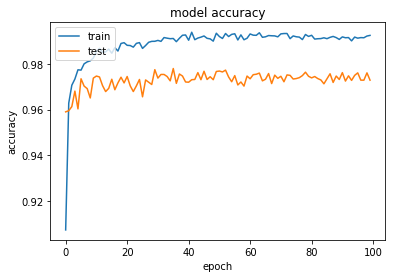

In [23]:
# plot the accuracy
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

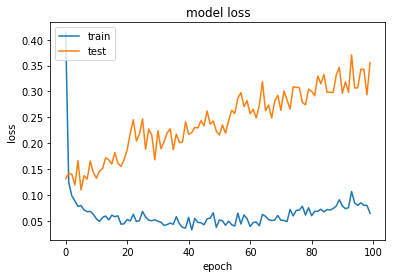

In [24]:
# plot the loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()